# Imports and loads

In [ ]:
#importing all libraries used for the project
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE


In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#or you could use
dataset = pd.read_csv("fetal_health.csv")
dataset
#print(type(dataset))

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Collapse this - Manual data input to avoid file issues

In [ ]:
from io import StringIO

# wrap the string data in StringIO function
StringData = StringIO("""baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
134.0,0.001,0.0,0.01,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
122.0,0.0,0.0,0.002,0.0,0.0,0.0,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
122.0,0.0,0.0,0.003,0.0,0.0,0.0,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0
151.0,0.0,0.0,0.001,0.001,0.0,0.0,64.0,1.9,9.0,27.6,130.0,56.0,186.0,2.0,0.0,150.0,148.0,151.0,9.0,1.0,2.0
150.0,0.0,0.0,0.001,0.001,0.0,0.0,64.0,2.0,8.0,29.5,130.0,56.0,186.0,5.0,0.0,150.0,148.0,151.0,10.0,1.0,2.0
131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,12.9,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1.0
131.0,0.009,0.222,0.006,0.002,0.0,0.0,28.0,1.5,0.0,5.4,87.0,71.0,158.0,2.0,0.0,141.0,137.0,141.0,10.0,1.0,1.0
130.0,0.006,0.408,0.004,0.005,0.0,0.001,21.0,2.3,0.0,7.9,107.0,67.0,174.0,7.0,0.0,143.0,125.0,135.0,76.0,0.0,1.0
130.0,0.006,0.38,0.004,0.004,0.0,0.001,19.0,2.3,0.0,8.7,107.0,67.0,174.0,3.0,0.0,134.0,127.0,133.0,43.0,0.0,1.0
130.0,0.006,0.441,0.005,0.005,0.0,0.0,24.0,2.1,0.0,10.9,125.0,53.0,178.0,5.0,0.0,143.0,128.0,138.0,70.0,1.0,1.0
131.0,0.002,0.383,0.003,0.005,0.0,0.002,18.0,2.4,0.0,13.9,107.0,67.0,174.0,5.0,0.0,134.0,125.0,132.0,45.0,0.0,2.0
130.0,0.003,0.451,0.006,0.004,0.0,0.001,23.0,1.9,0.0,8.8,99.0,59.0,158.0,6.0,0.0,133.0,124.0,129.0,36.0,1.0,1.0
130.0,0.005,0.469,0.005,0.004,0.0,0.001,29.0,1.7,0.0,7.8,112.0,65.0,177.0,6.0,1.0,133.0,129.0,133.0,27.0,0.0,1.0
129.0,0.0,0.34,0.004,0.002,0.0,0.003,30.0,2.1,0.0,8.5,128.0,54.0,182.0,13.0,0.0,129.0,104.0,120.0,138.0,0.0,3.0
128.0,0.005,0.425,0.003,0.003,0.0,0.002,26.0,1.7,0.0,6.7,141.0,57.0,198.0,9.0,0.0,129.0,125.0,132.0,34.0,0.0,1.0
128.0,0.0,0.334,0.003,0.003,0.0,0.003,34.0,2.5,0.0,4.0,145.0,54.0,199.0,11.0,1.0,75.0,99.0,102.0,148.0,-1.0,3.0
128.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.5,0.0,6.8,16.0,114.0,130.0,0.0,0.0,126.0,124.0,125.0,1.0,1.0,3.0
128.0,0.0,0.0,0.003,0.0,0.0,0.0,86.0,0.3,79.0,2.9,16.0,114.0,130.0,0.0,0.0,128.0,126.0,129.0,0.0,1.0,3.0
124.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.3,72.0,4.0,12.0,118.0,130.0,1.0,0.0,124.0,124.0,125.0,0.0,0.0,3.0
124.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.4,14.0,4.8,24.0,122.0,146.0,1.0,0.0,126.0,126.0,127.0,0.0,-1.0,3.0
124.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.2,71.0,3.4,10.0,118.0,128.0,0.0,0.0,124.0,123.0,125.0,0.0,0.0,3.0
132.0,0.0,0.135,0.001,0.008,0.0,0.001,29.0,4.4,0.0,10.5,141.0,50.0,191.0,7.0,1.0,133.0,119.0,129.0,73.0,0.0,2.0
132.0,0.0,0.099,0.0,0.012,0.0,0.0,26.0,6.0,0.0,5.0,143.0,50.0,193.0,10.0,0.0,133.0,113.0,117.0,89.0,0.0,1.0
132.0,0.0,0.108,0.002,0.01,0.0,0.0,26.0,4.5,0.0,12.5,149.0,50.0,199.0,9.0,0.0,133.0,120.0,126.0,56.0,0.0,1.0
132.0,0.0,0.112,0.004,0.014,0.0,0.0,22.0,6.9,0.0,6.3,149.0,50.0,199.0,10.0,0.0,123.0,112.0,115.0,66.0,0.0,1.0
132.0,0.0,0.089,0.001,0.01,0.0,0.0,29.0,2.9,0.0,15.1,144.0,50.0,194.0,11.0,1.0,133.0,124.0,130.0,35.0,0.0,1.0
120.0,0.008,0.103,0.001,0.001,0.0,0.0,28.0,3.4,0.0,21.7,126.0,55.0,181.0,13.0,0.0,121.0,124.0,126.0,25.0,0.0,1.0
120.0,0.009,0.085,0.002,0.002,0.0,0.0,28.0,3.2,0.0,12.4,128.0,53.0,181.0,9.0,1.0,129.0,125.0,127.0,25.0,0.0,1.0
120.0,0.006,0.109,0.007,0.0,0.0,0.0,27.0,3.7,0.0,24.2,144.0,51.0,195.0,11.0,0.0,125.0,124.0,126.0,24.0,0.0,1.0
115.0,0.005,0.079,0.005,0.003,0.0,0.0,23.0,3.4,0.0,18.8,130.0,52.0,182.0,9.0,0.0,119.0,116.0,118.0,21.0,0.0,1.0
114.0,0.005,0.0,0.005,0.003,0.0,0.0,24.0,3.2,0.0,16.2,134.0,52.0,186.0,8.0,0.0,117.0,115.0,117.0,19.0,0.0,1.0
115.0,0.006,0.065,0.004,0.001,0.0,0.0,22.0,3.6,0.0,19.6,138.0,50.0,188.0,8.0,0.0,117.0,117.0,119.0,21.0,0.0,1.0
115.0,0.009,0.055,0.005,0.0,0.0,0.0,27.0,2.3,0.0,12.4,129.0,53.0,182.0,7.0,0.0,119.0,120.0,120.0,14.0,0.0,1.0
114.0,0.008,0.058,0.007,0.001,0.0,0.0,28.0,2.2,0.0,12.2,98.0,55.0,153.0,7.0,1.0,119.0,119.0,120.0,13.0,0.0,1.0
114.0,0.006,0.047,0.009,0.0,0.0,0.0,27.0,2.4,0.0,13.5,128.0,54.0,182.0,6.0,0.0,119.0,118.0,119.0,13.0,0.0,1.0
116.0,0.002,0.038,0.005,0.0,0.0,0.0,40.0,1.6,1.0,13.3,93.0,55.0,148.0,6.0,0.0,127.0,124.0,127.0,9.0,1.0,1.0
116.0,0.004,0.012,0.005,0.0,0.0,0.0,40.0,1.8,1.0,11.4,142.0,52.0,194.0,13.0,1.0,125.0,122.0,125.0,9.0,0.0,1.0
122.0,0.0,0.018,0.003,0.005,0.0,0.0,22.0,4.4,0.0,15.2,150.0,50.0,200.0,7.0,0.0,119.0,113.0,117.0,24.0,0.0,1.0
122.0,0.0,0.02,0.003,0.006,0.0,0.0,21.0,4.7,0.0,15.7,150.0,50.0,200.0,8.0,0.0,116.0,112.0,117.0,23.0,0.0,1.0
122.0,0.0,0.005,0.008,0.003,0.0,0.0,17.0,4.9,0.0,22.1,145.0,53.0,198.0,13.0,0.0,127.0,122.0,126.0,25.0,0.0,1.0
122.0,0.002,0.003,0.006,0.002,0.0,0.0,20.0,5.0,0.0,21.1,148.0,50.0,198.0,11.0,0.0,127.0,124.0,127.0,28.0,0.0,1.0
122.0,0.003,0.006,0.006,0.006,0.0,0.0,22.0,7.0,0.0,16.6,149.0,50.0,199.0,7.0,0.0,129.0,118.0,124.0,75.0,0.0,1.0
158.0,0.005,0.0,0.008,0.001,0.0,0.0,27.0,1.7,0.0,14.9,120.0,77.0,197.0,7.0,0.0,170.0,168.0,170.0,14.0,1.0,1.0
158.0,0.005,0.0,0.008,0.0,0.0,0.0,29.0,1.3,0.0,12.8,55.0,142.0,197.0,4.0,0.0,170.0,171.0,172.0,9.0,0.0,1.0
156.0,0.0,0.0,0.012,0.008,0.0,0.0,43.0,4.1,0.0,22.2,150.0,50.0,200.0,7.0,1.0,151.0,142.0,152.0,72.0,1.0,1.0
156.0,0.0,0.0,0.011,0.008,0.0,0.001,34.0,5.4,0.0,3.3,150.0,50.0,200.0,8.0,0.0,117.0,131.0,136.0,108.0,0.0,2.0
150.0,0.0,0.001,0.0,0.001,0.0,0.0,61.0,0.5,40.0,6.2,31.0,130.0,161.0,2.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
148.0,0.0,0.003,0.0,0.0,0.0,0.0,70.0,0.3,69.0,5.1,18.0,136.0,154.0,3.0,0.0,150.0,148.0,150.0,0.0,1.0,3.0
149.0,0.0,0.0,0.0,0.002,0.0,0.0,57.0,1.2,54.0,12.8,126.0,58.0,184.0,12.0,1.0,150.0,148.0,151.0,8.0,1.0,2.0
149.0,0.0,0.0,0.0,0.001,0.0,0.0,58.0,1.3,53.0,13.2,126.0,58.0,184.0,12.0,1.0,150.0,148.0,151.0,8.0,1.0,2.0
146.0,0.0,0.0,0.006,0.0,0.0,0.0,39.0,0.8,38.0,5.5,18.0,148.0,166.0,1.0,0.0,154.0,155.0,156.0,1.0,0.0,1.0
148.0,0.0,0.0,0.005,0.0,0.0,0.0,41.0,0.8,29.0,6.4,20.0,143.0,163.0,1.0,0.0,154.0,153.0,154.0,0.0,0.0,1.0
144.0,0.008,0.0,0.007,0.0,0.0,0.0,33.0,1.1,0.0,6.2,100.0,78.0,178.0,5.0,0.0,149.0,152.0,152.0,8.0,1.0,1.0
146.0,0.005,0.0,0.005,0.0,0.0,0.0,39.0,0.9,18.0,5.2,44.0,134.0,178.0,5.0,0.0,154.0,154.0,155.0,4.0,0.0,1.0
146.0,0.005,0.0,0.005,0.0,0.0,0.0,39.0,0.8,21.0,5.2,28.0,143.0,171.0,2.0,0.0,154.0,153.0,154.0,1.0,0.0,1.0
142.0,0.0,0.0,0.003,0.0,0.0,0.0,25.0,1.3,0.0,11.6,26.0,130.0,156.0,0.0,0.0,147.0,145.0,147.0,2.0,0.0,1.0
136.0,0.003,0.0,0.005,0.0,0.0,0.0,24.0,1.5,0.0,11.2,111.0,74.0,185.0,11.0,0.0,140.0,140.0,141.0,2.0,0.0,1.0
141.0,0.001,0.0,0.005,0.0,0.0,0.0,25.0,1.5,0.0,13.4,103.0,74.0,177.0,10.0,0.0,142.0,143.0,144.0,4.0,1.0,1.0
150.0,0.0,0.0,0.004,0.0,0.0,0.0,40.0,0.8,37.0,5.7,18.0,143.0,161.0,1.0,0.0,153.0,153.0,154.0,0.0,0.0,1.0
138.0,0.001,0.0,0.004,0.0,0.0,0.0,44.0,1.0,20.0,11.9,99.0,81.0,180.0,9.0,2.0,162.0,156.0,159.0,8.0,1.0,1.0
140.0,0.007,0.0,0.004,0.0,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
140.0,0.007,0.0,0.004,0.0,0.0,0.0,34.0,1.2,0.0,10.3,60.0,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
144.0,0.0,0.0,0.005,0.0,0.0,0.0,46.0,0.8,1.0,13.0,37.0,132.0,169.0,4.0,0.0,162.0,158.0,160.0,5.0,1.0,1.0
144.0,0.001,0.0,0.005,0.0,0.0,0.0,45.0,0.8,2.0,11.5,30.0,138.0,168.0,3.0,0.0,162.0,157.0,160.0,5.0,1.0,1.0
140.0,0.01,0.006,0.003,0.0,0.0,0.0,52.0,1.6,0.0,16.2,104.0,68.0,172.0,0.0,0.0,144.0,147.0,147.0,14.0,1.0,1.0
140.0,0.008,0.005,0.0,0.0,0.0,0.0,53.0,1.5,0.0,12.9,104.0,68.0,172.0,2.0,0.0,146.0,147.0,147.0,12.0,1.0,1.0
140.0,0.008,0.004,0.004,0.0,0.0,0.0,52.0,1.9,0.0,17.7,108.0,68.0,176.0,2.0,0.0,144.0,147.0,147.0,18.0,1.0,1.0
140.0,0.006,0.003,0.003,0.0,0.0,0.0,56.0,1.5,1.0,15.1,108.0,68.0,176.0,3.0,0.0,156.0,150.0,153.0,15.0,1.0,1.0
154.0,0.0,0.0,0.004,0.0,0.0,0.0,65.0,0.9,0.0,13.4,92.0,74.0,166.0,2.0,0.0,156.0,158.0,159.0,2.0,1.0,2.0
150.0,0.0,0.0,0.003,0.0,0.0,0.0,61.0,0.9,3.0,8.7,28.0,138.0,166.0,0.0,0.0,152.0,153.0,155.0,3.0,0.0,2.0
145.0,0.007,0.009,0.002,0.0,0.0,0.0,36.0,1.4,0.0,13.6,119.0,57.0,176.0,3.0,1.0,148.0,150.0,150.0,12.0,1.0,1.0
145.0,0.003,0.003,0.001,0.0,0.0,0.0,34.0,1.7,0.0,22.3,117.0,57.0,174.0,6.0,1.0,150.0,147.0,150.0,11.0,1.0,1.0
145.0,0.005,0.01,0.005,0.0,0.0,0.0,35.0,1.9,0.0,21.3,140.0,56.0,196.0,5.0,0.0,148.0,150.0,151.0,12.0,1.0,1.0
145.0,0.0,0.002,0.002,0.0,0.0,0.0,34.0,1.7,0.0,25.9,109.0,57.0,166.0,5.0,1.0,150.0,147.0,150.0,10.0,1.0,1.0
145.0,0.002,0.008,0.003,0.0,0.0,0.0,40.0,1.4,0.0,18.4,140.0,56.0,196.0,9.0,1.0,148.0,148.0,149.0,7.0,0.0,1.0
145.0,0.0,0.007,0.002,0.0,0.0,0.0,41.0,1.2,0.0,15.8,136.0,60.0,196.0,8.0,1.0,145.0,148.0,149.0,6.0,0.0,1.0
145.0,0.015,0.008,0.002,0.0,0.0,0.0,43.0,1.5,0.0,0.0,109.0,63.0,172.0,5.0,0.0,156.0,156.0,158.0,11.0,1.0,1.0
145.0,0.013,0.028,0.001,0.0,0.0,0.0,41.0,1.1,0.0,11.4,125.0,62.0,187.0,4.0,0.0,167.0,164.0,166.0,11.0,1.0,1.0
145.0,0.014,0.026,0.001,0.0,0.0,0.0,40.0,1.1,0.0,1.2,113.0,73.0,186.0,4.0,0.0,165.0,163.0,165.0,11.0,1.0,1.0
145.0,0.008,0.0,0.002,0.0,0.0,0.0,41.0,1.8,0.0,23.4,117.0,50.0,167.0,4.0,0.0,154.0,151.0,154.0,16.0,1.0,1.0
139.0,0.0,0.107,0.0,0.002,0.0,0.0,38.0,1.5,0.0,13.3,134.0,53.0,187.0,5.0,0.0,133.0,136.0,138.0,6.0,0.0,1.0
139.0,0.0,0.009,0.0,0.0,0.0,0.0,62.0,0.7,27.0,11.5,111.0,73.0,184.0,4.0,0.0,148.0,147.0,148.0,2.0,1.0,1.0
139.0,0.002,0.003,0.0,0.003,0.0,0.0,51.0,2.2,0.0,7.1,148.0,52.0,200.0,12.0,4.0,147.0,137.0,145.0,55.0,0.0,2.0
139.0,0.002,0.002,0.002,0.0,0.0,0.0,64.0,0.4,29.0,6.5,28.0,135.0,163.0,1.0,0.0,161.0,152.0,157.0,13.0,1.0,2.0
148.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.4,67.0,4.9,15.0,139.0,154.0,4.0,0.0,150.0,149.0,151.0,0.0,1.0,2.0
148.0,0.0,0.003,0.0,0.0,0.0,0.0,70.0,0.3,68.0,5.3,17.0,136.0,153.0,2.0,0.0,150.0,148.0,150.0,0.0,1.0,2.0
148.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.3,75.0,4.5,25.0,128.0,153.0,3.0,0.0,150.0,149.0,151.0,0.0,1.0,3.0
148.0,0.0,0.005,0.002,0.0,0.0,0.0,72.0,0.3,74.0,4.6,16.0,136.0,152.0,0.0,0.0,150.0,148.0,150.0,0.0,1.0,3.0
148.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.5,7.0,9.5,21.0,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
148.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.4,30.0,8.8,35.0,121.0,156.0,3.0,1.0,150.0,149.0,151.0,1.0,1.0,2.0
148.0,0.0,0.001,0.0,0.001,0.0,0.0,60.0,0.5,49.0,4.8,83.0,78.0,161.0,3.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
148.0,0.0,0.001,0.0,0.001,0.0,0.0,61.0,0.5,39.0,6.3,31.0,130.0,161.0,2.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
125.0,0.01,0.007,0.002,0.0,0.0,0.0,19.0,1.9,0.0,6.8,96.0,101.0,197.0,8.0,1.0,133.0,131.0,133.0,5.0,-1.0,1.0
125.0,0.005,0.0,0.002,0.003,0.0,0.0,25.0,1.7,6.0,11.6,93.0,72.0,165.0,3.0,0.0,133.0,128.0,132.0,10.0,0.0,1.0
125.0,0.005,0.008,0.002,0.001,0.0,0.0,24.0,1.6,0.0,14.6,55.0,97.0,152.0,6.0,2.0,131.0,130.0,132.0,6.0,0.0,1.0
125.0,0.008,0.013,0.002,0.0,0.0,0.0,24.0,1.6,0.0,17.3,84.0,68.0,152.0,4.0,0.0,132.0,132.0,133.0,5.0,1.0,1.0
125.0,0.003,0.003,0.0,0.0,0.0,0.0,29.0,1.1,0.0,11.0,29.0,117.0,146.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0,1.0
125.0,0.003,0.016,0.0,0.0,0.0,0.0,22.0,1.9,0.0,15.8,82.0,68.0,150.0,5.0,1.0,132.0,130.0,133.0,6.0,1.0,1.0
125.0,0.004,0.029,0.003,0.004,0.0,0.0,22.0,2.8,0.0,17.2,128.0,56.0,184.0,5.0,1.0,125.0,123.0,126.0,16.0,0.0,1.0
125.0,0.0,0.05,0.0,0.008,0.0,0.0,22.0,3.9,0.0,13.1,145.0,52.0,197.0,7.0,1.0,121.0,117.0,121.0,23.0,0.0,1.0
125.0,0.007,0.004,0.006,0.002,0.0,0.0,22.0,2.1,0.0,12.1,105.0,73.0,178.0,8.0,0.0,126.0,126.0,128.0,11.0,0.0,1.0
125.0,0.006,0.053,0.006,0.005,0.0,0.0,20.0,2.5,0.0,7.1,134.0,63.0,197.0,8.0,1.0,125.0,125.0,127.0,16.0,0.0,1.0
125.0,0.0,0.003,0.0,0.0,0.0,0.0,25.0,1.5,0.0,19.3,62.0,80.0,142.0,4.0,1.0,127.0,125.0,127.0,6.0,1.0,1.0
125.0,0.007,0.058,0.002,0.007,0.0,0.0,23.0,2.2,0.0,4.4,122.0,78.0,200.0,10.0,0.0,131.0,125.0,128.0,20.0,0.0,1.0
129.0,0.005,0.003,0.001,0.0,0.0,0.0,34.0,1.7,0.0,12.9,118.0,78.0,196.0,10.0,0.0,137.0,136.0,137.0,6.0,0.0,1.0
129.0,0.005,0.003,0.005,0.0,0.0,0.0,35.0,1.3,0.0,10.1,92.0,101.0,193.0,6.0,0.0,136.0,134.0,135.0,4.0,0.0,1.0
129.0,0.0,0.003,0.006,0.0,0.0,0.0,38.0,1.2,0.0,12.5,54.0,111.0,165.0,4.0,1.0,133.0,132.0,134.0,2.0,0.0,1.0
129.0,0.007,0.009,0.009,0.012,0.0,0.0,22.0,5.2,0.0,0.0,145.0,50.0,195.0,13.0,1.0,139.0,122.0,129.0,86.0,0.0,1.0
129.0,0.0,0.011,0.007,0.015,0.0,0.0,22.0,4.8,0.0,0.0,138.0,50.0,188.0,7.0,2.0,129.0,114.0,120.0,60.0,0.0,1.0
123.0,0.0,0.0,0.007,0.002,0.0,0.002,26.0,4.3,0.0,19.4,146.0,50.0,196.0,8.0,1.0,126.0,105.0,113.0,117.0,0.0,3.0
123.0,0.003,0.0,0.004,0.004,0.0,0.0,30.0,1.1,1.0,5.8,53.0,95.0,148.0,3.0,0.0,125.0,124.0,126.0,6.0,0.0,1.0
123.0,0.001,0.0,0.004,0.006,0.0,0.0,29.0,1.1,0.0,3.9,56.0,92.0,148.0,3.0,0.0,123.0,122.0,124.0,6.0,0.0,1.0
123.0,0.004,0.0,0.005,0.005,0.0,0.0,24.0,1.3,0.0,2.1,56.0,92.0,148.0,3.0,0.0,121.0,123.0,125.0,7.0,0.0,1.0
123.0,0.0,0.0,0.005,0.004,0.0,0.0,47.0,1.1,31.0,7.4,130.0,59.0,189.0,14.0,2.0,129.0,122.0,127.0,15.0,0.0,1.0
123.0,0.0,0.0,0.005,0.005,0.0,0.0,50.0,0.8,32.0,3.1,94.0,75.0,169.0,7.0,0.0,125.0,122.0,126.0,8.0,0.0,1.0
123.0,0.0,0.0,0.005,0.006,0.0,0.0,45.0,1.0,19.0,3.8,85.0,59.0,144.0,8.0,1.0,124.0,119.0,125.0,14.0,1.0,1.0
123.0,0.006,0.0,0.006,0.004,0.0,0.0,33.0,1.3,0.0,4.7,138.0,61.0,199.0,9.0,1.0,135.0,122.0,127.0,39.0,0.0,1.0
123.0,0.0,0.0,0.007,0.005,0.0,0.002,28.0,1.4,0.0,4.5,77.0,61.0,138.0,3.0,1.0,114.0,112.0,115.0,15.0,1.0,2.0
159.0,0.0,0.0,0.003,0.0,0.0,0.0,65.0,0.4,16.0,10.8,91.0,81.0,172.0,0.0,0.0,163.0,163.0,165.0,2.0,1.0,2.0
159.0,0.0,0.0,0.004,0.0,0.0,0.0,69.0,0.3,21.0,6.4,15.0,153.0,168.0,0.0,0.0,163.0,163.0,164.0,0.0,1.0,2.0
159.0,0.0,0.0,0.003,0.0,0.0,0.0,62.0,0.5,6.0,13.2,91.0,81.0,172.0,0.0,0.0,163.0,163.0,164.0,2.0,1.0,2.0
159.0,0.0,0.0,0.003,0.0,0.0,0.0,65.0,0.4,11.0,6.8,15.0,153.0,168.0,0.0,0.0,163.0,162.0,164.0,0.0,1.0,2.0
158.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.6,34.0,8.0,93.0,77.0,170.0,3.0,0.0,165.0,163.0,165.0,2.0,1.0,1.0
158.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.5,38.0,5.8,15.0,156.0,171.0,0.0,0.0,165.0,164.0,166.0,0.0,0.0,1.0
158.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.6,31.0,8.6,92.0,77.0,169.0,1.0,0.0,165.0,162.0,164.0,2.0,1.0,1.0
158.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.5,58.0,4.3,11.0,159.0,170.0,0.0,0.0,165.0,165.0,166.0,0.0,0.0,1.0
159.0,0.001,0.0,0.008,0.0,0.0,0.0,61.0,0.4,8.0,8.6,44.0,133.0,177.0,4.0,0.0,165.0,164.0,166.0,1.0,1.0,1.0
159.0,0.002,0.0,0.01,0.0,0.0,0.0,58.0,0.5,0.0,7.9,44.0,133.0,177.0,4.0,0.0,163.0,164.0,166.0,2.0,1.0,1.0
159.0,0.0,0.0,0.008,0.0,0.0,0.0,66.0,0.4,13.0,8.5,24.0,149.0,173.0,0.0,0.0,165.0,164.0,166.0,0.0,1.0,2.0
159.0,0.002,0.0,0.01,0.0,0.0,0.0,58.0,0.5,0.0,7.8,44.0,133.0,177.0,4.0,0.0,163.0,164.0,165.0,2.0,1.0,1.0
159.0,0.0,0.0,0.009,0.0,0.0,0.0,66.0,0.4,16.0,7.2,23.0,147.0,170.0,0.0,0.0,165.0,164.0,166.0,0.0,1.0,2.0
159.0,0.001,0.0,0.008,0.0,0.0,0.0,57.0,0.5,8.0,9.1,40.0,148.0,188.0,0.0,0.0,167.0,169.0,170.0,5.0,0.0,2.0
159.0,0.002,0.0,0.009,0.0,0.0,0.0,58.0,0.5,13.0,8.0,42.0,146.0,188.0,2.0,0.0,167.0,172.0,174.0,8.0,0.0,2.0
159.0,0.0,0.0,0.006,0.0,0.0,0.0,57.0,0.5,0.0,8.1,22.0,155.0,177.0,1.0,0.0,170.0,167.0,168.0,2.0,0.0,1.0
154.0,0.003,0.0,0.002,0.001,0.0,0.0,44.0,2.0,0.0,26.3,147.0,50.0,197.0,10.0,10.0,153.0,158.0,162.0,27.0,1.0,1.0
154.0,0.0,0.0,0.002,0.0,0.0,0.0,48.0,0.9,0.0,12.7,90.0,93.0,183.0,4.0,0.0,167.0,161.0,163.0,8.0,1.0,2.0
154.0,0.003,0.0,0.003,0.0,0.0,0.0,44.0,2.0,0.0,35.7,147.0,50.0,197.0,8.0,5.0,153.0,155.0,157.0,23.0,1.0,1.0
143.0,0.005,0.0,0.003,0.0,0.0,0.0,50.0,1.2,7.0,16.9,121.0,57.0,178.0,10.0,0.0,146.0,147.0,148.0,10.0,1.0,1.0
143.0,0.008,0.0,0.002,0.0,0.0,0.0,50.0,0.9,0.0,4.4,106.0,72.0,178.0,5.0,0.0,147.0,150.0,149.0,6.0,1.0,1.0
143.0,0.001,0.0,0.001,0.0,0.0,0.0,51.0,1.1,10.0,18.0,100.0,72.0,172.0,8.0,1.0,147.0,146.0,147.0,4.0,1.0,1.0
149.0,0.002,0.0,0.003,0.0,0.0,0.0,51.0,1.0,8.0,18.8,99.0,71.0,170.0,4.0,0.0,151.0,153.0,154.0,7.0,1.0,1.0
149.0,0.003,0.0,0.0,0.0,0.0,0.0,51.0,0.9,9.0,10.6,94.0,77.0,171.0,4.0,1.0,153.0,154.0,154.0,5.0,1.0,1.0
148.0,0.002,0.0,0.006,0.0,0.0,0.0,54.0,0.7,15.0,9.0,52.0,115.0,167.0,7.0,1.0,153.0,152.0,154.0,3.0,1.0,1.0
148.0,0.0,0.0,0.003,0.0,0.0,0.0,57.0,0.5,20.0,9.6,48.0,115.0,163.0,5.0,0.0,153.0,152.0,153.0,1.0,1.0,1.0
148.0,0.0,0.0,0.004,0.0,0.0,0.0,55.0,0.6,13.0,10.4,46.0,115.0,161.0,5.0,0.0,151.0,152.0,153.0,1.0,1.0,1.0
140.0,0.006,0.001,0.004,0.001,0.0,0.0,41.0,1.7,0.0,8.3,121.0,52.0,173.0,12.0,1.0,159.0,149.0,154.0,30.0,1.0,1.0
125.0,0.004,0.0,0.006,0.0,0.0,0.0,31.0,1.3,0.0,11.3,85.0,114.0,199.0,3.0,0.0,126.0,131.0,132.0,9.0,-1.0,1.0
125.0,0.0,0.0,0.008,0.0,0.0,0.0,34.0,1.1,0.0,14.6,85.0,114.0,199.0,4.0,0.0,126.0,127.0,128.0,3.0,-1.0,1.0
123.0,0.002,0.0,0.005,0.0,0.0,0.0,38.0,0.9,14.0,8.8,39.0,113.0,152.0,2.0,0.0,126.0,128.0,128.0,4.0,0.0,1.0
123.0,0.001,0.0,0.006,0.0,0.0,0.0,39.0,0.8,12.0,8.9,28.0,113.0,141.0,2.0,0.0,126.0,126.0,127.0,1.0,0.0,1.0
123.0,0.002,0.0,0.006,0.0,0.0,0.0,38.0,0.9,13.0,8.0,24.0,117.0,141.0,1.0,0.0,126.0,127.0,128.0,1.0,0.0,1.0
123.0,0.007,0.0,0.006,0.0,0.0,0.0,34.0,0.9,11.0,3.3,31.0,116.0,147.0,1.0,0.0,126.0,128.0,128.0,3.0,-1.0,1.0
123.0,0.007,0.0,0.006,0.0,0.0,0.0,33.0,0.9,6.0,3.4,33.0,116.0,149.0,2.0,0.0,126.0,128.0,128.0,3.0,0.0,1.0
123.0,0.006,0.0,0.006,0.0,0.0,0.0,36.0,0.9,16.0,3.7,34.0,115.0,149.0,1.0,0.0,126.0,127.0,127.0,3.0,-1.0,1.0
123.0,0.005,0.0,0.007,0.0,0.0,0.0,35.0,0.9,13.0,3.2,33.0,116.0,149.0,1.0,0.0,126.0,128.0,127.0,3.0,-1.0,1.0
122.0,0.004,0.0,0.006,0.001,0.0,0.0,32.0,1.2,10.0,8.9,81.0,67.0,148.0,2.0,0.0,125.0,124.0,126.0,8.0,1.0,1.0
122.0,0.005,0.0,0.006,0.0,0.0,0.0,32.0,1.1,12.0,8.4,65.0,83.0,148.0,2.0,1.0,125.0,125.0,126.0,4.0,0.0,1.0
122.0,0.004,0.0,0.004,0.0,0.0,0.0,31.0,1.2,10.0,8.2,57.0,86.0,143.0,4.0,0.0,125.0,125.0,126.0,3.0,1.0,1.0
134.0,0.003,0.008,0.001,0.001,0.0,0.0,56.0,3.2,0.0,41.8,130.0,54.0,184.0,1.0,0.0,138.0,135.0,139.0,25.0,0.0,1.0
134.0,0.003,0.007,0.001,0.0,0.0,0.0,53.0,3.7,0.0,50.7,130.0,54.0,184.0,1.0,0.0,136.0,135.0,139.0,25.0,0.0,1.0
134.0,0.002,0.004,0.002,0.0,0.0,0.0,67.0,1.5,3.0,25.8,138.0,54.0,192.0,2.0,0.0,136.0,136.0,137.0,7.0,0.0,1.0
134.0,0.003,0.007,0.001,0.0,0.0,0.0,67.0,1.2,0.0,15.9,124.0,68.0,192.0,6.0,0.0,138.0,136.0,137.0,6.0,0.0,1.0
116.0,0.001,0.0,0.003,0.0,0.0,0.0,46.0,0.7,39.0,5.5,44.0,91.0,135.0,4.0,0.0,120.0,120.0,122.0,1.0,1.0,1.0
116.0,0.0,0.0,0.004,0.001,0.0,0.0,43.0,0.8,25.0,5.6,72.0,56.0,128.0,6.0,0.0,120.0,118.0,121.0,3.0,1.0,1.0
116.0,0.0,0.0,0.005,0.0,0.0,0.0,48.0,0.6,26.0,5.5,12.0,114.0,126.0,1.0,0.0,120.0,120.0,122.0,0.0,0.0,1.0
119.0,0.001,0.0,0.004,0.001,0.0,0.0,29.0,1.3,2.0,10.6,89.0,77.0,166.0,3.0,1.0,121.0,121.0,123.0,4.0,0.0,1.0
119.0,0.002,0.0,0.003,0.0,0.0,0.0,30.0,1.3,2.0,11.6,89.0,77.0,166.0,3.0,2.0,121.0,122.0,123.0,3.0,0.0,1.0
119.0,0.002,0.0,0.004,0.0,0.0,0.0,31.0,1.3,3.0,11.3,89.0,77.0,166.0,6.0,0.0,121.0,122.0,123.0,2.0,0.0,1.0
119.0,0.005,0.0,0.005,0.0,0.0,0.0,31.0,1.4,0.0,10.7,134.0,58.0,192.0,7.0,0.0,127.0,127.0,127.0,7.0,0.0,1.0
119.0,0.0,0.0,0.003,0.0,0.0,0.0,34.0,1.1,0.0,14.0,92.0,58.0,150.0,4.0,0.0,127.0,125.0,128.0,3.0,1.0,1.0
119.0,0.008,0.0,0.005,0.001,0.0,0.0,30.0,1.8,0.0,10.0,129.0,69.0,198.0,9.0,0.0,132.0,132.0,135.0,20.0,0.0,1.0
119.0,0.003,0.0,0.008,0.003,0.0,0.0,26.0,1.5,0.0,14.1,56.0,88.0,144.0,3.0,0.0,127.0,122.0,125.0,8.0,0.0,1.0
121.0,0.011,0.0,0.003,0.0,0.0,0.0,33.0,1.9,0.0,6.5,139.0,59.0,198.0,11.0,0.0,142.0,137.0,140.0,18.0,0.0,1.0
120.0,0.009,0.0,0.007,0.0,0.0,0.0,27.0,2.0,0.0,14.3,127.0,71.0,198.0,10.0,1.0,127.0,130.0,132.0,12.0,0.0,1.0
138.0,0.017,0.0,0.005,0.0,0.0,0.0,35.0,5.3,0.0,4.5,148.0,52.0,200.0,11.0,2.0,146.0,157.0,161.0,72.0,1.0,1.0
131.0,0.0,0.0,0.0,0.008,0.0,0.0,37.0,1.9,0.0,3.2,90.0,58.0,148.0,4.0,1.0,127.0,121.0,126.0,21.0,1.0,1.0
132.0,0.0,0.0,0.006,0.008,0.0,0.0,38.0,2.6,0.0,10.6,128.0,51.0,179.0,7.0,1.0,133.0,125.0,130.0,25.0,0.0,1.0
132.0,0.013,0.0,0.003,0.003,0.0,0.0,31.0,4.8,0.0,5.4,147.0,52.0,199.0,9.0,1.0,133.0,154.0,163.0,137.0,1.0,1.0
132.0,0.004,0.0,0.008,0.006,0.0,0.0,36.0,3.4,0.0,15.3,145.0,53.0,198.0,6.0,2.0,133.0,136.0,134.0,65.0,0.0,1.0
132.0,0.0,0.0,0.005,0.0,0.0,0.0,49.0,2.0,0.0,23.3,89.0,62.0,151.0,5.0,0.0,133.0,133.0,135.0,8.0,1.0,1.0
138.0,0.001,0.0,0.004,0.0,0.0,0.0,43.0,1.1,20.0,11.3,44.0,129.0,173.0,8.0,2.0,162.0,155.0,159.0,8.0,1.0,2.0
138.0,0.002,0.0,0.006,0.0,0.0,0.0,43.0,1.0,19.0,11.6,44.0,129.0,173.0,8.0,2.0,162.0,155.0,159.0,9.0,0.0,2.0
138.0,0.006,0.0,0.004,0.0,0.0,0.0,32.0,1.3,0.0,9.0,60.0,119.0,179.0,2.0,0.0,158.0,152.0,155.0,8.0,0.0,1.0
138.0,0.0,0.0,0.004,0.0,0.0,0.0,45.0,1.0,20.0,12.3,99.0,81.0,180.0,8.0,2.0,162.0,156.0,159.0,8.0,1.0,2.0
144.0,0.001,0.0,0.004,0.0,0.0,0.0,44.0,0.8,2.0,11.9,33.0,135.0,168.0,4.0,0.0,162.0,157.0,160.0,5.0,1.0,2.0
144.0,0.002,0.0,0.003,0.0,0.0,0.0,49.0,0.7,3.0,9.8,44.0,140.0,184.0,3.0,0.0,162.0,158.0,162.0,4.0,0.0,2.0
144.0,0.001,0.0,0.005,0.0,0.0,0.0,46.0,0.8,2.0,11.5,31.0,138.0,169.0,3.0,0.0,162.0,158.0,161.0,5.0,1.0,2.0
150.0,0.0,0.0,0.006,0.0,0.0,0.0,56.0,0.5,19.0,7.9,19.0,148.0,167.0,2.0,0.0,153.0,157.0,158.0,3.0,0.0,2.0
150.0,0.0,0.0,0.007,0.0,0.0,0.0,54.0,0.5,13.0,7.7,16.0,147.0,163.0,2.0,0.0,153.0,155.0,157.0,2.0,0.0,1.0
150.0,0.0,0.0,0.005,0.0,0.0,0.0,57.0,0.5,19.0,7.7,20.0,147.0,167.0,3.0,0.0,165.0,157.0,159.0,7.0,0.0,2.0
145.0,0.0,0.0,0.002,0.0,0.0,0.0,49.0,0.6,3.0,11.6,27.0,140.0,167.0,0.0,0.0,159.0,156.0,158.0,3.0,1.0,2.0
145.0,0.003,0.0,0.002,0.0,0.0,0.0,49.0,0.6,0.0,7.0,26.0,145.0,171.0,1.0,0.0,154.0,157.0,158.0,4.0,0.0,1.0
120.0,0.0,0.013,0.0,0.001,0.0,0.0,53.0,0.7,7.0,12.2,77.0,56.0,133.0,6.0,0.0,123.0,121.0,123.0,3.0,1.0,1.0
120.0,0.0,0.013,0.0,0.0,0.0,0.0,51.0,0.8,0.0,14.8,77.0,56.0,133.0,5.0,0.0,123.0,122.0,124.0,2.0,1.0,1.0
120.0,0.0,0.016,0.0,0.0,0.0,0.0,56.0,0.5,12.0,8.5,30.0,103.0,133.0,2.0,0.0,120.0,121.0,122.0,1.0,0.0,1.0
120.0,0.0,0.008,0.0,0.0,0.0,0.0,54.0,0.6,12.0,8.6,24.0,109.0,133.0,0.0,1.0,123.0,122.0,124.0,1.0,0.0,1.0
120.0,0.0,0.015,0.0,0.0,0.0,0.0,57.0,0.6,0.0,9.5,21.0,112.0,133.0,0.0,0.0,125.0,123.0,124.0,1.0,0.0,1.0
120.0,0.0,0.008,0.0,0.0,0.0,0.0,51.0,0.7,15.0,7.4,21.0,109.0,130.0,1.0,1.0,123.0,121.0,123.0,0.0,0.0,1.0
120.0,0.0,0.01,0.0,0.0,0.0,0.0,56.0,0.5,12.0,7.6,18.0,115.0,133.0,0.0,0.0,123.0,122.0,123.0,1.0,0.0,1.0
120.0,0.0,0.022,0.0,0.0,0.0,0.0,55.0,0.9,0.0,15.1,77.0,58.0,135.0,5.0,0.0,123.0,123.0,124.0,5.0,1.0,1.0
120.0,0.0,0.026,0.0,0.0,0.0,0.0,53.0,0.8,0.0,15.3,69.0,62.0,131.0,3.0,0.0,125.0,121.0,124.0,5.0,1.0,1.0
124.0,0.005,0.015,0.002,0.0,0.0,0.0,46.0,0.8,0.0,7.5,52.0,90.0,142.0,4.0,0.0,129.0,130.0,131.0,2.0,1.0,1.0
124.0,0.0,0.007,0.0,0.0,0.0,0.0,59.0,0.6,0.0,7.6,25.0,111.0,136.0,0.0,0.0,129.0,129.0,130.0,0.0,1.0,1.0
125.0,0.008,0.015,0.001,0.0,0.0,0.0,48.0,0.8,0.0,4.9,63.0,82.0,145.0,9.0,0.0,133.0,132.0,133.0,3.0,1.0,1.0
125.0,0.003,0.01,0.0,0.0,0.0,0.0,51.0,0.6,0.0,4.9,16.0,125.0,141.0,1.0,0.0,133.0,132.0,134.0,0.0,0.0,1.0
125.0,0.01,0.01,0.002,0.0,0.0,0.0,50.0,0.9,0.0,2.5,118.0,57.0,175.0,8.0,0.0,133.0,132.0,133.0,4.0,0.0,1.0
125.0,0.005,0.021,0.0,0.0,0.0,0.0,47.0,0.8,0.0,6.1,75.0,68.0,143.0,3.0,0.0,133.0,132.0,133.0,2.0,1.0,1.0
127.0,0.002,0.006,0.001,0.0,0.0,0.0,61.0,0.5,3.0,10.6,83.0,62.0,145.0,4.0,0.0,129.0,131.0,132.0,4.0,1.0,1.0
127.0,0.003,0.005,0.002,0.0,0.0,0.0,58.0,0.5,0.0,8.3,38.0,113.0,151.0,3.0,0.0,129.0,134.0,136.0,6.0,0.0,1.0
127.0,0.0,0.005,0.0,0.0,0.0,0.0,63.0,0.5,4.0,11.3,89.0,62.0,151.0,4.0,0.0,129.0,128.0,130.0,1.0,1.0,2.0
127.0,0.0,0.005,0.0,0.0,0.0,0.0,61.0,0.6,4.0,11.5,89.0,62.0,151.0,4.0,0.0,131.0,129.0,131.0,2.0,1.0,2.0
127.0,0.005,0.008,0.001,0.001,0.0,0.0,54.0,1.0,5.0,15.6,83.0,63.0,146.0,9.0,1.0,140.0,135.0,138.0,14.0,1.0,1.0
127.0,0.006,0.004,0.0,0.0,0.0,0.0,53.0,0.8,0.0,17.9,104.0,64.0,168.0,3.0,0.0,136.0,134.0,136.0,5.0,1.0,1.0
129.0,0.003,0.016,0.0,0.0,0.0,0.0,52.0,0.7,0.0,11.5,80.0,68.0,148.0,10.0,0.0,133.0,134.0,134.0,3.0,1.0,1.0
129.0,0.0,0.018,0.0,0.0,0.0,0.0,55.0,0.5,1.0,7.5,23.0,120.0,143.0,3.0,0.0,133.0,133.0,134.0,1.0,0.0,1.0
129.0,0.002,0.013,0.0,0.0,0.0,0.0,47.0,0.9,0.0,17.3,104.0,52.0,156.0,6.0,0.0,133.0,133.0,134.0,4.0,1.0,1.0
129.0,0.006,0.017,0.0,0.0,0.0,0.0,44.0,1.0,0.0,4.8,36.0,120.0,156.0,2.0,0.0,133.0,133.0,133.0,3.0,0.0,1.0
129.0,0.002,0.016,0.0,0.0,0.0,0.0,53.0,0.6,1.0,5.3,34.0,122.0,156.0,3.0,0.0,133.0,134.0,135.0,1.0,0.0,1.0
129.0,0.0,0.019,0.0,0.0,0.0,0.0,56.0,0.5,1.0,7.4,23.0,120.0,143.0,3.0,0.0,133.0,133.0,134.0,1.0,0.0,1.0
127.0,0.007,0.005,0.0,0.0,0.0,0.0,48.0,1.1,2.0,14.0,84.0,64.0,148.0,2.0,0.0,133.0,132.0,134.0,7.0,1.0,1.0
127.0,0.006,0.004,0.0,0.0,0.0,0.0,48.0,1.1,0.0,14.9,84.0,64.0,148.0,2.0,0.0,127.0,132.0,134.0,11.0,1.0,1.0
127.0,0.006,0.003,0.0,0.0,0.0,0.0,47.0,1.1,0.0,12.6,83.0,64.0,147.0,2.0,0.0,129.0,131.0,132.0,7.0,1.0,1.0
123.0,0.003,0.003,0.0,0.0,0.0,0.0,52.0,0.8,2.0,15.4,90.0,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
123.0,0.003,0.005,0.0,0.0,0.0,0.0,55.0,0.7,0.0,8.9,71.0,81.0,152.0,4.0,0.0,129.0,129.0,130.0,3.0,1.0,1.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.8,7.0,13.8,74.0,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
123.0,0.004,0.005,0.0,0.0,0.0,0.0,55.0,0.7,0.0,8.6,71.0,81.0,152.0,4.0,0.0,129.0,129.0,130.0,3.0,1.0,1.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.8,7.0,13.8,74.0,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
121.0,0.003,0.006,0.0,0.0,0.0,0.0,56.0,0.6,2.0,10.5,77.0,62.0,139.0,3.0,0.0,127.0,128.0,129.0,3.0,1.0,1.0
121.0,0.003,0.008,0.0,0.0,0.0,0.0,52.0,0.6,2.0,8.0,21.0,117.0,138.0,0.0,0.0,125.0,127.0,128.0,2.0,0.0,1.0
121.0,0.005,0.003,0.0,0.0,0.0,0.0,58.0,0.5,4.0,7.4,22.0,117.0,139.0,0.0,0.0,125.0,128.0,129.0,3.0,0.0,1.0
125.0,0.0,0.005,0.001,0.0,0.0,0.0,66.0,0.3,46.0,5.8,21.0,112.0,133.0,0.0,0.0,125.0,124.0,126.0,0.0,0.0,2.0
125.0,0.0,0.005,0.001,0.0,0.0,0.0,67.0,0.3,57.0,4.9,14.0,115.0,129.0,1.0,0.0,125.0,124.0,126.0,0.0,1.0,2.0
125.0,0.0,0.009,0.0,0.0,0.0,0.0,68.0,0.3,75.0,3.5,8.0,120.0,128.0,0.0,0.0,125.0,125.0,126.0,0.0,0.0,3.0
125.0,0.0,0.005,0.001,0.001,0.0,0.0,70.0,0.4,29.0,7.1,81.0,52.0,133.0,5.0,0.0,125.0,123.0,125.0,2.0,1.0,2.0
125.0,0.0,0.004,0.002,0.0,0.0,0.0,66.0,0.4,20.0,6.7,22.0,109.0,131.0,1.0,0.0,120.0,121.0,122.0,1.0,0.0,2.0
123.0,0.0,0.0,0.001,0.0,0.0,0.0,67.0,0.6,27.0,12.6,110.0,50.0,160.0,7.0,0.0,125.0,123.0,125.0,2.0,1.0,2.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.5,33.0,8.3,71.0,89.0,160.0,5.0,0.0,123.0,124.0,126.0,1.0,0.0,2.0
128.0,0.008,0.006,0.004,0.0,0.0,0.0,43.0,1.9,0.0,18.7,124.0,60.0,184.0,10.0,0.0,133.0,137.0,138.0,16.0,0.0,1.0
128.0,0.007,0.0,0.008,0.0,0.0,0.0,48.0,1.0,0.0,11.7,99.0,60.0,159.0,3.0,0.0,138.0,137.0,139.0,6.0,1.0,1.0
151.0,0.006,0.007,0.002,0.0,0.0,0.0,56.0,0.5,23.0,3.8,37.0,141.0,178.0,3.0,0.0,157.0,160.0,160.0,4.0,0.0,1.0
151.0,0.01,0.009,0.003,0.0,0.0,0.0,50.0,0.7,0.0,0.9,37.0,141.0,178.0,2.0,0.0,161.0,162.0,163.0,4.0,0.0,1.0
151.0,0.002,0.004,0.0,0.0,0.0,0.0,64.0,0.4,40.0,4.6,27.0,141.0,168.0,2.0,0.0,157.0,156.0,158.0,1.0,0.0,2.0
148.0,0.003,0.01,0.003,0.0,0.0,0.0,61.0,0.5,26.0,7.4,26.0,139.0,165.0,2.0,0.0,153.0,152.0,154.0,2.0,0.0,2.0
130.0,0.0,0.009,0.006,0.0,0.0,0.0,67.0,0.5,22.0,14.3,84.0,72.0,156.0,12.0,0.0,143.0,140.0,143.0,4.0,1.0,2.0
130.0,0.002,0.008,0.003,0.0,0.0,0.0,57.0,0.6,26.0,14.3,91.0,65.0,156.0,7.0,0.0,129.0,131.0,133.0,10.0,1.0,1.0
130.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.6,51.0,5.0,19.0,114.0,133.0,2.0,0.0,120.0,122.0,122.0,3.0,-1.0,1.0
130.0,0.0,0.009,0.002,0.0,0.0,0.0,51.0,0.6,37.0,9.1,30.0,114.0,144.0,3.0,0.0,120.0,125.0,126.0,8.0,-1.0,1.0
127.0,0.007,0.0,0.007,0.005,0.0,0.0,14.0,3.3,0.0,6.3,124.0,67.0,191.0,8.0,0.0,129.0,125.0,130.0,45.0,0.0,1.0
127.0,0.006,0.0,0.008,0.005,0.0,0.0,12.0,3.4,0.0,5.7,130.0,58.0,188.0,8.0,0.0,129.0,122.0,129.0,41.0,0.0,1.0
127.0,0.007,0.0,0.005,0.007,0.0,0.0,16.0,3.4,0.0,0.0,138.0,53.0,191.0,11.0,0.0,153.0,124.0,130.0,136.0,0.0,1.0
127.0,0.012,0.0,0.008,0.004,0.0,0.0,13.0,3.8,0.0,1.3,138.0,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,1.0
127.0,0.004,0.0,0.013,0.004,0.0,0.0,13.0,3.2,0.0,10.1,98.0,61.0,159.0,3.0,2.0,129.0,124.0,129.0,35.0,1.0,1.0
127.0,0.0,0.0,0.005,0.0,0.0,0.0,22.0,1.5,0.0,12.3,91.0,107.0,198.0,5.0,1.0,135.0,132.0,134.0,3.0,-1.0,1.0
127.0,0.0,0.0,0.006,0.0,0.0,0.0,23.0,1.5,0.0,13.2,91.0,107.0,198.0,6.0,0.0,135.0,134.0,135.0,4.0,-1.0,1.0
127.0,0.0,0.0,0.006,0.0,0.0,0.0,24.0,1.7,0.0,15.8,91.0,107.0,198.0,9.0,0.0,135.0,136.0,138.0,7.0,-1.0,1.0
127.0,0.0,0.0,0.006,0.0,0.0,0.0,22.0,1.7,0.0,15.5,91.0,107.0,198.0,6.0,0.0,135.0,134.0,137.0,6.0,-1.0,1.0
127.0,0.0,0.0,0.005,0.0,0.0,0.0,21.0,1.7,0.0,12.4,37.0,114.0,151.0,4.0,0.0,128.0,130.0,131.0,2.0,0.0,1.0
128.0,0.0,0.0,0.006,0.0,0.0,0.0,30.0,1.2,0.0,14.2,77.0,119.0,196.0,3.0,0.0,148.0,154.0,155.0,13.0,0.0,2.0
124.0,0.008,0.0,0.004,0.0,0.0,0.0,46.0,1.0,0.0,9.3,92.0,63.0,155.0,6.0,0.0,133.0,133.0,134.0,7.0,1.0,1.0
124.0,0.006,0.0,0.006,0.0,0.0,0.0,45.0,0.9,0.0,9.2,91.0,60.0,151.0,5.0,0.0,133.0,132.0,134.0,5.0,1.0,1.0
126.0,0.007,0.0,0.003,0.0,0.0,0.0,48.0,0.7,0.0,6.4,37.0,118.0,155.0,2.0,0.0,133.0,135.0,135.0,6.0,0.0,1.0
126.0,0.005,0.0,0.003,0.0,0.0,0.0,49.0,0.7,0.0,9.7,90.0,63.0,153.0,2.0,0.0,133.0,133.0,134.0,4.0,1.0,1.0
124.0,0.01,0.0,0.007,0.001,0.0,0.0,34.0,1.0,0.0,3.1,42.0,106.0,148.0,1.0,0.0,126.0,130.0,130.0,7.0,0.0,1.0
124.0,0.013,0.0,0.006,0.0,0.0,0.0,34.0,1.0,0.0,0.9,39.0,110.0,149.0,3.0,0.0,129.0,130.0,131.0,5.0,0.0,1.0
123.0,0.002,0.0,0.001,0.0,0.0,0.0,41.0,1.1,14.0,13.4,87.0,58.0,145.0,11.0,1.0,127.0,126.0,127.0,4.0,1.0,1.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.1,0.0,16.9,76.0,66.0,142.0,3.0,0.0,125.0,125.0,125.0,4.0,1.0,1.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.8,34.0,6.3,82.0,59.0,141.0,4.0,0.0,127.0,126.0,128.0,0.0,1.0,1.0
123.0,0.003,0.0,0.002,0.0,0.0,0.0,37.0,0.9,0.0,12.8,79.0,66.0,145.0,2.0,0.0,125.0,127.0,127.0,4.0,1.0,1.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.9,23.0,10.6,83.0,59.0,142.0,4.0,0.0,127.0,125.0,127.0,2.0,1.0,1.0
123.0,0.001,0.0,0.004,0.0,0.0,0.0,54.0,0.5,9.0,8.4,29.0,116.0,145.0,4.0,0.0,126.0,128.0,129.0,3.0,0.0,1.0
123.0,0.0,0.0,0.003,0.0,0.0,0.0,50.0,0.5,8.0,7.6,21.0,116.0,137.0,1.0,0.0,126.0,126.0,127.0,1.0,0.0,1.0
120.0,0.004,0.0,0.009,0.002,0.0,0.0,50.0,1.6,7.0,8.1,118.0,53.0,171.0,7.0,2.0,125.0,126.0,127.0,14.0,0.0,1.0
120.0,0.005,0.0,0.01,0.0,0.0,0.0,56.0,0.9,13.0,8.7,130.0,55.0,185.0,10.0,0.0,125.0,128.0,130.0,8.0,0.0,1.0
118.0,0.005,0.0,0.01,0.003,0.0,0.0,41.0,2.5,0.0,5.8,119.0,52.0,171.0,6.0,0.0,123.0,122.0,124.0,19.0,0.0,1.0
133.0,0.002,0.01,0.003,0.002,0.0,0.0,46.0,1.1,0.0,15.4,69.0,95.0,164.0,5.0,0.0,139.0,135.0,138.0,9.0,0.0,1.0
133.0,0.0,0.003,0.0,0.0,0.0,0.0,45.0,0.9,0.0,17.9,38.0,121.0,159.0,3.0,0.0,133.0,135.0,136.0,5.0,0.0,1.0
128.0,0.007,0.003,0.003,0.0,0.0,0.0,44.0,1.1,0.0,7.6,58.0,112.0,170.0,6.0,0.0,137.0,136.0,137.0,5.0,0.0,1.0
143.0,0.0,0.004,0.0,0.0,0.0,0.0,67.0,0.4,34.0,7.5,27.0,129.0,156.0,3.0,0.0,151.0,146.0,149.0,3.0,1.0,2.0
143.0,0.0,0.002,0.0,0.0,0.0,0.0,74.0,0.3,54.0,4.9,23.0,131.0,154.0,3.0,0.0,151.0,150.0,151.0,0.0,1.0,2.0
144.0,0.0,0.007,0.0,0.0,0.0,0.0,61.0,0.5,7.0,9.5,39.0,125.0,164.0,3.0,0.0,144.0,143.0,144.0,1.0,0.0,2.0
144.0,0.0,0.009,0.0,0.0,0.0,0.0,58.0,0.6,1.0,8.8,39.0,125.0,164.0,3.0,0.0,143.0,142.0,144.0,1.0,0.0,1.0
144.0,0.0,0.002,0.0,0.0,0.0,0.0,75.0,0.3,58.0,4.0,10.0,144.0,154.0,2.0,0.0,151.0,150.0,152.0,0.0,1.0,2.0
144.0,0.0,0.005,0.0,0.0,0.0,0.0,65.0,0.4,21.0,8.6,27.0,129.0,156.0,2.0,0.0,150.0,146.0,148.0,3.0,1.0,2.0
142.0,0.0,0.006,0.0,0.0,0.0,0.0,61.0,0.7,52.0,12.2,79.0,71.0,150.0,12.0,0.0,143.0,142.0,144.0,3.0,1.0,2.0
142.0,0.0,0.013,0.0,0.0,0.0,0.0,51.0,1.2,5.0,19.7,119.0,56.0,175.0,12.0,0.0,141.0,141.0,143.0,5.0,1.0,1.0
142.0,0.0,0.005,0.0,0.0,0.0,0.0,57.0,0.8,32.0,14.5,100.0,56.0,156.0,10.0,0.0,144.0,142.0,144.0,3.0,1.0,1.0
146.0,0.0,0.013,0.0,0.0,0.0,0.0,66.0,0.5,38.0,12.8,114.0,74.0,188.0,6.0,0.0,147.0,146.0,148.0,2.0,0.0,2.0
146.0,0.0,0.018,0.0,0.0,0.0,0.0,74.0,0.5,59.0,13.4,111.0,74.0,185.0,4.0,0.0,147.0,147.0,148.0,2.0,0.0,2.0
148.0,0.0,0.015,0.0,0.0,0.0,0.0,74.0,0.2,78.0,3.6,14.0,139.0,153.0,0.0,0.0,148.0,148.0,149.0,0.0,0.0,3.0
148.0,0.0,0.012,0.0,0.0,0.0,0.0,75.0,0.2,84.0,2.9,7.0,145.0,152.0,1.0,0.0,148.0,148.0,149.0,0.0,0.0,3.0
148.0,0.0,0.019,0.0,0.0,0.0,0.0,70.0,0.3,71.0,3.8,14.0,139.0,153.0,1.0,0.0,150.0,148.0,150.0,0.0,1.0,3.0
148.0,0.0,0.025,0.0,0.0,0.0,0.0,72.0,0.3,59.0,4.3,14.0,139.0,153.0,1.0,0.0,150.0,148.0,150.0,0.0,1.0,2.0
144.0,0.0,0.012,0.0,0.0,0.0,0.0,75.0,0.2,52.0,5.6,16.0,136.0,152.0,1.0,0.0,145.0,144.0,146.0,0.0,0.0,2.0
144.0,0.0,0.006,0.0,0.0,0.0,0.0,77.0,0.2,62.0,3.8,12.0,138.0,150.0,2.0,0.0,144.0,144.0,146.0,0.0,0.0,2.0
144.0,0.0,0.02,0.0,0.0,0.0,0.0,71.0,0.3,24.0,6.8,19.0,133.0,152.0,1.0,0.0,145.0,144.0,146.0,0.0,0.0,2.0
145.0,0.0,0.018,0.0,0.0,0.0,0.0,75.0,0.3,39.0,7.8,54.0,131.0,185.0,3.0,0.0,145.0,144.0,146.0,0.0,-1.0,2.0
145.0,0.0,0.02,0.0,0.0,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
145.0,0.0,0.021,0.0,0.0,0.0,0.0,74.0,0.3,30.0,8.5,54.0,131.0,185.0,2.0,0.0,145.0,144.0,146.0,1.0,-1.0,2.0
145.0,0.0,0.02,0.0,0.0,0.0,0.0,77.0,0.2,45.0,5.8,21.0,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
132.0,0.0,0.005,0.0,0.0,0.0,0.0,61.0,0.4,35.0,5.7,18.0,126.0,144.0,1.0,0.0,134.0,135.0,136.0,0.0,0.0,2.0
141.0,0.0,0.007,0.0,0.0,0.0,0.0,71.0,0.4,67.0,10.8,78.0,69.0,147.0,2.0,0.0,144.0,142.0,144.0,2.0,1.0,2.0
141.0,0.0,0.003,0.0,0.0,0.0,0.0,77.0,0.3,72.0,3.2,9.0,138.0,147.0,1.0,0.0,144.0,143.0,145.0,0.0,1.0,3.0
146.0,0.0,0.006,0.0,0.0,0.0,0.0,69.0,0.5,45.0,11.0,42.0,117.0,159.0,6.0,0.0,153.0,150.0,152.0,3.0,1.0,2.0
146.0,0.0,0.004,0.0,0.0,0.0,0.0,76.0,0.3,58.0,4.4,18.0,135.0,153.0,2.0,0.0,150.0,149.0,151.0,0.0,1.0,2.0
146.0,0.0,0.007,0.0,0.0,0.0,0.0,65.0,0.5,32.0,9.5,33.0,133.0,166.0,4.0,0.0,153.0,151.0,154.0,1.0,0.0,2.0
146.0,0.0,0.014,0.0,0.0,0.0,0.0,72.0,0.3,41.0,6.9,35.0,120.0,155.0,4.0,0.0,147.0,146.0,148.0,0.0,1.0,2.0
146.0,0.0,0.006,0.0,0.0,0.0,0.0,77.0,0.3,61.0,5.7,29.0,120.0,149.0,4.0,0.0,147.0,146.0,147.0,0.0,1.0,2.0
146.0,0.0,0.021,0.0,0.0,0.0,0.0,68.0,0.3,23.0,7.2,20.0,136.0,156.0,1.0,0.0,147.0,147.0,148.0,1.0,0.0,2.0
150.0,0.0,0.022,0.0,0.0,0.0,0.0,74.0,0.3,56.0,6.4,25.0,131.0,156.0,4.0,0.0,150.0,150.0,151.0,0.0,1.0,2.0
150.0,0.0,0.025,0.0,0.0,0.0,0.0,79.0,0.2,84.0,2.8,5.0,147.0,152.0,1.0,0.0,150.0,149.0,151.0,0.0,0.0,3.0
144.0,0.0,0.022,0.0,0.0,0.0,0.0,74.0,0.3,56.0,6.4,25.0,131.0,156.0,4.0,0.0,150.0,150.0,151.0,0.0,1.0,2.0
150.0,0.0,0.024,0.0,0.0,0.0,0.0,79.0,0.2,84.0,2.8,5.0,147.0,152.0,1.0,0.0,150.0,149.0,151.0,0.0,0.0,3.0
150.0,0.0,0.028,0.0,0.0,0.0,0.0,71.0,0.4,18.0,7.9,17.0,139.0,156.0,0.0,0.0,151.0,151.0,152.0,0.0,1.0,3.0
150.0,0.0,0.016,0.0,0.0,0.0,0.0,73.0,0.3,44.0,7.3,26.0,128.0,154.0,3.0,0.0,150.0,149.0,151.0,0.0,1.0,2.0
135.0,0.0,0.001,0.0,0.0,0.0,0.0,56.0,1.0,39.0,16.4,89.0,67.0,156.0,8.0,0.0,143.0,140.0,142.0,6.0,1.0,2.0
135.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
135.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.5,71.0,6.9,97.0,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
135.0,0.002,0.015,0.0,0.0,0.0,0.0,54.0,1.0,10.0,16.7,132.0,66.0,198.0,10.0,0.0,150.0,143.0,146.0,12.0,0.0,2.0
144.0,0.0,0.019,0.0,0.0,0.0,0.0,76.0,0.4,61.0,10.6,81.0,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
144.0,0.0,0.024,0.0,0.0,0.0,0.0,75.0,0.3,67.0,4.2,16.0,136.0,152.0,2.0,0.0,145.0,146.0,147.0,0.0,0.0,2.0
146.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.2,81.0,2.9,10.0,140.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,0.0,3.0
146.0,0.0,0.006,0.0,0.0,0.0,0.0,77.0,0.2,42.0,4.6,12.0,137.0,149.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2.0
146.0,0.0,0.004,0.0,0.0,0.0,0.0,78.0,0.2,57.0,4.3,12.0,137.0,149.0,1.0,0.0,144.0,143.0,145.0,0.0,0.0,2.0
146.0,0.0,0.004,0.0,0.0,0.0,0.0,79.0,0.2,56.0,4.3,12.0,137.0,149.0,1.0,0.0,144.0,143.0,145.0,0.0,0.0,2.0
146.0,0.0,0.009,0.0,0.0,0.0,0.0,77.0,0.3,20.0,4.8,12.0,137.0,149.0,0.0,0.0,142.0,143.0,145.0,0.0,0.0,2.0
144.0,0.0,0.019,0.0,0.0,0.0,0.0,76.0,0.4,61.0,10.6,81.0,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
144.0,0.0,0.011,0.0,0.0,0.0,0.0,79.0,0.3,77.0,7.9,80.0,71.0,151.0,2.0,0.0,145.0,144.0,146.0,1.0,1.0,3.0
146.0,0.0,0.003,0.0,0.0,0.0,0.0,81.0,0.2,67.0,3.9,13.0,137.0,150.0,1.0,0.0,146.0,144.0,146.0,1.0,0.0,3.0
137.0,0.0,0.016,0.0,0.0,0.0,0.0,64.0,0.5,12.0,10.9,85.0,68.0,153.0,2.0,0.0,143.0,142.0,143.0,3.0,1.0,2.0
137.0,0.0,0.019,0.0,0.0,0.0,0.0,64.0,0.4,12.0,8.6,22.0,131.0,153.0,1.0,0.0,145.0,143.0,145.0,1.0,0.0,2.0
137.0,0.0,0.021,0.0,0.0,0.0,0.0,65.0,0.4,11.0,8.1,20.0,133.0,153.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,2.0
133.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.2,88.0,3.3,8.0,131.0,139.0,1.0,0.0,133.0,134.0,135.0,0.0,0.0,3.0
133.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.2,91.0,2.9,7.0,131.0,138.0,1.0,0.0,133.0,134.0,135.0,0.0,0.0,3.0
133.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.3,78.0,3.6,8.0,131.0,139.0,1.0,0.0,134.0,134.0,135.0,0.0,0.0,3.0
133.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.3,84.0,3.5,8.0,131.0,139.0,1.0,0.0,134.0,134.0,135.0,0.0,0.0,3.0
139.0,0.0,0.005,0.0,0.0,0.0,0.0,75.0,0.4,47.0,9.2,79.0,66.0,145.0,6.0,0.0,140.0,139.0,141.0,2.0,1.0,2.0
139.0,0.0,0.002,0.0,0.0,0.0,0.0,77.0,0.2,41.0,5.3,17.0,128.0,145.0,1.0,1.0,142.0,141.0,143.0,0.0,1.0,2.0
139.0,0.0,0.007,0.0,0.0,0.0,0.0,78.0,0.2,59.0,4.2,11.0,133.0,144.0,1.0,0.0,140.0,139.0,141.0,0.0,0.0,2.0
139.0,0.0,0.007,0.0,0.0,0.0,0.0,77.0,0.2,55.0,4.3,11.0,133.0,144.0,1.0,0.0,140.0,139.0,141.0,0.0,0.0,2.0
139.0,0.0,0.003,0.0,0.0,0.0,0.0,76.0,0.3,12.0,6.1,17.0,128.0,145.0,1.0,1.0,140.0,140.0,141.0,0.0,1.0,2.0
141.0,0.0,0.01,0.001,0.0,0.0,0.0,78.0,0.2,61.0,4.7,13.0,133.0,146.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0
141.0,0.0,0.019,0.002,0.0,0.0,0.0,78.0,0.2,49.0,4.8,10.0,136.0,146.0,1.0,0.0,142.0,141.0,143.0,0.0,0.0,2.0
141.0,0.0,0.008,0.0,0.0,0.0,0.0,75.0,0.3,49.0,4.6,9.0,136.0,145.0,1.0,0.0,143.0,141.0,143.0,0.0,1.0,2.0
140.0,0.0,0.019,0.0,0.0,0.0,0.0,77.0,0.2,82.0,3.7,8.0,136.0,144.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0,3.0
140.0,0.0,0.022,0.0,0.0,0.0,0.0,78.0,0.2,86.0,3.4,8.0,136.0,144.0,1.0,0.0,141.0,140.0,141.0,0.0,0.0,3.0
140.0,0.0,0.002,0.0,0.0,0.0,0.0,69.0,0.3,21.0,8.3,22.0,129.0,151.0,2.0,0.0,141.0,141.0,142.0,1.0,0.0,2.0
140.0,0.0,0.006,0.0,0.003,0.0,0.0,67.0,0.4,25.0,7.1,25.0,122.0,147.0,1.0,0.0,142.0,138.0,141.0,4.0,1.0,2.0
140.0,0.0,0.007,0.0,0.005,0.0,0.0,61.0,0.9,16.0,12.4,129.0,64.0,193.0,9.0,1.0,142.0,138.0,141.0,11.0,0.0,2.0
130.0,0.0,0.009,0.0,0.0,0.0,0.0,59.0,0.5,15.0,9.8,53.0,95.0,148.0,4.0,0.0,142.0,138.0,142.0,4.0,1.0,2.0
130.0,0.002,0.009,0.0,0.0,0.0,0.0,46.0,1.2,0.0,16.2,95.0,60.0,155.0,8.0,0.0,136.0,133.0,135.0,8.0,1.0,1.0
133.0,0.0,0.009,0.003,0.0,0.0,0.0,60.0,0.5,14.0,11.4,80.0,68.0,148.0,4.0,0.0,137.0,136.0,138.0,2.0,1.0,2.0
133.0,0.0,0.009,0.002,0.0,0.0,0.0,54.0,0.6,0.0,13.6,80.0,68.0,148.0,2.0,0.0,137.0,138.0,139.0,2.0,1.0,1.0
133.0,0.0,0.009,0.003,0.0,0.0,0.0,64.0,0.4,25.0,6.4,15.0,129.0,144.0,2.0,0.0,136.0,135.0,137.0,0.0,0.0,2.0
133.0,0.0,0.011,0.004,0.0,0.0,0.0,69.0,0.3,29.0,5.6,12.0,129.0,141.0,1.0,0.0,137.0,135.0,137.0,0.0,0.0,2.0
135.0,0.0,0.013,0.002,0.0,0.0,0.0,67.0,0.3,67.0,5.5,28.0,116.0,144.0,4.0,0.0,136.0,135.0,137.0,0.0,1.0,2.0
135.0,0.0,0.013,0.001,0.0,0.0,0.0,69.0,0.3,78.0,3.9,9.0,132.0,141.0,1.0,0.0,136.0,136.0,137.0,0.0,0.0,3.0
135.0,0.0,0.016,0.002,0.0,0.0,0.0,70.0,0.3,84.0,3.5,9.0,132.0,141.0,1.0,0.0,136.0,136.0,137.0,0.0,0.0,3.0
135.0,0.0,0.006,0.003,0.0,0.0,0.0,61.0,0.5,21.0,9.5,36.0,108.0,144.0,5.0,0.0,138.0,135.0,137.0,3.0,1.0,2.0
135.0,0.0,0.019,0.002,0.0,0.0,0.0,63.0,0.4,60.0,4.0,8.0,133.0,141.0,1.0,0.0,136.0,136.0,137.0,0.0,0.0,2.0
135.0,0.0,0.013,0.002,0.0,0.0,0.0,65.0,0.4,68.0,5.0,25.0,116.0,141.0,3.0,0.0,136.0,135.0,137.0,0.0,1.0,2.0
133.0,0.0,0.008,0.003,0.0,0.0,0.0,61.0,0.5,4.0,7.8,16.0,128.0,144.0,1.0,0.0,135.0,135.0,136.0,0.0,0.0,2.0
138.0,0.0,0.008,0.001,0.002,0.0,0.0,64.0,0.4,30.0,7.0,41.0,118.0,159.0,2.0,0.0,144.0,143.0,145.0,5.0,0.0,2.0
138.0,0.0,0.002,0.0,0.0,0.0,0.0,68.0,0.3,21.0,7.2,22.0,128.0,150.0,1.0,0.0,144.0,142.0,144.0,1.0,1.0,2.0
138.0,0.0,0.009,0.002,0.002,0.0,0.0,55.0,0.7,0.0,9.3,48.0,103.0,151.0,4.0,0.0,144.0,140.0,143.0,5.0,1.0,1.0
138.0,0.0,0.012,0.002,0.002,0.0,0.0,60.0,0.5,32.0,6.8,56.0,103.0,159.0,4.0,0.0,151.0,144.0,145.0,9.0,1.0,2.0
138.0,0.0,0.001,0.0,0.001,0.0,0.0,66.0,0.4,20.0,6.8,33.0,117.0,150.0,2.0,0.0,144.0,141.0,144.0,2.0,1.0,2.0
138.0,0.0,0.009,0.002,0.002,0.0,0.0,60.0,0.5,9.0,8.7,47.0,103.0,150.0,3.0,0.0,144.0,140.0,144.0,4.0,1.0,2.0
141.0,0.0,0.017,0.002,0.002,0.0,0.0,60.0,0.4,41.0,5.6,38.0,121.0,159.0,3.0,0.0,154.0,149.0,154.0,8.0,1.0,2.0
141.0,0.005,0.023,0.002,0.001,0.0,0.0,53.0,1.0,28.0,5.2,123.0,57.0,180.0,13.0,0.0,154.0,149.0,154.0,10.0,1.0,2.0
141.0,0.009,0.023,0.0,0.0,0.0,0.0,46.0,1.1,2.0,2.9,114.0,58.0,172.0,7.0,0.0,154.0,149.0,152.0,8.0,1.0,1.0
141.0,0.001,0.02,0.001,0.001,0.0,0.0,59.0,0.5,38.0,6.1,38.0,121.0,159.0,3.0,0.0,154.0,149.0,154.0,8.0,1.0,2.0
141.0,0.001,0.02,0.001,0.001,0.0,0.0,56.0,0.5,17.0,7.4,51.0,121.0,172.0,4.0,0.0,154.0,148.0,152.0,7.0,0.0,2.0
141.0,0.008,0.024,0.002,0.002,0.0,0.0,50.0,0.9,1.0,4.3,114.0,58.0,172.0,7.0,0.0,148.0,147.0,151.0,7.0,1.0,1.0
129.0,0.009,0.035,0.003,0.0,0.0,0.0,41.0,1.1,0.0,2.9,135.0,65.0,200.0,4.0,1.0,133.0,147.0,142.0,60.0,0.0,1.0
131.0,0.012,0.054,0.003,0.0,0.0,0.0,37.0,1.4,0.0,3.7,135.0,65.0,200.0,5.0,1.0,139.0,154.0,148.0,70.0,0.0,1.0
131.0,0.006,0.03,0.0,0.0,0.0,0.0,44.0,0.8,0.0,4.6,65.0,125.0,190.0,1.0,0.0,137.0,146.0,140.0,38.0,-1.0,1.0
133.0,0.005,0.005,0.0,0.0,0.0,0.0,48.0,0.7,0.0,6.3,28.0,125.0,153.0,1.0,0.0,135.0,137.0,137.0,2.0,0.0,1.0
129.0,0.009,0.048,0.003,0.001,0.0,0.0,36.0,1.5,0.0,17.9,134.0,61.0,195.0,11.0,2.0,186.0,154.0,147.0,157.0,0.0,1.0
129.0,0.011,0.088,0.005,0.0,0.0,0.0,36.0,1.5,0.0,0.0,99.0,99.0,198.0,3.0,1.0,186.0,163.0,169.0,106.0,1.0,1.0
129.0,0.011,0.03,0.003,0.0,0.0,0.0,37.0,1.2,0.0,8.6,102.0,93.0,195.0,8.0,0.0,187.0,157.0,153.0,137.0,0.0,1.0
129.0,0.006,0.006,0.0,0.0,0.0,0.0,39.0,1.1,0.0,11.7,105.0,55.0,160.0,3.0,2.0,127.0,136.0,137.0,21.0,1.0,1.0
129.0,0.008,0.054,0.002,0.0,0.0,0.0,37.0,1.3,0.0,12.1,140.0,55.0,195.0,7.0,4.0,186.0,151.0,144.0,177.0,0.0,1.0
129.0,0.01,0.043,0.003,0.0,0.0,0.0,36.0,1.4,0.0,9.4,140.0,55.0,195.0,5.0,3.0,143.0,148.0,143.0,52.0,0.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,59.0,0.5,29.0,9.8,37.0,120.0,157.0,5.0,1.0,146.0,146.0,147.0,2.0,1.0,1.0
143.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.3,49.0,5.3,13.0,137.0,150.0,1.0,0.0,146.0,144.0,146.0,0.0,0.0,2.0
143.0,0.0,0.0,0.002,0.0,0.0,0.0,46.0,0.9,0.0,11.8,116.0,68.0,184.0,5.0,1.0,150.0,147.0,149.0,4.0,1.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,56.0,0.6,12.0,12.2,116.0,68.0,184.0,5.0,1.0,145.0,145.0,147.0,3.0,1.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,63.0,0.5,35.0,9.9,37.0,120.0,157.0,5.0,1.0,146.0,145.0,146.0,2.0,1.0,2.0
143.0,0.0,0.0,0.002,0.0,0.0,0.0,51.0,0.8,9.0,13.1,116.0,68.0,184.0,6.0,1.0,145.0,147.0,148.0,3.0,1.0,1.0
148.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.4,20.0,6.7,21.0,141.0,162.0,1.0,0.0,157.0,155.0,157.0,1.0,1.0,2.0
148.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.4,21.0,6.5,17.0,145.0,162.0,0.0,0.0,156.0,155.0,157.0,0.0,0.0,2.0
150.0,0.002,0.0,0.0,0.003,0.0,0.0,47.0,1.4,10.0,12.1,145.0,52.0,197.0,8.0,0.0,159.0,154.0,157.0,13.0,1.0,2.0
150.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.5,62.0,4.5,14.0,151.0,165.0,0.0,0.0,161.0,159.0,161.0,1.0,0.0,2.0
150.0,0.0,0.0,0.0,0.003,0.0,0.0,47.0,1.1,15.0,7.1,136.0,61.0,197.0,5.0,0.0,159.0,154.0,157.0,8.0,1.0,1.0
151.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.6,68.0,4.0,8.0,154.0,162.0,0.0,0.0,159.0,158.0,160.0,0.0,0.0,2.0
151.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.7,70.0,3.9,8.0,154.0,162.0,0.0,0.0,159.0,158.0,160.0,0.0,0.0,3.0
150.0,0.0,0.0,0.0,0.003,0.0,0.0,73.0,0.9,47.0,4.8,148.0,51.0,199.0,8.0,0.0,154.0,150.0,155.0,29.0,1.0,2.0
150.0,0.0,0.0,0.0,0.005,0.0,0.0,70.0,1.4,48.0,4.4,149.0,51.0,200.0,10.0,0.0,154.0,147.0,155.0,54.0,1.0,2.0
150.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.2,51.0,4.8,11.0,146.0,157.0,1.0,0.0,154.0,153.0,155.0,0.0,1.0,2.0
150.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.3,31.0,5.4,11.0,146.0,157.0,1.0,0.0,154.0,153.0,155.0,0.0,1.0,2.0
150.0,0.0,0.0,0.0,0.001,0.0,0.0,76.0,0.2,43.0,5.2,35.0,123.0,158.0,1.0,0.0,154.0,153.0,155.0,1.0,1.0,2.0
150.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.2,50.0,4.8,12.0,146.0,158.0,0.0,0.0,154.0,154.0,155.0,0.0,1.0,2.0
147.0,0.0,0.0,0.001,0.0,0.0,0.0,66.0,0.4,16.0,7.4,80.0,74.0,154.0,1.0,0.0,148.0,146.0,148.0,1.0,1.0,2.0
147.0,0.0,0.0,0.002,0.002,0.0,0.0,71.0,0.3,17.0,5.8,15.0,139.0,154.0,0.0,0.0,143.0,145.0,146.0,1.0,0.0,2.0
147.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.4,12.0,5.5,10.0,144.0,154.0,0.0,0.0,150.0,149.0,150.0,0.0,0.0,2.0
147.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.4,12.0,8.1,80.0,74.0,154.0,1.0,0.0,148.0,147.0,149.0,1.0,1.0,1.0
135.0,0.002,0.0,0.001,0.0,0.0,0.0,59.0,0.6,4.0,9.3,118.0,70.0,188.0,3.0,0.0,140.0,140.0,141.0,3.0,0.0,1.0
135.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.6,0.0,7.4,21.0,131.0,152.0,2.0,0.0,135.0,139.0,141.0,4.0,0.0,1.0
135.0,0.002,0.0,0.0,0.0,0.0,0.0,63.0,0.5,8.0,5.4,33.0,133.0,166.0,1.0,0.0,141.0,142.0,143.0,1.0,-1.0,2.0
137.0,0.001,0.0,0.001,0.0,0.0,0.0,68.0,0.4,47.0,5.8,65.0,135.0,200.0,3.0,0.0,143.0,143.0,144.0,1.0,-1.0,2.0
137.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.3,71.0,4.0,13.0,135.0,148.0,1.0,0.0,140.0,141.0,142.0,1.0,0.0,3.0
137.0,0.002,0.0,0.002,0.0,0.0,0.0,63.0,0.5,9.0,7.8,75.0,125.0,200.0,4.0,0.0,146.0,144.0,146.0,2.0,-1.0,2.0
137.0,0.001,0.0,0.0,0.0,0.0,0.0,70.0,0.4,48.0,4.7,66.0,134.0,200.0,3.0,0.0,140.0,142.0,143.0,3.0,-1.0,2.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,65.0,0.6,14.0,13.3,38.0,120.0,158.0,5.0,0.0,145.0,145.0,146.0,2.0,0.0,2.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,64.0,0.6,26.0,11.6,85.0,73.0,158.0,7.0,1.0,146.0,145.0,147.0,2.0,1.0,2.0
143.0,0.0,0.0,0.002,0.0,0.0,0.0,65.0,0.5,0.0,9.2,23.0,129.0,152.0,2.0,1.0,143.0,143.0,145.0,1.0,0.0,2.0
143.0,0.0,0.0,0.002,0.0,0.0,0.0,65.0,0.6,7.0,12.9,29.0,129.0,158.0,4.0,1.0,150.0,145.0,146.0,5.0,0.0,2.0
156.0,0.0,0.002,0.005,0.0,0.0,0.0,53.0,0.6,6.0,10.8,27.0,141.0,168.0,2.0,1.0,163.0,159.0,161.0,2.0,1.0,1.0
156.0,0.0,0.001,0.005,0.0,0.0,0.0,53.0,0.8,3.0,19.7,91.0,102.0,193.0,3.0,0.0,161.0,159.0,161.0,3.0,0.0,1.0
120.0,0.013,0.006,0.003,0.0,0.0,0.0,40.0,1.3,0.0,7.1,89.0,68.0,157.0,5.0,1.0,133.0,134.0,136.0,9.0,1.0,1.0
121.0,0.012,0.009,0.001,0.0,0.0,0.0,39.0,1.3,0.0,6.6,98.0,102.0,200.0,7.0,1.0,133.0,131.0,132.0,8.0,-1.0,1.0
121.0,0.011,0.007,0.001,0.0,0.0,0.0,39.0,1.3,0.0,6.9,132.0,68.0,200.0,8.0,1.0,133.0,132.0,134.0,8.0,0.0,1.0
121.0,0.011,0.005,0.002,0.0,0.0,0.0,39.0,1.2,0.0,7.5,86.0,68.0,154.0,7.0,1.0,133.0,133.0,135.0,8.0,1.0,1.0
125.0,0.008,0.0,0.0,0.0,0.0,0.0,41.0,1.2,0.0,11.4,63.0,98.0,161.0,4.0,0.0,138.0,135.0,137.0,6.0,0.0,1.0
125.0,0.011,0.0,0.0,0.0,0.0,0.0,37.0,1.6,0.0,12.2,126.0,68.0,194.0,3.0,1.0,127.0,133.0,134.0,12.0,0.0,1.0
125.0,0.007,0.0,0.0,0.0,0.0,0.0,44.0,0.9,0.0,7.7,38.0,118.0,156.0,3.0,0.0,138.0,137.0,139.0,3.0,0.0,1.0
151.0,0.0,0.0,0.006,0.006,0.0,0.0,63.0,1.3,21.0,8.2,150.0,50.0,200.0,8.0,3.0,156.0,149.0,156.0,44.0,1.0,2.0
151.0,0.0,0.0,0.008,0.005,0.0,0.0,60.0,0.9,17.0,3.4,124.0,50.0,174.0,8.0,0.0,156.0,148.0,155.0,37.0,1.0,2.0
151.0,0.0,0.0,0.006,0.006,0.0,0.0,64.0,1.1,26.0,3.0,150.0,50.0,200.0,11.0,2.0,156.0,150.0,156.0,38.0,1.0,2.0
151.0,0.0,0.0,0.008,0.005,0.0,0.0,61.0,1.3,15.0,10.5,150.0,50.0,200.0,8.0,1.0,156.0,148.0,155.0,42.0,1.0,2.0
151.0,0.0,0.0,0.006,0.004,0.0,0.0,57.0,2.6,16.0,28.4,149.0,51.0,200.0,12.0,8.0,156.0,150.0,157.0,56.0,1.0,2.0
151.0,0.0,0.0,0.006,0.006,0.0,0.0,53.0,2.9,3.0,21.4,149.0,51.0,200.0,11.0,7.0,156.0,147.0,155.0,75.0,1.0,2.0
142.0,0.001,0.003,0.001,0.002,0.0,0.0,55.0,1.3,10.0,15.5,115.0,52.0,167.0,12.0,3.0,148.0,143.0,147.0,17.0,1.0,1.0
142.0,0.001,0.003,0.001,0.002,0.0,0.0,55.0,1.3,10.0,10.0,115.0,52.0,167.0,15.0,3.0,148.0,142.0,147.0,20.0,1.0,1.0
144.0,0.0,0.003,0.0,0.001,0.0,0.0,60.0,0.6,7.0,8.5,110.0,57.0,167.0,3.0,0.0,144.0,149.0,149.0,10.0,1.0,2.0
144.0,0.0,0.003,0.0,0.0,0.0,0.0,61.0,0.4,8.0,6.7,16.0,140.0,156.0,0.0,0.0,148.0,147.0,149.0,0.0,0.0,2.0
144.0,0.0,0.003,0.0,0.0,0.0,0.0,58.0,0.5,5.0,7.8,26.0,141.0,167.0,1.0,0.0,147.0,151.0,151.0,6.0,-1.0,2.0
142.0,0.0,0.004,0.0,0.0,0.0,0.0,68.0,0.3,39.0,6.7,15.0,136.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2.0
142.0,0.0,0.006,0.0,0.0,0.0,0.0,69.0,0.3,39.0,6.5,14.0,137.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2.0
142.0,0.0,0.004,0.0,0.0,0.0,0.0,68.0,0.3,38.0,6.7,15.0,136.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2.0
135.0,0.004,0.003,0.0,0.0,0.0,0.0,59.0,0.5,13.0,6.6,95.0,70.0,165.0,5.0,0.0,142.0,141.0,143.0,2.0,1.0,1.0
135.0,0.001,0.002,0.0,0.0,0.0,0.0,58.0,0.6,15.0,8.0,95.0,70.0,165.0,5.0,0.0,139.0,140.0,141.0,2.0,1.0,1.0
135.0,0.0,0.003,0.0,0.0,0.0,0.0,59.0,0.5,16.0,8.5,40.0,113.0,153.0,4.0,0.0,139.0,139.0,140.0,1.0,0.0,1.0
135.0,0.007,0.003,0.0,0.0,0.0,0.0,58.0,0.6,3.0,3.9,95.0,70.0,165.0,5.0,0.0,142.0,143.0,144.0,2.0,1.0,1.0
127.0,0.01,0.006,0.004,0.0,0.0,0.0,43.0,1.9,0.0,18.5,124.0,60.0,184.0,10.0,0.0,133.0,137.0,138.0,16.0,0.0,1.0
133.0,0.0,0.003,0.002,0.0,0.0,0.0,55.0,0.5,16.0,9.2,22.0,125.0,147.0,1.0,0.0,137.0,136.0,137.0,1.0,0.0,1.0
133.0,0.0,0.003,0.003,0.0,0.0,0.0,58.0,0.5,17.0,8.9,22.0,125.0,147.0,2.0,0.0,136.0,136.0,137.0,1.0,0.0,1.0
133.0,0.0,0.004,0.001,0.0,0.0,0.0,53.0,0.6,13.0,9.9,22.0,125.0,147.0,2.0,0.0,137.0,136.0,137.0,1.0,0.0,1.0
131.0,0.007,0.054,0.005,0.001,0.0,0.0,34.0,2.2,0.0,19.0,107.0,52.0,159.0,2.0,0.0,133.0,135.0,137.0,22.0,1.0,1.0
141.0,0.006,0.0,0.001,0.0,0.0,0.0,42.0,1.8,0.0,15.5,116.0,70.0,186.0,8.0,1.0,153.0,151.0,152.0,14.0,1.0,1.0
141.0,0.004,0.0,0.0,0.0,0.0,0.0,45.0,1.1,0.0,16.1,100.0,70.0,170.0,1.0,0.0,153.0,151.0,152.0,7.0,1.0,1.0
141.0,0.008,0.0,0.002,0.0,0.0,0.0,46.0,0.8,4.0,10.2,98.0,69.0,167.0,3.0,0.0,143.0,146.0,146.0,6.0,1.0,1.0
120.0,0.003,0.002,0.002,0.0,0.0,0.0,62.0,0.4,13.0,7.9,35.0,106.0,141.0,2.0,0.0,120.0,122.0,122.0,3.0,0.0,1.0
120.0,0.0,0.002,0.0,0.0,0.0,0.0,69.0,0.3,21.0,7.0,19.0,114.0,133.0,2.0,0.0,120.0,120.0,121.0,0.0,-1.0,2.0
120.0,0.004,0.001,0.003,0.0,0.0,0.0,56.0,0.5,0.0,8.8,35.0,106.0,141.0,1.0,0.0,125.0,125.0,126.0,3.0,0.0,1.0
120.0,0.006,0.001,0.001,0.0,0.0,0.0,51.0,1.3,3.0,11.1,113.0,59.0,172.0,16.0,1.0,117.0,127.0,129.0,23.0,0.0,1.0
120.0,0.003,0.0,0.002,0.0,0.0,0.0,53.0,0.8,3.0,10.1,93.0,71.0,164.0,7.0,0.0,117.0,127.0,128.0,21.0,0.0,1.0
144.0,0.0,0.002,0.001,0.001,0.0,0.0,78.0,0.6,23.0,11.0,126.0,74.0,200.0,5.0,0.0,146.0,145.0,147.0,3.0,0.0,2.0
144.0,0.0,0.001,0.001,0.0,0.0,0.0,83.0,0.3,31.0,5.8,38.0,132.0,170.0,2.0,0.0,144.0,144.0,145.0,0.0,-1.0,3.0
144.0,0.0,0.002,0.002,0.0,0.0,0.0,84.0,0.3,31.0,5.7,38.0,132.0,170.0,2.0,0.0,144.0,143.0,145.0,0.0,-1.0,3.0
144.0,0.0,0.002,0.002,0.0,0.0,0.0,84.0,0.3,34.0,5.5,38.0,132.0,170.0,2.0,0.0,144.0,143.0,145.0,0.0,-1.0,3.0
151.0,0.0,0.002,0.0,0.0,0.0,0.0,81.0,0.4,28.0,6.6,34.0,130.0,164.0,2.0,0.0,152.0,152.0,153.0,1.0,0.0,3.0
151.0,0.0,0.002,0.0,0.0,0.0,0.0,81.0,0.4,29.0,6.4,30.0,130.0,160.0,2.0,0.0,152.0,151.0,153.0,1.0,1.0,3.0
150.0,0.0,0.004,0.0,0.0,0.0,0.0,82.0,0.4,38.0,5.2,12.0,148.0,160.0,0.0,0.0,152.0,154.0,155.0,1.0,0.0,3.0
150.0,0.0,0.0,0.001,0.0,0.0,0.0,81.0,0.4,17.0,7.1,44.0,130.0,174.0,2.0,0.0,152.0,150.0,151.0,1.0,0.0,3.0
150.0,0.0,0.003,0.0,0.0,0.0,0.0,80.0,0.4,24.0,8.5,52.0,124.0,176.0,1.0,0.0,150.0,152.0,153.0,2.0,0.0,3.0
150.0,0.0,0.001,0.0,0.0,0.0,0.0,84.0,0.3,32.0,6.2,20.0,136.0,156.0,0.0,0.0,150.0,150.0,151.0,1.0,1.0,3.0
150.0,0.0,0.002,0.0,0.0,0.0,0.0,84.0,0.3,37.0,5.2,16.0,140.0,156.0,0.0,0.0,150.0,150.0,151.0,0.0,0.0,3.0
145.0,0.0,0.0,0.001,0.001,0.0,0.0,62.0,0.5,8.0,10.1,87.0,70.0,157.0,1.0,1.0,148.0,145.0,148.0,4.0,1.0,2.0
145.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.4,9.0,7.7,22.0,135.0,157.0,1.0,0.0,148.0,148.0,149.0,0.0,0.0,2.0
145.0,0.0,0.0,0.001,0.001,0.0,0.0,60.0,0.5,5.0,7.5,46.0,111.0,157.0,1.0,1.0,148.0,146.0,148.0,4.0,1.0,2.0
145.0,0.0,0.0,0.0,0.002,0.0,0.0,57.0,0.5,0.0,7.3,46.0,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,1.0
140.0,0.0,0.0,0.001,0.0,0.0,0.0,60.0,0.8,32.0,11.2,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0,2.0
140.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.5,37.0,7.6,76.0,84.0,160.0,5.0,0.0,141.0,140.0,142.0,1.0,1.0,2.0
139.0,0.002,0.007,0.0,0.0,0.0,0.0,55.0,0.8,8.0,8.9,63.0,127.0,190.0,7.0,1.0,144.0,146.0,147.0,4.0,-1.0,2.0
139.0,0.001,0.011,0.0,0.0,0.0,0.0,54.0,0.9,3.0,9.4,121.0,55.0,176.0,6.0,1.0,154.0,147.0,148.0,9.0,1.0,2.0
143.0,0.0,0.002,0.001,0.0,0.0,0.0,61.0,0.6,17.0,14.4,84.0,74.0,158.0,10.0,1.0,145.0,144.0,146.0,3.0,1.0,2.0
143.0,0.0,0.001,0.0,0.0,0.0,0.0,64.0,0.4,19.0,6.5,17.0,137.0,154.0,2.0,0.0,144.0,144.0,145.0,0.0,0.0,2.0
127.0,0.008,0.003,0.0,0.001,0.0,0.0,35.0,1.2,0.0,5.1,119.0,62.0,181.0,6.0,0.0,133.0,138.0,134.0,27.0,0.0,1.0
127.0,0.009,0.005,0.0,0.0,0.0,0.0,35.0,1.2,0.0,3.1,120.0,62.0,182.0,6.0,0.0,133.0,139.0,135.0,26.0,0.0,1.0
127.0,0.006,0.0,0.0,0.002,0.0,0.0,33.0,1.3,0.0,6.9,96.0,79.0,175.0,4.0,0.0,129.0,135.0,133.0,27.0,0.0,1.0
127.0,0.01,0.003,0.0,0.0,0.0,0.0,34.0,1.2,0.0,3.6,119.0,62.0,181.0,6.0,0.0,133.0,139.0,135.0,26.0,0.0,1.0
120.0,0.011,0.058,0.001,0.0,0.0,0.0,35.0,2.4,0.0,11.4,121.0,55.0,176.0,10.0,0.0,167.0,149.0,157.0,72.0,1.0,1.0
120.0,0.011,0.052,0.0,0.0,0.0,0.0,33.0,2.7,0.0,10.4,142.0,51.0,193.0,9.0,0.0,167.0,148.0,156.0,76.0,1.0,1.0
120.0,0.012,0.085,0.001,0.0,0.0,0.0,36.0,2.1,0.0,0.9,140.0,53.0,193.0,13.0,0.0,167.0,151.0,158.0,56.0,1.0,1.0
120.0,0.009,0.091,0.002,0.0,0.0,0.0,36.0,1.8,0.0,10.9,124.0,53.0,177.0,6.0,0.0,163.0,152.0,160.0,42.0,1.0,1.0
127.0,0.014,0.026,0.002,0.0,0.0,0.0,35.0,2.2,0.0,5.7,113.0,61.0,174.0,13.0,1.0,133.0,143.0,143.0,39.0,1.0,1.0
127.0,0.011,0.033,0.002,0.0,0.0,0.0,38.0,1.4,0.0,7.2,113.0,61.0,174.0,6.0,1.0,129.0,144.0,141.0,45.0,1.0,1.0
130.0,0.014,0.092,0.001,0.0,0.0,0.0,32.0,2.4,0.0,9.5,120.0,50.0,170.0,10.0,0.0,159.0,150.0,155.0,27.0,1.0,1.0
130.0,0.016,0.084,0.002,0.0,0.0,0.0,34.0,2.1,0.0,3.0,132.0,50.0,182.0,8.0,0.0,159.0,151.0,155.0,25.0,1.0,1.0
130.0,0.015,0.115,0.0,0.0,0.0,0.0,31.0,2.6,0.0,14.0,120.0,50.0,170.0,12.0,0.0,157.0,151.0,156.0,24.0,1.0,1.0
130.0,0.014,0.084,0.001,0.0,0.0,0.0,34.0,2.1,0.0,5.6,132.0,50.0,182.0,10.0,0.0,159.0,150.0,155.0,26.0,1.0,1.0
131.0,0.014,0.015,0.001,0.0,0.0,0.0,29.0,3.7,0.0,4.8,120.0,51.0,171.0,11.0,1.0,150.0,144.0,151.0,33.0,1.0,1.0
131.0,0.015,0.017,0.001,0.0,0.0,0.0,31.0,3.2,0.0,7.1,133.0,53.0,186.0,10.0,1.0,150.0,144.0,149.0,25.0,1.0,1.0
130.0,0.008,0.013,0.004,0.0,0.0,0.0,36.0,1.9,0.0,20.5,118.0,54.0,172.0,6.0,0.0,154.0,148.0,154.0,26.0,1.0,1.0
130.0,0.008,0.014,0.006,0.0,0.0,0.0,34.0,2.1,0.0,17.2,118.0,52.0,170.0,5.0,0.0,159.0,146.0,151.0,39.0,1.0,1.0
128.0,0.008,0.014,0.004,0.0,0.0,0.0,40.0,1.1,0.0,12.7,123.0,59.0,182.0,7.0,0.0,129.0,139.0,136.0,25.0,0.0,1.0
128.0,0.006,0.015,0.004,0.0,0.0,0.0,39.0,1.2,0.0,12.8,123.0,59.0,182.0,8.0,0.0,129.0,138.0,135.0,25.0,0.0,1.0
157.0,0.008,0.003,0.002,0.0,0.0,0.0,49.0,0.7,0.0,4.9,39.0,153.0,192.0,0.0,0.0,163.0,166.0,166.0,6.0,-1.0,1.0
157.0,0.006,0.004,0.002,0.0,0.0,0.0,50.0,0.6,0.0,5.6,39.0,153.0,192.0,1.0,0.0,165.0,166.0,166.0,4.0,-1.0,1.0
157.0,0.009,0.004,0.001,0.0,0.0,0.0,48.0,0.7,0.0,5.3,39.0,153.0,192.0,1.0,0.0,163.0,167.0,166.0,6.0,-1.0,1.0
157.0,0.008,0.0,0.003,0.0,0.0,0.0,49.0,0.7,0.0,3.3,38.0,154.0,192.0,2.0,0.0,161.0,167.0,166.0,9.0,-1.0,1.0
154.0,0.006,0.002,0.003,0.0,0.0,0.0,48.0,0.7,0.0,7.4,66.0,123.0,189.0,3.0,2.0,161.0,164.0,164.0,8.0,0.0,1.0
154.0,0.007,0.001,0.002,0.0,0.0,0.0,45.0,0.8,0.0,3.5,47.0,142.0,189.0,2.0,1.0,161.0,166.0,165.0,10.0,0.0,1.0
154.0,0.003,0.003,0.003,0.0,0.0,0.0,56.0,0.6,1.0,9.2,31.0,140.0,171.0,1.0,0.0,161.0,160.0,162.0,2.0,1.0,1.0
154.0,0.003,0.0,0.0,0.0,0.0,0.0,56.0,0.6,0.0,5.4,26.0,153.0,179.0,1.0,1.0,161.0,161.0,162.0,1.0,-1.0,2.0
130.0,0.008,0.035,0.005,0.0,0.0,0.0,43.0,1.0,0.0,5.1,88.0,71.0,159.0,5.0,1.0,133.0,142.0,142.0,17.0,1.0,1.0
130.0,0.006,0.033,0.004,0.0,0.0,0.0,46.0,0.8,0.0,6.9,88.0,71.0,159.0,3.0,0.0,133.0,141.0,139.0,15.0,1.0,1.0
130.0,0.009,0.029,0.005,0.0,0.0,0.0,42.0,1.0,0.0,3.7,105.0,76.0,181.0,3.0,0.0,133.0,141.0,140.0,15.0,0.0,1.0
130.0,0.009,0.041,0.004,0.0,0.0,0.0,43.0,1.0,0.0,4.1,110.0,71.0,181.0,3.0,0.0,153.0,143.0,146.0,17.0,1.0,1.0
126.0,0.005,0.024,0.004,0.0,0.0,0.0,41.0,1.3,2.0,10.7,127.0,66.0,193.0,9.0,0.0,129.0,133.0,133.0,11.0,0.0,1.0
126.0,0.008,0.04,0.005,0.0,0.0,0.0,42.0,1.5,0.0,7.8,147.0,51.0,198.0,9.0,0.0,133.0,136.0,134.0,13.0,0.0,1.0
126.0,0.002,0.005,0.003,0.0,0.0,0.0,40.0,1.1,4.0,12.5,86.0,66.0,152.0,3.0,0.0,129.0,129.0,131.0,3.0,1.0,1.0
126.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,1.1,5.0,10.1,27.0,120.0,147.0,1.0,1.0,129.0,129.0,130.0,1.0,0.0,1.0
158.0,0.008,0.027,0.002,0.0,0.0,0.0,41.0,0.9,0.0,13.2,47.0,151.0,198.0,4.0,0.0,186.0,178.0,180.0,15.0,0.0,1.0
158.0,0.01,0.029,0.003,0.0,0.0,0.0,41.0,0.8,0.0,0.0,45.0,153.0,198.0,2.0,0.0,186.0,180.0,183.0,11.0,1.0,1.0
158.0,0.01,0.031,0.003,0.0,0.0,0.0,40.0,0.9,0.0,0.0,40.0,158.0,198.0,1.0,0.0,186.0,182.0,186.0,9.0,1.0,1.0
158.0,0.012,0.026,0.0,0.0,0.0,0.0,42.0,0.9,0.0,2.8,43.0,151.0,194.0,2.0,0.0,180.0,175.0,178.0,10.0,0.0,1.0
142.0,0.015,0.063,0.002,0.001,0.0,0.0,36.0,1.9,0.0,2.5,148.0,51.0,199.0,12.0,0.0,180.0,164.0,171.0,53.0,1.0,1.0
142.0,0.014,0.06,0.003,0.0,0.0,0.0,38.0,1.3,0.0,0.0,62.0,127.0,189.0,8.0,0.0,180.0,171.0,176.0,22.0,1.0,1.0
142.0,0.013,0.05,0.002,0.0,0.0,0.0,38.0,1.1,0.0,0.0,76.0,112.0,188.0,2.0,0.0,176.0,173.0,176.0,11.0,1.0,1.0
142.0,0.019,0.085,0.0,0.0,0.0,0.0,32.0,2.3,0.0,0.0,144.0,56.0,200.0,10.0,0.0,170.0,158.0,162.0,37.0,1.0,1.0
142.0,0.016,0.071,0.0,0.002,0.0,0.0,32.0,3.1,0.0,1.6,149.0,51.0,200.0,10.0,0.0,167.0,154.0,160.0,55.0,1.0,1.0
142.0,0.016,0.06,0.004,0.0,0.0,0.0,38.0,1.3,0.0,0.0,130.0,68.0,198.0,5.0,0.0,180.0,173.0,177.0,14.0,1.0,1.0
137.0,0.003,0.002,0.0,0.0,0.0,0.0,59.0,0.8,24.0,13.4,97.0,70.0,167.0,8.0,0.0,143.0,144.0,145.0,5.0,1.0,1.0
137.0,0.0,0.001,0.0,0.0,0.0,0.0,60.0,0.6,22.0,13.1,96.0,71.0,167.0,3.0,0.0,143.0,144.0,144.0,3.0,1.0,2.0
137.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.5,36.0,7.5,96.0,71.0,167.0,3.0,0.0,143.0,141.0,143.0,1.0,1.0,2.0
138.0,0.001,0.001,0.0,0.0,0.0,0.0,52.0,1.0,18.0,14.8,102.0,74.0,176.0,8.0,1.0,142.0,141.0,143.0,3.0,1.0,1.0
138.0,0.001,0.001,0.0,0.0,0.0,0.0,55.0,0.7,22.0,6.7,102.0,74.0,176.0,4.0,0.0,142.0,141.0,142.0,1.0,0.0,1.0
143.0,0.0,0.001,0.0,0.0,0.0,0.0,65.0,0.6,28.0,14.9,93.0,72.0,165.0,4.0,0.0,144.0,144.0,146.0,3.0,1.0,2.0
143.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.5,28.0,13.5,93.0,72.0,165.0,4.0,0.0,144.0,144.0,146.0,2.0,1.0,2.0
143.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.5,24.0,10.4,111.0,56.0,167.0,4.0,0.0,143.0,144.0,145.0,1.0,1.0,2.0
145.0,0.007,0.001,0.001,0.0,0.0,0.0,51.0,0.8,0.0,8.7,92.0,74.0,166.0,4.0,0.0,159.0,155.0,157.0,5.0,1.0,1.0
145.0,0.003,0.003,0.0,0.0,0.0,0.0,54.0,0.6,0.0,6.6,21.0,145.0,166.0,0.0,0.0,157.0,156.0,158.0,1.0,0.0,2.0
140.0,0.001,0.0,0.001,0.0,0.0,0.0,52.0,0.8,0.0,16.2,108.0,57.0,165.0,7.0,0.0,146.0,145.0,147.0,4.0,1.0,1.0
140.0,0.0,0.0,0.002,0.0,0.0,0.0,53.0,0.7,0.0,14.8,84.0,72.0,156.0,4.0,0.0,143.0,145.0,146.0,3.0,1.0,1.0
145.0,0.0,0.0,0.0,0.001,0.0,0.0,66.0,0.4,31.0,7.4,30.0,124.0,154.0,4.0,0.0,146.0,145.0,147.0,1.0,1.0,2.0
145.0,0.0,0.0,0.002,0.0,0.0,0.0,70.0,0.3,40.0,5.3,14.0,139.0,153.0,1.0,0.0,146.0,146.0,147.0,0.0,0.0,2.0
145.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.4,23.0,10.4,31.0,123.0,154.0,4.0,0.0,146.0,144.0,147.0,1.0,1.0,2.0
138.0,0.0,0.029,0.005,0.002,0.0,0.0,59.0,0.5,26.0,4.9,54.0,100.0,154.0,5.0,0.0,147.0,145.0,148.0,3.0,1.0,2.0
141.0,0.0,0.002,0.003,0.0,0.0,0.0,58.0,0.5,15.0,8.1,23.0,130.0,153.0,1.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
141.0,0.0,0.0,0.003,0.0,0.0,0.0,61.0,0.4,22.0,6.9,19.0,133.0,152.0,1.0,0.0,144.0,143.0,145.0,0.0,0.0,2.0
141.0,0.0,0.003,0.004,0.0,0.0,0.0,60.0,0.5,22.0,7.8,25.0,128.0,153.0,1.0,0.0,146.0,144.0,146.0,1.0,1.0,2.0
136.0,0.01,0.0,0.006,0.0,0.0,0.0,35.0,5.7,0.0,29.6,148.0,52.0,200.0,5.0,3.0,146.0,150.0,151.0,62.0,1.0,1.0
136.0,0.016,0.0,0.004,0.0,0.0,0.0,35.0,4.9,0.0,5.2,148.0,52.0,200.0,11.0,2.0,146.0,159.0,162.0,74.0,1.0,1.0
140.0,0.003,0.0,0.008,0.003,0.0,0.0,35.0,5.0,0.0,29.3,126.0,50.0,176.0,10.0,1.0,148.0,143.0,148.0,43.0,1.0,1.0
140.0,0.0,0.0,0.008,0.006,0.0,0.0,35.0,4.0,0.0,23.1,127.0,50.0,177.0,9.0,1.0,143.0,137.0,143.0,27.0,1.0,1.0
140.0,0.006,0.0,0.008,0.0,0.0,0.0,38.0,5.4,0.0,34.7,149.0,50.0,199.0,8.0,1.0,148.0,148.0,151.0,43.0,1.0,1.0
140.0,0.003,0.0,0.008,0.004,0.0,0.0,38.0,3.5,0.0,21.7,127.0,50.0,177.0,5.0,0.0,143.0,141.0,145.0,25.0,1.0,1.0
130.0,0.003,0.0,0.003,0.002,0.0,0.0,40.0,2.9,0.0,27.3,144.0,51.0,195.0,6.0,2.0,133.0,134.0,138.0,27.0,0.0,1.0
130.0,0.005,0.0,0.005,0.003,0.0,0.0,36.0,2.5,0.0,8.7,144.0,51.0,195.0,7.0,2.0,133.0,134.0,134.0,38.0,0.0,1.0
130.0,0.004,0.0,0.004,0.004,0.0,0.0,35.0,2.8,0.0,11.6,144.0,51.0,195.0,8.0,1.0,127.0,133.0,131.0,53.0,0.0,1.0
130.0,0.0,0.0,0.0,0.007,0.0,0.0,37.0,1.8,0.0,3.0,90.0,58.0,148.0,4.0,1.0,127.0,121.0,126.0,21.0,1.0,1.0
128.0,0.001,0.0,0.01,0.003,0.0,0.0,37.0,2.8,0.0,16.0,136.0,55.0,191.0,9.0,1.0,129.0,130.0,129.0,37.0,0.0,1.0
128.0,0.0,0.0,0.01,0.005,0.0,0.0,46.0,2.1,0.0,11.6,114.0,50.0,164.0,8.0,1.0,129.0,123.0,128.0,17.0,1.0,1.0
128.0,0.002,0.0,0.012,0.003,0.0,0.0,30.0,3.1,0.0,14.9,141.0,50.0,191.0,10.0,0.0,125.0,133.0,128.0,69.0,0.0,1.0
128.0,0.002,0.0,0.011,0.002,0.0,0.0,28.0,3.4,0.0,20.0,137.0,54.0,191.0,9.0,1.0,125.0,137.0,130.0,79.0,0.0,1.0
128.0,0.007,0.0,0.005,0.003,0.0,0.0,45.0,2.8,2.0,10.4,128.0,51.0,179.0,9.0,1.0,133.0,132.0,135.0,24.0,0.0,1.0
128.0,0.007,0.0,0.004,0.005,0.0,0.0,43.0,2.5,0.0,3.9,149.0,50.0,199.0,11.0,1.0,133.0,130.0,133.0,21.0,0.0,1.0
128.0,0.007,0.0,0.007,0.003,0.0,0.0,50.0,1.9,4.0,5.9,141.0,51.0,192.0,8.0,0.0,133.0,133.0,136.0,15.0,0.0,1.0
128.0,0.008,0.0,0.008,0.006,0.0,0.0,42.0,2.4,0.0,4.5,149.0,50.0,199.0,12.0,2.0,133.0,130.0,133.0,24.0,0.0,1.0
128.0,0.007,0.0,0.008,0.005,0.0,0.0,36.0,3.4,0.0,15.2,145.0,53.0,198.0,6.0,2.0,133.0,136.0,134.0,65.0,0.0,1.0
128.0,0.001,0.0,0.007,0.006,0.0,0.0,39.0,2.7,0.0,18.9,128.0,51.0,179.0,6.0,0.0,133.0,125.0,130.0,24.0,0.0,1.0
128.0,0.007,0.0,0.006,0.004,0.0,0.0,36.0,3.8,0.0,20.5,148.0,51.0,199.0,7.0,1.0,133.0,141.0,136.0,83.0,0.0,1.0
128.0,0.007,0.0,0.007,0.004,0.0,0.0,36.0,3.8,0.0,18.5,145.0,53.0,198.0,7.0,2.0,133.0,139.0,135.0,79.0,0.0,1.0
128.0,0.009,0.0,0.007,0.002,0.0,0.0,37.0,4.1,0.0,26.3,147.0,52.0,199.0,7.0,1.0,133.0,147.0,140.0,100.0,0.0,1.0
128.0,0.013,0.0,0.003,0.003,0.0,0.0,34.0,4.9,0.0,16.0,147.0,52.0,199.0,7.0,2.0,133.0,155.0,163.0,137.0,1.0,1.0
128.0,0.0,0.0,0.008,0.007,0.0,0.0,38.0,2.6,0.0,14.8,128.0,51.0,179.0,5.0,1.0,133.0,124.0,129.0,25.0,0.0,1.0
128.0,0.003,0.0,0.007,0.005,0.0,0.0,39.0,2.6,0.0,17.1,128.0,51.0,179.0,7.0,0.0,133.0,126.0,132.0,22.0,0.0,1.0
136.0,0.004,0.001,0.0,0.001,0.0,0.0,69.0,0.8,0.0,17.2,126.0,54.0,180.0,5.0,0.0,140.0,139.0,141.0,7.0,1.0,1.0
120.0,0.003,0.008,0.004,0.0,0.0,0.0,41.0,1.1,0.0,9.2,71.0,105.0,176.0,6.0,0.0,123.0,131.0,127.0,30.0,-1.0,1.0
120.0,0.0,0.0,0.003,0.0,0.0,0.0,45.0,0.8,0.0,11.2,27.0,109.0,136.0,2.0,0.0,123.0,124.0,126.0,2.0,0.0,1.0
120.0,0.003,0.0,0.003,0.0,0.0,0.0,37.0,1.1,0.0,9.6,25.0,112.0,137.0,1.0,0.0,127.0,127.0,129.0,2.0,0.0,1.0
120.0,0.003,0.008,0.004,0.0,0.0,0.0,41.0,1.1,0.0,9.9,67.0,105.0,172.0,4.0,0.0,123.0,127.0,126.0,16.0,-1.0,1.0
120.0,0.003,0.003,0.003,0.0,0.0,0.0,40.0,1.0,0.0,8.7,64.0,112.0,176.0,4.0,0.0,123.0,132.0,128.0,31.0,-1.0,1.0
120.0,0.003,0.006,0.004,0.0,0.0,0.0,42.0,1.0,0.0,9.4,67.0,109.0,176.0,7.0,0.0,123.0,131.0,127.0,31.0,-1.0,1.0
120.0,0.001,0.008,0.003,0.001,0.0,0.0,42.0,1.1,0.0,12.9,116.0,54.0,170.0,10.0,0.0,115.0,118.0,117.0,14.0,0.0,1.0
120.0,0.0,0.006,0.003,0.002,0.0,0.0,45.0,0.9,0.0,9.9,39.0,102.0,141.0,3.0,0.0,115.0,114.0,116.0,1.0,0.0,1.0
120.0,0.0,0.006,0.006,0.0,0.0,0.0,40.0,1.1,0.0,14.0,29.0,106.0,135.0,1.0,0.0,121.0,119.0,121.0,3.0,0.0,1.0
120.0,0.003,0.02,0.004,0.0,0.0,0.0,36.0,1.5,0.0,13.5,112.0,62.0,174.0,6.0,0.0,119.0,129.0,125.0,42.0,0.0,1.0
120.0,0.0,0.01,0.004,0.0,0.0,0.0,38.0,1.3,0.0,15.8,59.0,103.0,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1.0,1.0
120.0,0.0,0.005,0.003,0.0,0.0,0.0,38.0,1.3,0.0,16.0,59.0,103.0,162.0,4.0,0.0,119.0,120.0,121.0,4.0,-1.0,1.0
120.0,0.006,0.027,0.006,0.0,0.0,0.0,35.0,1.7,0.0,9.6,127.0,62.0,189.0,7.0,0.0,125.0,136.0,132.0,49.0,0.0,1.0
120.0,0.006,0.017,0.009,0.0,0.0,0.0,35.0,1.5,0.0,14.9,78.0,96.0,174.0,5.0,1.0,161.0,142.0,139.0,70.0,0.0,1.0
120.0,0.008,0.018,0.008,0.0,0.0,0.0,35.0,1.6,0.0,2.1,96.0,78.0,174.0,7.0,0.0,161.0,141.0,138.0,75.0,0.0,1.0
120.0,0.004,0.01,0.004,0.0,0.0,0.0,37.0,1.5,0.0,11.3,96.0,78.0,174.0,4.0,0.0,119.0,132.0,128.0,51.0,0.0,1.0
148.0,0.002,0.004,0.003,0.0,0.0,0.0,77.0,0.5,3.0,9.6,32.0,140.0,172.0,2.0,0.0,150.0,152.0,153.0,2.0,0.0,1.0
148.0,0.0,0.003,0.004,0.0,0.0,0.0,79.0,0.4,4.0,10.0,20.0,140.0,160.0,1.0,0.0,150.0,151.0,153.0,1.0,0.0,2.0
148.0,0.0,0.002,0.005,0.0,0.0,0.0,82.0,0.4,5.0,8.4,18.0,142.0,160.0,0.0,0.0,150.0,151.0,151.0,0.0,0.0,3.0
148.0,0.0,0.003,0.005,0.0,0.0,0.0,77.0,0.5,4.0,10.2,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,1.0,-1.0,3.0
148.0,0.0,0.004,0.005,0.0,0.0,0.0,78.0,0.5,4.0,10.0,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,1.0,-1.0,2.0
148.0,0.0,0.004,0.004,0.0,0.0,0.0,75.0,0.6,0.0,10.7,32.0,140.0,172.0,1.0,0.0,150.0,150.0,151.0,0.0,-1.0,2.0
144.0,0.006,0.008,0.002,0.001,0.0,0.0,73.0,0.6,0.0,9.3,94.0,82.0,176.0,4.0,0.0,156.0,154.0,155.0,5.0,1.0,1.0
144.0,0.002,0.01,0.002,0.0,0.0,0.0,76.0,0.6,0.0,11.8,54.0,126.0,180.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,2.0
144.0,0.01,0.007,0.001,0.001,0.0,0.0,71.0,0.8,0.0,2.7,94.0,82.0,176.0,3.0,0.0,156.0,154.0,155.0,6.0,1.0,1.0
144.0,0.008,0.007,0.001,0.001,0.0,0.0,73.0,0.7,0.0,5.2,98.0,82.0,180.0,3.0,0.0,156.0,154.0,157.0,5.0,1.0,1.0
144.0,0.005,0.001,0.0,0.0,0.0,0.0,67.0,0.9,0.0,9.7,98.0,72.0,170.0,4.0,0.0,146.0,147.0,149.0,4.0,1.0,1.0
147.0,0.008,0.009,0.003,0.0,0.0,0.0,71.0,0.7,0.0,9.5,82.0,116.0,198.0,2.0,0.0,156.0,158.0,159.0,10.0,0.0,1.0
147.0,0.005,0.014,0.003,0.0,0.0,0.0,67.0,0.8,0.0,10.9,72.0,120.0,192.0,1.0,0.0,156.0,157.0,157.0,11.0,0.0,1.0
148.0,0.008,0.005,0.004,0.0,0.0,0.0,73.0,0.7,0.0,9.9,82.0,116.0,198.0,2.0,0.0,158.0,159.0,159.0,11.0,0.0,1.0
144.0,0.006,0.006,0.003,0.0,0.0,0.0,34.0,1.6,0.0,19.8,104.0,71.0,175.0,4.0,1.0,148.0,149.0,151.0,11.0,1.0,1.0
144.0,0.01,0.01,0.002,0.0,0.0,0.0,36.0,1.4,0.0,11.5,119.0,57.0,176.0,2.0,1.0,148.0,150.0,150.0,12.0,1.0,1.0
144.0,0.002,0.002,0.002,0.0,0.0,0.0,35.0,1.8,0.0,24.7,118.0,56.0,174.0,6.0,1.0,151.0,148.0,151.0,12.0,1.0,1.0
144.0,0.006,0.005,0.002,0.0,0.0,0.0,33.0,1.7,0.0,21.5,103.0,71.0,174.0,5.0,1.0,150.0,149.0,151.0,10.0,1.0,1.0
143.0,0.005,0.013,0.003,0.0,0.0,0.0,39.0,1.6,0.0,10.0,136.0,60.0,196.0,9.0,1.0,148.0,149.0,150.0,8.0,0.0,1.0
146.0,0.009,0.003,0.001,0.0,0.0,0.0,41.0,1.9,0.0,27.3,130.0,50.0,180.0,7.0,0.0,154.0,152.0,155.0,18.0,1.0,1.0
146.0,0.011,0.001,0.001,0.0,0.0,0.0,40.0,1.9,0.0,25.6,122.0,50.0,172.0,4.0,0.0,154.0,151.0,155.0,16.0,1.0,1.0
146.0,0.009,0.006,0.002,0.0,0.0,0.0,40.0,2.0,0.0,26.1,133.0,50.0,183.0,8.0,0.0,156.0,154.0,157.0,20.0,1.0,1.0
146.0,0.015,0.025,0.002,0.0,0.0,0.0,41.0,1.0,0.0,1.4,113.0,73.0,186.0,3.0,0.0,157.0,162.0,164.0,13.0,1.0,1.0
142.0,0.0,0.001,0.002,0.0,0.0,0.0,30.0,2.9,5.0,36.9,108.0,50.0,158.0,1.0,0.0,141.0,140.0,144.0,9.0,1.0,1.0
142.0,0.0,0.003,0.0,0.0,0.0,0.0,40.0,1.1,12.0,10.8,97.0,57.0,154.0,2.0,0.0,148.0,144.0,147.0,4.0,1.0,1.0
142.0,0.008,0.009,0.003,0.0,0.0,0.0,45.0,1.1,2.0,8.7,131.0,51.0,182.0,5.0,0.0,146.0,153.0,152.0,19.0,1.0,1.0
142.0,0.013,0.013,0.004,0.0,0.0,0.0,45.0,1.2,0.0,4.5,134.0,51.0,185.0,5.0,0.0,156.0,158.0,158.0,14.0,1.0,1.0
142.0,0.0,0.002,0.002,0.0,0.0,0.0,43.0,0.8,3.0,9.4,27.0,137.0,164.0,2.0,0.0,146.0,145.0,146.0,1.0,-1.0,1.0
133.0,0.008,0.017,0.004,0.0,0.0,0.0,36.0,3.1,0.0,27.6,105.0,54.0,159.0,4.0,0.0,143.0,137.0,142.0,28.0,1.0,1.0
133.0,0.008,0.017,0.003,0.0,0.0,0.0,38.0,2.5,0.0,19.4,113.0,54.0,167.0,3.0,0.0,143.0,137.0,141.0,22.0,1.0,1.0
130.0,0.007,0.021,0.003,0.0,0.0,0.0,45.0,2.8,0.0,29.0,114.0,52.0,166.0,2.0,0.0,134.0,135.0,137.0,24.0,1.0,1.0
130.0,0.009,0.025,0.004,0.0,0.0,0.0,46.0,2.5,0.0,28.0,114.0,52.0,166.0,2.0,0.0,134.0,138.0,139.0,23.0,1.0,1.0
132.0,0.011,0.0,0.0,0.002,0.0,0.0,37.0,2.4,0.0,17.0,115.0,52.0,167.0,10.0,0.0,141.0,140.0,143.0,33.0,1.0,1.0
120.0,0.003,0.0,0.002,0.001,0.0,0.0,46.0,1.5,11.0,19.0,132.0,57.0,189.0,9.0,0.0,125.0,123.0,126.0,15.0,0.0,1.0
120.0,0.0,0.0,0.003,0.0,0.0,0.0,50.0,0.7,26.0,6.0,20.0,116.0,136.0,0.0,0.0,125.0,123.0,125.0,1.0,0.0,1.0
134.0,0.013,0.006,0.003,0.003,0.0,0.0,47.0,2.7,0.0,0.0,110.0,60.0,170.0,5.0,0.0,150.0,147.0,153.0,31.0,1.0,1.0
134.0,0.017,0.002,0.004,0.0,0.0,0.0,48.0,2.2,0.0,0.0,120.0,50.0,170.0,5.0,0.0,160.0,150.0,155.0,28.0,1.0,1.0
144.0,0.0,0.001,0.0,0.0,0.0,0.0,51.0,1.1,10.0,21.7,115.0,71.0,186.0,9.0,0.0,153.0,151.0,153.0,6.0,1.0,2.0
144.0,0.0,0.002,0.0,0.0,0.0,0.0,47.0,0.8,11.0,13.6,90.0,74.0,164.0,5.0,1.0,153.0,151.0,152.0,3.0,1.0,2.0
144.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.5,5.0,6.1,11.0,148.0,159.0,1.0,0.0,153.0,154.0,155.0,0.0,0.0,2.0
143.0,0.003,0.007,0.0,0.001,0.0,0.0,50.0,1.1,3.0,12.2,126.0,74.0,200.0,8.0,0.0,148.0,147.0,149.0,4.0,0.0,1.0
143.0,0.0,0.001,0.0,0.0,0.0,0.0,57.0,0.6,5.0,10.4,98.0,74.0,172.0,2.0,0.0,150.0,148.0,150.0,1.0,1.0,1.0
143.0,0.0,0.002,0.0,0.0,0.0,0.0,56.0,0.6,0.0,8.9,59.0,106.0,165.0,3.0,0.0,148.0,149.0,150.0,1.0,1.0,1.0
143.0,0.007,0.018,0.0,0.0,0.0,0.0,44.0,1.3,0.0,11.4,101.0,80.0,181.0,6.0,0.0,146.0,147.0,148.0,5.0,0.0,1.0
138.0,0.004,0.013,0.0,0.0,0.0,0.0,45.0,1.0,0.0,12.8,115.0,71.0,186.0,7.0,0.0,144.0,144.0,145.0,6.0,0.0,1.0
138.0,0.004,0.017,0.0,0.0,0.0,0.0,42.0,1.0,0.0,13.6,115.0,71.0,186.0,5.0,0.0,144.0,143.0,144.0,6.0,0.0,1.0
138.0,0.0,0.004,0.0,0.0,0.0,0.0,38.0,1.2,0.0,16.5,84.0,71.0,155.0,4.0,0.0,144.0,140.0,142.0,5.0,1.0,1.0
138.0,0.0,0.01,0.0,0.0,0.0,0.0,38.0,1.2,0.0,19.7,90.0,71.0,161.0,3.0,0.0,144.0,141.0,142.0,5.0,1.0,1.0
136.0,0.008,0.007,0.0,0.0,0.0,0.0,40.0,2.3,0.0,19.4,139.0,51.0,190.0,5.0,5.0,144.0,142.0,145.0,17.0,1.0,1.0
136.0,0.009,0.008,0.0,0.0,0.0,0.0,46.0,1.3,0.0,6.9,149.0,51.0,200.0,12.0,0.0,144.0,145.0,147.0,8.0,0.0,1.0
123.0,0.0,0.0,0.001,0.0,0.0,0.0,73.0,0.3,72.0,5.2,28.0,108.0,136.0,3.0,0.0,123.0,124.0,125.0,1.0,0.0,3.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.2,85.0,3.3,11.0,118.0,129.0,1.0,0.0,123.0,122.0,124.0,0.0,0.0,3.0
123.0,0.0,0.0,0.004,0.0,0.0,0.0,60.0,0.6,0.0,10.4,52.0,84.0,136.0,4.0,0.0,125.0,124.0,126.0,2.0,1.0,2.0
123.0,0.0,0.0,0.001,0.0,0.0,0.0,74.0,0.3,64.0,5.9,52.0,84.0,136.0,3.0,0.0,123.0,124.0,126.0,1.0,1.0,2.0
123.0,0.0,0.0,0.001,0.0,0.0,0.0,72.0,0.3,58.0,6.5,52.0,84.0,136.0,3.0,0.0,123.0,123.0,124.0,1.0,1.0,2.0
123.0,0.0,0.001,0.0,0.0,0.0,0.0,70.0,0.3,66.0,5.9,30.0,101.0,131.0,1.0,0.0,123.0,123.0,124.0,1.0,1.0,2.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.3,91.0,2.9,9.0,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.0,0.0,3.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.3,90.0,2.8,9.0,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.0,0.0,3.0
123.0,0.0,0.002,0.0,0.0,0.0,0.0,70.0,0.3,54.0,6.8,31.0,100.0,131.0,0.0,0.0,123.0,121.0,123.0,1.0,1.0,3.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.3,70.0,4.4,19.0,110.0,129.0,2.0,0.0,123.0,124.0,125.0,1.0,1.0,3.0
123.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.3,77.0,4.1,19.0,110.0,129.0,1.0,0.0,123.0,123.0,124.0,0.0,1.0,3.0
130.0,0.003,0.0,0.005,0.0,0.0,0.0,22.0,1.6,11.0,8.8,95.0,62.0,157.0,7.0,0.0,134.0,133.0,134.0,4.0,1.0,1.0
130.0,0.004,0.0,0.005,0.0,0.0,0.0,23.0,1.6,8.0,9.6,115.0,62.0,177.0,9.0,0.0,134.0,134.0,135.0,5.0,0.0,1.0
130.0,0.001,0.0,0.005,0.0,0.0,0.0,22.0,1.4,11.0,7.2,32.0,120.0,152.0,2.0,0.0,133.0,132.0,134.0,1.0,0.0,1.0
130.0,0.001,0.0,0.004,0.0,0.0,0.0,24.0,1.2,12.0,7.6,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0,1.0
130.0,0.002,0.0,0.005,0.0,0.0,0.0,21.0,1.4,11.0,7.3,33.0,119.0,152.0,1.0,0.0,133.0,131.0,133.0,2.0,0.0,1.0
130.0,0.002,0.0,0.005,0.0,0.0,0.0,23.0,1.3,10.0,5.7,32.0,120.0,152.0,2.0,0.0,133.0,133.0,134.0,1.0,0.0,1.0
128.0,0.0,0.0,0.006,0.014,0.0,0.003,23.0,6.3,0.0,0.0,144.0,52.0,196.0,10.0,2.0,90.0,98.0,91.0,95.0,-1.0,2.0
138.0,0.0,0.001,0.005,0.001,0.0,0.002,57.0,1.4,10.0,8.9,132.0,60.0,192.0,9.0,1.0,142.0,127.0,138.0,75.0,0.0,2.0
138.0,0.0,0.0,0.005,0.001,0.0,0.003,57.0,1.3,11.0,10.2,132.0,60.0,192.0,11.0,1.0,140.0,126.0,137.0,75.0,0.0,2.0
138.0,0.0,0.003,0.003,0.0,0.0,0.002,60.0,1.0,8.0,7.5,118.0,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,2.0
138.0,0.0,0.0,0.005,0.0,0.0,0.002,61.0,1.0,12.0,10.0,118.0,69.0,187.0,12.0,1.0,140.0,130.0,140.0,55.0,0.0,2.0
138.0,0.0,0.005,0.003,0.0,0.0,0.0,62.0,0.5,9.0,8.1,27.0,121.0,148.0,1.0,0.0,142.0,140.0,142.0,1.0,1.0,2.0
138.0,0.0,0.0,0.005,0.0,0.0,0.0,65.0,0.4,14.0,7.0,20.0,129.0,149.0,3.0,0.0,141.0,140.0,142.0,1.0,0.0,2.0
138.0,0.0,0.0,0.006,0.002,0.0,0.002,58.0,1.1,15.0,6.9,132.0,60.0,192.0,8.0,2.0,141.0,132.0,141.0,47.0,0.0,2.0
141.0,0.001,0.0,0.001,0.003,0.0,0.0,54.0,0.9,7.0,9.5,124.0,60.0,184.0,12.0,2.0,150.0,139.0,147.0,49.0,1.0,1.0
141.0,0.001,0.0,0.001,0.004,0.0,0.0,56.0,0.9,12.0,8.5,136.0,60.0,196.0,8.0,2.0,150.0,137.0,147.0,68.0,0.0,1.0
141.0,0.0,0.0,0.0,0.003,0.0,0.0,47.0,0.8,0.0,9.7,54.0,103.0,157.0,6.0,1.0,154.0,144.0,147.0,15.0,1.0,1.0
141.0,0.002,0.0,0.002,0.0,0.0,0.0,62.0,0.5,14.0,7.8,34.0,125.0,159.0,1.0,0.0,150.0,146.0,149.0,2.0,1.0,2.0
140.0,0.012,0.002,0.002,0.0,0.0,0.0,57.0,1.3,0.0,3.4,138.0,50.0,188.0,5.0,0.0,176.0,163.0,167.0,35.0,1.0,1.0
140.0,0.01,0.0,0.001,0.0,0.0,0.0,57.0,1.3,0.0,9.9,138.0,50.0,188.0,4.0,0.0,176.0,164.0,169.0,31.0,1.0,1.0
140.0,0.014,0.003,0.0,0.0,0.0,0.0,55.0,1.4,0.0,0.0,138.0,50.0,188.0,3.0,0.0,150.0,164.0,167.0,40.0,1.0,1.0
140.0,0.01,0.0,0.0,0.0,0.0,0.0,59.0,1.1,0.0,0.0,62.0,120.0,182.0,1.0,0.0,176.0,163.0,169.0,30.0,1.0,1.0
140.0,0.013,0.0,0.0,0.0,0.0,0.0,56.0,1.4,0.0,0.0,138.0,50.0,188.0,3.0,0.0,176.0,163.0,167.0,35.0,1.0,1.0
140.0,0.01,0.0,0.0,0.0,0.0,0.0,58.0,1.2,0.0,4.2,126.0,62.0,188.0,4.0,0.0,176.0,164.0,169.0,27.0,1.0,1.0
142.0,0.001,0.001,0.004,0.0,0.0,0.0,50.0,1.2,0.0,23.8,104.0,58.0,162.0,8.0,0.0,148.0,144.0,147.0,8.0,1.0,1.0
142.0,0.001,0.001,0.003,0.0,0.0,0.0,54.0,0.6,0.0,11.0,52.0,120.0,172.0,3.0,0.0,148.0,145.0,147.0,2.0,0.0,1.0
140.0,0.003,0.003,0.004,0.0,0.0,0.0,34.0,2.9,0.0,40.8,114.0,66.0,180.0,9.0,2.0,147.0,145.0,148.0,22.0,1.0,1.0
132.0,0.0,0.306,0.004,0.004,0.0,0.004,35.0,2.7,0.0,0.0,145.0,54.0,199.0,9.0,2.0,75.0,90.0,78.0,104.0,-1.0,3.0
132.0,0.0,0.298,0.002,0.002,0.0,0.004,37.0,2.3,0.0,0.0,111.0,54.0,165.0,5.0,1.0,75.0,87.0,77.0,86.0,-1.0,3.0
133.0,0.003,0.139,0.007,0.002,0.0,0.0,27.0,1.5,0.0,14.8,70.0,88.0,158.0,1.0,0.0,140.0,135.0,138.0,10.0,1.0,1.0
133.0,0.005,0.189,0.007,0.002,0.0,0.0,26.0,1.6,0.0,12.9,87.0,71.0,158.0,2.0,0.0,141.0,135.0,139.0,13.0,1.0,1.0
133.0,0.0,0.014,0.005,0.0,0.0,0.0,29.0,1.3,0.0,15.6,34.0,113.0,147.0,1.0,0.0,134.0,134.0,136.0,3.0,0.0,1.0
133.0,0.005,0.157,0.008,0.003,0.0,0.0,26.0,1.6,0.0,14.2,70.0,88.0,158.0,2.0,0.0,140.0,135.0,139.0,12.0,1.0,1.0
133.0,0.007,0.235,0.007,0.002,0.0,0.0,28.0,1.6,0.0,9.7,87.0,71.0,158.0,2.0,0.0,141.0,137.0,141.0,11.0,1.0,1.0
133.0,0.004,0.408,0.004,0.003,0.0,0.001,21.0,2.3,0.0,15.7,107.0,67.0,174.0,7.0,0.0,143.0,125.0,135.0,76.0,0.0,2.0
133.0,0.0,0.36,0.004,0.002,0.0,0.002,18.0,2.7,0.0,21.5,107.0,67.0,174.0,4.0,0.0,115.0,120.0,121.0,48.0,0.0,3.0
133.0,0.007,0.455,0.003,0.003,0.0,0.0,25.0,1.7,0.0,13.3,106.0,68.0,174.0,7.0,1.0,143.0,132.0,138.0,41.0,0.0,1.0
133.0,0.008,0.443,0.005,0.005,0.0,0.0,24.0,2.1,0.0,13.4,125.0,53.0,178.0,6.0,0.0,143.0,128.0,138.0,69.0,1.0,1.0
133.0,0.004,0.47,0.005,0.003,0.0,0.001,29.0,1.7,0.0,9.5,118.0,59.0,177.0,7.0,1.0,133.0,129.0,133.0,27.0,0.0,1.0
133.0,0.006,0.477,0.005,0.003,0.0,0.0,35.0,1.3,0.0,5.4,88.0,68.0,156.0,7.0,0.0,133.0,133.0,136.0,18.0,1.0,1.0
133.0,0.003,0.446,0.006,0.004,0.0,0.001,24.0,1.9,0.0,5.7,99.0,59.0,158.0,5.0,0.0,133.0,124.0,130.0,35.0,1.0,1.0
133.0,0.007,0.481,0.005,0.002,0.0,0.0,32.0,1.6,0.0,8.4,90.0,68.0,158.0,4.0,0.0,133.0,133.0,135.0,18.0,1.0,1.0
131.0,0.001,0.369,0.003,0.003,0.0,0.002,29.0,2.0,0.0,8.1,111.0,54.0,165.0,14.0,0.0,129.0,112.0,128.0,103.0,1.0,3.0
131.0,0.0,0.335,0.003,0.003,0.0,0.002,34.0,2.2,0.0,3.8,128.0,54.0,182.0,10.0,1.0,75.0,99.0,102.0,148.0,-1.0,3.0
130.0,0.001,0.43,0.004,0.005,0.0,0.001,25.0,1.9,0.0,8.3,141.0,57.0,198.0,16.0,0.0,129.0,125.0,131.0,35.0,0.0,2.0
130.0,0.0,0.346,0.003,0.003,0.0,0.003,29.0,2.2,0.0,7.8,136.0,54.0,190.0,13.0,0.0,129.0,106.0,122.0,129.0,0.0,3.0
131.0,0.0,0.323,0.002,0.002,0.0,0.002,61.0,1.9,0.0,12.3,128.0,56.0,184.0,11.0,0.0,134.0,120.0,131.0,57.0,0.0,3.0
131.0,0.0,0.375,0.0,0.0,0.0,0.004,80.0,0.3,0.0,7.6,49.0,96.0,145.0,3.0,0.0,108.0,125.0,128.0,45.0,1.0,3.0
130.0,0.0,0.346,0.0,0.0,0.0,0.003,80.0,0.3,0.0,7.4,49.0,96.0,145.0,3.0,0.0,108.0,123.0,122.0,39.0,1.0,3.0
130.0,0.0,0.353,0.0,0.0,0.0,0.005,80.0,0.3,0.0,0.0,29.0,107.0,136.0,1.0,0.0,108.0,120.0,120.0,23.0,-1.0,3.0
133.0,0.0,0.0,0.007,0.0,0.0,0.0,60.0,0.7,58.0,9.9,128.0,72.0,200.0,8.0,1.0,133.0,132.0,134.0,2.0,0.0,2.0
133.0,0.0,0.0,0.007,0.0,0.0,0.0,64.0,0.4,81.0,3.7,12.0,126.0,138.0,1.0,0.0,133.0,132.0,134.0,0.0,0.0,3.0
130.0,0.001,0.0,0.008,0.0,0.0,0.0,54.0,0.6,6.0,8.7,30.0,116.0,146.0,2.0,0.0,133.0,133.0,134.0,1.0,0.0,1.0
130.0,0.0,0.0,0.007,0.0,0.0,0.0,55.0,0.5,11.0,7.6,20.0,124.0,144.0,1.0,0.0,133.0,132.0,134.0,0.0,0.0,1.0
126.0,0.0,0.0,0.005,0.0,0.0,0.0,56.0,0.5,29.0,7.5,26.0,116.0,142.0,2.0,0.0,129.0,128.0,130.0,1.0,0.0,1.0
126.0,0.0,0.0,0.003,0.0,0.0,0.0,56.0,0.5,40.0,6.7,27.0,116.0,143.0,2.0,0.0,129.0,127.0,129.0,1.0,0.0,1.0
126.0,0.003,0.005,0.004,0.002,0.0,0.0,41.0,2.1,0.0,25.8,120.0,50.0,170.0,8.0,1.0,129.0,129.0,132.0,19.0,1.0,1.0
126.0,0.005,0.003,0.005,0.0,0.0,0.0,41.0,1.7,0.0,21.4,100.0,50.0,150.0,4.0,0.0,133.0,130.0,132.0,10.0,1.0,1.0
120.0,0.008,0.0,0.005,0.0,0.0,0.0,43.0,1.4,5.0,18.4,106.0,50.0,156.0,8.0,0.0,129.0,129.0,130.0,11.0,1.0,1.0
132.0,0.006,0.006,0.006,0.0,0.0,0.0,55.0,0.6,16.0,8.3,42.0,115.0,157.0,2.0,0.0,133.0,138.0,139.0,7.0,0.0,1.0
132.0,0.008,0.005,0.006,0.0,0.0,0.0,52.0,0.6,0.0,8.2,42.0,115.0,157.0,2.0,0.0,142.0,141.0,142.0,3.0,0.0,1.0
132.0,0.003,0.005,0.006,0.0,0.0,0.0,58.0,0.5,23.0,7.8,36.0,120.0,156.0,2.0,0.0,133.0,135.0,134.0,3.0,0.0,1.0
132.0,0.0,0.0,0.005,0.0,0.0,0.0,64.0,0.4,38.0,6.3,22.0,121.0,143.0,2.0,0.0,133.0,132.0,133.0,0.0,0.0,2.0
132.0,0.002,0.007,0.005,0.0,0.0,0.0,51.0,0.7,0.0,12.3,41.0,115.0,156.0,2.0,1.0,136.0,137.0,139.0,2.0,0.0,1.0
129.0,0.0,0.01,0.005,0.0,0.0,0.0,64.0,0.4,54.0,5.3,23.0,118.0,141.0,1.0,0.0,131.0,130.0,132.0,0.0,0.0,2.0
129.0,0.0,0.007,0.004,0.0,0.0,0.0,65.0,0.4,73.0,3.9,7.0,127.0,134.0,1.0,0.0,131.0,130.0,132.0,0.0,0.0,3.0
143.0,0.0,0.021,0.0,0.0,0.0,0.0,65.0,0.3,43.0,6.5,24.0,131.0,155.0,2.0,0.0,147.0,145.0,147.0,1.0,0.0,2.0
143.0,0.0,0.017,0.0,0.0,0.0,0.0,70.0,0.3,50.0,5.1,13.0,142.0,155.0,1.0,0.0,147.0,146.0,148.0,0.0,0.0,2.0
142.0,0.0,0.045,0.0,0.0,0.0,0.0,55.0,0.6,5.0,12.2,44.0,116.0,160.0,4.0,0.0,145.0,145.0,147.0,2.0,1.0,1.0
128.0,0.006,0.016,0.003,0.0,0.0,0.0,52.0,0.6,0.0,6.7,36.0,121.0,157.0,4.0,0.0,140.0,138.0,139.0,5.0,0.0,1.0
128.0,0.004,0.011,0.003,0.0,0.0,0.0,54.0,0.6,0.0,6.5,36.0,121.0,157.0,3.0,0.0,140.0,138.0,139.0,5.0,0.0,1.0
129.0,0.0,0.008,0.002,0.0,0.0,0.0,55.0,0.6,0.0,10.3,58.0,101.0,159.0,3.0,0.0,140.0,138.0,140.0,2.0,0.0,2.0
129.0,0.006,0.017,0.004,0.0,0.0,0.0,52.0,0.6,0.0,3.8,36.0,121.0,157.0,0.0,0.0,133.0,138.0,138.0,11.0,0.0,1.0
120.0,0.003,0.017,0.004,0.0,0.0,0.0,50.0,0.7,6.0,7.2,94.0,60.0,154.0,2.0,0.0,123.0,126.0,125.0,7.0,1.0,1.0
120.0,0.005,0.02,0.005,0.0,0.0,0.0,50.0,0.7,7.0,6.1,94.0,60.0,154.0,2.0,0.0,123.0,126.0,125.0,10.0,1.0,1.0
120.0,0.0,0.004,0.004,0.0,0.0,0.0,53.0,0.6,3.0,8.1,19.0,116.0,135.0,1.0,0.0,125.0,123.0,125.0,1.0,0.0,1.0
120.0,0.008,0.03,0.005,0.0,0.0,0.0,45.0,0.8,0.0,8.7,44.0,116.0,160.0,2.0,0.0,153.0,142.0,147.0,27.0,1.0,1.0
120.0,0.002,0.012,0.005,0.0,0.0,0.0,51.0,0.6,3.0,7.5,38.0,116.0,154.0,3.0,0.0,123.0,125.0,125.0,5.0,-1.0,1.0
124.0,0.008,0.043,0.008,0.0,0.0,0.0,41.0,1.3,0.0,9.3,73.0,115.0,188.0,9.0,1.0,150.0,145.0,151.0,12.0,0.0,1.0
129.0,0.009,0.035,0.003,0.0,0.0,0.0,44.0,1.0,0.0,5.2,113.0,75.0,188.0,6.0,0.0,150.0,141.0,146.0,18.0,0.0,1.0
129.0,0.01,0.04,0.004,0.0,0.0,0.0,40.0,1.4,0.0,7.5,73.0,115.0,188.0,10.0,1.0,150.0,145.0,150.0,12.0,0.0,1.0
129.0,0.008,0.048,0.007,0.0,0.0,0.0,40.0,1.4,0.0,8.5,73.0,115.0,188.0,9.0,1.0,150.0,147.0,151.0,9.0,0.0,1.0
123.0,0.008,0.0,0.004,0.0,0.0,0.0,39.0,2.1,0.0,21.3,88.0,58.0,146.0,7.0,0.0,127.0,127.0,129.0,14.0,1.0,1.0
123.0,0.008,0.0,0.003,0.0,0.0,0.0,39.0,1.5,0.0,16.0,95.0,51.0,146.0,6.0,1.0,129.0,128.0,130.0,9.0,1.0,1.0
120.0,0.005,0.0,0.002,0.0,0.0,0.0,41.0,2.2,4.0,25.2,107.0,58.0,165.0,4.0,1.0,121.0,124.0,126.0,16.0,0.0,1.0
120.0,0.009,0.0,0.0,0.0,0.0,0.0,39.0,1.9,0.0,17.7,105.0,60.0,165.0,5.0,0.0,129.0,127.0,129.0,12.0,0.0,1.0
139.0,0.004,0.005,0.003,0.0,0.0,0.0,54.0,0.7,5.0,7.3,101.0,65.0,166.0,2.0,0.0,147.0,145.0,147.0,5.0,1.0,1.0
139.0,0.002,0.002,0.004,0.0,0.0,0.0,61.0,0.4,8.0,6.4,17.0,138.0,155.0,1.0,0.0,147.0,146.0,148.0,0.0,0.0,2.0
142.0,0.001,0.0,0.005,0.011,0.0,0.0,28.0,3.1,0.0,4.2,135.0,53.0,188.0,8.0,2.0,143.0,130.0,139.0,57.0,0.0,1.0
142.0,0.0,0.0,0.003,0.014,0.0,0.0,14.0,4.5,0.0,0.0,125.0,53.0,178.0,14.0,3.0,97.0,115.0,115.0,85.0,0.0,1.0
142.0,0.001,0.0,0.005,0.012,0.0,0.0,23.0,3.6,0.0,1.9,144.0,50.0,194.0,12.0,1.0,143.0,127.0,135.0,72.0,0.0,1.0
142.0,0.001,0.0,0.005,0.009,0.0,0.0,29.0,2.7,0.0,2.8,144.0,50.0,194.0,8.0,0.0,143.0,132.0,139.0,42.0,0.0,1.0
142.0,0.001,0.0,0.007,0.011,0.0,0.0,25.0,3.1,0.0,2.5,144.0,50.0,194.0,7.0,0.0,143.0,129.0,137.0,56.0,0.0,1.0
134.0,0.0,0.003,0.0,0.0,0.0,0.0,79.0,0.2,42.0,5.5,17.0,128.0,145.0,2.0,0.0,135.0,135.0,136.0,1.0,0.0,2.0
134.0,0.0,0.003,0.0,0.0,0.0,0.0,81.0,0.2,53.0,4.9,16.0,129.0,145.0,2.0,0.0,135.0,135.0,136.0,1.0,0.0,3.0
134.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.2,64.0,3.5,11.0,130.0,141.0,1.0,0.0,135.0,134.0,136.0,0.0,0.0,3.0
134.0,0.0,0.003,0.0,0.0,0.0,0.0,79.0,0.2,41.0,5.5,17.0,128.0,145.0,2.0,0.0,135.0,135.0,136.0,1.0,0.0,3.0
130.0,0.001,0.002,0.0,0.0,0.0,0.0,56.0,0.5,34.0,7.2,55.0,125.0,180.0,4.0,0.0,129.0,132.0,132.0,3.0,-1.0,1.0
130.0,0.0,0.001,0.0,0.0,0.0,0.0,56.0,0.5,33.0,7.5,19.0,125.0,144.0,2.0,0.0,129.0,131.0,132.0,2.0,-1.0,1.0
130.0,0.0,0.001,0.0,0.0,0.0,0.0,59.0,0.4,34.0,6.8,21.0,125.0,146.0,1.0,0.0,129.0,132.0,133.0,3.0,-1.0,1.0
130.0,0.0,0.002,0.0,0.0,0.0,0.0,59.0,0.4,37.0,6.6,21.0,125.0,146.0,2.0,0.0,129.0,132.0,132.0,2.0,-1.0,1.0
129.0,0.0,0.003,0.0,0.0,0.0,0.0,47.0,1.1,6.0,21.9,91.0,52.0,143.0,3.0,0.0,131.0,130.0,132.0,7.0,1.0,1.0
129.0,0.0,0.002,0.0,0.0,0.0,0.0,48.0,0.9,13.0,11.2,71.0,66.0,137.0,1.0,0.0,131.0,130.0,132.0,2.0,1.0,1.0
129.0,0.003,0.003,0.0,0.0,0.0,0.0,61.0,0.6,2.0,10.8,122.0,65.0,187.0,7.0,1.0,129.0,132.0,133.0,5.0,0.0,1.0
129.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.4,2.0,9.1,20.0,122.0,142.0,0.0,0.0,132.0,132.0,133.0,1.0,0.0,2.0
129.0,0.003,0.005,0.0,0.0,0.0,0.0,61.0,0.4,7.0,6.7,67.0,111.0,178.0,4.0,0.0,143.0,138.0,140.0,7.0,0.0,1.0
129.0,0.004,0.006,0.0,0.0,0.0,0.0,61.0,0.4,5.0,5.8,29.0,121.0,150.0,2.0,0.0,143.0,137.0,139.0,7.0,0.0,1.0
129.0,0.0,0.002,0.0,0.0,0.0,0.0,69.0,0.3,14.0,7.6,25.0,127.0,152.0,0.0,0.0,139.0,135.0,136.0,4.0,-1.0,2.0
129.0,0.003,0.001,0.0,0.0,0.0,0.0,59.0,0.9,21.0,19.4,118.0,66.0,184.0,18.0,0.0,133.0,135.0,137.0,7.0,0.0,1.0
141.0,0.0,0.002,0.0,0.0,0.0,0.0,67.0,0.4,44.0,9.2,78.0,70.0,148.0,2.0,0.0,143.0,141.0,143.0,1.0,1.0,2.0
141.0,0.0,0.003,0.0,0.0,0.0,0.0,76.0,0.2,62.0,4.3,12.0,134.0,146.0,1.0,0.0,142.0,140.0,142.0,0.0,0.0,2.0
141.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.4,29.0,5.3,13.0,135.0,148.0,1.0,0.0,144.0,143.0,145.0,0.0,1.0,2.0
135.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.4,69.0,4.6,76.0,67.0,143.0,2.0,0.0,137.0,136.0,138.0,0.0,1.0,3.0
135.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.3,72.0,3.9,10.0,133.0,143.0,1.0,0.0,137.0,136.0,138.0,0.0,0.0,3.0
134.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,0.2,91.0,1.3,3.0,133.0,136.0,1.0,0.0,135.0,134.0,136.0,0.0,1.0,3.0
134.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.2,90.0,1.3,3.0,133.0,136.0,1.0,0.0,135.0,134.0,136.0,0.0,1.0,3.0
130.0,0.0,0.001,0.0,0.001,0.0,0.0,78.0,0.2,84.0,2.0,28.0,105.0,133.0,6.0,0.0,131.0,130.0,132.0,1.0,1.0,3.0
130.0,0.0,0.003,0.0,0.003,0.0,0.0,74.0,0.4,42.0,2.5,60.0,105.0,165.0,6.0,0.0,131.0,128.0,131.0,3.0,0.0,2.0
130.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.2,91.0,1.7,6.0,127.0,133.0,1.0,0.0,130.0,130.0,131.0,0.0,1.0,3.0
130.0,0.0,0.002,0.0,0.002,0.0,0.0,75.0,0.3,66.0,2.1,60.0,105.0,165.0,6.0,0.0,130.0,129.0,131.0,1.0,0.0,2.0
137.0,0.0,0.003,0.001,0.0,0.0,0.0,77.0,0.2,40.0,6.6,29.0,127.0,156.0,2.0,0.0,138.0,141.0,141.0,3.0,0.0,2.0
137.0,0.0,0.003,0.001,0.0,0.0,0.0,75.0,0.2,34.0,6.9,24.0,127.0,151.0,2.0,0.0,138.0,139.0,140.0,1.0,0.0,2.0
137.0,0.0,0.004,0.001,0.0,0.0,0.0,75.0,0.2,32.0,7.0,24.0,127.0,151.0,2.0,0.0,138.0,139.0,140.0,1.0,0.0,2.0
137.0,0.0,0.004,0.001,0.0,0.0,0.0,75.0,0.2,30.0,7.1,24.0,127.0,151.0,2.0,0.0,138.0,139.0,139.0,1.0,0.0,2.0
128.0,0.0,0.004,0.0,0.0,0.0,0.0,73.0,0.2,32.0,7.3,22.0,122.0,144.0,1.0,0.0,129.0,132.0,133.0,3.0,0.0,2.0
128.0,0.0,0.005,0.0,0.0,0.0,0.0,73.0,0.3,38.0,7.1,22.0,122.0,144.0,1.0,0.0,129.0,130.0,131.0,1.0,0.0,2.0
128.0,0.0,0.002,0.0,0.0,0.0,0.0,78.0,0.2,32.0,6.8,17.0,127.0,144.0,2.0,0.0,133.0,135.0,135.0,2.0,0.0,2.0
128.0,0.0,0.005,0.0,0.0,0.0,0.0,74.0,0.2,45.0,6.9,22.0,122.0,144.0,1.0,0.0,133.0,130.0,132.0,1.0,0.0,2.0
133.0,0.0,0.012,0.0,0.0,0.0,0.0,69.0,0.4,25.0,10.0,58.0,127.0,185.0,5.0,0.0,133.0,136.0,137.0,4.0,-1.0,2.0
133.0,0.0,0.014,0.0,0.0,0.0,0.0,72.0,0.3,20.0,8.8,32.0,115.0,147.0,2.0,0.0,133.0,136.0,136.0,3.0,0.0,2.0
117.0,0.001,0.013,0.0,0.0,0.0,0.0,53.0,0.7,8.0,12.0,77.0,56.0,133.0,6.0,0.0,123.0,121.0,123.0,3.0,1.0,1.0
117.0,0.0,0.011,0.0,0.0,0.0,0.0,51.0,0.8,9.0,13.3,77.0,56.0,133.0,5.0,0.0,123.0,122.0,124.0,2.0,1.0,1.0
123.0,0.003,0.003,0.0,0.0,0.0,0.0,52.0,0.8,2.0,15.4,90.0,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
123.0,0.003,0.003,0.0,0.0,0.0,0.0,52.0,0.8,3.0,14.3,77.0,63.0,140.0,7.0,0.0,127.0,128.0,130.0,5.0,1.0,1.0
123.0,0.004,0.007,0.0,0.0,0.0,0.0,56.0,0.7,0.0,7.4,71.0,81.0,152.0,4.0,0.0,127.0,129.0,131.0,4.0,1.0,1.0
123.0,0.003,0.004,0.0,0.0,0.0,0.0,50.0,0.9,4.0,14.8,82.0,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
123.0,0.003,0.004,0.0,0.0,0.0,0.0,50.0,0.9,4.0,14.8,82.0,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
146.0,0.0,0.0,0.005,0.001,0.0,0.0,55.0,0.7,32.0,8.2,72.0,93.0,165.0,4.0,0.0,150.0,147.0,150.0,6.0,1.0,1.0
146.0,0.0,0.0,0.005,0.002,0.0,0.0,52.0,0.8,32.0,8.6,72.0,93.0,165.0,3.0,0.0,152.0,147.0,151.0,9.0,1.0,1.0
146.0,0.0,0.0,0.006,0.002,0.0,0.0,49.0,0.9,32.0,8.7,80.0,86.0,166.0,3.0,0.0,152.0,147.0,151.0,11.0,1.0,1.0
146.0,0.0,0.0,0.004,0.0,0.0,0.0,64.0,0.4,31.0,7.2,19.0,137.0,156.0,2.0,0.0,150.0,147.0,150.0,1.0,0.0,2.0
146.0,0.0,0.0,0.003,0.0,0.0,0.0,66.0,0.4,33.0,7.0,19.0,138.0,157.0,1.0,0.0,150.0,147.0,150.0,1.0,0.0,2.0
146.0,0.0,0.0,0.003,0.0,0.0,0.0,65.0,0.4,39.0,7.0,19.0,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
146.0,0.0,0.0,0.003,0.0,0.0,0.0,65.0,0.4,39.0,7.0,19.0,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
146.0,0.0,0.0,0.005,0.0,0.0,0.0,65.0,0.4,44.0,6.6,22.0,134.0,156.0,3.0,0.0,152.0,150.0,152.0,1.0,1.0,2.0
146.0,0.0,0.0,0.005,0.0,0.0,0.0,69.0,0.3,55.0,4.6,11.0,145.0,156.0,0.0,0.0,152.0,150.0,152.0,0.0,0.0,2.0
146.0,0.0,0.0,0.005,0.001,0.0,0.0,65.0,0.4,41.0,7.0,28.0,134.0,162.0,4.0,0.0,152.0,150.0,152.0,1.0,0.0,2.0
146.0,0.0,0.0,0.006,0.0,0.0,0.0,65.0,0.4,33.0,7.4,30.0,134.0,164.0,1.0,0.0,150.0,149.0,151.0,1.0,0.0,2.0
146.0,0.0,0.0,0.005,0.008,0.0,0.0,27.0,1.9,15.0,6.4,81.0,86.0,167.0,5.0,0.0,151.0,140.0,145.0,31.0,1.0,1.0
146.0,0.001,0.0,0.005,0.005,0.0,0.0,28.0,1.7,9.0,12.3,80.0,86.0,166.0,3.0,0.0,151.0,142.0,146.0,22.0,1.0,1.0
146.0,0.0,0.0,0.001,0.0,0.0,0.0,50.0,0.6,31.0,9.1,43.0,120.0,163.0,3.0,0.0,160.0,155.0,157.0,5.0,1.0,1.0
146.0,0.0,0.0,0.001,0.0,0.0,0.0,53.0,0.5,32.0,8.2,27.0,136.0,163.0,2.0,1.0,160.0,156.0,158.0,2.0,1.0,1.0
146.0,0.0,0.0,0.001,0.0,0.0,0.0,53.0,0.5,32.0,8.2,27.0,136.0,163.0,2.0,1.0,160.0,156.0,158.0,2.0,1.0,2.0
146.0,0.001,0.0,0.003,0.002,0.0,0.0,42.0,1.0,35.0,7.5,88.0,84.0,172.0,2.0,1.0,157.0,151.0,156.0,17.0,1.0,1.0
146.0,0.0,0.0,0.002,0.0,0.0,0.0,61.0,0.4,53.0,6.8,45.0,118.0,163.0,5.0,0.0,157.0,154.0,157.0,2.0,1.0,2.0
146.0,0.0,0.0,0.002,0.001,0.0,0.0,53.0,0.7,44.0,8.1,70.0,93.0,163.0,4.0,1.0,157.0,152.0,156.0,8.0,1.0,2.0
146.0,0.003,0.0,0.003,0.003,0.0,0.0,37.0,1.3,31.0,7.2,79.0,93.0,172.0,2.0,2.0,162.0,152.0,156.0,23.0,1.0,1.0
146.0,0.003,0.0,0.004,0.002,0.0,0.0,38.0,1.2,33.0,6.9,78.0,94.0,172.0,2.0,3.0,162.0,154.0,158.0,19.0,1.0,1.0
146.0,0.004,0.0,0.004,0.004,0.0,0.0,31.0,1.5,22.0,6.5,88.0,84.0,172.0,1.0,1.0,162.0,150.0,156.0,36.0,1.0,1.0
146.0,0.003,0.0,0.003,0.003,0.0,0.0,28.0,1.6,0.0,6.4,93.0,80.0,173.0,4.0,0.0,148.0,148.0,151.0,28.0,1.0,1.0
146.0,0.0,0.0,0.004,0.004,0.0,0.0,28.0,1.4,15.0,6.7,83.0,80.0,163.0,4.0,0.0,148.0,145.0,151.0,24.0,1.0,1.0
146.0,0.002,0.0,0.004,0.004,0.0,0.0,28.0,1.4,16.0,6.7,85.0,80.0,165.0,5.0,0.0,148.0,146.0,151.0,25.0,1.0,1.0
152.0,0.0,0.0,0.002,0.0,0.0,0.0,60.0,0.4,57.0,8.0,36.0,128.0,164.0,2.0,0.0,160.0,157.0,160.0,2.0,1.0,2.0
152.0,0.0,0.0,0.002,0.0,0.0,0.0,59.0,0.5,50.0,9.1,36.0,128.0,164.0,2.0,0.0,160.0,157.0,160.0,2.0,1.0,1.0
152.0,0.0,0.0,0.003,0.0,0.0,0.0,61.0,0.4,64.0,6.1,34.0,129.0,163.0,3.0,1.0,160.0,157.0,160.0,1.0,1.0,2.0
152.0,0.0,0.0,0.002,0.0,0.0,0.0,60.0,0.4,59.0,7.1,34.0,129.0,163.0,3.0,1.0,160.0,157.0,160.0,1.0,1.0,2.0
152.0,0.0,0.0,0.004,0.0,0.0,0.0,62.0,0.4,67.0,3.9,10.0,152.0,162.0,1.0,0.0,160.0,158.0,160.0,0.0,1.0,2.0
152.0,0.0,0.0,0.005,0.0,0.0,0.0,60.0,0.4,62.0,4.0,13.0,150.0,163.0,1.0,0.0,160.0,158.0,160.0,0.0,1.0,2.0
152.0,0.0,0.0,0.003,0.0,0.0,0.0,61.0,0.4,71.0,5.8,30.0,134.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0,3.0
152.0,0.0,0.0,0.002,0.0,0.0,0.0,61.0,0.4,74.0,6.7,41.0,123.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0,3.0
152.0,0.0,0.0,0.005,0.0,0.0,0.0,62.0,0.4,59.0,5.6,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0,2.0
152.0,0.0,0.0,0.005,0.001,0.0,0.0,58.0,0.5,48.0,7.1,53.0,110.0,163.0,4.0,3.0,159.0,154.0,157.0,4.0,1.0,1.0
152.0,0.0,0.0,0.005,0.002,0.0,0.0,55.0,0.6,45.0,6.7,64.0,99.0,163.0,4.0,3.0,159.0,154.0,158.0,5.0,1.0,1.0
152.0,0.0,0.0,0.004,0.0,0.0,0.0,59.0,0.5,62.0,9.5,38.0,126.0,164.0,3.0,1.0,160.0,157.0,159.0,2.0,1.0,2.0
152.0,0.0,0.0,0.004,0.001,0.0,0.0,58.0,0.5,59.0,7.5,54.0,110.0,164.0,3.0,2.0,159.0,155.0,158.0,4.0,1.0,1.0
152.0,0.0,0.0,0.004,0.001,0.0,0.0,57.0,0.6,50.0,6.8,53.0,110.0,163.0,4.0,3.0,159.0,154.0,158.0,5.0,1.0,1.0
152.0,0.0,0.0,0.002,0.002,0.0,0.0,61.0,0.5,61.0,3.4,61.0,99.0,160.0,4.0,3.0,159.0,155.0,158.0,4.0,1.0,2.0
152.0,0.0,0.0,0.007,0.002,0.0,0.0,56.0,0.6,39.0,6.8,61.0,99.0,160.0,3.0,2.0,157.0,153.0,156.0,5.0,1.0,1.0
152.0,0.0,0.0,0.005,0.0,0.0,0.0,57.0,0.5,43.0,8.7,41.0,123.0,164.0,4.0,0.0,160.0,158.0,161.0,1.0,1.0,1.0
128.0,0.007,0.0,0.003,0.005,0.0,0.0,23.0,2.4,0.0,4.6,101.0,70.0,171.0,7.0,1.0,155.0,140.0,144.0,46.0,1.0,1.0
128.0,0.006,0.0,0.002,0.01,0.0,0.0,16.0,3.3,0.0,3.7,114.0,57.0,171.0,6.0,1.0,136.0,130.0,136.0,26.0,1.0,1.0
128.0,0.004,0.0,0.002,0.007,0.0,0.0,20.0,2.6,0.0,13.2,92.0,79.0,171.0,2.0,1.0,151.0,137.0,142.0,39.0,1.0,1.0
128.0,0.008,0.0,0.003,0.005,0.0,0.0,26.0,2.2,0.0,5.7,95.0,79.0,174.0,2.0,1.0,157.0,142.0,146.0,43.0,1.0,1.0
138.0,0.0,0.0,0.005,0.0,0.0,0.0,45.0,0.7,56.0,6.5,39.0,113.0,152.0,3.0,0.0,141.0,139.0,141.0,1.0,1.0,1.0
138.0,0.0,0.0,0.005,0.0,0.0,0.0,45.0,0.7,62.0,6.7,39.0,113.0,152.0,3.0,0.0,141.0,139.0,141.0,1.0,1.0,2.0
138.0,0.0,0.0,0.004,0.0,0.0,0.0,46.0,0.7,53.0,7.8,39.0,113.0,152.0,4.0,0.0,141.0,138.0,141.0,2.0,1.0,1.0
138.0,0.0,0.0,0.003,0.0,0.0,0.0,42.0,0.8,44.0,7.8,39.0,113.0,152.0,3.0,0.0,141.0,139.0,142.0,1.0,1.0,1.0
138.0,0.0,0.0,0.004,0.0,0.0,0.0,42.0,0.7,48.0,7.2,39.0,113.0,152.0,2.0,0.0,141.0,139.0,142.0,1.0,1.0,1.0
138.0,0.0,0.0,0.003,0.0,0.0,0.0,44.0,0.6,61.0,5.1,19.0,130.0,149.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0,2.0
138.0,0.0,0.0,0.003,0.0,0.0,0.0,43.0,0.6,54.0,5.4,19.0,130.0,149.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0,1.0
138.0,0.001,0.0,0.003,0.0,0.0,0.0,39.0,0.8,12.0,10.5,49.0,105.0,154.0,5.0,0.0,141.0,141.0,142.0,1.0,1.0,1.0
138.0,0.001,0.0,0.004,0.0,0.0,0.0,39.0,0.8,9.0,10.9,49.0,105.0,154.0,5.0,0.0,142.0,141.0,143.0,1.0,1.0,1.0
138.0,0.001,0.0,0.003,0.0,0.0,0.0,40.0,0.8,7.0,10.8,49.0,105.0,154.0,5.0,0.0,142.0,141.0,143.0,1.0,1.0,1.0
138.0,0.002,0.0,0.004,0.0,0.0,0.0,41.0,0.8,8.0,10.3,51.0,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
138.0,0.002,0.0,0.004,0.0,0.0,0.0,41.0,0.8,8.0,10.3,51.0,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
138.0,0.001,0.0,0.004,0.0,0.0,0.0,43.0,0.7,9.0,8.3,25.0,131.0,156.0,0.0,0.0,142.0,142.0,144.0,1.0,0.0,1.0
138.0,0.002,0.0,0.005,0.0,0.0,0.0,45.0,0.7,13.0,6.5,25.0,131.0,156.0,0.0,0.0,147.0,145.0,146.0,2.0,0.0,1.0
138.0,0.0,0.0,0.004,0.0,0.0,0.0,39.0,0.8,10.0,9.1,23.0,131.0,154.0,2.0,0.0,142.0,141.0,143.0,1.0,0.0,1.0
138.0,0.0,0.0,0.001,0.0,0.0,0.0,41.0,0.7,37.0,7.8,25.0,129.0,154.0,2.0,0.0,140.0,140.0,141.0,1.0,0.0,1.0
138.0,0.0,0.0,0.002,0.0,0.0,0.0,44.0,0.7,58.0,5.0,16.0,129.0,145.0,1.0,0.0,141.0,140.0,142.0,0.0,1.0,1.0
142.0,0.0,0.0,0.004,0.0,0.0,0.0,45.0,0.7,21.0,8.9,25.0,132.0,157.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1.0
142.0,0.0,0.0,0.004,0.0,0.0,0.0,43.0,0.8,3.0,9.6,25.0,132.0,157.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1.0
142.0,0.0,0.0,0.004,0.0,0.0,0.0,44.0,0.8,1.0,11.1,32.0,126.0,158.0,1.0,0.0,145.0,146.0,147.0,2.0,0.0,1.0
142.0,0.0,0.0,0.005,0.0,0.0,0.0,41.0,0.8,0.0,12.6,32.0,126.0,158.0,0.0,0.0,151.0,146.0,148.0,5.0,1.0,1.0
142.0,0.0,0.0,0.004,0.0,0.0,0.0,41.0,0.9,0.0,11.7,35.0,123.0,158.0,0.0,0.0,151.0,146.0,149.0,7.0,1.0,1.0
142.0,0.001,0.0,0.004,0.0,0.0,0.0,39.0,0.9,0.0,12.0,32.0,127.0,159.0,1.0,0.0,151.0,147.0,149.0,4.0,1.0,1.0
142.0,0.003,0.0,0.004,0.0,0.0,0.0,46.0,0.7,27.0,5.9,26.0,133.0,159.0,1.0,0.0,150.0,148.0,150.0,1.0,0.0,1.0
142.0,0.003,0.0,0.004,0.0,0.0,0.0,36.0,1.0,13.0,12.0,95.0,71.0,166.0,5.0,0.0,145.0,145.0,146.0,2.0,1.0,1.0
142.0,0.001,0.0,0.005,0.0,0.0,0.0,44.0,0.7,40.0,7.1,28.0,130.0,158.0,3.0,0.0,147.0,146.0,148.0,0.0,0.0,1.0
142.0,0.002,0.0,0.003,0.0,0.0,0.0,45.0,0.7,16.0,8.4,24.0,135.0,159.0,0.0,0.0,150.0,149.0,150.0,1.0,0.0,1.0
142.0,0.002,0.0,0.003,0.0,0.0,0.0,38.0,0.9,0.0,11.4,32.0,127.0,159.0,1.0,0.0,151.0,146.0,149.0,5.0,0.0,1.0
142.0,0.0,0.0,0.004,0.0,0.0,0.0,49.0,0.6,30.0,7.1,17.0,140.0,157.0,1.0,0.0,150.0,148.0,150.0,0.0,0.0,1.0
142.0,0.001,0.0,0.006,0.0,0.0,0.0,43.0,0.7,37.0,7.2,28.0,130.0,158.0,3.0,0.0,147.0,146.0,148.0,0.0,0.0,1.0
142.0,0.002,0.0,0.007,0.0,0.0,0.0,44.0,0.7,42.0,7.3,39.0,119.0,158.0,4.0,0.0,147.0,146.0,148.0,1.0,1.0,1.0
136.0,0.007,0.0,0.005,0.0,0.0,0.0,42.0,0.7,20.0,4.0,38.0,120.0,158.0,2.0,0.0,141.0,143.0,144.0,3.0,0.0,1.0
136.0,0.008,0.0,0.007,0.0,0.0,0.0,42.0,0.7,20.0,4.3,38.0,120.0,158.0,2.0,1.0,141.0,143.0,144.0,3.0,0.0,1.0
136.0,0.005,0.0,0.004,0.0,0.0,0.0,42.0,0.7,18.0,4.5,38.0,120.0,158.0,2.0,0.0,141.0,142.0,143.0,2.0,0.0,1.0
136.0,0.004,0.0,0.005,0.0,0.0,0.0,42.0,0.7,22.0,4.5,37.0,120.0,157.0,3.0,0.0,141.0,141.0,142.0,1.0,0.0,1.0
136.0,0.003,0.0,0.005,0.0,0.0,0.0,44.0,0.7,18.0,4.1,24.0,133.0,157.0,1.0,0.0,140.0,141.0,142.0,1.0,0.0,1.0
136.0,0.002,0.0,0.005,0.0,0.0,0.0,44.0,0.7,14.0,7.1,27.0,126.0,153.0,2.0,0.0,142.0,140.0,142.0,1.0,0.0,1.0
135.0,0.002,0.0,0.005,0.0,0.0,0.0,42.0,0.8,7.0,8.5,34.0,119.0,153.0,3.0,0.0,142.0,140.0,142.0,1.0,0.0,1.0
135.0,0.001,0.0,0.006,0.0,0.0,0.0,41.0,0.8,6.0,9.5,34.0,119.0,153.0,3.0,0.0,142.0,140.0,142.0,2.0,0.0,1.0
136.0,0.002,0.0,0.005,0.0,0.0,0.0,40.0,0.8,7.0,10.3,35.0,119.0,154.0,2.0,0.0,138.0,139.0,140.0,2.0,0.0,1.0
136.0,0.002,0.0,0.006,0.0,0.0,0.0,39.0,0.9,8.0,11.2,47.0,107.0,154.0,1.0,0.0,138.0,139.0,139.0,2.0,0.0,1.0
136.0,0.001,0.0,0.005,0.0,0.0,0.0,37.0,0.9,0.0,12.1,36.0,118.0,154.0,2.0,0.0,138.0,139.0,141.0,2.0,0.0,1.0
136.0,0.001,0.0,0.004,0.0,0.0,0.0,37.0,0.9,0.0,11.7,47.0,107.0,154.0,2.0,0.0,138.0,139.0,140.0,2.0,1.0,1.0
136.0,0.0,0.0,0.007,0.0,0.0,0.0,39.0,0.9,0.0,12.6,41.0,110.0,151.0,3.0,0.0,139.0,139.0,140.0,1.0,1.0,1.0
136.0,0.001,0.0,0.005,0.0,0.0,0.0,36.0,0.9,2.0,10.4,29.0,124.0,153.0,2.0,0.0,139.0,139.0,140.0,1.0,0.0,1.0
136.0,0.001,0.0,0.005,0.0,0.0,0.0,37.0,0.9,12.0,8.8,33.0,124.0,157.0,3.0,0.0,139.0,139.0,140.0,1.0,0.0,1.0
136.0,0.001,0.0,0.004,0.0,0.0,0.0,39.0,0.8,28.0,6.6,33.0,124.0,157.0,4.0,0.0,141.0,139.0,141.0,1.0,0.0,1.0
136.0,0.0,0.0,0.002,0.0,0.0,0.0,44.0,0.7,47.0,5.3,12.0,135.0,147.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0,1.0
136.0,0.002,0.0,0.006,0.0,0.0,0.0,45.0,0.6,48.0,4.3,19.0,135.0,154.0,2.0,0.0,141.0,141.0,142.0,0.0,-1.0,1.0
136.0,0.0,0.0,0.005,0.0,0.0,0.0,51.0,0.5,25.0,6.2,15.0,135.0,150.0,1.0,0.0,144.0,143.0,144.0,0.0,0.0,1.0
136.0,0.0,0.0,0.004,0.0,0.0,0.0,52.0,0.5,28.0,6.1,14.0,136.0,150.0,1.0,0.0,144.0,143.0,145.0,0.0,0.0,1.0
136.0,0.001,0.0,0.003,0.0,0.0,0.0,46.0,0.6,43.0,4.7,18.0,136.0,154.0,1.0,0.0,141.0,141.0,142.0,0.0,-1.0,1.0
136.0,0.001,0.0,0.005,0.0,0.0,0.0,47.0,0.6,38.0,5.3,18.0,136.0,154.0,1.0,0.0,141.0,141.0,142.0,0.0,-1.0,1.0
136.0,0.0,0.0,0.004,0.0,0.0,0.0,51.0,0.6,28.0,6.2,12.0,136.0,148.0,1.0,0.0,144.0,142.0,144.0,0.0,0.0,1.0
136.0,0.002,0.0,0.004,0.0,0.0,0.0,43.0,0.7,39.0,5.2,23.0,131.0,154.0,3.0,0.0,141.0,140.0,142.0,0.0,0.0,1.0
144.0,0.0,0.0,0.006,0.0,0.0,0.0,38.0,0.8,6.0,8.7,27.0,134.0,161.0,1.0,0.0,148.0,147.0,149.0,1.0,0.0,1.0
144.0,0.0,0.0,0.007,0.0,0.0,0.0,36.0,0.8,2.0,10.4,27.0,134.0,161.0,0.0,0.0,147.0,147.0,148.0,1.0,0.0,1.0
144.0,0.0,0.0,0.006,0.0,0.0,0.0,37.0,0.9,3.0,11.5,27.0,134.0,161.0,0.0,0.0,148.0,148.0,149.0,1.0,0.0,1.0
144.0,0.001,0.0,0.006,0.0,0.0,0.0,35.0,0.9,2.0,10.8,36.0,125.0,161.0,0.0,0.0,150.0,148.0,150.0,2.0,1.0,1.0
144.0,0.0,0.0,0.006,0.0,0.0,0.0,32.0,1.0,0.0,13.2,38.0,122.0,160.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1.0
144.0,0.001,0.0,0.005,0.0,0.0,0.0,30.0,1.1,0.0,13.5,43.0,122.0,165.0,0.0,0.0,148.0,147.0,149.0,3.0,0.0,1.0
144.0,0.004,0.0,0.006,0.0,0.0,0.0,32.0,1.2,0.0,12.6,58.0,117.0,175.0,4.0,0.0,148.0,150.0,150.0,8.0,0.0,1.0
144.0,0.003,0.0,0.005,0.0,0.0,0.0,29.0,1.4,0.0,18.1,58.0,117.0,175.0,3.0,0.0,150.0,149.0,150.0,9.0,0.0,1.0
144.0,0.002,0.0,0.007,0.002,0.0,0.0,26.0,1.6,0.0,20.8,76.0,99.0,175.0,3.0,1.0,150.0,148.0,150.0,12.0,0.0,1.0
144.0,0.0,0.0,0.007,0.003,0.0,0.0,22.0,1.8,0.0,21.3,76.0,96.0,172.0,3.0,2.0,148.0,144.0,147.0,11.0,1.0,1.0
146.0,0.0,0.0,0.008,0.001,0.0,0.0,28.0,1.5,11.0,22.3,82.0,92.0,174.0,6.0,1.0,150.0,147.0,150.0,8.0,1.0,1.0
146.0,0.0,0.0,0.007,0.002,0.0,0.0,30.0,1.3,4.0,17.6,75.0,93.0,168.0,5.0,0.0,147.0,145.0,148.0,6.0,1.0,1.0
146.0,0.0,0.0,0.007,0.005,0.0,0.0,30.0,1.1,0.0,4.7,59.0,99.0,158.0,3.0,0.0,147.0,143.0,147.0,5.0,1.0,1.0
146.0,0.004,0.0,0.005,0.003,0.0,0.0,29.0,1.2,1.0,7.0,62.0,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,1.0
146.0,0.005,0.0,0.005,0.003,0.0,0.0,29.0,1.3,2.0,7.5,70.0,99.0,169.0,2.0,1.0,150.0,148.0,150.0,7.0,1.0,1.0
146.0,0.008,0.0,0.007,0.0,0.0,0.0,28.0,1.3,1.0,6.9,65.0,120.0,185.0,7.0,1.0,153.0,154.0,155.0,6.0,0.0,1.0
146.0,0.006,0.0,0.008,0.0,0.0,0.0,27.0,1.3,0.0,9.4,62.0,126.0,188.0,4.0,0.0,157.0,156.0,157.0,5.0,0.0,1.0
146.0,0.002,0.0,0.0,0.008,0.0,0.0,19.0,3.4,0.0,15.0,150.0,50.0,200.0,8.0,1.0,148.0,139.0,146.0,36.0,0.0,1.0
146.0,0.003,0.0,0.002,0.005,0.0,0.0,25.0,2.5,0.0,11.2,92.0,80.0,172.0,8.0,1.0,155.0,145.0,152.0,32.0,1.0,1.0
146.0,0.005,0.0,0.005,0.001,0.0,0.0,27.0,1.5,0.0,14.4,55.0,119.0,174.0,5.0,0.0,155.0,152.0,155.0,8.0,0.0,1.0
122.0,0.0,0.0,0.001,0.0,0.0,0.0,40.0,0.7,12.0,8.0,23.0,106.0,129.0,1.0,0.0,125.0,121.0,124.0,3.0,1.0,1.0
122.0,0.0,0.0,0.001,0.0,0.0,0.0,37.0,0.8,2.0,9.4,33.0,99.0,132.0,2.0,0.0,123.0,122.0,124.0,1.0,1.0,1.0
122.0,0.003,0.0,0.003,0.0,0.0,0.0,32.0,1.2,0.0,8.7,52.0,95.0,147.0,3.0,1.0,123.0,122.0,124.0,4.0,0.0,1.0
122.0,0.004,0.0,0.002,0.0,0.0,0.002,27.0,1.6,0.0,3.2,60.0,87.0,147.0,1.0,1.0,123.0,118.0,123.0,18.0,0.0,1.0
122.0,0.0,0.0,0.005,0.0,0.0,0.002,33.0,1.1,8.0,7.2,60.0,87.0,147.0,4.0,2.0,120.0,115.0,120.0,11.0,0.0,1.0
122.0,0.0,0.0,0.003,0.002,0.0,0.0,36.0,1.0,12.0,7.7,42.0,87.0,129.0,2.0,0.0,123.0,117.0,121.0,10.0,1.0,1.0
122.0,0.0,0.0,0.004,0.0,0.0,0.0,39.0,0.8,10.0,8.4,23.0,106.0,129.0,1.0,0.0,123.0,119.0,121.0,2.0,0.0,1.0
122.0,0.0,0.0,0.005,0.0,0.0,0.0,37.0,0.8,11.0,10.0,26.0,109.0,135.0,2.0,0.0,123.0,125.0,126.0,2.0,0.0,1.0
122.0,0.0,0.0,0.007,0.003,0.0,0.0,31.0,1.0,7.0,9.5,32.0,101.0,133.0,2.0,0.0,123.0,122.0,124.0,3.0,1.0,1.0
122.0,0.002,0.0,0.002,0.0,0.0,0.001,31.0,1.2,1.0,8.3,60.0,87.0,147.0,2.0,1.0,120.0,119.0,123.0,9.0,0.0,1.0
122.0,0.004,0.0,0.002,0.0,0.0,0.0,31.0,1.3,0.0,8.8,52.0,95.0,147.0,2.0,1.0,120.0,123.0,124.0,5.0,0.0,1.0
122.0,0.005,0.0,0.004,0.003,0.0,0.0,31.0,1.2,0.0,6.7,57.0,93.0,150.0,2.0,0.0,133.0,130.0,134.0,12.0,1.0,1.0
122.0,0.002,0.0,0.005,0.002,0.0,0.0,23.0,1.7,3.0,9.3,73.0,84.0,157.0,3.0,0.0,126.0,121.0,122.0,14.0,0.0,1.0
122.0,0.0,0.0,0.006,0.002,0.0,0.0,27.0,1.4,4.0,12.3,53.0,91.0,144.0,4.0,0.0,126.0,120.0,122.0,6.0,0.0,1.0
122.0,0.002,0.0,0.005,0.003,0.0,0.0,26.0,1.5,0.0,7.7,68.0,89.0,157.0,2.0,0.0,125.0,122.0,124.0,11.0,0.0,1.0
122.0,0.001,0.0,0.005,0.003,0.0,0.0,28.0,1.4,0.0,8.5,52.0,89.0,141.0,3.0,0.0,125.0,120.0,123.0,9.0,0.0,1.0
122.0,0.005,0.0,0.004,0.003,0.0,0.0,32.0,1.2,0.0,6.5,57.0,93.0,150.0,2.0,0.0,133.0,130.0,134.0,12.0,1.0,1.0
122.0,0.005,0.0,0.006,0.0,0.0,0.0,34.0,1.0,0.0,8.3,53.0,97.0,150.0,3.0,1.0,133.0,132.0,134.0,3.0,1.0,1.0
122.0,0.0,0.0,0.007,0.003,0.0,0.0,30.0,1.3,0.0,11.6,51.0,89.0,140.0,1.0,0.0,127.0,121.0,125.0,8.0,1.0,1.0
122.0,0.0,0.0,0.008,0.0,0.0,0.0,34.0,0.9,0.0,12.1,30.0,108.0,138.0,1.0,0.0,127.0,125.0,128.0,2.0,0.0,1.0
122.0,0.002,0.0,0.005,0.002,0.0,0.0,26.0,1.5,4.0,10.0,66.0,91.0,157.0,3.0,0.0,126.0,121.0,123.0,11.0,0.0,1.0
126.0,0.003,0.0,0.007,0.003,0.0,0.0,25.0,1.8,0.0,14.6,102.0,52.0,154.0,3.0,0.0,136.0,130.0,134.0,12.0,1.0,1.0
126.0,0.003,0.0,0.005,0.001,0.0,0.0,30.0,1.2,0.0,10.8,52.0,95.0,147.0,3.0,1.0,136.0,131.0,134.0,7.0,1.0,1.0
126.0,0.0,0.0,0.008,0.0,0.0,0.0,33.0,1.0,0.0,13.7,32.0,109.0,141.0,1.0,0.0,131.0,131.0,133.0,2.0,1.0,1.0
126.0,0.0,0.0,0.007,0.0,0.0,0.0,34.0,0.9,0.0,14.8,31.0,111.0,142.0,1.0,0.0,133.0,132.0,134.0,2.0,1.0,1.0
126.0,0.0,0.0,0.008,0.0,0.0,0.0,34.0,1.0,0.0,15.2,33.0,109.0,142.0,1.0,0.0,134.0,131.0,134.0,3.0,1.0,1.0
136.0,0.0,0.0,0.006,0.003,0.0,0.0,56.0,1.1,32.0,7.4,95.0,74.0,169.0,4.0,3.0,140.0,137.0,140.0,12.0,1.0,1.0
136.0,0.0,0.0,0.002,0.0,0.0,0.0,66.0,0.4,61.0,5.6,24.0,127.0,151.0,1.0,0.0,142.0,140.0,142.0,0.0,0.0,2.0
136.0,0.001,0.0,0.005,0.0,0.0,0.0,61.0,0.5,48.0,8.0,31.0,124.0,155.0,9.0,0.0,142.0,140.0,141.0,2.0,0.0,2.0
136.0,0.003,0.0,0.005,0.0,0.0,0.0,54.0,0.7,15.0,10.5,43.0,118.0,161.0,7.0,0.0,136.0,141.0,141.0,8.0,0.0,1.0
136.0,0.002,0.0,0.002,0.0,0.0,0.0,54.0,0.5,8.0,9.5,49.0,118.0,167.0,1.0,0.0,151.0,149.0,151.0,7.0,1.0,1.0
136.0,0.001,0.0,0.002,0.005,0.0,0.002,24.0,2.3,0.0,0.0,116.0,51.0,167.0,6.0,2.0,126.0,115.0,122.0,57.0,0.0,3.0
138.0,0.004,0.0,0.0,0.003,0.0,0.0,46.0,1.0,16.0,3.9,116.0,51.0,167.0,6.0,3.0,151.0,144.0,151.0,30.0,1.0,1.0
142.0,0.0,0.0,0.005,0.004,0.0,0.0,32.0,1.3,4.0,14.6,82.0,76.0,158.0,4.0,0.0,147.0,141.0,144.0,12.0,1.0,1.0
142.0,0.003,0.0,0.007,0.003,0.0,0.0,30.0,1.4,0.0,17.2,83.0,76.0,159.0,4.0,1.0,144.0,142.0,145.0,10.0,1.0,1.0
142.0,0.006,0.0,0.001,0.0,0.0,0.0,45.0,0.8,1.0,11.1,47.0,113.0,160.0,4.0,2.0,150.0,148.0,151.0,4.0,1.0,1.0
142.0,0.005,0.0,0.001,0.0,0.0,0.0,39.0,0.8,0.0,10.2,53.0,106.0,159.0,7.0,0.0,150.0,149.0,151.0,2.0,1.0,1.0
142.0,0.003,0.0,0.004,0.0,0.0,0.0,34.0,1.1,0.0,19.6,67.0,94.0,161.0,5.0,1.0,151.0,146.0,149.0,8.0,1.0,1.0
142.0,0.0,0.0,0.002,0.0,0.0,0.0,31.0,1.2,0.0,24.1,67.0,94.0,161.0,2.0,0.0,151.0,145.0,148.0,10.0,1.0,1.0
136.0,0.01,0.0,0.006,0.003,0.0,0.0,35.0,1.2,0.0,7.6,94.0,65.0,159.0,5.0,0.0,144.0,140.0,144.0,19.0,1.0,1.0
136.0,0.005,0.0,0.003,0.004,0.0,0.0,37.0,1.2,0.0,8.6,94.0,64.0,158.0,2.0,0.0,139.0,137.0,141.0,21.0,1.0,1.0
136.0,0.0,0.0,0.007,0.004,0.0,0.0,35.0,1.1,0.0,11.5,86.0,69.0,155.0,3.0,0.0,136.0,133.0,137.0,14.0,1.0,1.0
136.0,0.0,0.0,0.008,0.005,0.0,0.0,32.0,1.3,0.0,17.5,102.0,61.0,163.0,7.0,0.0,136.0,133.0,137.0,17.0,1.0,1.0
136.0,0.0,0.0,0.008,0.007,0.0,0.0,32.0,1.3,0.0,12.9,92.0,71.0,163.0,4.0,0.0,133.0,133.0,137.0,19.0,1.0,1.0
136.0,0.0,0.0,0.008,0.008,0.0,0.0,33.0,1.3,0.0,8.0,81.0,73.0,154.0,4.0,1.0,133.0,132.0,135.0,17.0,1.0,1.0
136.0,0.0,0.0,0.008,0.005,0.0,0.0,33.0,1.2,0.0,14.4,91.0,61.0,152.0,5.0,0.0,136.0,132.0,137.0,17.0,1.0,1.0
133.0,0.0,0.0,0.008,0.008,0.0,0.0,20.0,2.6,0.0,22.5,98.0,63.0,161.0,7.0,0.0,136.0,126.0,135.0,54.0,1.0,1.0
133.0,0.0,0.0,0.006,0.009,0.0,0.0,20.0,2.7,0.0,18.5,98.0,63.0,161.0,7.0,0.0,136.0,124.0,134.0,61.0,1.0,1.0
133.0,0.0,0.0,0.007,0.003,0.0,0.0,35.0,1.3,4.0,27.0,90.0,67.0,157.0,7.0,0.0,139.0,135.0,139.0,16.0,1.0,1.0
133.0,0.001,0.0,0.002,0.008,0.0,0.0,33.0,1.4,3.0,12.8,87.0,65.0,152.0,6.0,0.0,136.0,130.0,137.0,26.0,1.0,1.0
133.0,0.0,0.0,0.001,0.008,0.0,0.0,37.0,1.3,4.0,14.6,81.0,71.0,152.0,4.0,0.0,136.0,130.0,136.0,24.0,1.0,1.0
133.0,0.005,0.0,0.005,0.004,0.0,0.0,27.0,1.8,0.0,17.8,92.0,61.0,153.0,5.0,1.0,142.0,134.0,140.0,29.0,1.0,1.0
133.0,0.003,0.0,0.004,0.004,0.0,0.0,28.0,1.6,0.0,15.2,96.0,57.0,153.0,5.0,2.0,141.0,135.0,140.0,26.0,1.0,1.0
133.0,0.005,0.0,0.004,0.001,0.0,0.0,29.0,1.7,0.0,23.4,89.0,64.0,153.0,9.0,2.0,142.0,135.0,141.0,22.0,1.0,1.0
133.0,0.005,0.0,0.003,0.002,0.0,0.0,27.0,1.7,0.0,20.4,89.0,64.0,153.0,9.0,2.0,142.0,135.0,140.0,21.0,1.0,1.0
133.0,0.0,0.0,0.007,0.001,0.0,0.0,37.0,1.1,0.0,29.1,90.0,67.0,157.0,9.0,1.0,140.0,136.0,140.0,12.0,1.0,1.0
133.0,0.0,0.0,0.008,0.0,0.0,0.0,41.0,1.0,5.0,28.9,73.0,84.0,157.0,8.0,2.0,140.0,136.0,140.0,8.0,1.0,1.0
133.0,0.0,0.0,0.001,0.001,0.0,0.0,44.0,0.8,13.0,17.8,65.0,82.0,147.0,2.0,0.0,140.0,136.0,139.0,8.0,1.0,1.0
131.0,0.0,0.0,0.006,0.009,0.0,0.0,29.0,2.1,4.0,3.6,108.0,59.0,167.0,7.0,1.0,135.0,120.0,132.0,72.0,1.0,1.0
131.0,0.0,0.0,0.008,0.009,0.0,0.0,25.0,2.4,3.0,3.9,108.0,59.0,167.0,7.0,1.0,136.0,120.0,134.0,82.0,1.0,1.0
131.0,0.0,0.0,0.005,0.008,0.0,0.0,32.0,1.8,6.0,2.3,97.0,59.0,156.0,3.0,1.0,135.0,120.0,133.0,70.0,1.0,1.0
131.0,0.0,0.0,0.004,0.008,0.0,0.0,39.0,1.0,6.0,2.5,68.0,73.0,141.0,5.0,0.0,135.0,124.0,134.0,39.0,1.0,1.0
131.0,0.0,0.0,0.005,0.007,0.0,0.0,32.0,2.2,12.0,6.1,108.0,59.0,167.0,6.0,1.0,143.0,125.0,137.0,91.0,1.0,1.0
131.0,0.002,0.0,0.005,0.005,0.0,0.0,42.0,1.0,11.0,4.6,102.0,51.0,153.0,6.0,0.0,143.0,134.0,141.0,34.0,1.0,1.0
131.0,0.0,0.0,0.007,0.005,0.0,0.0,40.0,1.1,13.0,4.9,100.0,51.0,151.0,7.0,0.0,143.0,132.0,139.0,43.0,1.0,1.0
131.0,0.004,0.0,0.005,0.007,0.0,0.001,33.0,1.9,0.0,2.4,127.0,51.0,178.0,7.0,0.0,142.0,126.0,139.0,90.0,1.0,1.0
131.0,0.006,0.0,0.003,0.005,0.0,0.002,35.0,1.7,0.0,0.0,126.0,52.0,178.0,6.0,1.0,143.0,128.0,142.0,92.0,1.0,1.0
131.0,0.006,0.0,0.005,0.006,0.0,0.0,38.0,1.3,0.0,2.9,95.0,58.0,153.0,5.0,0.0,143.0,131.0,142.0,64.0,1.0,1.0
131.0,0.007,0.0,0.007,0.005,0.0,0.0,42.0,0.9,0.0,3.2,79.0,74.0,153.0,2.0,0.0,142.0,136.0,142.0,24.0,1.0,1.0
131.0,0.0,0.0,0.004,0.0,0.0,0.0,29.0,1.0,0.0,13.0,31.0,117.0,148.0,0.0,0.0,129.0,133.0,134.0,5.0,0.0,1.0
131.0,0.0,0.0,0.005,0.0,0.0,0.0,29.0,1.0,0.0,12.9,31.0,115.0,146.0,0.0,0.0,129.0,131.0,132.0,3.0,0.0,1.0
131.0,0.001,0.0,0.003,0.0,0.0,0.0,29.0,1.0,0.0,12.4,27.0,122.0,149.0,0.0,0.0,136.0,136.0,138.0,2.0,0.0,1.0
131.0,0.008,0.0,0.006,0.0,0.0,0.0,25.0,1.3,0.0,6.8,42.0,117.0,159.0,1.0,0.0,136.0,138.0,139.0,5.0,0.0,1.0
131.0,0.008,0.0,0.008,0.0,0.0,0.0,24.0,1.3,0.0,7.3,42.0,117.0,159.0,2.0,0.0,136.0,138.0,139.0,5.0,0.0,1.0
131.0,0.012,0.0,0.006,0.0,0.0,0.0,28.0,1.4,0.0,4.3,52.0,118.0,170.0,8.0,0.0,143.0,145.0,145.0,8.0,0.0,1.0
131.0,0.011,0.0,0.005,0.0,0.0,0.0,29.0,1.3,0.0,4.5,89.0,82.0,171.0,8.0,0.0,143.0,145.0,145.0,9.0,1.0,1.0
131.0,0.011,0.0,0.005,0.0,0.0,0.0,23.0,1.5,0.0,6.6,52.0,124.0,176.0,3.0,0.0,148.0,148.0,149.0,7.0,0.0,1.0
131.0,0.009,0.0,0.003,0.0,0.0,0.0,25.0,1.4,0.0,6.5,91.0,87.0,178.0,6.0,0.0,136.0,144.0,144.0,17.0,0.0,1.0
131.0,0.01,0.0,0.002,0.0,0.0,0.0,25.0,1.3,0.0,6.8,82.0,87.0,169.0,5.0,0.0,136.0,141.0,141.0,9.0,0.0,1.0
131.0,0.011,0.0,0.004,0.0,0.0,0.0,27.0,1.4,0.0,8.7,52.0,118.0,170.0,7.0,0.0,148.0,146.0,147.0,7.0,0.0,1.0
131.0,0.013,0.0,0.005,0.0,0.0,0.0,28.0,1.3,0.0,4.0,89.0,82.0,171.0,7.0,0.0,143.0,146.0,146.0,8.0,1.0,1.0
129.0,0.004,0.0,0.001,0.0,0.0,0.0,27.0,1.2,1.0,7.9,60.0,98.0,158.0,3.0,0.0,133.0,133.0,134.0,4.0,0.0,1.0
129.0,0.003,0.0,0.0,0.0,0.0,0.0,28.0,1.1,1.0,7.1,30.0,122.0,152.0,1.0,0.0,133.0,133.0,134.0,2.0,0.0,1.0
129.0,0.006,0.0,0.004,0.001,0.0,0.0,25.0,1.5,0.0,11.3,59.0,103.0,162.0,4.0,0.0,129.0,132.0,131.0,14.0,0.0,1.0
129.0,0.007,0.0,0.006,0.0,0.0,0.0,23.0,1.5,0.0,12.6,44.0,115.0,159.0,1.0,0.0,133.0,139.0,141.0,11.0,0.0,1.0
129.0,0.009,0.0,0.004,0.0,0.0,0.0,24.0,1.5,0.0,13.4,45.0,114.0,159.0,1.0,0.0,133.0,138.0,138.0,9.0,0.0,1.0
129.0,0.014,0.0,0.008,0.0,0.0,0.0,23.0,1.5,0.0,0.5,53.0,109.0,162.0,5.0,0.0,144.0,143.0,145.0,8.0,0.0,1.0
129.0,0.015,0.0,0.006,0.0,0.0,0.0,22.0,1.6,0.0,0.5,58.0,108.0,166.0,4.0,0.0,141.0,143.0,144.0,9.0,0.0,1.0
129.0,0.008,0.0,0.008,0.0,0.0,0.0,22.0,1.5,0.0,10.6,53.0,109.0,162.0,4.0,0.0,147.0,143.0,146.0,7.0,1.0,1.0
129.0,0.011,0.0,0.008,0.0,0.0,0.0,21.0,1.5,0.0,4.5,54.0,108.0,162.0,4.0,0.0,144.0,142.0,144.0,8.0,1.0,1.0
129.0,0.012,0.0,0.008,0.0,0.0,0.0,22.0,1.6,0.0,0.0,58.0,108.0,166.0,4.0,0.0,141.0,142.0,144.0,11.0,0.0,1.0
129.0,0.012,0.0,0.009,0.0,0.0,0.0,23.0,1.6,0.0,0.0,54.0,112.0,166.0,4.0,0.0,138.0,143.0,144.0,13.0,0.0,1.0
122.0,0.003,0.0,0.001,0.004,0.0,0.0,15.0,2.7,0.0,19.6,129.0,51.0,180.0,6.0,1.0,122.0,122.0,123.0,43.0,0.0,1.0
122.0,0.004,0.0,0.001,0.006,0.0,0.0,13.0,3.0,0.0,21.1,129.0,51.0,180.0,6.0,1.0,122.0,122.0,123.0,54.0,0.0,1.0
122.0,0.002,0.0,0.0,0.007,0.0,0.0,13.0,3.2,0.0,20.8,129.0,51.0,180.0,5.0,1.0,119.0,119.0,121.0,62.0,0.0,1.0
122.0,0.004,0.0,0.002,0.002,0.0,0.0,17.0,2.1,0.0,15.4,71.0,95.0,166.0,2.0,0.0,122.0,124.0,123.0,18.0,0.0,1.0
122.0,0.002,0.0,0.0,0.007,0.0,0.0,12.0,3.6,0.0,25.3,129.0,51.0,180.0,7.0,1.0,122.0,119.0,122.0,79.0,0.0,1.0
139.0,0.004,0.0,0.005,0.0,0.0,0.0,33.0,1.1,0.0,12.8,40.0,131.0,171.0,1.0,0.0,144.0,144.0,145.0,3.0,-1.0,1.0
139.0,0.004,0.0,0.005,0.0,0.0,0.0,34.0,1.1,0.0,14.1,36.0,129.0,165.0,2.0,0.0,144.0,143.0,144.0,2.0,0.0,1.0
139.0,0.007,0.0,0.003,0.0,0.0,0.0,41.0,0.8,0.0,8.2,42.0,131.0,173.0,2.0,0.0,144.0,144.0,145.0,3.0,-1.0,1.0
139.0,0.008,0.0,0.004,0.0,0.0,0.0,34.0,1.0,0.0,8.1,42.0,131.0,173.0,4.0,0.0,144.0,145.0,146.0,3.0,-1.0,1.0
139.0,0.006,0.0,0.005,0.0,0.0,0.0,39.0,0.8,0.0,7.6,34.0,136.0,170.0,1.0,0.0,144.0,146.0,146.0,3.0,-1.0,1.0
139.0,0.007,0.0,0.005,0.0,0.0,0.0,38.0,0.9,0.0,7.1,34.0,136.0,170.0,1.0,0.0,144.0,146.0,146.0,4.0,-1.0,1.0
139.0,0.005,0.0,0.005,0.002,0.0,0.0,37.0,1.3,0.0,7.8,106.0,68.0,174.0,7.0,1.0,141.0,143.0,145.0,13.0,1.0,1.0
139.0,0.003,0.0,0.003,0.0,0.0,0.0,38.0,1.0,0.0,11.7,47.0,114.0,161.0,2.0,0.0,142.0,141.0,142.0,3.0,0.0,1.0
139.0,0.002,0.0,0.005,0.0,0.0,0.0,35.0,1.0,0.0,11.6,28.0,131.0,159.0,0.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
135.0,0.003,0.0,0.007,0.0,0.0,0.0,29.0,1.3,0.0,10.4,37.0,123.0,160.0,3.0,0.0,138.0,139.0,140.0,3.0,0.0,1.0
135.0,0.003,0.0,0.007,0.0,0.0,0.0,28.0,1.4,0.0,9.7,40.0,120.0,160.0,2.0,0.0,138.0,139.0,140.0,2.0,0.0,1.0
135.0,0.008,0.0,0.008,0.001,0.0,0.0,27.0,1.4,0.0,8.5,106.0,64.0,170.0,4.0,2.0,138.0,140.0,141.0,8.0,1.0,1.0
135.0,0.002,0.0,0.006,0.0,0.0,0.0,26.0,1.3,0.0,10.1,37.0,123.0,160.0,1.0,1.0,137.0,138.0,139.0,2.0,0.0,1.0
135.0,0.008,0.0,0.007,0.004,0.0,0.0,26.0,1.6,0.0,6.0,106.0,64.0,170.0,4.0,2.0,141.0,138.0,141.0,16.0,1.0,1.0
135.0,0.007,0.0,0.008,0.005,0.0,0.0,23.0,1.8,0.0,8.8,112.0,60.0,172.0,6.0,2.0,139.0,137.0,140.0,20.0,1.0,1.0
135.0,0.006,0.0,0.006,0.005,0.0,0.0,27.0,1.5,0.0,5.8,96.0,69.0,165.0,5.0,2.0,143.0,139.0,142.0,17.0,1.0,1.0
135.0,0.002,0.0,0.006,0.006,0.0,0.0,23.0,1.7,0.0,8.4,88.0,69.0,157.0,6.0,2.0,139.0,134.0,139.0,17.0,1.0,1.0
135.0,0.009,0.0,0.005,0.003,0.0,0.0,24.0,2.5,0.0,3.9,98.0,80.0,178.0,4.0,2.0,143.0,143.0,146.0,15.0,0.0,1.0
135.0,0.011,0.0,0.005,0.002,0.0,0.0,25.0,2.5,0.0,4.6,89.0,89.0,178.0,5.0,2.0,143.0,145.0,147.0,10.0,0.0,1.0
135.0,0.003,0.0,0.003,0.003,0.0,0.0,24.0,1.5,0.0,13.1,55.0,102.0,157.0,4.0,0.0,136.0,134.0,136.0,9.0,0.0,1.0
135.0,0.003,0.0,0.003,0.005,0.0,0.0,23.0,1.6,0.0,9.1,67.0,90.0,157.0,3.0,0.0,133.0,133.0,135.0,10.0,1.0,1.0
136.0,0.014,0.0,0.005,0.0,0.0,0.0,23.0,2.4,0.0,5.9,52.0,117.0,169.0,2.0,0.0,143.0,145.0,146.0,7.0,0.0,1.0
136.0,0.013,0.0,0.005,0.0,0.0,0.0,22.0,2.3,0.0,7.2,64.0,114.0,178.0,3.0,1.0,145.0,144.0,145.0,6.0,0.0,1.0
135.0,0.004,0.0,0.003,0.004,0.0,0.0,25.0,1.5,0.0,8.9,68.0,90.0,158.0,3.0,0.0,136.0,134.0,136.0,10.0,0.0,1.0
135.0,0.007,0.0,0.005,0.002,0.0,0.0,26.0,1.5,0.0,3.4,68.0,90.0,158.0,4.0,0.0,139.0,137.0,139.0,10.0,1.0,1.0
125.0,0.0,0.0,0.004,0.002,0.0,0.0,32.0,1.0,15.0,6.0,33.0,97.0,130.0,1.0,0.0,123.0,121.0,124.0,2.0,1.0,1.0
125.0,0.001,0.0,0.004,0.001,0.0,0.0,35.0,0.9,20.0,6.9,43.0,101.0,144.0,4.0,0.0,126.0,125.0,127.0,2.0,0.0,1.0
125.0,0.0,0.0,0.004,0.0,0.0,0.0,37.0,0.8,20.0,7.1,22.0,116.0,138.0,2.0,0.0,126.0,125.0,127.0,1.0,0.0,1.0
125.0,0.001,0.0,0.004,0.0,0.0,0.0,38.0,0.8,25.0,6.2,28.0,116.0,144.0,1.0,0.0,131.0,129.0,131.0,1.0,0.0,1.0
125.0,0.0,0.0,0.005,0.0,0.0,0.0,38.0,0.8,18.0,6.7,25.0,118.0,143.0,1.0,0.0,131.0,129.0,131.0,0.0,0.0,1.0
125.0,0.001,0.0,0.003,0.0,0.0,0.0,37.0,0.8,12.0,8.7,42.0,103.0,145.0,2.0,0.0,131.0,129.0,132.0,1.0,1.0,1.0
125.0,0.0,0.0,0.004,0.0,0.0,0.0,38.0,0.8,11.0,9.0,35.0,103.0,138.0,2.0,0.0,131.0,129.0,131.0,1.0,1.0,1.0
125.0,0.0,0.0,0.004,0.0,0.0,0.0,37.0,0.8,15.0,8.0,34.0,103.0,137.0,1.0,0.0,131.0,129.0,131.0,1.0,1.0,1.0
125.0,0.001,0.0,0.003,0.0,0.0,0.0,38.0,0.8,12.0,8.8,42.0,103.0,145.0,2.0,0.0,131.0,129.0,132.0,1.0,1.0,1.0
125.0,0.0,0.0,0.004,0.0,0.0,0.0,38.0,0.8,11.0,9.5,35.0,103.0,138.0,2.0,0.0,131.0,129.0,131.0,1.0,1.0,1.0
125.0,0.004,0.0,0.006,0.0,0.0,0.0,36.0,0.9,4.0,6.5,45.0,115.0,160.0,2.0,0.0,131.0,131.0,131.0,3.0,0.0,1.0
125.0,0.003,0.0,0.004,0.0,0.0,0.0,37.0,0.8,5.0,6.7,30.0,115.0,145.0,2.0,0.0,131.0,130.0,132.0,1.0,0.0,1.0
125.0,0.004,0.0,0.007,0.0,0.0,0.0,33.0,0.9,2.0,6.6,48.0,116.0,164.0,2.0,0.0,127.0,131.0,131.0,6.0,-1.0,1.0
125.0,0.004,0.0,0.004,0.0,0.0,0.0,32.0,1.0,0.0,6.3,50.0,114.0,164.0,2.0,0.0,127.0,131.0,130.0,9.0,-1.0,1.0
125.0,0.005,0.0,0.004,0.0,0.0,0.0,28.0,1.2,0.0,7.9,87.0,79.0,166.0,4.0,0.0,131.0,132.0,132.0,8.0,0.0,1.0
125.0,0.007,0.0,0.005,0.0,0.0,0.0,26.0,1.3,0.0,8.0,87.0,79.0,166.0,4.0,0.0,131.0,133.0,132.0,11.0,0.0,1.0
127.0,0.006,0.0,0.006,0.0,0.0,0.0,33.0,1.0,0.0,6.7,54.0,114.0,168.0,3.0,0.0,131.0,135.0,133.0,12.0,-1.0,1.0
127.0,0.007,0.0,0.007,0.0,0.0,0.0,34.0,1.0,0.0,6.1,54.0,114.0,168.0,1.0,0.0,131.0,136.0,134.0,15.0,-1.0,1.0
127.0,0.01,0.0,0.007,0.001,0.0,0.0,30.0,1.4,0.0,6.7,119.0,63.0,182.0,9.0,0.0,134.0,138.0,137.0,18.0,0.0,1.0
127.0,0.005,0.0,0.009,0.0,0.0,0.0,32.0,1.1,0.0,7.0,57.0,114.0,171.0,2.0,0.0,127.0,137.0,135.0,23.0,-1.0,1.0
127.0,0.008,0.0,0.007,0.003,0.0,0.0,22.0,2.1,0.0,22.7,119.0,63.0,182.0,6.0,0.0,131.0,133.0,135.0,32.0,0.0,1.0
127.0,0.007,0.0,0.007,0.003,0.0,0.0,21.0,2.2,0.0,24.9,101.0,81.0,182.0,5.0,0.0,131.0,131.0,133.0,26.0,0.0,1.0
127.0,0.0,0.0,0.008,0.008,0.0,0.0,18.0,2.5,0.0,19.1,83.0,76.0,159.0,5.0,0.0,120.0,118.0,121.0,20.0,0.0,1.0
127.0,0.0,0.0,0.007,0.006,0.0,0.0,20.0,2.2,0.0,19.3,78.0,81.0,159.0,4.0,0.0,131.0,122.0,124.0,23.0,0.0,1.0
127.0,0.0,0.0,0.009,0.011,0.0,0.0,17.0,2.8,0.0,3.7,81.0,76.0,157.0,3.0,0.0,114.0,112.0,115.0,16.0,0.0,1.0
127.0,0.0,0.0,0.007,0.012,0.0,0.0,17.0,2.8,0.0,3.7,81.0,76.0,157.0,5.0,0.0,114.0,113.0,116.0,16.0,0.0,1.0
127.0,0.004,0.0,0.008,0.0,0.0,0.0,32.0,1.0,0.0,7.5,57.0,114.0,171.0,1.0,0.0,131.0,135.0,134.0,14.0,-1.0,1.0
127.0,0.003,0.0,0.008,0.0,0.0,0.0,33.0,1.0,0.0,7.6,32.0,114.0,146.0,0.0,0.0,129.0,130.0,132.0,3.0,0.0,1.0
127.0,0.0,0.0,0.005,0.005,0.0,0.0,19.0,2.3,0.0,25.1,78.0,81.0,159.0,2.0,0.0,131.0,123.0,125.0,23.0,0.0,1.0
127.0,0.0,0.0,0.005,0.005,0.0,0.0,19.0,2.3,0.0,25.4,78.0,81.0,159.0,4.0,0.0,131.0,125.0,128.0,19.0,0.0,1.0
133.0,0.01,0.0,0.007,0.0,0.0,0.0,32.0,1.4,0.0,6.3,83.0,96.0,179.0,5.0,0.0,163.0,149.0,149.0,37.0,0.0,1.0
133.0,0.014,0.0,0.006,0.0,0.0,0.0,31.0,1.4,0.0,1.3,83.0,96.0,179.0,7.0,1.0,163.0,151.0,154.0,31.0,1.0,1.0
133.0,0.014,0.0,0.004,0.001,0.0,0.0,28.0,1.6,0.0,0.0,89.0,91.0,180.0,7.0,1.0,163.0,152.0,158.0,34.0,1.0,1.0
133.0,0.01,0.0,0.006,0.0,0.0,0.0,33.0,1.2,0.0,4.4,82.0,97.0,179.0,7.0,0.0,163.0,156.0,161.0,19.0,1.0,1.0
133.0,0.007,0.0,0.006,0.006,0.0,0.0,17.0,2.4,0.0,2.1,98.0,82.0,180.0,4.0,0.0,126.0,137.0,138.0,61.0,0.0,1.0
133.0,0.008,0.0,0.004,0.006,0.0,0.0,16.0,2.6,0.0,0.0,98.0,82.0,180.0,5.0,0.0,131.0,138.0,136.0,54.0,0.0,1.0
133.0,0.001,0.0,0.007,0.004,0.0,0.0,27.0,1.7,13.0,11.4,95.0,82.0,177.0,4.0,0.0,147.0,133.0,138.0,43.0,0.0,1.0
133.0,0.0,0.0,0.007,0.003,0.0,0.0,31.0,1.4,16.0,13.0,82.0,82.0,164.0,5.0,0.0,147.0,135.0,140.0,31.0,1.0,1.0
136.0,0.006,0.0,0.006,0.003,0.0,0.0,36.0,1.2,12.0,5.8,79.0,88.0,167.0,2.0,0.0,147.0,140.0,145.0,16.0,1.0,1.0
136.0,0.007,0.0,0.007,0.002,0.0,0.0,31.0,1.4,0.0,8.0,79.0,88.0,167.0,2.0,0.0,144.0,140.0,144.0,14.0,1.0,1.0
137.0,0.002,0.0,0.007,0.006,0.0,0.0,27.0,1.6,0.0,10.1,81.0,86.0,167.0,2.0,0.0,144.0,136.0,141.0,23.0,1.0,1.0
137.0,0.002,0.0,0.0,0.011,0.0,0.0,20.0,2.0,0.0,0.0,74.0,86.0,160.0,1.0,0.0,126.0,128.0,130.0,23.0,0.0,1.0
134.0,0.002,0.0,0.01,0.005,0.0,0.0,26.0,1.8,10.0,15.1,82.0,82.0,164.0,5.0,0.0,147.0,133.0,137.0,40.0,1.0,1.0
134.0,0.0,0.0,0.005,0.003,0.0,0.0,31.0,1.4,17.0,14.6,82.0,82.0,164.0,4.0,0.0,147.0,135.0,139.0,30.0,1.0,1.0
134.0,0.003,0.0,0.007,0.005,0.0,0.0,25.0,1.9,11.0,9.8,96.0,82.0,178.0,5.0,0.0,147.0,135.0,138.0,43.0,0.0,1.0
134.0,0.003,0.0,0.006,0.008,0.0,0.0,14.0,3.0,0.0,0.0,98.0,82.0,180.0,3.0,0.0,126.0,129.0,129.0,46.0,0.0,1.0
141.0,0.002,0.0,0.006,0.003,0.0,0.0,36.0,1.3,9.0,9.8,79.0,92.0,171.0,6.0,0.0,145.0,143.0,146.0,10.0,1.0,1.0
141.0,0.001,0.0,0.007,0.004,0.0,0.0,28.0,1.7,2.0,11.7,86.0,85.0,171.0,9.0,0.0,144.0,141.0,144.0,15.0,1.0,1.0
141.0,0.002,0.0,0.007,0.005,0.0,0.0,25.0,1.8,1.0,12.6,86.0,85.0,171.0,9.0,0.0,145.0,141.0,145.0,17.0,1.0,1.0
122.0,0.002,0.0,0.003,0.0,0.0,0.0,21.0,1.8,0.0,16.3,44.0,108.0,152.0,1.0,0.0,125.0,127.0,127.0,5.0,0.0,1.0
122.0,0.001,0.0,0.004,0.0,0.0,0.0,21.0,1.7,0.0,16.1,48.0,104.0,152.0,2.0,0.0,125.0,126.0,126.0,4.0,0.0,1.0
122.0,0.0,0.0,0.004,0.0,0.0,0.0,23.0,1.6,1.0,16.9,41.0,111.0,152.0,2.0,0.0,125.0,127.0,127.0,4.0,0.0,1.0
122.0,0.006,0.0,0.003,0.0,0.0,0.0,20.0,2.0,0.0,9.9,43.0,108.0,151.0,0.0,0.0,131.0,129.0,130.0,4.0,0.0,1.0
122.0,0.004,0.0,0.003,0.0,0.0,0.0,20.0,2.0,0.0,10.2,42.0,104.0,146.0,0.0,0.0,131.0,128.0,130.0,4.0,0.0,1.0
122.0,0.001,0.0,0.002,0.0,0.0,0.0,27.0,1.3,0.0,9.3,27.0,113.0,140.0,1.0,0.0,125.0,125.0,126.0,1.0,0.0,1.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1.3,0.0,10.2,27.0,110.0,137.0,0.0,1.0,127.0,126.0,127.0,1.0,0.0,1.0
122.0,0.002,0.0,0.008,0.0,0.0,0.0,26.0,1.4,1.0,8.2,36.0,114.0,150.0,2.0,0.0,122.0,126.0,126.0,6.0,-1.0,1.0
122.0,0.0,0.0,0.004,0.0,0.0,0.0,23.0,1.5,1.0,9.2,28.0,113.0,141.0,1.0,0.0,122.0,124.0,124.0,2.0,0.0,1.0
122.0,0.016,0.0,0.001,0.0,0.0,0.0,22.0,2.2,0.0,1.9,52.0,100.0,152.0,1.0,0.0,131.0,133.0,134.0,5.0,0.0,1.0
122.0,0.018,0.0,0.002,0.0,0.0,0.0,22.0,2.5,0.0,2.2,52.0,100.0,152.0,1.0,0.0,136.0,132.0,134.0,6.0,0.0,1.0
123.0,0.012,0.0,0.002,0.0,0.0,0.0,22.0,2.2,0.0,6.7,52.0,100.0,152.0,2.0,0.0,131.0,132.0,133.0,4.0,0.0,1.0
123.0,0.017,0.0,0.002,0.0,0.0,0.0,24.0,2.2,0.0,1.7,52.0,100.0,152.0,1.0,0.0,136.0,133.0,135.0,5.0,0.0,1.0
122.0,0.001,0.0,0.003,0.0,0.0,0.0,21.0,1.8,2.0,14.9,54.0,100.0,154.0,3.0,0.0,126.0,125.0,127.0,4.0,0.0,1.0
122.0,0.0,0.0,0.003,0.0,0.0,0.0,22.0,1.8,2.0,15.7,36.0,104.0,140.0,2.0,0.0,126.0,125.0,127.0,2.0,0.0,1.0
122.0,0.003,0.0,0.004,0.0,0.0,0.0,22.0,1.8,0.0,14.7,50.0,103.0,153.0,4.0,0.0,126.0,127.0,128.0,4.0,0.0,1.0
122.0,0.0,0.0,0.004,0.0,0.0,0.0,22.0,1.8,0.0,15.7,34.0,106.0,140.0,2.0,1.0,126.0,125.0,127.0,2.0,0.0,1.0
122.0,0.004,0.0,0.003,0.0,0.0,0.0,21.0,1.7,0.0,14.9,55.0,104.0,159.0,1.0,1.0,126.0,127.0,128.0,6.0,0.0,1.0
122.0,0.002,0.0,0.0,0.0,0.0,0.0,23.0,1.6,0.0,16.2,33.0,109.0,142.0,2.0,1.0,126.0,127.0,128.0,3.0,0.0,1.0
122.0,0.007,0.0,0.003,0.0,0.0,0.0,19.0,2.3,0.0,12.1,53.0,104.0,157.0,2.0,1.0,125.0,127.0,128.0,8.0,0.0,1.0
122.0,0.0,0.0,0.003,0.0,0.0,0.0,21.0,2.2,0.0,17.4,39.0,104.0,143.0,4.0,2.0,129.0,126.0,128.0,4.0,0.0,1.0
122.0,0.003,0.0,0.002,0.001,0.0,0.0,19.0,2.0,0.0,17.7,46.0,102.0,148.0,3.0,0.0,125.0,124.0,126.0,6.0,0.0,1.0
122.0,0.0,0.0,0.003,0.0,0.0,0.0,21.0,2.2,0.0,17.1,34.0,104.0,138.0,3.0,2.0,129.0,126.0,128.0,3.0,1.0,1.0
122.0,0.002,0.0,0.0,0.002,0.0,0.0,17.0,2.0,0.0,18.8,46.0,102.0,148.0,2.0,0.0,119.0,123.0,123.0,8.0,0.0,1.0
122.0,0.002,0.0,0.0,0.0,0.0,0.0,18.0,1.9,0.0,19.4,40.0,108.0,148.0,3.0,0.0,119.0,125.0,125.0,9.0,0.0,1.0
122.0,0.003,0.0,0.004,0.0,0.0,0.0,21.0,2.0,0.0,12.6,49.0,107.0,156.0,3.0,0.0,126.0,125.0,126.0,5.0,0.0,1.0
122.0,0.005,0.0,0.0,0.0,0.0,0.0,20.0,2.1,0.0,9.8,55.0,101.0,156.0,4.0,1.0,127.0,126.0,127.0,7.0,0.0,1.0
122.0,0.0,0.0,0.0,0.001,0.0,0.0,20.0,1.8,0.0,13.8,39.0,103.0,142.0,1.0,0.0,120.0,119.0,121.0,3.0,0.0,1.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0
122.0,0.0,0.0,0.001,0.001,0.0,0.0,25.0,1.4,3.0,9.3,31.0,105.0,136.0,1.0,0.0,126.0,122.0,124.0,5.0,0.0,1.0
122.0,0.0,0.0,0.001,0.0,0.0,0.0,26.0,1.3,4.0,9.8,30.0,106.0,136.0,1.0,0.0,126.0,122.0,125.0,3.0,0.0,1.0
122.0,0.001,0.0,0.006,0.001,0.0,0.0,21.0,1.7,0.0,14.3,37.0,105.0,142.0,1.0,0.0,125.0,123.0,125.0,3.0,0.0,1.0
122.0,0.001,0.0,0.006,0.0,0.0,0.0,22.0,1.7,0.0,13.9,37.0,105.0,142.0,0.0,0.0,125.0,124.0,126.0,3.0,0.0,1.0
122.0,0.0,0.0,0.001,0.001,0.0,0.0,23.0,1.5,3.0,9.5,33.0,103.0,136.0,0.0,0.0,125.0,120.0,122.0,5.0,0.0,1.0
122.0,0.0,0.0,0.001,0.0,0.0,0.0,25.0,1.3,4.0,9.5,30.0,106.0,136.0,1.0,0.0,125.0,122.0,124.0,3.0,0.0,1.0
122.0,0.001,0.0,0.005,0.001,0.0,0.0,21.0,1.7,0.0,14.0,37.0,105.0,142.0,1.0,0.0,125.0,123.0,125.0,3.0,0.0,1.0
122.0,0.002,0.0,0.002,0.0,0.0,0.0,20.0,1.8,0.0,15.0,37.0,105.0,142.0,0.0,0.0,125.0,123.0,125.0,4.0,0.0,1.0
122.0,0.004,0.0,0.005,0.0,0.0,0.0,25.0,1.4,0.0,8.0,44.0,104.0,148.0,4.0,0.0,126.0,125.0,127.0,3.0,0.0,1.0
122.0,0.004,0.0,0.002,0.0,0.0,0.0,25.0,1.5,0.0,8.3,44.0,104.0,148.0,5.0,0.0,126.0,125.0,126.0,4.0,0.0,1.0
122.0,0.002,0.0,0.003,0.0,0.0,0.0,27.0,1.3,0.0,8.1,39.0,104.0,143.0,3.0,0.0,126.0,124.0,126.0,2.0,0.0,1.0
122.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1.2,0.0,8.5,26.0,107.0,133.0,1.0,0.0,126.0,124.0,126.0,1.0,1.0,1.0
122.0,0.006,0.0,0.004,0.001,0.0,0.0,22.0,1.8,0.0,11.5,52.0,96.0,148.0,1.0,0.0,131.0,128.0,130.0,7.0,0.0,1.0
122.0,0.006,0.0,0.005,0.0,0.0,0.0,22.0,1.7,0.0,13.5,45.0,103.0,148.0,1.0,0.0,131.0,129.0,131.0,4.0,0.0,1.0
122.0,0.005,0.0,0.004,0.005,0.0,0.0,20.0,2.6,0.0,17.7,98.0,60.0,158.0,6.0,0.0,131.0,121.0,126.0,31.0,0.0,1.0
122.0,0.003,0.0,0.008,0.008,0.0,0.0,18.0,3.0,0.0,16.2,98.0,60.0,158.0,7.0,0.0,127.0,120.0,124.0,28.0,0.0,1.0
122.0,0.002,0.0,0.009,0.009,0.0,0.0,16.0,3.5,0.0,23.1,98.0,60.0,158.0,5.0,0.0,107.0,115.0,115.0,34.0,0.0,1.0
122.0,0.0,0.0,0.011,0.011,0.0,0.0,13.0,3.8,0.0,23.6,98.0,60.0,158.0,6.0,1.0,127.0,113.0,115.0,41.0,0.0,1.0
122.0,0.002,0.0,0.007,0.007,0.0,0.0,16.0,3.4,0.0,19.8,96.0,62.0,158.0,6.0,0.0,125.0,120.0,124.0,25.0,0.0,1.0
122.0,0.003,0.0,0.011,0.008,0.0,0.0,17.0,3.4,0.0,18.4,96.0,62.0,158.0,9.0,0.0,125.0,122.0,126.0,26.0,0.0,1.0
122.0,0.0,0.0,0.006,0.002,0.0,0.0,27.0,1.1,0.0,10.7,35.0,101.0,136.0,1.0,0.0,125.0,122.0,124.0,3.0,0.0,1.0
122.0,0.0,0.0,0.006,0.004,0.0,0.0,30.0,1.1,0.0,7.6,39.0,93.0,132.0,2.0,0.0,126.0,122.0,125.0,4.0,1.0,1.0
122.0,0.0,0.0,0.004,0.001,0.0,0.0,27.0,1.2,0.0,10.1,43.0,93.0,136.0,2.0,0.0,125.0,122.0,124.0,3.0,1.0,1.0
122.0,0.0,0.0,0.004,0.0,0.0,0.0,25.0,1.2,0.0,11.0,31.0,105.0,136.0,0.0,0.0,125.0,122.0,124.0,2.0,0.0,1.0
122.0,0.0,0.0,0.005,0.003,0.0,0.0,27.0,1.2,0.0,10.3,40.0,92.0,132.0,3.0,2.0,120.0,120.0,123.0,4.0,1.0,1.0
122.0,0.0,0.0,0.005,0.005,0.0,0.0,26.0,1.3,0.0,9.8,47.0,85.0,132.0,3.0,2.0,126.0,119.0,123.0,10.0,1.0,1.0
122.0,0.004,0.0,0.005,0.004,0.0,0.0,22.0,1.7,0.0,7.4,69.0,74.0,143.0,3.0,0.0,133.0,122.0,127.0,26.0,1.0,1.0
122.0,0.004,0.0,0.006,0.006,0.0,0.0,21.0,1.7,0.0,6.7,69.0,74.0,143.0,4.0,0.0,133.0,121.0,126.0,32.0,1.0,1.0
122.0,0.0,0.0,0.005,0.003,0.0,0.0,24.0,1.5,0.0,10.6,73.0,77.0,150.0,1.0,2.0,124.0,119.0,123.0,12.0,0.0,1.0
122.0,0.0,0.0,0.007,0.007,0.0,0.0,21.0,1.9,0.0,5.6,73.0,77.0,150.0,3.0,2.0,127.0,115.0,117.0,30.0,0.0,1.0
122.0,0.0,0.0,0.007,0.008,0.0,0.0,21.0,1.7,0.0,8.0,55.0,81.0,136.0,2.0,1.0,126.0,115.0,118.0,22.0,1.0,1.0
122.0,0.0,0.0,0.006,0.009,0.0,0.0,18.0,1.9,0.0,8.8,44.0,91.0,135.0,4.0,0.0,126.0,117.0,121.0,19.0,1.0,1.0
122.0,0.0,0.0,0.0,0.006,0.0,0.0,21.0,1.9,0.0,9.5,57.0,82.0,139.0,4.0,0.0,133.0,119.0,124.0,38.0,1.0,1.0
122.0,0.007,0.0,0.0,0.002,0.0,0.0,26.0,1.4,0.0,5.6,61.0,85.0,146.0,5.0,0.0,140.0,129.0,134.0,28.0,1.0,1.0
122.0,0.008,0.0,0.0,0.002,0.0,0.0,24.0,1.6,0.0,8.4,78.0,79.0,157.0,3.0,0.0,136.0,127.0,131.0,21.0,1.0,1.0
122.0,0.009,0.0,0.0,0.0,0.0,0.0,25.0,1.5,0.0,10.9,72.0,85.0,157.0,6.0,2.0,136.0,129.0,133.0,14.0,1.0,1.0
122.0,0.003,0.0,0.0,0.009,0.0,0.0,18.0,2.4,0.0,4.9,74.0,69.0,143.0,1.0,1.0,131.0,117.0,120.0,40.0,1.0,1.0
122.0,0.001,0.0,0.003,0.012,0.0,0.0,16.0,2.7,0.0,5.5,96.0,56.0,152.0,1.0,2.0,112.0,113.0,116.0,21.0,0.0,1.0
122.0,0.0,0.0,0.003,0.014,0.0,0.0,13.0,3.0,0.0,0.4,96.0,56.0,152.0,3.0,2.0,109.0,110.0,112.0,20.0,0.0,1.0
122.0,0.0,0.0,0.002,0.015,0.0,0.0,13.0,3.0,0.0,0.7,83.0,69.0,152.0,3.0,0.0,110.0,110.0,113.0,16.0,0.0,1.0
122.0,0.007,0.0,0.0,0.003,0.0,0.0,23.0,1.7,0.0,9.7,78.0,79.0,157.0,6.0,0.0,131.0,125.0,130.0,18.0,0.0,1.0
122.0,0.01,0.0,0.0,0.002,0.0,0.0,25.0,1.6,0.0,9.1,72.0,85.0,157.0,6.0,2.0,136.0,129.0,133.0,15.0,1.0,1.0
127.0,0.009,0.0,0.007,0.002,0.0,0.001,22.0,1.7,0.0,0.0,129.0,52.0,181.0,8.0,0.0,140.0,136.0,142.0,63.0,1.0,1.0
127.0,0.01,0.0,0.008,0.002,0.0,0.0,22.0,1.6,0.0,0.0,90.0,91.0,181.0,4.0,1.0,140.0,144.0,146.0,25.0,0.0,1.0
127.0,0.011,0.0,0.01,0.001,0.0,0.0,24.0,1.5,0.0,1.7,67.0,109.0,176.0,3.0,0.0,155.0,148.0,152.0,19.0,0.0,1.0
127.0,0.01,0.0,0.009,0.001,0.0,0.0,24.0,1.5,0.0,0.0,72.0,109.0,181.0,4.0,0.0,153.0,150.0,154.0,16.0,0.0,1.0
131.0,0.006,0.0,0.009,0.0,0.0,0.0,27.0,1.4,0.0,19.2,70.0,110.0,180.0,2.0,0.0,155.0,155.0,156.0,14.0,0.0,1.0
131.0,0.011,0.0,0.011,0.0,0.0,0.0,23.0,1.7,0.0,6.9,84.0,110.0,194.0,6.0,0.0,160.0,158.0,161.0,23.0,0.0,1.0
131.0,0.011,0.0,0.015,0.0,0.0,0.0,26.0,1.5,0.0,3.0,61.0,109.0,170.0,2.0,1.0,155.0,151.0,154.0,11.0,1.0,1.0
126.0,0.009,0.0,0.005,0.0,0.0,0.0,24.0,1.5,0.0,9.4,33.0,122.0,155.0,1.0,1.0,136.0,137.0,138.0,3.0,0.0,1.0
126.0,0.009,0.0,0.008,0.0,0.0,0.0,23.0,1.5,0.0,10.3,33.0,122.0,155.0,2.0,0.0,136.0,137.0,139.0,3.0,0.0,1.0
126.0,0.0,0.0,0.004,0.0,0.0,0.0,35.0,1.0,5.0,7.8,21.0,121.0,142.0,1.0,0.0,136.0,133.0,135.0,2.0,0.0,1.0
126.0,0.0,0.0,0.003,0.0,0.0,0.0,36.0,0.9,4.0,7.3,21.0,121.0,142.0,1.0,0.0,136.0,133.0,135.0,1.0,1.0,1.0
126.0,0.002,0.0,0.009,0.0,0.0,0.0,26.0,1.3,0.0,9.0,51.0,114.0,165.0,1.0,0.0,129.0,132.0,131.0,10.0,-1.0,1.0
126.0,0.0,0.0,0.01,0.0,0.0,0.0,21.0,1.5,0.0,10.4,23.0,114.0,137.0,1.0,0.0,129.0,128.0,130.0,1.0,0.0,1.0
126.0,0.0,0.0,0.004,0.0,0.0,0.0,34.0,1.0,4.0,8.3,24.0,118.0,142.0,2.0,0.0,136.0,132.0,134.0,2.0,0.0,1.0
126.0,0.004,0.0,0.003,0.0,0.0,0.0,28.0,1.2,0.0,10.3,43.0,118.0,161.0,3.0,1.0,131.0,134.0,133.0,9.0,-1.0,1.0
126.0,0.0,0.0,0.005,0.0,0.0,0.0,23.0,1.4,0.0,12.2,42.0,101.0,143.0,3.0,0.0,126.0,128.0,129.0,2.0,0.0,1.0
126.0,0.003,0.0,0.004,0.0,0.0,0.0,25.0,1.3,0.0,11.9,56.0,101.0,157.0,2.0,0.0,126.0,131.0,130.0,9.0,0.0,1.0
126.0,0.004,0.0,0.006,0.0,0.0,0.0,29.0,1.3,0.0,9.2,65.0,103.0,168.0,2.0,0.0,127.0,134.0,133.0,18.0,0.0,1.0
126.0,0.0,0.0,0.005,0.0,0.0,0.0,28.0,1.3,0.0,10.8,34.0,107.0,141.0,1.0,0.0,127.0,128.0,128.0,3.0,0.0,1.0
126.0,0.006,0.0,0.005,0.0,0.0,0.0,27.0,1.3,0.0,5.6,58.0,103.0,161.0,2.0,0.0,133.0,135.0,135.0,10.0,0.0,1.0
126.0,0.006,0.0,0.006,0.0,0.0,0.0,25.0,1.4,0.0,6.3,48.0,107.0,155.0,2.0,0.0,133.0,135.0,135.0,9.0,0.0,1.0
126.0,0.006,0.0,0.01,0.0,0.0,0.0,27.0,1.3,0.0,6.3,43.0,113.0,156.0,3.0,0.0,129.0,134.0,134.0,10.0,0.0,1.0
126.0,0.007,0.0,0.007,0.0,0.0,0.0,30.0,1.2,0.0,4.3,49.0,107.0,156.0,3.0,0.0,127.0,134.0,134.0,11.0,0.0,1.0
126.0,0.007,0.0,0.007,0.0,0.0,0.0,30.0,1.2,0.0,4.2,49.0,107.0,156.0,3.0,0.0,127.0,134.0,134.0,11.0,0.0,1.0
126.0,0.005,0.0,0.01,0.0,0.0,0.0,29.0,1.2,0.0,4.8,36.0,108.0,144.0,3.0,0.0,127.0,131.0,131.0,4.0,0.0,1.0
120.0,0.0,0.0,0.009,0.0,0.0,0.0,49.0,0.9,4.0,15.2,39.0,95.0,134.0,5.0,0.0,122.0,120.0,122.0,3.0,1.0,1.0
120.0,0.0,0.0,0.012,0.0,0.0,0.0,51.0,0.7,4.0,11.4,26.0,103.0,129.0,1.0,0.0,122.0,119.0,121.0,2.0,1.0,1.0
120.0,0.0,0.0,0.012,0.0,0.0,0.0,53.0,0.7,2.0,10.4,20.0,107.0,127.0,2.0,0.0,122.0,119.0,121.0,2.0,1.0,1.0
120.0,0.001,0.0,0.008,0.001,0.0,0.0,47.0,1.0,2.0,9.8,67.0,73.0,140.0,9.0,0.0,116.0,121.0,121.0,9.0,1.0,1.0
120.0,0.0,0.0,0.007,0.0,0.0,0.0,49.0,0.8,2.0,10.5,32.0,104.0,136.0,4.0,0.0,116.0,120.0,121.0,4.0,0.0,1.0
120.0,0.0,0.0,0.007,0.0,0.0,0.0,50.0,0.8,2.0,10.2,29.0,104.0,133.0,2.0,0.0,116.0,119.0,120.0,3.0,0.0,1.0
133.0,0.002,0.0,0.006,0.0,0.0,0.0,50.0,0.9,1.0,10.8,46.0,115.0,161.0,2.0,1.0,135.0,136.0,137.0,3.0,0.0,1.0
133.0,0.002,0.0,0.006,0.0,0.0,0.0,49.0,1.0,1.0,11.4,60.0,101.0,161.0,4.0,1.0,135.0,136.0,137.0,4.0,0.0,1.0
133.0,0.003,0.0,0.007,0.0,0.0,0.0,52.0,0.7,1.0,9.2,67.0,94.0,161.0,4.0,0.0,136.0,137.0,138.0,2.0,0.0,1.0
133.0,0.002,0.0,0.007,0.0,0.0,0.0,52.0,0.7,2.0,8.6,38.0,113.0,151.0,1.0,1.0,136.0,136.0,137.0,1.0,0.0,1.0
133.0,0.004,0.0,0.005,0.0,0.0,0.0,41.0,1.1,9.0,13.0,82.0,86.0,168.0,4.0,1.0,139.0,143.0,144.0,9.0,1.0,1.0
133.0,0.003,0.0,0.005,0.0,0.0,0.0,38.0,1.1,0.0,12.5,58.0,113.0,171.0,5.0,1.0,150.0,147.0,149.0,5.0,0.0,1.0
138.0,0.012,0.0,0.005,0.0,0.0,0.0,37.0,1.2,0.0,4.1,48.0,120.0,168.0,0.0,1.0,146.0,147.0,148.0,4.0,0.0,1.0
138.0,0.008,0.0,0.005,0.0,0.0,0.0,37.0,1.2,0.0,5.2,52.0,116.0,168.0,2.0,0.0,146.0,146.0,147.0,4.0,0.0,1.0
133.0,0.001,0.0,0.006,0.0,0.0,0.0,50.0,0.8,5.0,11.3,57.0,94.0,151.0,3.0,0.0,136.0,136.0,137.0,1.0,1.0,1.0
133.0,0.0,0.0,0.006,0.0,0.0,0.0,53.0,0.7,2.0,9.8,34.0,113.0,147.0,4.0,1.0,136.0,136.0,138.0,1.0,1.0,1.0
143.0,0.005,0.0,0.005,0.0,0.0,0.0,44.0,1.1,5.0,12.2,45.0,128.0,173.0,4.0,0.0,147.0,148.0,149.0,4.0,0.0,1.0
143.0,0.005,0.0,0.005,0.0,0.0,0.0,37.0,1.0,0.0,9.5,44.0,130.0,174.0,4.0,0.0,147.0,148.0,149.0,5.0,0.0,1.0
143.0,0.004,0.0,0.005,0.0,0.0,0.0,44.0,0.9,6.0,9.4,43.0,130.0,173.0,7.0,0.0,147.0,148.0,148.0,4.0,0.0,1.0
143.0,0.006,0.0,0.006,0.0,0.0,0.0,43.0,0.9,12.0,5.9,34.0,132.0,166.0,2.0,0.0,147.0,148.0,149.0,2.0,0.0,1.0
143.0,0.003,0.0,0.008,0.0,0.0,0.0,47.0,0.7,0.0,10.9,33.0,137.0,170.0,2.0,1.0,155.0,154.0,156.0,3.0,0.0,1.0
143.0,0.004,0.0,0.008,0.0,0.0,0.0,48.0,0.7,0.0,10.6,38.0,136.0,174.0,2.0,1.0,155.0,155.0,157.0,2.0,0.0,1.0
143.0,0.0,0.0,0.006,0.0,0.0,0.0,63.0,0.5,35.0,6.5,33.0,128.0,161.0,4.0,0.0,147.0,146.0,148.0,0.0,0.0,2.0
136.0,0.005,0.0,0.006,0.0,0.0,0.0,46.0,0.8,1.0,7.4,39.0,119.0,158.0,1.0,1.0,144.0,143.0,145.0,1.0,0.0,1.0
136.0,0.006,0.0,0.008,0.0,0.0,0.0,45.0,0.8,2.0,6.4,29.0,129.0,158.0,2.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
136.0,0.003,0.0,0.006,0.0,0.0,0.0,48.0,0.7,2.0,9.4,42.0,121.0,163.0,1.0,1.0,144.0,144.0,145.0,2.0,0.0,1.0
136.0,0.0,0.0,0.003,0.0,0.0,0.0,47.0,0.9,2.0,10.6,39.0,119.0,158.0,2.0,1.0,144.0,143.0,145.0,1.0,0.0,1.0
137.0,0.001,0.0,0.005,0.0,0.0,0.0,59.0,0.5,25.0,7.1,31.0,132.0,163.0,2.0,1.0,142.0,141.0,142.0,2.0,-1.0,1.0
137.0,0.0,0.0,0.004,0.0,0.0,0.0,61.0,0.4,34.0,5.9,15.0,132.0,147.0,1.0,0.0,142.0,140.0,142.0,0.0,0.0,2.0
137.0,0.001,0.0,0.005,0.0,0.0,0.0,61.0,0.4,45.0,5.1,22.0,133.0,155.0,2.0,0.0,142.0,140.0,142.0,0.0,0.0,2.0
137.0,0.001,0.0,0.006,0.0,0.0,0.0,63.0,0.4,49.0,4.8,22.0,133.0,155.0,2.0,0.0,142.0,141.0,142.0,0.0,0.0,2.0
137.0,0.001,0.0,0.005,0.0,0.0,0.0,62.0,0.4,42.0,5.4,22.0,133.0,155.0,2.0,0.0,142.0,140.0,142.0,0.0,0.0,2.0
137.0,0.001,0.0,0.007,0.0,0.0,0.0,60.0,0.4,33.0,5.8,22.0,133.0,155.0,2.0,0.0,142.0,140.0,142.0,1.0,0.0,2.0
135.0,0.0,0.0,0.007,0.001,0.0,0.0,58.0,0.5,32.0,6.1,31.0,117.0,148.0,4.0,0.0,140.0,139.0,141.0,1.0,1.0,1.0
135.0,0.0,0.0,0.007,0.0,0.0,0.0,59.0,0.5,32.0,6.1,16.0,132.0,148.0,1.0,0.0,140.0,140.0,142.0,0.0,0.0,1.0
135.0,0.0,0.0,0.007,0.001,0.0,0.0,54.0,0.5,12.0,9.0,32.0,117.0,149.0,2.0,0.0,140.0,137.0,140.0,2.0,1.0,1.0
135.0,0.0,0.0,0.005,0.003,0.0,0.0,51.0,0.6,2.0,8.9,30.0,116.0,146.0,1.0,0.0,138.0,134.0,137.0,3.0,1.0,1.0
135.0,0.0,0.0,0.007,0.001,0.0,0.0,52.0,0.6,7.0,9.8,32.0,117.0,149.0,1.0,0.0,140.0,137.0,139.0,2.0,0.0,1.0
135.0,0.0,0.0,0.007,0.0,0.0,0.0,50.0,0.6,0.0,12.2,34.0,118.0,152.0,0.0,0.0,137.0,136.0,138.0,1.0,0.0,1.0
135.0,0.006,0.0,0.007,0.0,0.0,0.0,48.0,0.7,1.0,8.1,42.0,120.0,162.0,5.0,0.0,139.0,141.0,142.0,4.0,0.0,1.0
135.0,0.01,0.0,0.006,0.0,0.0,0.0,50.0,0.7,2.0,1.8,46.0,122.0,168.0,3.0,0.0,139.0,142.0,143.0,4.0,0.0,1.0
135.0,0.007,0.0,0.007,0.0,0.0,0.0,47.0,0.8,2.0,10.0,39.0,120.0,159.0,1.0,0.0,139.0,139.0,141.0,3.0,0.0,1.0
135.0,0.002,0.0,0.007,0.0,0.0,0.0,47.0,0.8,2.0,13.3,36.0,120.0,156.0,1.0,0.0,139.0,138.0,139.0,2.0,0.0,1.0
125.0,0.001,0.0,0.004,0.0,0.0,0.0,43.0,0.7,31.0,7.8,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0,1.0
125.0,0.0,0.0,0.005,0.0,0.0,0.0,45.0,0.7,33.0,7.7,19.0,122.0,141.0,0.0,0.0,131.0,130.0,131.0,1.0,0.0,1.0
125.0,0.002,0.0,0.005,0.0,0.0,0.0,40.0,0.7,9.0,8.1,29.0,122.0,151.0,1.0,0.0,131.0,132.0,132.0,2.0,-1.0,1.0
125.0,0.0,0.0,0.004,0.0,0.0,0.0,44.0,0.7,15.0,8.7,21.0,120.0,141.0,0.0,0.0,131.0,130.0,131.0,1.0,0.0,1.0
126.0,0.001,0.0,0.005,0.0,0.0,0.0,34.0,0.9,3.0,10.2,41.0,110.0,151.0,2.0,0.0,126.0,128.0,129.0,4.0,0.0,1.0
126.0,0.0,0.0,0.004,0.0,0.0,0.0,32.0,0.9,4.0,11.2,31.0,110.0,141.0,1.0,0.0,126.0,125.0,127.0,2.0,0.0,1.0
125.0,0.001,0.0,0.005,0.0,0.0,0.0,31.0,1.1,1.0,12.5,38.0,109.0,147.0,4.0,0.0,125.0,125.0,127.0,3.0,0.0,1.0
125.0,0.0,0.0,0.008,0.0,0.0,0.0,32.0,1.1,3.0,13.0,51.0,96.0,147.0,4.0,0.0,126.0,125.0,127.0,2.0,0.0,1.0
125.0,0.002,0.0,0.004,0.001,0.0,0.0,30.0,1.1,3.0,11.0,45.0,102.0,147.0,1.0,0.0,126.0,127.0,128.0,3.0,0.0,1.0
125.0,0.003,0.0,0.004,0.0,0.0,0.0,32.0,1.0,5.0,10.7,47.0,100.0,147.0,1.0,0.0,126.0,127.0,128.0,3.0,0.0,1.0
125.0,0.003,0.0,0.004,0.001,0.0,0.0,32.0,1.0,7.0,8.4,54.0,93.0,147.0,2.0,0.0,126.0,126.0,128.0,3.0,0.0,1.0
125.0,0.002,0.0,0.004,0.002,0.0,0.0,36.0,1.0,10.0,9.6,54.0,93.0,147.0,1.0,0.0,126.0,127.0,128.0,3.0,0.0,1.0
115.0,0.002,0.0,0.006,0.002,0.0,0.0,19.0,1.7,0.0,14.2,59.0,89.0,148.0,1.0,1.0,120.0,118.0,121.0,5.0,0.0,1.0
115.0,0.004,0.0,0.007,0.001,0.0,0.0,20.0,1.7,0.0,9.9,78.0,79.0,157.0,4.0,2.0,120.0,121.0,123.0,7.0,0.0,1.0
115.0,0.007,0.0,0.008,0.0,0.0,0.0,20.0,1.7,0.0,3.5,78.0,79.0,157.0,6.0,3.0,123.0,124.0,125.0,7.0,0.0,1.0
115.0,0.005,0.0,0.006,0.001,0.0,0.0,23.0,1.5,0.0,10.8,57.0,94.0,151.0,2.0,0.0,120.0,121.0,122.0,6.0,0.0,1.0
115.0,0.0,0.0,0.005,0.002,0.0,0.0,20.0,1.7,0.0,14.0,59.0,89.0,148.0,1.0,1.0,120.0,118.0,121.0,4.0,0.0,1.0
115.0,0.006,0.0,0.007,0.0,0.0,0.0,24.0,1.4,0.0,13.0,51.0,102.0,153.0,0.0,0.0,112.0,120.0,121.0,16.0,0.0,1.0
115.0,0.005,0.0,0.005,0.0,0.0,0.0,22.0,1.5,0.0,13.2,51.0,102.0,153.0,2.0,0.0,112.0,118.0,117.0,11.0,-1.0,1.0
112.0,0.005,0.0,0.004,0.0,0.0,0.0,24.0,1.3,5.0,10.5,40.0,103.0,143.0,1.0,0.0,114.0,114.0,115.0,4.0,-1.0,1.0
112.0,0.0,0.0,0.004,0.0,0.0,0.0,23.0,1.3,10.0,12.5,40.0,104.0,144.0,0.0,0.0,112.0,113.0,113.0,2.0,-1.0,1.0
112.0,0.01,0.0,0.005,0.0,0.0,0.0,24.0,1.3,5.0,6.0,39.0,105.0,144.0,0.0,0.0,114.0,116.0,116.0,5.0,-1.0,1.0
112.0,0.018,0.0,0.007,0.0,0.0,0.0,25.0,1.4,0.0,0.6,35.0,109.0,144.0,0.0,0.0,116.0,120.0,119.0,6.0,-1.0,1.0
112.0,0.009,0.0,0.006,0.0,0.0,0.0,24.0,1.3,6.0,6.4,37.0,105.0,142.0,1.0,0.0,114.0,116.0,115.0,4.0,-1.0,1.0
112.0,0.008,0.0,0.006,0.0,0.0,0.0,25.0,1.3,0.0,7.3,37.0,105.0,142.0,1.0,0.0,114.0,115.0,115.0,4.0,-1.0,1.0
112.0,0.003,0.0,0.004,0.0,0.0,0.0,24.0,1.3,8.0,10.4,40.0,104.0,144.0,0.0,1.0,114.0,114.0,114.0,3.0,-1.0,1.0
112.0,0.0,0.0,0.004,0.0,0.0,0.0,23.0,1.3,11.0,13.0,40.0,104.0,144.0,1.0,0.0,112.0,113.0,114.0,2.0,-1.0,1.0
120.0,0.008,0.0,0.003,0.0,0.0,0.0,20.0,1.7,0.0,5.8,42.0,109.0,151.0,2.0,0.0,122.0,126.0,125.0,8.0,0.0,1.0
118.0,0.001,0.0,0.003,0.001,0.0,0.0,26.0,1.4,0.0,11.0,56.0,94.0,150.0,3.0,0.0,120.0,118.0,119.0,6.0,0.0,1.0
118.0,0.003,0.0,0.0,0.003,0.0,0.0,24.0,1.7,0.0,7.1,62.0,88.0,150.0,4.0,1.0,114.0,116.0,116.0,12.0,0.0,1.0
118.0,0.001,0.0,0.007,0.001,0.0,0.0,25.0,1.3,0.0,10.9,61.0,89.0,150.0,5.0,0.0,120.0,119.0,120.0,6.0,0.0,1.0
118.0,0.0,0.0,0.007,0.0,0.0,0.0,26.0,1.2,0.0,11.1,44.0,100.0,144.0,3.0,0.0,120.0,119.0,120.0,2.0,0.0,1.0
118.0,0.002,0.0,0.005,0.002,0.0,0.0,25.0,1.4,22.0,7.9,88.0,72.0,160.0,2.0,2.0,126.0,120.0,123.0,11.0,0.0,1.0
118.0,0.002,0.0,0.004,0.002,0.0,0.0,25.0,1.5,35.0,6.5,90.0,70.0,160.0,2.0,2.0,126.0,120.0,124.0,13.0,0.0,1.0
118.0,0.0,0.0,0.008,0.002,0.0,0.0,21.0,1.5,0.0,10.3,55.0,89.0,144.0,1.0,1.0,123.0,118.0,121.0,6.0,0.0,1.0
118.0,0.0,0.0,0.002,0.002,0.0,0.0,24.0,1.5,0.0,9.7,55.0,89.0,144.0,1.0,1.0,125.0,118.0,121.0,10.0,0.0,1.0
119.0,0.003,0.0,0.004,0.001,0.0,0.0,26.0,1.4,23.0,6.3,88.0,72.0,160.0,1.0,1.0,126.0,123.0,126.0,7.0,0.0,1.0
119.0,0.004,0.0,0.007,0.001,0.0,0.0,23.0,1.5,5.0,7.9,75.0,70.0,145.0,1.0,1.0,126.0,122.0,125.0,9.0,1.0,1.0
119.0,0.004,0.0,0.007,0.0,0.0,0.0,24.0,1.4,2.0,11.1,42.0,103.0,145.0,1.0,0.0,125.0,124.0,126.0,4.0,0.0,1.0
119.0,0.0,0.0,0.002,0.0,0.0,0.0,25.0,1.3,9.0,9.3,40.0,103.0,143.0,3.0,0.0,126.0,122.0,124.0,4.0,0.0,1.0
119.0,0.003,0.0,0.006,0.0,0.0,0.0,25.0,1.3,0.0,13.8,39.0,106.0,145.0,0.0,0.0,120.0,123.0,123.0,5.0,0.0,1.0
119.0,0.0,0.0,0.003,0.0,0.0,0.0,23.0,1.5,0.0,16.1,39.0,106.0,145.0,3.0,1.0,125.0,124.0,126.0,3.0,0.0,1.0
119.0,0.001,0.0,0.006,0.0,0.0,0.0,26.0,1.2,0.0,13.8,39.0,106.0,145.0,1.0,0.0,120.0,122.0,122.0,3.0,0.0,1.0
119.0,0.0,0.0,0.006,0.0,0.0,0.0,24.0,1.4,0.0,15.5,39.0,106.0,145.0,3.0,0.0,125.0,124.0,126.0,3.0,0.0,1.0
119.0,0.0,0.0,0.007,0.0,0.0,0.0,27.0,1.2,0.0,13.0,37.0,109.0,146.0,1.0,0.0,120.0,120.0,121.0,1.0,-1.0,1.0
119.0,0.0,0.0,0.009,0.0,0.0,0.0,27.0,1.2,0.0,13.4,36.0,110.0,146.0,1.0,0.0,120.0,120.0,121.0,1.0,-1.0,1.0
115.0,0.005,0.0,0.006,0.001,0.0,0.0,20.0,1.6,0.0,10.7,86.0,71.0,157.0,5.0,0.0,116.0,119.0,118.0,11.0,0.0,1.0
115.0,0.007,0.0,0.006,0.0,0.0,0.0,20.0,1.6,0.0,9.4,82.0,75.0,157.0,3.0,0.0,120.0,121.0,121.0,8.0,0.0,1.0
115.0,0.006,0.0,0.006,0.001,0.0,0.0,20.0,1.7,0.0,10.8,88.0,69.0,157.0,5.0,0.0,114.0,118.0,118.0,13.0,0.0,1.0
115.0,0.005,0.0,0.005,0.002,0.0,0.0,20.0,1.7,0.0,10.6,84.0,69.0,153.0,5.0,0.0,114.0,117.0,116.0,13.0,0.0,1.0
115.0,0.008,0.0,0.007,0.0,0.0,0.0,20.0,1.7,0.0,9.6,56.0,101.0,157.0,2.0,0.0,114.0,118.0,118.0,10.0,-1.0,1.0
115.0,0.0,0.0,0.005,0.0,0.0,0.0,21.0,1.6,0.0,13.1,41.0,100.0,141.0,1.0,0.0,114.0,113.0,114.0,2.0,-1.0,1.0
115.0,0.007,0.0,0.006,0.0,0.0,0.001,17.0,2.0,0.0,13.9,73.0,84.0,157.0,0.0,1.0,120.0,117.0,119.0,13.0,0.0,1.0
115.0,0.013,0.0,0.002,0.0,0.0,0.0,19.0,1.8,0.0,6.7,56.0,101.0,157.0,1.0,1.0,120.0,121.0,121.0,9.0,0.0,1.0
112.0,0.005,0.0,0.007,0.002,0.0,0.0,17.0,2.0,1.0,9.0,66.0,78.0,144.0,0.0,1.0,112.0,112.0,113.0,9.0,0.0,1.0
112.0,0.002,0.0,0.006,0.003,0.0,0.0,17.0,2.0,0.0,11.6,66.0,78.0,144.0,3.0,1.0,112.0,109.0,111.0,9.0,0.0,1.0
112.0,0.003,0.0,0.007,0.002,0.0,0.0,21.0,1.7,2.0,9.9,60.0,84.0,144.0,1.0,1.0,114.0,113.0,115.0,7.0,0.0,1.0
112.0,0.0,0.0,0.007,0.005,0.0,0.0,16.0,2.2,3.0,10.4,62.0,78.0,140.0,3.0,1.0,112.0,108.0,110.0,10.0,0.0,1.0
112.0,0.002,0.0,0.007,0.001,0.0,0.0,23.0,1.5,1.0,9.2,55.0,89.0,144.0,5.0,0.0,114.0,114.0,116.0,4.0,0.0,1.0
112.0,0.0,0.0,0.005,0.0,0.0,0.0,26.0,1.3,0.0,10.1,37.0,90.0,127.0,2.0,1.0,114.0,114.0,116.0,2.0,1.0,1.0
112.0,0.003,0.0,0.004,0.0,0.0,0.0,26.0,1.2,1.0,8.4,54.0,90.0,144.0,4.0,2.0,120.0,116.0,117.0,4.0,0.0,1.0
112.0,0.0,0.0,0.006,0.0,0.0,0.0,25.0,1.3,0.0,9.3,34.0,104.0,138.0,4.0,1.0,119.0,116.0,118.0,2.0,0.0,1.0
115.0,0.005,0.0,0.009,0.002,0.0,0.001,17.0,2.0,0.0,6.8,89.0,80.0,169.0,3.0,1.0,121.0,115.0,119.0,25.0,0.0,1.0
115.0,0.002,0.0,0.009,0.004,0.0,0.002,15.0,2.3,0.0,5.6,92.0,77.0,169.0,4.0,1.0,114.0,109.0,110.0,33.0,-1.0,1.0
115.0,0.003,0.0,0.009,0.001,0.0,0.0,21.0,1.7,0.0,10.7,83.0,85.0,168.0,2.0,0.0,129.0,122.0,125.0,19.0,0.0,1.0
115.0,0.0,0.0,0.008,0.005,0.0,0.0,15.0,2.2,0.0,6.8,55.0,84.0,139.0,4.0,0.0,119.0,111.0,115.0,19.0,0.0,1.0
115.0,0.004,0.0,0.01,0.001,0.0,0.0,22.0,1.7,0.0,10.2,102.0,76.0,178.0,3.0,2.0,129.0,124.0,128.0,17.0,0.0,1.0
115.0,0.006,0.0,0.008,0.0,0.0,0.0,19.0,1.7,0.0,7.9,55.0,89.0,144.0,2.0,1.0,126.0,121.0,123.0,9.0,0.0,1.0
115.0,0.003,0.0,0.008,0.002,0.0,0.001,24.0,1.6,0.0,10.1,108.0,71.0,179.0,3.0,2.0,133.0,122.0,129.0,45.0,0.0,1.0
115.0,0.001,0.0,0.009,0.001,0.0,0.001,25.0,1.7,0.0,10.3,108.0,71.0,179.0,3.0,2.0,129.0,122.0,130.0,42.0,0.0,1.0
115.0,0.004,0.0,0.008,0.002,0.0,0.001,23.0,1.9,0.0,8.5,123.0,71.0,194.0,4.0,0.0,131.0,129.0,132.0,59.0,0.0,1.0
115.0,0.006,0.0,0.007,0.003,0.0,0.001,21.0,2.3,0.0,1.7,125.0,71.0,196.0,3.0,0.0,145.0,127.0,130.0,127.0,0.0,1.0
114.0,0.007,0.0,0.01,0.002,0.0,0.001,19.0,2.8,0.0,12.2,127.0,71.0,198.0,5.0,0.0,145.0,133.0,136.0,114.0,0.0,1.0
114.0,0.011,0.0,0.011,0.0,0.0,0.0,18.0,3.0,0.0,14.9,122.0,76.0,198.0,4.0,1.0,145.0,146.0,147.0,65.0,0.0,1.0
136.0,0.002,0.0,0.005,0.006,0.0,0.001,24.0,1.6,0.0,3.9,115.0,60.0,175.0,8.0,0.0,136.0,128.0,135.0,35.0,0.0,1.0
136.0,0.0,0.0,0.005,0.007,0.0,0.001,25.0,1.6,0.0,4.0,98.0,60.0,158.0,6.0,0.0,136.0,126.0,134.0,34.0,1.0,1.0
136.0,0.006,0.0,0.005,0.001,0.0,0.0,39.0,0.8,0.0,4.5,63.0,115.0,178.0,5.0,0.0,148.0,152.0,152.0,12.0,0.0,1.0
137.0,0.005,0.0,0.005,0.002,0.0,0.0,36.0,0.9,0.0,5.0,63.0,115.0,178.0,4.0,0.0,148.0,148.0,149.0,9.0,0.0,1.0
138.0,0.0,0.0,0.007,0.002,0.0,0.0,34.0,1.0,6.0,10.5,56.0,99.0,155.0,5.0,0.0,148.0,142.0,146.0,9.0,1.0,1.0
138.0,0.0,0.0,0.007,0.002,0.0,0.0,34.0,1.0,7.0,9.6,62.0,93.0,155.0,5.0,0.0,148.0,142.0,146.0,10.0,1.0,1.0
138.0,0.002,0.0,0.007,0.005,0.0,0.0,32.0,1.1,16.0,6.6,78.0,97.0,175.0,5.0,0.0,145.0,139.0,144.0,16.0,0.0,1.0
138.0,0.0,0.0,0.006,0.005,0.0,0.0,33.0,1.0,18.0,6.7,67.0,97.0,164.0,2.0,0.0,145.0,139.0,144.0,12.0,1.0,1.0
138.0,0.003,0.0,0.008,0.006,0.0,0.0,28.0,1.3,9.0,3.5,90.0,85.0,175.0,6.0,0.0,144.0,134.0,138.0,31.0,0.0,1.0
138.0,0.007,0.0,0.007,0.007,0.0,0.0,28.0,1.4,16.0,1.6,90.0,85.0,175.0,8.0,0.0,143.0,136.0,141.0,32.0,0.0,1.0
126.0,0.007,0.008,0.005,0.007,0.0,0.001,21.0,2.3,0.0,4.2,107.0,67.0,174.0,6.0,0.0,143.0,125.0,133.0,78.0,0.0,1.0
125.0,0.014,0.01,0.005,0.005,0.0,0.0,22.0,2.2,0.0,0.0,107.0,67.0,174.0,7.0,1.0,134.0,134.0,138.0,21.0,0.0,1.0
125.0,0.015,0.01,0.005,0.003,0.0,0.0,22.0,2.1,0.0,0.0,107.0,67.0,174.0,4.0,0.0,134.0,136.0,138.0,16.0,0.0,1.0
125.0,0.007,0.007,0.005,0.007,0.0,0.001,21.0,2.3,0.0,4.3,107.0,67.0,174.0,7.0,0.0,143.0,125.0,134.0,79.0,0.0,1.0
125.0,0.008,0.007,0.007,0.005,0.0,0.0,23.0,2.1,0.0,5.5,125.0,53.0,178.0,8.0,0.0,143.0,128.0,137.0,65.0,1.0,1.0
125.0,0.004,0.012,0.005,0.006,0.0,0.0,23.0,2.2,0.0,7.4,125.0,53.0,178.0,8.0,0.0,143.0,122.0,131.0,92.0,0.0,1.0
125.0,0.003,0.012,0.004,0.006,0.0,0.0,22.0,2.2,0.0,8.5,125.0,53.0,178.0,9.0,0.0,143.0,123.0,131.0,84.0,0.0,1.0
125.0,0.0,0.012,0.005,0.007,0.0,0.0,22.0,2.3,0.0,8.5,125.0,53.0,178.0,8.0,0.0,143.0,122.0,130.0,94.0,0.0,1.0
125.0,0.002,0.014,0.006,0.008,0.0,0.0,18.0,2.7,0.0,6.3,125.0,53.0,178.0,10.0,0.0,131.0,115.0,121.0,72.0,0.0,1.0
128.0,0.008,0.007,0.004,0.004,0.0,0.001,20.0,2.2,0.0,1.9,107.0,67.0,174.0,4.0,0.0,134.0,126.0,133.0,47.0,0.0,1.0
128.0,0.007,0.008,0.005,0.005,0.0,0.001,19.0,2.4,0.0,1.9,107.0,67.0,174.0,7.0,0.0,134.0,123.0,129.0,57.0,0.0,1.0
128.0,0.006,0.01,0.004,0.005,0.0,0.001,22.0,2.2,0.0,6.3,109.0,65.0,174.0,7.0,0.0,143.0,126.0,134.0,70.0,0.0,1.0
128.0,0.0,0.012,0.005,0.007,0.0,0.002,22.0,2.3,0.0,8.4,125.0,53.0,178.0,9.0,0.0,143.0,121.0,130.0,97.0,0.0,1.0
128.0,0.003,0.009,0.007,0.005,0.0,0.001,24.0,2.0,0.0,9.0,91.0,65.0,156.0,6.0,0.0,133.0,125.0,131.0,42.0,1.0,1.0
128.0,0.001,0.011,0.005,0.004,0.0,0.001,22.0,2.2,0.0,9.4,125.0,53.0,178.0,7.0,0.0,143.0,123.0,130.0,80.0,0.0,1.0
128.0,0.004,0.01,0.005,0.005,0.0,0.001,25.0,2.0,0.0,7.3,91.0,65.0,156.0,8.0,0.0,133.0,125.0,131.0,41.0,1.0,1.0
128.0,0.0,0.014,0.008,0.006,0.0,0.002,17.0,2.7,0.0,8.7,125.0,53.0,178.0,9.0,0.0,133.0,114.0,122.0,73.0,0.0,1.0
128.0,0.005,0.011,0.004,0.005,0.0,0.0,30.0,1.7,0.0,7.0,118.0,59.0,177.0,7.0,1.0,133.0,128.0,133.0,30.0,0.0,1.0
128.0,0.006,0.006,0.005,0.004,0.0,0.0,32.0,1.5,0.0,5.4,90.0,68.0,158.0,6.0,0.0,133.0,133.0,135.0,16.0,1.0,1.0
128.0,0.007,0.01,0.004,0.006,0.0,0.0,31.0,1.7,0.0,3.7,109.0,68.0,177.0,11.0,0.0,137.0,128.0,135.0,40.0,0.0,1.0
128.0,0.008,0.01,0.004,0.005,0.0,0.0,31.0,1.7,0.0,2.9,141.0,57.0,198.0,11.0,0.0,137.0,130.0,137.0,41.0,0.0,1.0
128.0,0.008,0.01,0.003,0.005,0.0,0.0,30.0,1.9,0.0,3.8,141.0,57.0,198.0,12.0,0.0,137.0,127.0,136.0,49.0,0.0,1.0
128.0,0.008,0.01,0.003,0.005,0.0,0.0,27.0,1.9,0.0,1.1,141.0,57.0,198.0,12.0,0.0,135.0,125.0,135.0,59.0,0.0,1.0
128.0,0.007,0.007,0.004,0.006,0.0,0.001,21.0,2.3,0.0,5.2,107.0,67.0,174.0,7.0,0.0,143.0,126.0,135.0,76.0,0.0,1.0
128.0,0.003,0.006,0.003,0.006,0.0,0.003,14.0,2.7,0.0,0.0,89.0,67.0,156.0,4.0,0.0,115.0,115.0,116.0,44.0,0.0,1.0
128.0,0.006,0.01,0.005,0.005,0.0,0.001,22.0,2.2,0.0,6.6,109.0,65.0,174.0,6.0,0.0,143.0,127.0,135.0,71.0,0.0,1.0
128.0,0.0,0.011,0.004,0.006,0.0,0.002,22.0,2.4,0.0,9.2,125.0,53.0,178.0,11.0,0.0,143.0,121.0,131.0,101.0,0.0,1.0
128.0,0.005,0.01,0.005,0.005,0.0,0.001,26.0,2.0,0.0,8.2,91.0,65.0,156.0,8.0,0.0,133.0,126.0,132.0,41.0,1.0,1.0
128.0,0.0,0.016,0.01,0.008,0.0,0.002,16.0,2.9,0.0,7.8,125.0,53.0,178.0,9.0,0.0,133.0,114.0,121.0,74.0,0.0,1.0
128.0,0.004,0.01,0.005,0.004,0.0,0.001,29.0,1.6,0.0,6.4,91.0,65.0,156.0,8.0,0.0,133.0,129.0,133.0,27.0,1.0,1.0
128.0,0.005,0.008,0.004,0.005,0.0,0.0,29.0,1.6,0.0,7.1,90.0,68.0,158.0,6.0,0.0,133.0,131.0,133.0,19.0,1.0,1.0
128.0,0.007,0.009,0.003,0.005,0.0,0.0,32.0,1.6,0.0,3.5,109.0,68.0,177.0,11.0,0.0,137.0,129.0,135.0,35.0,0.0,1.0
128.0,0.008,0.008,0.004,0.005,0.0,0.0,33.0,1.5,0.0,3.9,141.0,57.0,198.0,8.0,0.0,137.0,132.0,136.0,21.0,0.0,1.0
128.0,0.006,0.011,0.004,0.004,0.0,0.001,29.0,1.7,0.0,5.8,115.0,62.0,177.0,11.0,0.0,137.0,128.0,133.0,37.0,0.0,1.0
128.0,0.011,0.011,0.005,0.003,0.0,0.0,36.0,1.6,0.0,4.9,124.0,59.0,183.0,5.0,0.0,137.0,135.0,139.0,18.0,0.0,1.0
128.0,0.003,0.017,0.003,0.003,0.0,0.003,30.0,2.0,0.0,6.0,111.0,54.0,165.0,14.0,0.0,129.0,112.0,129.0,103.0,1.0,2.0
128.0,0.0,0.019,0.003,0.003,0.0,0.003,29.0,2.2,0.0,7.2,145.0,54.0,199.0,14.0,0.0,129.0,107.0,124.0,126.0,0.0,3.0
128.0,0.0,0.019,0.003,0.002,0.0,0.003,30.0,2.1,0.0,8.6,128.0,54.0,182.0,12.0,0.0,129.0,104.0,120.0,134.0,0.0,3.0
128.0,0.0,0.025,0.003,0.003,0.0,0.003,34.0,2.4,0.0,3.6,145.0,54.0,199.0,11.0,1.0,75.0,98.0,86.0,144.0,-1.0,3.0
128.0,0.0,0.028,0.004,0.004,0.0,0.004,36.0,2.6,0.0,0.0,120.0,54.0,174.0,8.0,2.0,75.0,91.0,79.0,108.0,-1.0,3.0
131.0,0.001,0.0,0.005,0.003,0.0,0.0,27.0,1.4,0.0,12.2,84.0,71.0,155.0,2.0,0.0,136.0,132.0,137.0,15.0,1.0,1.0
131.0,0.0,0.0,0.006,0.004,0.0,0.0,19.0,1.9,0.0,12.3,81.0,70.0,151.0,3.0,1.0,127.0,126.0,130.0,21.0,1.0,1.0
132.0,0.001,0.0,0.005,0.002,0.0,0.0,28.0,1.3,0.0,13.3,79.0,76.0,155.0,3.0,2.0,140.0,135.0,138.0,11.0,1.0,1.0
132.0,0.0,0.0,0.005,0.0,0.0,0.0,33.0,1.0,0.0,13.3,35.0,120.0,155.0,1.0,0.0,138.0,138.0,139.0,2.0,0.0,1.0
132.0,0.005,0.0,0.002,0.003,0.0,0.0,25.0,1.5,0.0,11.0,92.0,76.0,168.0,4.0,2.0,141.0,138.0,140.0,16.0,1.0,1.0
132.0,0.001,0.0,0.004,0.004,0.0,0.0,24.0,1.5,0.0,12.0,77.0,76.0,153.0,5.0,2.0,140.0,133.0,137.0,17.0,1.0,1.0
132.0,0.01,0.0,0.003,0.005,0.0,0.0,20.0,2.1,0.0,2.9,99.0,76.0,175.0,5.0,0.0,141.0,138.0,142.0,29.0,1.0,1.0
132.0,0.009,0.0,0.003,0.006,0.0,0.0,19.0,2.3,0.0,4.0,100.0,76.0,176.0,6.0,1.0,145.0,138.0,143.0,36.0,1.0,1.0
132.0,0.01,0.0,0.003,0.004,0.0,0.0,21.0,2.0,0.0,6.3,95.0,80.0,175.0,6.0,2.0,143.0,139.0,142.0,23.0,0.0,1.0
132.0,0.01,0.0,0.0,0.0,0.0,0.0,26.0,1.4,0.0,4.0,58.0,110.0,168.0,2.0,1.0,145.0,146.0,147.0,11.0,0.0,1.0
132.0,0.008,0.0,0.002,0.004,0.0,0.0,22.0,1.9,0.0,7.8,95.0,80.0,175.0,7.0,2.0,143.0,140.0,143.0,22.0,0.0,1.0
132.0,0.008,0.0,0.002,0.005,0.0,0.0,20.0,2.1,0.0,8.0,102.0,74.0,176.0,9.0,2.0,141.0,136.0,140.0,24.0,0.0,1.0
132.0,0.005,0.0,0.002,0.003,0.0,0.0,26.0,1.5,0.0,7.5,94.0,68.0,162.0,9.0,1.0,143.0,137.0,142.0,26.0,1.0,1.0
132.0,0.002,0.0,0.002,0.003,0.0,0.0,29.0,1.5,0.0,8.6,102.0,67.0,169.0,11.0,1.0,143.0,136.0,141.0,33.0,1.0,1.0
132.0,0.002,0.0,0.003,0.003,0.0,0.0,28.0,1.4,0.0,8.4,94.0,68.0,162.0,11.0,1.0,143.0,137.0,142.0,26.0,1.0,1.0
132.0,0.0,0.0,0.004,0.0,0.0,0.0,23.0,1.5,0.0,13.1,42.0,106.0,148.0,5.0,0.0,138.0,136.0,138.0,3.0,1.0,1.0
133.0,0.003,0.0,0.004,0.004,0.0,0.0,30.0,1.5,0.0,5.3,102.0,67.0,169.0,9.0,1.0,147.0,137.0,144.0,40.0,1.0,1.0
134.0,0.001,0.0,0.003,0.004,0.0,0.0,29.0,1.6,0.0,5.2,102.0,67.0,169.0,10.0,1.0,147.0,136.0,143.0,45.0,1.0,1.0
134.0,0.0,0.0,0.004,0.006,0.0,0.0,28.0,1.9,0.0,5.5,102.0,67.0,169.0,11.0,2.0,148.0,133.0,140.0,66.0,1.0,1.0
134.0,0.0,0.0,0.002,0.005,0.0,0.0,30.0,1.6,0.0,4.8,102.0,67.0,169.0,10.0,2.0,148.0,135.0,142.0,50.0,1.0,1.0
144.0,0.0,0.0,0.008,0.001,0.0,0.0,60.0,0.4,8.0,7.2,33.0,123.0,156.0,0.0,0.0,147.0,145.0,148.0,2.0,1.0,2.0
144.0,0.0,0.0,0.008,0.0,0.0,0.0,61.0,0.4,10.0,7.6,20.0,136.0,156.0,2.0,0.0,148.0,146.0,148.0,1.0,0.0,2.0
121.0,0.008,0.0,0.005,0.0,0.0,0.0,32.0,1.0,0.0,2.6,47.0,110.0,157.0,1.0,0.0,131.0,131.0,131.0,8.0,0.0,1.0
121.0,0.008,0.0,0.006,0.001,0.0,0.0,27.0,1.2,0.0,3.3,67.0,90.0,157.0,4.0,0.0,129.0,129.0,129.0,12.0,0.0,1.0
121.0,0.004,0.0,0.009,0.002,0.0,0.0,24.0,1.5,0.0,4.9,67.0,90.0,157.0,2.0,0.0,120.0,125.0,123.0,16.0,0.0,1.0
121.0,0.007,0.0,0.01,0.004,0.0,0.0,21.0,1.9,0.0,2.9,83.0,74.0,157.0,2.0,0.0,125.0,123.0,126.0,19.0,0.0,1.0
121.0,0.006,0.0,0.008,0.004,0.0,0.0,24.0,1.7,0.0,4.1,72.0,74.0,146.0,4.0,0.0,129.0,121.0,126.0,25.0,1.0,1.0
121.0,0.003,0.0,0.007,0.006,0.0,0.0,25.0,1.6,0.0,3.8,73.0,71.0,144.0,2.0,0.0,120.0,114.0,119.0,29.0,1.0,1.0
121.0,0.003,0.0,0.006,0.006,0.0,0.0,25.0,1.5,0.0,4.4,73.0,71.0,144.0,4.0,0.0,122.0,112.0,117.0,34.0,0.0,1.0
121.0,0.003,0.0,0.007,0.005,0.0,0.001,26.0,1.4,0.0,1.1,73.0,71.0,144.0,6.0,0.0,123.0,112.0,117.0,36.0,0.0,1.0
121.0,0.0,0.0,0.003,0.005,0.0,0.002,24.0,1.5,0.0,0.0,68.0,71.0,139.0,2.0,0.0,123.0,106.0,108.0,53.0,0.0,2.0
121.0,0.0,0.0,0.003,0.005,0.0,0.002,24.0,1.5,0.0,0.0,68.0,71.0,139.0,2.0,0.0,123.0,106.0,108.0,53.0,0.0,1.0
121.0,0.001,0.0,0.008,0.006,0.0,0.001,27.0,1.4,0.0,4.4,69.0,70.0,139.0,4.0,0.0,114.0,110.0,114.0,24.0,0.0,1.0
121.0,0.0,0.0,0.008,0.008,0.0,0.0,28.0,1.4,0.0,5.7,67.0,70.0,137.0,2.0,1.0,114.0,112.0,116.0,21.0,1.0,1.0
121.0,0.004,0.0,0.009,0.004,0.0,0.0,34.0,1.1,0.0,6.3,83.0,70.0,153.0,5.0,1.0,127.0,123.0,126.0,29.0,1.0,1.0
121.0,0.0,0.0,0.007,0.007,0.0,0.0,28.0,1.3,0.0,5.6,67.0,70.0,137.0,3.0,1.0,114.0,113.0,117.0,20.0,1.0,1.0
121.0,0.004,0.0,0.009,0.003,0.0,0.0,37.0,1.0,0.0,6.6,71.0,82.0,153.0,6.0,0.0,136.0,126.0,129.0,35.0,1.0,1.0
121.0,0.006,0.0,0.009,0.0,0.0,0.0,39.0,0.9,0.0,8.6,58.0,95.0,153.0,4.0,0.0,150.0,131.0,132.0,47.0,0.0,1.0
121.0,0.005,0.0,0.008,0.002,0.0,0.0,37.0,0.9,0.0,7.5,71.0,82.0,153.0,5.0,0.0,150.0,128.0,130.0,68.0,1.0,1.0
121.0,0.007,0.0,0.01,0.0,0.0,0.0,41.0,0.8,0.0,6.6,48.0,105.0,153.0,3.0,0.0,150.0,135.0,137.0,32.0,1.0,1.0
142.0,0.0,0.0,0.007,0.0,0.0,0.0,60.0,0.4,8.0,7.7,20.0,136.0,156.0,0.0,0.0,147.0,146.0,148.0,1.0,0.0,2.0
142.0,0.0,0.0,0.007,0.0,0.0,0.0,58.0,0.4,9.0,7.9,20.0,136.0,156.0,0.0,0.0,148.0,147.0,149.0,1.0,0.0,1.0
142.0,0.0,0.0,0.007,0.0,0.0,0.0,60.0,0.4,17.0,6.8,21.0,142.0,163.0,0.0,0.0,153.0,152.0,153.0,1.0,0.0,2.0
142.0,0.0,0.0,0.008,0.0,0.0,0.0,58.0,0.4,22.0,6.3,13.0,145.0,158.0,0.0,0.0,153.0,151.0,153.0,0.0,0.0,1.0
142.0,0.0,0.0,0.006,0.0,0.0,0.0,59.0,0.4,32.0,6.3,22.0,141.0,163.0,1.0,0.0,155.0,153.0,155.0,1.0,0.0,2.0
142.0,0.0,0.0,0.006,0.0,0.0,0.0,58.0,0.4,31.0,6.1,22.0,141.0,163.0,2.0,0.0,155.0,153.0,155.0,1.0,0.0,2.0
142.0,0.001,0.0,0.007,0.004,0.0,0.0,49.0,0.9,28.0,5.8,114.0,68.0,182.0,2.0,0.0,153.0,146.0,154.0,37.0,1.0,1.0
142.0,0.001,0.0,0.008,0.007,0.0,0.0,41.0,1.2,22.0,5.3,115.0,67.0,182.0,1.0,0.0,157.0,140.0,149.0,73.0,1.0,1.0
142.0,0.002,0.0,0.008,0.007,0.0,0.0,41.0,1.4,27.0,4.6,115.0,67.0,182.0,4.0,0.0,157.0,140.0,150.0,80.0,1.0,1.0
142.0,0.0,0.0,0.009,0.007,0.0,0.0,44.0,1.5,33.0,5.7,115.0,67.0,182.0,2.0,1.0,157.0,141.0,153.0,87.0,1.0,1.0
142.0,0.004,0.0,0.006,0.011,0.0,0.0,32.0,1.8,0.0,0.0,115.0,67.0,182.0,2.0,0.0,157.0,133.0,142.0,115.0,1.0,1.0
142.0,0.003,0.0,0.005,0.013,0.0,0.0,25.0,2.1,0.0,0.0,115.0,67.0,182.0,2.0,0.0,143.0,128.0,133.0,83.0,0.0,1.0
145.0,0.0,0.0,0.001,0.0,0.0,0.0,50.0,0.7,17.0,7.3,42.0,125.0,167.0,8.0,0.0,153.0,154.0,155.0,2.0,1.0,2.0
145.0,0.002,0.0,0.002,0.0,0.0,0.0,50.0,0.7,12.0,6.5,65.0,103.0,168.0,8.0,0.0,153.0,155.0,156.0,3.0,1.0,2.0
145.0,0.0,0.0,0.003,0.0,0.0,0.0,51.0,0.6,13.0,8.3,24.0,141.0,165.0,1.0,0.0,153.0,152.0,153.0,1.0,0.0,2.0
145.0,0.0,0.0,0.003,0.0,0.0,0.0,51.0,0.7,7.0,8.4,24.0,141.0,165.0,1.0,0.0,153.0,152.0,153.0,1.0,0.0,2.0
145.0,0.005,0.0,0.002,0.0,0.0,0.0,46.0,0.8,0.0,8.6,67.0,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,1.0
145.0,0.005,0.0,0.003,0.0,0.0,0.0,46.0,0.8,0.0,8.4,31.0,140.0,171.0,2.0,0.0,153.0,152.0,152.0,3.0,0.0,1.0
145.0,0.005,0.0,0.004,0.0,0.0,0.0,51.0,0.7,5.0,7.7,67.0,104.0,171.0,5.0,0.0,149.0,153.0,154.0,5.0,1.0,1.0
145.0,0.004,0.0,0.007,0.0,0.0,0.0,55.0,0.6,8.0,5.9,27.0,138.0,165.0,5.0,0.0,149.0,150.0,151.0,2.0,0.0,1.0
145.0,0.004,0.0,0.006,0.0,0.0,0.0,55.0,0.6,8.0,6.6,73.0,93.0,166.0,5.0,0.0,149.0,150.0,151.0,1.0,1.0,1.0
145.0,0.0,0.0,0.008,0.0,0.0,0.0,57.0,0.6,10.0,8.2,66.0,93.0,159.0,4.0,0.0,149.0,149.0,150.0,1.0,1.0,1.0
142.0,0.002,0.0,0.005,0.0,0.0,0.0,51.0,0.8,9.0,9.5,50.0,112.0,162.0,8.0,0.0,153.0,149.0,151.0,4.0,1.0,2.0
142.0,0.0,0.0,0.003,0.0,0.0,0.0,52.0,0.8,10.0,11.0,71.0,89.0,160.0,6.0,0.0,153.0,149.0,153.0,5.0,1.0,2.0
142.0,0.009,0.0,0.007,0.0,0.0,0.0,43.0,0.9,0.0,6.1,46.0,127.0,173.0,3.0,0.0,149.0,149.0,150.0,4.0,0.0,1.0
142.0,0.013,0.0,0.008,0.0,0.0,0.0,41.0,1.0,0.0,0.7,44.0,134.0,178.0,4.0,0.0,149.0,152.0,152.0,5.0,0.0,1.0
142.0,0.008,0.0,0.007,0.0,0.0,0.0,44.0,0.9,0.0,7.0,46.0,127.0,173.0,2.0,0.0,149.0,149.0,150.0,4.0,0.0,1.0
142.0,0.002,0.0,0.008,0.0,0.0,0.0,48.0,0.7,0.0,8.8,39.0,123.0,162.0,3.0,0.0,149.0,147.0,149.0,2.0,0.0,1.0
142.0,0.009,0.0,0.009,0.0,0.0,0.0,41.0,1.0,0.0,7.2,41.0,132.0,173.0,3.0,0.0,150.0,150.0,151.0,3.0,0.0,1.0
142.0,0.008,0.0,0.006,0.0,0.0,0.0,42.0,1.0,0.0,8.5,61.0,106.0,167.0,2.0,0.0,150.0,149.0,151.0,3.0,1.0,1.0
142.0,0.006,0.0,0.007,0.0,0.0,0.0,42.0,1.0,0.0,11.4,97.0,74.0,171.0,6.0,0.0,148.0,148.0,149.0,5.0,1.0,1.0
142.0,0.002,0.0,0.007,0.0,0.0,0.0,42.0,1.0,0.0,12.2,61.0,130.0,191.0,4.0,0.0,148.0,147.0,149.0,2.0,-1.0,1.0
142.0,0.006,0.0,0.006,0.0,0.0,0.0,41.0,1.0,0.0,10.2,57.0,111.0,168.0,5.0,0.0,147.0,147.0,149.0,4.0,0.0,1.0
142.0,0.01,0.0,0.007,0.0,0.0,0.0,40.0,1.0,0.0,2.1,57.0,111.0,168.0,6.0,0.0,147.0,148.0,149.0,6.0,0.0,1.0
144.0,0.005,0.0,0.005,0.001,0.0,0.0,41.0,0.9,6.0,4.9,63.0,116.0,179.0,6.0,1.0,155.0,153.0,154.0,5.0,0.0,1.0
144.0,0.004,0.0,0.001,0.001,0.0,0.0,40.0,0.9,5.0,8.3,97.0,82.0,179.0,7.0,1.0,152.0,153.0,154.0,7.0,1.0,1.0
144.0,0.004,0.0,0.005,0.001,0.0,0.0,38.0,1.0,3.0,7.0,63.0,116.0,179.0,3.0,0.0,155.0,153.0,155.0,6.0,0.0,1.0
144.0,0.006,0.0,0.004,0.0,0.0,0.0,39.0,1.0,5.0,2.8,43.0,136.0,179.0,1.0,0.0,157.0,157.0,157.0,4.0,0.0,1.0
144.0,0.001,0.0,0.005,0.0,0.0,0.0,43.0,0.8,1.0,10.2,45.0,129.0,174.0,0.0,0.0,155.0,154.0,156.0,2.0,0.0,1.0
144.0,0.0,0.0,0.005,0.0,0.0,0.0,43.0,0.7,1.0,10.2,40.0,129.0,169.0,1.0,0.0,157.0,154.0,156.0,3.0,0.0,2.0
144.0,0.002,0.0,0.005,0.0,0.0,0.0,42.0,0.7,0.0,10.0,37.0,136.0,173.0,1.0,0.0,155.0,154.0,156.0,2.0,0.0,1.0
144.0,0.0,0.0,0.006,0.0,0.0,0.0,45.0,0.7,0.0,9.8,30.0,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,2.0
144.0,0.009,0.0,0.006,0.0,0.0,0.0,34.0,1.0,0.0,8.7,48.0,126.0,174.0,1.0,0.0,153.0,153.0,154.0,5.0,0.0,1.0
144.0,0.01,0.0,0.006,0.0,0.0,0.0,33.0,1.1,0.0,5.3,54.0,120.0,174.0,1.0,0.0,155.0,154.0,155.0,5.0,0.0,1.0
144.0,0.01,0.0,0.006,0.0,0.0,0.0,38.0,0.9,0.0,6.0,48.0,126.0,174.0,1.0,0.0,155.0,154.0,155.0,4.0,0.0,1.0
144.0,0.011,0.0,0.006,0.0,0.0,0.0,43.0,0.8,0.0,4.6,40.0,134.0,174.0,2.0,0.0,155.0,154.0,156.0,3.0,0.0,1.0
146.0,0.006,0.0,0.004,0.0,0.0,0.0,38.0,0.9,0.0,8.4,49.0,126.0,175.0,2.0,0.0,157.0,152.0,154.0,6.0,0.0,1.0
146.0,0.008,0.0,0.006,0.0,0.0,0.0,39.0,0.9,0.0,4.4,49.0,126.0,175.0,4.0,0.0,157.0,154.0,156.0,5.0,0.0,1.0
146.0,0.006,0.0,0.005,0.0,0.0,0.0,37.0,0.9,0.0,7.9,49.0,126.0,175.0,2.0,0.0,155.0,152.0,154.0,4.0,0.0,1.0
146.0,0.006,0.0,0.003,0.0,0.0,0.0,38.0,1.0,0.0,8.8,49.0,126.0,175.0,3.0,0.0,150.0,152.0,153.0,5.0,0.0,1.0
146.0,0.007,0.0,0.004,0.0,0.0,0.0,37.0,0.9,0.0,6.9,52.0,126.0,178.0,0.0,0.0,155.0,153.0,155.0,4.0,0.0,1.0
146.0,0.01,0.0,0.004,0.0,0.0,0.0,35.0,1.0,0.0,3.4,52.0,126.0,178.0,2.0,0.0,155.0,154.0,155.0,4.0,0.0,1.0
147.0,0.006,0.0,0.004,0.0,0.0,0.0,44.0,0.7,36.0,3.6,35.0,143.0,178.0,0.0,0.0,157.0,158.0,159.0,1.0,0.0,1.0
147.0,0.008,0.0,0.003,0.0,0.0,0.0,41.0,0.8,15.0,1.8,35.0,140.0,175.0,0.0,0.0,157.0,157.0,158.0,1.0,0.0,1.0
147.0,0.002,0.0,0.006,0.0,0.0,0.0,46.0,0.6,49.0,4.8,24.0,143.0,167.0,1.0,0.0,160.0,157.0,159.0,1.0,0.0,1.0
147.0,0.0,0.0,0.005,0.0,0.0,0.0,48.0,0.6,52.0,5.2,18.0,149.0,167.0,2.0,0.0,160.0,158.0,159.0,0.0,0.0,2.0
147.0,0.003,0.0,0.004,0.0,0.0,0.0,46.0,0.7,46.0,5.2,29.0,144.0,173.0,2.0,0.0,157.0,157.0,159.0,1.0,0.0,1.0
147.0,0.001,0.0,0.002,0.0,0.0,0.0,46.0,0.7,41.0,5.3,23.0,144.0,167.0,1.0,0.0,157.0,157.0,159.0,0.0,0.0,1.0
147.0,0.006,0.0,0.006,0.0,0.0,0.0,42.0,0.9,37.0,4.9,42.0,132.0,174.0,1.0,0.0,157.0,157.0,159.0,1.0,0.0,1.0
147.0,0.013,0.0,0.01,0.0,0.0,0.0,36.0,1.2,0.0,4.8,42.0,132.0,174.0,2.0,0.0,157.0,157.0,158.0,2.0,0.0,1.0
148.0,0.003,0.0,0.004,0.0,0.0,0.0,44.0,0.7,6.0,8.2,28.0,142.0,170.0,1.0,0.0,155.0,155.0,156.0,1.0,0.0,1.0
148.0,0.0,0.0,0.005,0.0,0.0,0.0,49.0,0.6,1.0,9.6,21.0,143.0,164.0,0.0,0.0,155.0,154.0,156.0,0.0,0.0,1.0
148.0,0.004,0.0,0.005,0.0,0.0,0.0,44.0,0.8,8.0,9.4,31.0,142.0,173.0,4.0,0.0,157.0,156.0,158.0,1.0,0.0,1.0
148.0,0.002,0.0,0.008,0.0,0.0,0.0,44.0,0.9,15.0,9.6,60.0,135.0,195.0,5.0,0.0,157.0,158.0,158.0,1.0,0.0,2.0
148.0,0.004,0.0,0.005,0.0,0.0,0.0,40.0,0.9,8.0,11.8,47.0,126.0,173.0,5.0,0.0,157.0,156.0,158.0,3.0,0.0,1.0
148.0,0.0,0.0,0.007,0.0,0.0,0.0,41.0,1.0,5.0,13.4,60.0,135.0,195.0,4.0,1.0,157.0,155.0,158.0,2.0,0.0,2.0
148.0,0.003,0.0,0.004,0.0,0.0,0.0,42.0,0.8,20.0,9.3,45.0,126.0,171.0,2.0,0.0,157.0,155.0,158.0,3.0,1.0,1.0
148.0,0.005,0.0,0.002,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,136.0,171.0,1.0,0.0,153.0,155.0,156.0,4.0,0.0,1.0
148.0,0.005,0.0,0.002,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,136.0,171.0,1.0,0.0,153.0,155.0,156.0,4.0,0.0,1.0
148.0,0.001,0.0,0.004,0.0,0.0,0.0,46.0,0.7,54.0,7.1,45.0,126.0,171.0,3.0,0.0,160.0,158.0,160.0,2.0,1.0,1.0
148.0,0.0,0.0,0.007,0.0,0.0,0.0,37.0,1.1,3.0,13.0,42.0,126.0,168.0,2.0,0.0,157.0,153.0,156.0,5.0,1.0,1.0
148.0,0.0,0.0,0.005,0.0,0.0,0.0,50.0,0.5,60.0,4.9,12.0,151.0,163.0,1.0,0.0,160.0,159.0,160.0,0.0,1.0,1.0
148.0,0.0,0.0,0.005,0.0,0.0,0.0,50.0,0.5,62.0,4.7,10.0,153.0,163.0,1.0,0.0,160.0,159.0,161.0,0.0,1.0,2.0
148.0,0.0,0.0,0.006,0.0,0.0,0.0,51.0,0.5,59.0,4.8,11.0,152.0,163.0,1.0,0.0,160.0,159.0,161.0,0.0,1.0,1.0
148.0,0.0,0.0,0.006,0.0,0.0,0.0,51.0,0.5,62.0,4.5,8.0,155.0,163.0,1.0,0.0,160.0,159.0,161.0,0.0,0.0,2.0
148.0,0.0,0.0,0.007,0.0,0.0,0.0,51.0,0.6,56.0,4.4,13.0,152.0,165.0,2.0,0.0,160.0,159.0,161.0,0.0,0.0,1.0
148.0,0.0,0.0,0.007,0.0,0.0,0.0,51.0,0.6,49.0,4.3,13.0,152.0,165.0,1.0,0.0,160.0,159.0,160.0,0.0,0.0,1.0
148.0,0.005,0.0,0.005,0.0,0.0,0.0,27.0,1.5,8.0,13.0,50.0,129.0,179.0,3.0,0.0,157.0,154.0,157.0,6.0,0.0,1.0
148.0,0.006,0.0,0.009,0.0,0.0,0.0,21.0,1.8,0.0,15.5,56.0,129.0,185.0,2.0,0.0,157.0,155.0,156.0,7.0,0.0,1.0
148.0,0.004,0.0,0.005,0.0,0.0,0.0,36.0,0.8,8.0,9.4,45.0,135.0,180.0,3.0,0.0,157.0,157.0,158.0,3.0,0.0,1.0
148.0,0.0,0.0,0.003,0.0,0.0,0.0,38.0,0.9,17.0,12.2,34.0,135.0,169.0,3.0,0.0,157.0,155.0,158.0,3.0,0.0,2.0
148.0,0.002,0.0,0.007,0.0,0.0,0.0,42.0,0.7,12.0,7.1,36.0,144.0,180.0,1.0,0.0,163.0,159.0,161.0,3.0,0.0,1.0
148.0,0.004,0.0,0.005,0.0,0.0,0.0,37.0,0.8,0.0,7.1,39.0,142.0,181.0,1.0,0.0,157.0,157.0,159.0,3.0,0.0,1.0
148.0,0.0,0.0,0.008,0.0,0.0,0.0,44.0,0.6,16.0,7.3,20.0,150.0,170.0,2.0,0.0,163.0,161.0,163.0,0.0,0.0,2.0
148.0,0.0,0.0,0.008,0.0,0.0,0.0,44.0,0.6,19.0,6.9,19.0,150.0,169.0,1.0,0.0,163.0,161.0,163.0,0.0,0.0,2.0
149.0,0.002,0.0,0.009,0.001,0.0,0.0,37.0,1.1,10.0,6.6,71.0,104.0,175.0,6.0,0.0,163.0,159.0,163.0,7.0,1.0,2.0
149.0,0.001,0.0,0.007,0.001,0.0,0.0,36.0,1.4,10.0,6.7,121.0,58.0,179.0,6.0,0.0,163.0,158.0,163.0,11.0,1.0,2.0
149.0,0.006,0.0,0.009,0.001,0.0,0.0,34.0,1.3,1.0,5.3,75.0,104.0,179.0,8.0,0.0,163.0,161.0,164.0,10.0,1.0,1.0
149.0,0.01,0.0,0.01,0.002,0.0,0.0,29.0,1.7,0.0,1.8,121.0,58.0,179.0,7.0,0.0,169.0,161.0,166.0,22.0,1.0,1.0
149.0,0.009,0.0,0.011,0.002,0.0,0.0,30.0,1.5,0.0,1.8,57.0,122.0,179.0,3.0,0.0,169.0,161.0,167.0,19.0,1.0,1.0
149.0,0.01,0.0,0.008,0.0,0.0,0.0,35.0,1.0,0.0,0.5,34.0,145.0,179.0,3.0,0.0,169.0,166.0,169.0,5.0,1.0,1.0
132.0,0.002,0.0,0.008,0.001,0.0,0.0,43.0,0.8,0.0,12.1,55.0,109.0,164.0,3.0,0.0,136.0,135.0,137.0,4.0,0.0,1.0
132.0,0.0,0.0,0.007,0.001,0.0,0.0,47.0,0.7,1.0,11.2,31.0,114.0,145.0,1.0,0.0,136.0,134.0,136.0,2.0,1.0,1.0
132.0,0.0,0.0,0.008,0.0,0.0,0.0,51.0,0.6,2.0,9.6,25.0,116.0,141.0,1.0,0.0,136.0,135.0,137.0,1.0,1.0,1.0
132.0,0.009,0.0,0.009,0.0,0.0,0.0,35.0,1.2,0.0,12.6,55.0,109.0,164.0,3.0,0.0,136.0,139.0,140.0,9.0,0.0,1.0
132.0,0.013,0.0,0.01,0.0,0.0,0.0,30.0,1.3,0.0,11.2,69.0,97.0,166.0,2.0,0.0,145.0,142.0,144.0,8.0,1.0,1.0
132.0,0.006,0.0,0.008,0.001,0.0,0.001,30.0,1.5,0.0,7.9,102.0,61.0,163.0,4.0,0.0,145.0,124.0,131.0,96.0,1.0,1.0
132.0,0.013,0.0,0.011,0.0,0.0,0.002,28.0,1.7,0.0,0.0,104.0,62.0,166.0,7.0,1.0,145.0,134.0,145.0,76.0,1.0,1.0
132.0,0.002,0.0,0.008,0.0,0.001,0.001,31.0,1.4,0.0,11.5,102.0,61.0,163.0,5.0,0.0,99.0,121.0,129.0,94.0,1.0,1.0
132.0,0.0,0.0,0.006,0.0,0.001,0.001,32.0,1.3,0.0,13.6,91.0,60.0,151.0,1.0,1.0,99.0,116.0,125.0,72.0,1.0,3.0
132.0,0.002,0.0,0.009,0.001,0.0,0.001,34.0,1.2,0.0,12.4,106.0,61.0,167.0,3.0,1.0,99.0,124.0,131.0,116.0,1.0,2.0
132.0,0.0,0.0,0.008,0.002,0.0,0.002,30.0,1.7,0.0,0.0,90.0,60.0,150.0,3.0,0.0,99.0,104.0,102.0,33.0,0.0,3.0
132.0,0.0,0.0,0.011,0.001,0.0,0.0,32.0,1.3,0.0,14.2,90.0,60.0,150.0,2.0,3.0,99.0,117.0,125.0,61.0,1.0,3.0
132.0,0.0,0.0,0.01,0.0,0.0,0.0,32.0,1.1,0.0,15.5,39.0,111.0,150.0,1.0,0.0,133.0,131.0,132.0,3.0,0.0,1.0
132.0,0.007,0.0,0.01,0.0,0.0,0.0,33.0,1.2,0.0,14.0,64.0,103.0,167.0,5.0,0.0,150.0,141.0,141.0,18.0,0.0,1.0
132.0,0.0,0.0,0.009,0.0,0.0,0.0,33.0,1.0,0.0,14.5,39.0,111.0,150.0,2.0,1.0,133.0,132.0,134.0,3.0,0.0,1.0
132.0,0.006,0.0,0.01,0.001,0.0,0.0,32.0,1.2,0.0,13.5,72.0,95.0,167.0,4.0,1.0,155.0,142.0,144.0,27.0,1.0,1.0
132.0,0.009,0.0,0.011,0.0,0.0,0.0,32.0,1.3,0.0,12.3,87.0,95.0,182.0,5.0,0.0,155.0,146.0,149.0,15.0,0.0,1.0
132.0,0.002,0.0,0.009,0.0,0.0,0.002,30.0,1.2,0.0,14.7,58.0,95.0,153.0,3.0,0.0,133.0,128.0,132.0,16.0,0.0,1.0
132.0,0.0,0.0,0.009,0.002,0.0,0.0,30.0,1.2,0.0,14.6,55.0,95.0,150.0,1.0,1.0,133.0,128.0,132.0,12.0,0.0,1.0
132.0,0.01,0.0,0.01,0.0,0.0,0.0,27.0,1.7,0.0,11.3,122.0,54.0,176.0,8.0,0.0,150.0,146.0,149.0,18.0,1.0,1.0
132.0,0.008,0.0,0.01,0.0,0.0,0.0,29.0,1.6,0.0,7.4,92.0,84.0,176.0,3.0,0.0,155.0,147.0,150.0,17.0,1.0,1.0
130.0,0.004,0.0,0.008,0.001,0.0,0.0,40.0,0.9,17.0,6.5,45.0,110.0,155.0,6.0,0.0,136.0,133.0,135.0,4.0,0.0,1.0
130.0,0.002,0.0,0.009,0.0,0.0,0.0,51.0,0.6,38.0,4.8,23.0,125.0,148.0,1.0,0.0,134.0,135.0,136.0,1.0,0.0,1.0
130.0,0.006,0.0,0.006,0.0,0.0,0.0,38.0,1.0,0.0,8.1,53.0,102.0,155.0,6.0,1.0,136.0,135.0,137.0,4.0,0.0,1.0
130.0,0.007,0.0,0.007,0.0,0.0,0.0,36.0,1.1,0.0,8.9,66.0,90.0,156.0,6.0,1.0,136.0,135.0,137.0,5.0,1.0,1.0
130.0,0.004,0.0,0.006,0.0,0.0,0.0,48.0,0.7,32.0,6.7,53.0,102.0,155.0,5.0,0.0,137.0,136.0,138.0,2.0,0.0,1.0
130.0,0.0,0.0,0.005,0.0,0.0,0.0,53.0,0.5,45.0,5.9,20.0,123.0,143.0,2.0,0.0,137.0,136.0,138.0,0.0,1.0,1.0
130.0,0.004,0.0,0.007,0.0,0.0,0.0,40.0,0.9,1.0,9.1,53.0,102.0,155.0,6.0,1.0,136.0,135.0,137.0,3.0,0.0,1.0
130.0,0.002,0.0,0.006,0.0,0.0,0.0,47.0,0.7,30.0,6.8,39.0,114.0,153.0,4.0,0.0,137.0,136.0,138.0,2.0,0.0,1.0
130.0,0.0,0.0,0.005,0.0,0.0,0.0,52.0,0.6,44.0,5.9,30.0,123.0,153.0,2.0,1.0,137.0,136.0,138.0,0.0,0.0,1.0
130.0,0.003,0.0,0.007,0.0,0.0,0.0,37.0,0.9,0.0,13.4,43.0,112.0,155.0,3.0,0.0,136.0,134.0,135.0,3.0,0.0,1.0
130.0,0.003,0.0,0.007,0.0,0.0,0.0,33.0,1.1,0.0,16.4,53.0,103.0,156.0,3.0,0.0,133.0,133.0,134.0,4.0,0.0,1.0
130.0,0.002,0.0,0.006,0.0,0.0,0.0,39.0,0.9,8.0,12.3,43.0,112.0,155.0,3.0,0.0,136.0,134.0,136.0,3.0,0.0,1.0
130.0,0.0,0.0,0.005,0.0,0.0,0.0,31.0,1.1,0.0,17.6,47.0,103.0,150.0,3.0,1.0,131.0,132.0,133.0,2.0,0.0,1.0
130.0,0.0,0.0,0.005,0.0,0.0,0.0,31.0,1.1,0.0,14.3,36.0,114.0,150.0,1.0,2.0,131.0,132.0,133.0,1.0,0.0,1.0
130.0,0.0,0.0,0.004,0.0,0.0,0.0,28.0,1.2,0.0,15.0,36.0,114.0,150.0,2.0,2.0,131.0,132.0,133.0,2.0,0.0,1.0
130.0,0.001,0.0,0.006,0.0,0.0,0.0,41.0,0.8,13.0,9.9,42.0,114.0,156.0,2.0,1.0,136.0,135.0,137.0,2.0,0.0,1.0
130.0,0.0,0.0,0.005,0.0,0.0,0.0,49.0,0.6,25.0,5.4,14.0,129.0,143.0,1.0,0.0,137.0,136.0,138.0,0.0,0.0,1.0
133.0,0.003,0.0,0.007,0.002,0.0,0.0,28.0,1.4,0.0,15.9,54.0,109.0,163.0,3.0,0.0,140.0,138.0,139.0,9.0,0.0,1.0
133.0,0.005,0.0,0.008,0.003,0.0,0.0,31.0,1.3,0.0,12.8,60.0,103.0,163.0,2.0,0.0,140.0,139.0,140.0,10.0,0.0,1.0
133.0,0.008,0.0,0.008,0.004,0.0,0.0,34.0,1.2,0.0,7.1,60.0,103.0,163.0,2.0,0.0,136.0,140.0,141.0,14.0,0.0,1.0
133.0,0.0,0.0,0.007,0.007,0.0,0.0,32.0,1.4,0.0,9.8,43.0,103.0,146.0,1.0,0.0,136.0,132.0,136.0,7.0,1.0,1.0
133.0,0.0,0.0,0.007,0.001,0.0,0.0,27.0,1.4,1.0,18.8,56.0,96.0,152.0,5.0,0.0,136.0,134.0,137.0,4.0,1.0,1.0
133.0,0.0,0.0,0.007,0.0,0.0,0.0,22.0,1.6,0.0,21.3,47.0,105.0,152.0,1.0,0.0,138.0,135.0,138.0,5.0,1.0,1.0
133.0,0.002,0.0,0.007,0.002,0.0,0.0,34.0,1.1,7.0,14.3,69.0,91.0,160.0,4.0,0.0,136.0,135.0,137.0,5.0,0.0,1.0
133.0,0.0,0.0,0.007,0.0,0.0,0.0,36.0,1.0,8.0,16.4,59.0,91.0,150.0,3.0,0.0,136.0,134.0,137.0,3.0,1.0,1.0
133.0,0.0,0.0,0.007,0.0,0.0,0.0,43.0,0.8,30.0,11.2,48.0,106.0,154.0,4.0,0.0,145.0,140.0,143.0,4.0,1.0,2.0
133.0,0.0,0.0,0.008,0.0,0.0,0.0,48.0,0.6,46.0,6.8,25.0,125.0,150.0,2.0,0.0,145.0,142.0,144.0,1.0,1.0,2.0
133.0,0.002,0.0,0.006,0.0,0.0,0.0,40.0,0.9,21.0,11.2,50.0,106.0,156.0,3.0,0.0,142.0,140.0,142.0,3.0,1.0,1.0
133.0,0.003,0.0,0.006,0.0,0.0,0.0,34.0,1.1,6.0,14.5,58.0,101.0,159.0,4.0,0.0,142.0,139.0,142.0,4.0,1.0,1.0
133.0,0.003,0.0,0.005,0.001,0.0,0.0,33.0,1.2,5.0,13.7,58.0,101.0,159.0,4.0,0.0,142.0,138.0,141.0,5.0,1.0,1.0
133.0,0.004,0.0,0.006,0.002,0.0,0.0,35.0,1.1,8.0,7.4,48.0,109.0,157.0,2.0,1.0,142.0,138.0,141.0,4.0,0.0,1.0
136.0,0.001,0.0,0.007,0.0,0.0,0.0,42.0,0.8,9.0,12.7,45.0,117.0,162.0,2.0,0.0,139.0,138.0,140.0,2.0,0.0,1.0
136.0,0.0,0.0,0.008,0.0,0.0,0.0,36.0,1.0,0.0,16.1,37.0,117.0,154.0,2.0,0.0,139.0,137.0,138.0,3.0,0.0,1.0
136.0,0.0,0.0,0.007,0.0,0.0,0.0,47.0,0.7,22.0,10.0,36.0,117.0,153.0,2.0,1.0,144.0,141.0,143.0,2.0,1.0,1.0
136.0,0.0,0.0,0.008,0.0,0.0,0.0,37.0,1.0,0.0,15.7,37.0,117.0,154.0,2.0,1.0,138.0,137.0,139.0,2.0,0.0,1.0
136.0,0.0,0.0,0.006,0.0,0.0,0.0,53.0,0.5,37.0,5.9,17.0,134.0,151.0,2.0,0.0,144.0,142.0,144.0,0.0,0.0,1.0
136.0,0.0,0.0,0.007,0.0,0.0,0.0,54.0,0.5,40.0,5.6,17.0,134.0,151.0,2.0,0.0,144.0,143.0,145.0,0.0,0.0,1.0
136.0,0.007,0.0,0.007,0.001,0.0,0.0,42.0,0.7,3.0,4.2,47.0,112.0,159.0,0.0,0.0,145.0,143.0,145.0,3.0,1.0,1.0
136.0,0.006,0.0,0.006,0.0,0.0,0.0,43.0,0.7,1.0,4.6,39.0,120.0,159.0,0.0,1.0,145.0,144.0,146.0,2.0,0.0,1.0
136.0,0.006,0.0,0.007,0.001,0.0,0.0,43.0,0.7,4.0,5.1,46.0,112.0,158.0,1.0,0.0,144.0,142.0,144.0,3.0,1.0,1.0
144.0,0.003,0.0,0.008,0.0,0.0,0.0,48.0,0.7,6.0,10.2,47.0,120.0,167.0,3.0,0.0,148.0,149.0,150.0,3.0,0.0,1.0
144.0,0.0,0.0,0.008,0.0,0.0,0.0,48.0,0.6,6.0,11.4,31.0,129.0,160.0,1.0,0.0,148.0,147.0,149.0,1.0,0.0,1.0
149.0,0.0,0.0,0.009,0.008,0.0,0.0,42.0,2.5,23.0,8.2,162.0,51.0,213.0,4.0,0.0,156.0,142.0,154.0,87.0,0.0,1.0
149.0,0.0,0.0,0.009,0.009,0.0,0.0,39.0,2.5,25.0,5.6,137.0,51.0,188.0,4.0,1.0,155.0,139.0,153.0,97.0,1.0,1.0
149.0,0.0,0.0,0.006,0.0,0.0,0.0,61.0,0.4,54.0,5.2,13.0,146.0,159.0,1.0,0.0,154.0,153.0,155.0,0.0,0.0,2.0
149.0,0.0,0.0,0.005,0.0,0.0,0.0,63.0,0.4,65.0,4.6,12.0,146.0,158.0,1.0,0.0,153.0,153.0,155.0,0.0,1.0,2.0
149.0,0.0,0.0,0.007,0.0,0.0,0.0,62.0,0.4,46.0,5.5,14.0,146.0,160.0,1.0,0.0,154.0,153.0,155.0,0.0,0.0,2.0
149.0,0.0,0.0,0.006,0.0,0.0,0.0,61.0,0.4,34.0,5.6,12.0,148.0,160.0,1.0,0.0,154.0,153.0,155.0,0.0,0.0,2.0
149.0,0.001,0.0,0.008,0.0,0.0,0.0,55.0,0.5,19.0,6.4,23.0,147.0,170.0,2.0,0.0,155.0,155.0,156.0,0.0,0.0,1.0
149.0,0.0,0.0,0.008,0.0,0.0,0.0,59.0,0.5,27.0,5.5,15.0,148.0,163.0,1.0,0.0,155.0,154.0,156.0,0.0,0.0,1.0
144.0,0.002,0.0,0.006,0.001,0.0,0.0,51.0,0.6,16.0,6.0,44.0,125.0,169.0,3.0,0.0,157.0,156.0,158.0,3.0,1.0,1.0
144.0,0.002,0.0,0.004,0.002,0.0,0.0,45.0,0.7,13.0,8.8,54.0,122.0,176.0,2.0,0.0,157.0,155.0,156.0,5.0,0.0,1.0
144.0,0.003,0.0,0.006,0.0,0.0,0.0,50.0,0.6,21.0,5.3,27.0,142.0,169.0,2.0,0.0,157.0,157.0,158.0,2.0,0.0,1.0
144.0,0.005,0.0,0.008,0.002,0.0,0.0,32.0,1.2,0.0,8.8,65.0,115.0,180.0,3.0,0.0,153.0,152.0,154.0,12.0,0.0,1.0
144.0,0.005,0.0,0.007,0.003,0.0,0.0,33.0,1.1,0.0,7.7,68.0,113.0,181.0,3.0,0.0,153.0,154.0,155.0,12.0,0.0,1.0
143.0,0.006,0.0,0.008,0.002,0.0,0.0,28.0,1.4,0.0,8.3,80.0,102.0,182.0,3.0,0.0,155.0,152.0,154.0,23.0,0.0,1.0
143.0,0.004,0.0,0.005,0.002,0.0,0.0,22.0,1.8,0.0,11.5,85.0,99.0,184.0,5.0,0.0,151.0,149.0,152.0,29.0,0.0,1.0
144.0,0.002,0.0,0.005,0.001,0.0,0.0,34.0,1.2,5.0,10.2,80.0,102.0,182.0,4.0,0.0,157.0,152.0,155.0,17.0,0.0,1.0
144.0,0.0,0.0,0.004,0.002,0.0,0.0,33.0,1.2,2.0,10.4,61.0,99.0,160.0,2.0,0.0,153.0,147.0,152.0,19.0,1.0,1.0
144.0,0.003,0.0,0.006,0.0,0.0,0.0,40.0,0.8,5.0,11.1,56.0,112.0,168.0,2.0,0.0,157.0,153.0,155.0,5.0,1.0,1.0
144.0,0.003,0.0,0.007,0.0,0.0,0.0,38.0,0.9,5.0,13.4,56.0,112.0,168.0,3.0,0.0,157.0,153.0,156.0,6.0,1.0,1.0
144.0,0.004,0.0,0.006,0.0,0.0,0.0,40.0,0.8,0.0,9.9,59.0,112.0,171.0,3.0,0.0,160.0,154.0,157.0,8.0,1.0,1.0
144.0,0.0,0.0,0.008,0.0,0.0,0.0,26.0,1.3,0.0,17.0,52.0,112.0,164.0,2.0,0.0,150.0,146.0,148.0,6.0,1.0,1.0
145.0,0.004,0.0,0.004,0.0,0.0,0.0,45.0,0.7,1.0,7.4,38.0,133.0,171.0,2.0,0.0,160.0,158.0,159.0,2.0,0.0,1.0
145.0,0.003,0.0,0.006,0.0,0.0,0.0,48.0,0.7,2.0,6.3,38.0,133.0,171.0,2.0,0.0,160.0,159.0,160.0,2.0,1.0,1.0
130.0,0.009,0.0,0.011,0.004,0.0,0.0,24.0,1.6,0.0,0.0,106.0,76.0,182.0,3.0,1.0,155.0,140.0,148.0,84.0,1.0,1.0
130.0,0.012,0.0,0.012,0.0,0.0,0.0,24.0,1.4,0.0,0.0,74.0,117.0,191.0,3.0,1.0,155.0,154.0,157.0,14.0,0.0,1.0
130.0,0.004,0.0,0.009,0.009,0.0,0.0,25.0,1.7,0.0,0.0,94.0,76.0,170.0,6.0,0.0,133.0,119.0,121.0,73.0,0.0,1.0
133.0,0.002,0.0,0.009,0.009,0.0,0.0,25.0,1.7,0.0,0.0,94.0,76.0,170.0,6.0,0.0,133.0,117.0,117.0,77.0,0.0,1.0
132.0,0.008,0.0,0.012,0.005,0.0,0.0,25.0,1.5,0.0,0.0,115.0,76.0,191.0,3.0,1.0,160.0,138.0,149.0,119.0,1.0,1.0
132.0,0.0,0.0,0.004,0.009,0.0,0.0,26.0,2.1,0.0,0.0,81.0,76.0,157.0,4.0,0.0,86.0,109.0,106.0,110.0,-1.0,1.0
132.0,0.001,0.0,0.007,0.004,0.0,0.0,28.0,1.6,4.0,13.5,92.0,68.0,160.0,6.0,3.0,136.0,132.0,136.0,13.0,1.0,1.0
132.0,0.002,0.0,0.008,0.003,0.0,0.0,22.0,2.1,0.0,18.5,105.0,55.0,160.0,4.0,1.0,131.0,131.0,134.0,15.0,1.0,1.0
132.0,0.0,0.0,0.003,0.003,0.0,0.0,34.0,1.0,7.0,9.4,66.0,83.0,149.0,7.0,1.0,136.0,133.0,137.0,7.0,1.0,1.0
132.0,0.0,0.0,0.004,0.007,0.0,0.0,35.0,1.2,10.0,4.8,72.0,71.0,143.0,7.0,1.0,136.0,131.0,136.0,11.0,1.0,1.0
132.0,0.001,0.0,0.004,0.004,0.0,0.0,28.0,1.6,4.0,17.9,97.0,56.0,153.0,9.0,3.0,136.0,130.0,135.0,25.0,1.0,1.0
132.0,0.0,0.0,0.003,0.0,0.0,0.0,30.0,1.1,0.0,13.7,52.0,97.0,149.0,4.0,1.0,133.0,133.0,135.0,3.0,1.0,1.0
132.0,0.001,0.0,0.005,0.004,0.0,0.0,25.0,1.9,0.0,19.7,99.0,54.0,153.0,6.0,0.0,133.0,127.0,133.0,34.0,1.0,1.0
132.0,0.0,0.0,0.01,0.0,0.0,0.0,16.0,2.5,0.0,33.5,105.0,54.0,159.0,9.0,1.0,136.0,131.0,134.0,15.0,1.0,1.0
132.0,0.001,0.0,0.005,0.004,0.0,0.0,29.0,1.5,1.0,16.0,92.0,61.0,153.0,4.0,1.0,133.0,129.0,134.0,23.0,1.0,1.0
132.0,0.0,0.0,0.006,0.006,0.0,0.0,26.0,1.8,0.0,15.0,97.0,53.0,150.0,3.0,3.0,133.0,126.0,132.0,35.0,1.0,1.0
132.0,0.001,0.0,0.005,0.005,0.0,0.0,30.0,1.8,5.0,19.9,99.0,52.0,151.0,7.0,0.0,139.0,130.0,137.0,31.0,1.0,1.0
132.0,0.0,0.0,0.006,0.0,0.0,0.0,35.0,1.3,0.0,27.4,71.0,79.0,150.0,4.0,0.0,133.0,135.0,137.0,9.0,1.0,1.0
132.0,0.001,0.0,0.006,0.006,0.0,0.0,28.0,2.1,6.0,16.2,101.0,50.0,151.0,11.0,1.0,143.0,129.0,136.0,42.0,1.0,1.0
132.0,0.0,0.0,0.006,0.008,0.0,0.0,15.0,3.2,0.0,16.9,100.0,50.0,150.0,10.0,2.0,133.0,122.0,130.0,41.0,1.0,1.0
134.0,0.0,0.0,0.005,0.006,0.0,0.0,32.0,1.2,20.0,6.4,102.0,53.0,155.0,5.0,1.0,136.0,128.0,135.0,30.0,1.0,1.0
134.0,0.0,0.0,0.004,0.005,0.0,0.0,27.0,1.4,18.0,9.1,89.0,66.0,155.0,6.0,1.0,136.0,128.0,135.0,31.0,1.0,1.0
134.0,0.0,0.0,0.005,0.005,0.0,0.0,33.0,1.4,20.0,9.9,110.0,53.0,163.0,3.0,1.0,136.0,129.0,136.0,27.0,1.0,1.0
134.0,0.0,0.0,0.004,0.007,0.0,0.0,37.0,1.1,22.0,2.9,93.0,50.0,143.0,5.0,0.0,138.0,129.0,136.0,31.0,1.0,1.0
134.0,0.0,0.0,0.007,0.007,0.0,0.0,20.0,2.2,3.0,15.1,113.0,50.0,163.0,7.0,1.0,126.0,120.0,127.0,51.0,1.0,1.0
134.0,0.0,0.0,0.01,0.0,0.0,0.0,27.0,2.8,8.0,26.1,74.0,89.0,163.0,7.0,1.0,138.0,134.0,138.0,13.0,0.0,1.0
134.0,0.0,0.0,0.007,0.008,0.0,0.0,20.0,2.1,0.0,8.2,115.0,50.0,165.0,7.0,2.0,126.0,117.0,126.0,63.0,0.0,1.0
134.0,0.0,0.0,0.005,0.007,0.0,0.0,21.0,1.9,0.0,8.6,104.0,50.0,154.0,9.0,2.0,126.0,117.0,127.0,64.0,1.0,1.0
134.0,0.0,0.0,0.005,0.008,0.0,0.0,22.0,2.1,0.0,8.0,111.0,54.0,165.0,5.0,2.0,126.0,118.0,127.0,59.0,0.0,1.0
138.0,0.005,0.0,0.003,0.004,0.0,0.0,33.0,3.1,0.0,7.9,59.0,110.0,169.0,3.0,0.0,136.0,145.0,146.0,22.0,0.0,1.0
138.0,0.0,0.0,0.003,0.003,0.0,0.0,31.0,3.8,0.0,6.6,45.0,107.0,152.0,5.0,1.0,138.0,137.0,139.0,3.0,1.0,1.0
138.0,0.009,0.0,0.007,0.0,0.0,0.0,37.0,1.5,0.0,12.3,55.0,114.0,169.0,3.0,0.0,150.0,150.0,152.0,8.0,1.0,1.0
138.0,0.01,0.0,0.009,0.0,0.0,0.0,42.0,1.4,0.0,0.0,51.0,120.0,171.0,0.0,1.0,157.0,153.0,155.0,8.0,1.0,1.0
138.0,0.0,0.0,0.005,0.0,0.0,0.0,36.0,2.4,0.0,16.0,78.0,114.0,192.0,6.0,1.0,160.0,157.0,160.0,14.0,0.0,2.0
138.0,0.0,0.0,0.004,0.0,0.0,0.0,19.0,2.2,0.0,17.8,45.0,110.0,155.0,3.0,0.0,144.0,141.0,143.0,6.0,1.0,1.0
138.0,0.001,0.0,0.003,0.0,0.0,0.0,32.0,3.2,0.0,15.2,68.0,124.0,192.0,4.0,1.0,160.0,158.0,159.0,11.0,0.0,2.0
138.0,0.005,0.0,0.002,0.0,0.0,0.0,18.0,4.2,0.0,17.2,62.0,114.0,176.0,4.0,0.0,157.0,149.0,151.0,13.0,0.0,1.0
140.0,0.0,0.0,0.006,0.0,0.0,0.0,42.0,1.4,16.0,11.1,48.0,124.0,172.0,1.0,0.0,151.0,150.0,151.0,4.0,0.0,2.0
140.0,0.0,0.0,0.004,0.0,0.0,0.0,48.0,0.9,21.0,9.5,37.0,135.0,172.0,2.0,1.0,151.0,152.0,152.0,3.0,0.0,2.0
137.0,0.002,0.048,0.004,0.004,0.0,0.0,62.0,2.6,0.0,3.2,91.0,81.0,172.0,7.0,0.0,140.0,122.0,142.0,8.0,0.0,1.0
133.0,0.006,0.043,0.003,0.001,0.0,0.0,64.0,2.0,0.0,4.5,64.0,96.0,160.0,3.0,0.0,142.0,130.0,142.0,3.0,1.0,1.0
134.0,0.004,0.032,0.004,0.001,0.0,0.0,65.0,2.3,0.0,1.3,34.0,127.0,161.0,1.0,0.0,138.0,129.0,140.0,3.0,-1.0,1.0
144.0,0.0,0.04,0.001,0.007,0.0,0.0,65.0,3.3,0.0,2.7,89.0,74.0,163.0,3.0,0.0,147.0,109.0,149.0,17.0,1.0,1.0
136.0,0.004,0.051,0.004,0.002,0.0,0.0,63.0,1.8,0.0,6.4,76.0,96.0,172.0,8.0,0.0,142.0,132.0,143.0,5.0,0.0,1.0
133.0,0.005,0.036,0.004,0.001,0.0,0.0,65.0,2.5,0.0,1.6,34.0,127.0,161.0,1.0,0.0,138.0,127.0,140.0,3.0,-1.0,1.0
135.0,0.002,0.037,0.003,0.001,0.0,0.0,65.0,2.0,0.0,5.2,65.0,96.0,161.0,3.0,0.0,138.0,130.0,141.0,3.0,1.0,1.0
137.0,0.002,0.05,0.001,0.002,0.0,0.0,64.0,1.9,0.0,6.9,76.0,96.0,172.0,4.0,0.0,142.0,130.0,143.0,5.0,0.0,1.0
133.0,0.006,0.035,0.003,0.001,0.0,0.0,65.0,2.7,0.0,1.1,35.0,126.0,161.0,2.0,0.0,138.0,126.0,140.0,3.0,0.0,1.0
144.0,0.001,0.049,0.001,0.009,0.0,0.0,65.0,3.6,0.0,1.7,143.0,67.0,210.0,7.0,1.0,145.0,108.0,149.0,38.0,0.0,1.0
144.0,0.003,0.049,0.002,0.006,0.0,0.001,66.0,3.4,0.0,0.3,113.0,67.0,180.0,7.0,0.0,141.0,110.0,147.0,89.0,1.0,1.0
142.0,0.004,0.041,0.003,0.004,0.0,0.001,66.0,3.2,0.0,0.5,106.0,69.0,175.0,10.0,0.0,138.0,112.0,146.0,98.0,1.0,1.0
142.0,0.003,0.05,0.002,0.006,0.0,0.001,66.0,3.3,0.0,0.3,113.0,67.0,180.0,7.0,0.0,141.0,111.0,147.0,90.0,1.0,1.0
142.0,0.003,0.048,0.003,0.006,0.0,0.001,66.0,3.5,0.0,0.3,143.0,67.0,210.0,7.0,0.0,142.0,108.0,147.0,85.0,0.0,1.0
142.0,0.002,0.054,0.001,0.007,0.0,0.0,64.0,4.0,0.0,0.4,143.0,67.0,210.0,9.0,2.0,142.0,109.0,150.0,54.0,0.0,1.0
143.0,0.002,0.052,0.001,0.008,0.0,0.0,64.0,3.8,0.0,1.3,143.0,67.0,210.0,10.0,2.0,145.0,111.0,149.0,49.0,0.0,1.0
134.0,0.001,0.002,0.006,0.006,0.0,0.0,65.0,1.5,5.0,6.9,95.0,65.0,160.0,5.0,0.0,135.0,128.0,137.0,33.0,1.0,1.0
126.0,0.013,0.002,0.007,0.001,0.0,0.0,53.0,2.5,0.0,0.3,85.0,84.0,169.0,3.0,0.0,135.0,133.0,140.0,13.0,0.0,1.0
126.0,0.012,0.002,0.007,0.001,0.0,0.0,53.0,2.6,0.0,0.2,86.0,84.0,170.0,5.0,0.0,135.0,134.0,140.0,12.0,0.0,1.0
127.0,0.009,0.0,0.007,0.001,0.0,0.0,53.0,2.7,0.0,4.3,111.0,71.0,182.0,6.0,1.0,139.0,124.0,139.0,15.0,0.0,1.0
123.0,0.012,0.003,0.006,0.0,0.0,0.0,55.0,2.2,0.0,2.4,75.0,85.0,160.0,8.0,0.0,135.0,132.0,136.0,8.0,1.0,1.0
123.0,0.011,0.002,0.003,0.0,0.0,0.0,55.0,2.1,0.0,1.1,75.0,85.0,160.0,6.0,0.0,133.0,133.0,136.0,8.0,1.0,1.0
123.0,0.01,0.001,0.004,0.0,0.0,0.0,55.0,2.1,0.0,0.0,77.0,85.0,162.0,4.0,0.0,140.0,134.0,139.0,10.0,1.0,1.0
123.0,0.01,0.002,0.007,0.0,0.0,0.0,53.0,3.4,0.0,0.0,109.0,84.0,193.0,6.0,1.0,146.0,129.0,146.0,15.0,0.0,1.0
123.0,0.01,0.001,0.003,0.0,0.0,0.0,55.0,2.0,0.0,1.1,75.0,85.0,160.0,6.0,0.0,140.0,134.0,138.0,10.0,1.0,1.0
130.0,0.004,0.0,0.011,0.002,0.0,0.0,52.0,2.7,0.0,2.2,89.0,76.0,165.0,5.0,0.0,139.0,129.0,135.0,20.0,0.0,1.0
130.0,0.002,0.001,0.009,0.001,0.0,0.0,52.0,2.7,0.0,4.6,88.0,77.0,165.0,6.0,0.0,139.0,130.0,136.0,15.0,0.0,1.0
130.0,0.001,0.002,0.008,0.002,0.0,0.0,53.0,2.8,0.0,7.1,62.0,95.0,157.0,5.0,0.0,138.0,131.0,136.0,9.0,0.0,1.0
130.0,0.002,0.004,0.007,0.003,0.0,0.0,52.0,3.0,0.0,5.6,69.0,87.0,156.0,4.0,0.0,139.0,129.0,135.0,15.0,1.0,1.0
130.0,0.003,0.005,0.006,0.003,0.0,0.0,52.0,3.0,0.0,3.3,76.0,87.0,163.0,6.0,0.0,139.0,130.0,136.0,15.0,0.0,1.0
130.0,0.004,0.006,0.005,0.002,0.0,0.0,51.0,2.8,0.0,4.2,76.0,87.0,163.0,5.0,0.0,135.0,131.0,136.0,11.0,0.0,1.0
130.0,0.012,0.0,0.007,0.0,0.0,0.0,50.0,1.4,0.0,2.8,68.0,104.0,172.0,4.0,1.0,144.0,142.0,144.0,10.0,0.0,1.0
130.0,0.009,0.001,0.004,0.001,0.0,0.0,52.0,1.3,0.0,2.4,99.0,73.0,172.0,6.0,0.0,144.0,141.0,144.0,16.0,1.0,1.0
130.0,0.007,0.001,0.002,0.004,0.0,0.0,52.0,1.6,0.0,4.2,106.0,73.0,179.0,7.0,0.0,144.0,138.0,143.0,29.0,0.0,1.0
130.0,0.006,0.002,0.002,0.004,0.0,0.0,53.0,1.7,0.0,2.0,106.0,73.0,179.0,7.0,0.0,144.0,137.0,141.0,31.0,0.0,1.0
130.0,0.007,0.002,0.002,0.005,0.0,0.0,51.0,1.9,0.0,5.8,125.0,73.0,198.0,5.0,0.0,131.0,137.0,140.0,51.0,0.0,1.0
130.0,0.005,0.001,0.003,0.006,0.0,0.0,51.0,1.9,0.0,4.9,125.0,73.0,198.0,6.0,0.0,131.0,137.0,140.0,56.0,0.0,1.0
130.0,0.008,0.001,0.002,0.004,0.0,0.0,51.0,1.8,0.0,6.5,118.0,77.0,195.0,7.0,0.0,131.0,137.0,141.0,47.0,0.0,1.0
130.0,0.01,0.0,0.009,0.004,0.0,0.0,49.0,1.5,0.0,10.3,114.0,84.0,198.0,7.0,0.0,150.0,141.0,145.0,50.0,0.0,1.0
130.0,0.009,0.0,0.005,0.005,0.0,0.0,51.0,1.5,0.0,5.0,101.0,77.0,178.0,7.0,0.0,130.0,135.0,137.0,39.0,0.0,1.0
130.0,0.008,0.001,0.006,0.005,0.0,0.0,52.0,1.7,0.0,0.3,101.0,77.0,178.0,3.0,0.0,135.0,134.0,137.0,48.0,0.0,1.0
130.0,0.008,0.001,0.004,0.004,0.0,0.0,51.0,1.6,0.0,4.2,109.0,77.0,186.0,4.0,0.0,144.0,138.0,143.0,38.0,0.0,1.0
132.0,0.008,0.0,0.009,0.012,0.0,0.0,55.0,2.7,0.0,0.0,123.0,60.0,183.0,5.0,0.0,144.0,118.0,142.0,100.0,1.0,1.0
132.0,0.007,0.0,0.01,0.012,0.0,0.0,56.0,2.9,0.0,0.0,126.0,60.0,186.0,7.0,0.0,144.0,114.0,139.0,103.0,0.0,1.0
132.0,0.008,0.0,0.008,0.013,0.0,0.0,55.0,2.7,0.0,0.0,116.0,70.0,186.0,3.0,0.0,144.0,116.0,137.0,103.0,0.0,1.0
132.0,0.007,0.0,0.01,0.011,0.0,0.0,56.0,2.8,0.0,0.0,116.0,70.0,186.0,5.0,0.0,106.0,115.0,133.0,113.0,-1.0,1.0
132.0,0.005,0.0,0.011,0.014,0.0,0.0,58.0,2.9,0.0,0.0,115.0,63.0,178.0,4.0,0.0,112.0,110.0,121.0,64.0,0.0,1.0
114.0,0.0,0.0,0.008,0.0,0.0,0.0,65.0,0.4,0.0,11.5,22.0,104.0,126.0,1.0,0.0,115.0,115.0,116.0,0.0,0.0,1.0
114.0,0.0,0.0,0.009,0.0,0.0,0.0,65.0,0.5,0.0,12.0,24.0,102.0,126.0,1.0,0.0,115.0,115.0,116.0,1.0,0.0,1.0
114.0,0.0,0.0,0.008,0.0,0.0,0.0,64.0,0.5,0.0,12.2,25.0,100.0,125.0,1.0,0.0,115.0,114.0,116.0,1.0,0.0,1.0
114.0,0.0,0.0,0.008,0.0,0.0,0.0,64.0,0.5,0.0,12.4,26.0,100.0,126.0,1.0,0.0,115.0,114.0,116.0,1.0,0.0,1.0
114.0,0.0,0.0,0.008,0.0,0.0,0.0,65.0,0.5,0.0,11.6,23.0,102.0,125.0,1.0,0.0,115.0,115.0,116.0,0.0,0.0,1.0
114.0,0.003,0.0,0.007,0.0,0.0,0.0,61.0,1.3,0.0,16.2,57.0,91.0,148.0,2.0,0.0,113.0,113.0,114.0,10.0,0.0,1.0
106.0,0.011,0.0,0.009,0.0,0.0,0.0,62.0,1.4,0.0,12.7,54.0,94.0,148.0,5.0,0.0,107.0,117.0,116.0,32.0,-1.0,1.0
106.0,0.0,0.0,0.01,0.0,0.0,0.0,63.0,0.6,0.0,14.1,28.0,95.0,123.0,1.0,0.0,110.0,109.0,111.0,2.0,0.0,1.0
106.0,0.0,0.0,0.01,0.0,0.0,0.0,63.0,0.6,0.0,13.5,28.0,95.0,123.0,1.0,0.0,112.0,109.0,111.0,2.0,0.0,1.0
106.0,0.001,0.0,0.011,0.0,0.0,0.0,63.0,0.6,0.0,11.5,30.0,95.0,125.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1.0
106.0,0.0,0.0,0.01,0.0,0.0,0.0,63.0,0.6,0.0,12.4,27.0,95.0,122.0,1.0,0.0,112.0,110.0,112.0,1.0,0.0,1.0
106.0,0.0,0.0,0.009,0.0,0.0,0.0,64.0,0.6,0.0,10.4,20.0,102.0,122.0,1.0,0.0,111.0,111.0,112.0,0.0,0.0,1.0
106.0,0.006,0.0,0.006,0.0,0.0,0.0,64.0,0.7,0.0,12.6,54.0,100.0,154.0,3.0,0.0,112.0,116.0,114.0,14.0,-1.0,1.0
110.0,0.002,0.0,0.007,0.001,0.0,0.0,62.0,0.9,0.0,11.8,64.0,92.0,156.0,5.0,0.0,112.0,113.0,113.0,12.0,-1.0,1.0
110.0,0.003,0.0,0.006,0.001,0.0,0.0,61.0,0.9,0.0,10.8,64.0,92.0,156.0,3.0,0.0,112.0,112.0,111.0,16.0,-1.0,1.0
110.0,0.002,0.0,0.007,0.001,0.0,0.0,63.0,0.8,0.0,10.9,64.0,92.0,156.0,3.0,0.0,112.0,113.0,113.0,14.0,-1.0,1.0
110.0,0.003,0.001,0.005,0.001,0.0,0.0,64.0,0.9,0.0,10.6,65.0,92.0,157.0,6.0,0.0,110.0,114.0,113.0,21.0,-1.0,1.0
110.0,0.0,0.0,0.005,0.0,0.0,0.0,64.0,0.6,0.0,12.0,30.0,98.0,128.0,1.0,0.0,110.0,111.0,112.0,1.0,0.0,1.0
110.0,0.004,0.001,0.002,0.001,0.0,0.0,65.0,1.1,0.0,9.3,88.0,90.0,178.0,5.0,0.0,109.0,113.0,112.0,24.0,-1.0,1.0
110.0,0.005,0.001,0.008,0.001,0.0,0.0,63.0,1.6,0.0,8.5,88.0,90.0,178.0,3.0,0.0,109.0,114.0,112.0,34.0,-1.0,1.0
110.0,0.007,0.001,0.009,0.001,0.0,0.0,63.0,1.9,0.0,7.2,88.0,90.0,178.0,4.0,0.0,107.0,115.0,114.0,48.0,-1.0,1.0
110.0,0.003,0.0,0.006,0.004,0.0,0.0,64.0,1.7,0.0,6.3,176.0,62.0,238.0,13.0,1.0,107.0,103.0,107.0,35.0,-1.0,1.0
110.0,0.003,0.0,0.003,0.001,0.0,0.0,64.0,1.6,0.0,6.8,116.0,62.0,178.0,12.0,1.0,107.0,105.0,108.0,37.0,0.0,1.0
110.0,0.003,0.0,0.007,0.004,0.0,0.0,63.0,2.4,0.0,1.8,176.0,62.0,238.0,10.0,1.0,98.0,101.0,105.0,59.0,-1.0,1.0
110.0,0.004,0.0,0.009,0.005,0.0,0.0,63.0,2.7,0.0,1.8,176.0,62.0,238.0,9.0,0.0,95.0,98.0,106.0,61.0,-1.0,1.0
110.0,0.003,0.0,0.008,0.004,0.0,0.0,64.0,2.1,0.0,5.6,176.0,62.0,238.0,10.0,0.0,107.0,101.0,108.0,33.0,-1.0,1.0
110.0,0.004,0.001,0.009,0.004,0.0,0.0,64.0,2.2,0.0,5.3,176.0,62.0,238.0,7.0,0.0,107.0,103.0,109.0,42.0,-1.0,1.0
110.0,0.004,0.001,0.009,0.003,0.0,0.0,64.0,1.8,0.0,6.8,176.0,62.0,238.0,7.0,0.0,110.0,106.0,110.0,36.0,-1.0,1.0
110.0,0.003,0.002,0.006,0.007,0.0,0.002,68.0,3.1,0.0,0.0,133.0,60.0,193.0,8.0,0.0,91.0,83.0,95.0,42.0,-1.0,3.0
110.0,0.004,0.0,0.009,0.007,0.0,0.002,68.0,3.0,0.0,0.0,133.0,60.0,193.0,7.0,0.0,91.0,87.0,95.0,41.0,-1.0,3.0
110.0,0.003,0.002,0.007,0.007,0.0,0.002,68.0,3.0,0.0,0.0,133.0,60.0,193.0,6.0,0.0,91.0,84.0,94.0,45.0,-1.0,3.0
110.0,0.002,0.003,0.002,0.009,0.0,0.002,68.0,3.2,0.0,0.0,124.0,63.0,187.0,6.0,1.0,91.0,78.0,94.0,39.0,-1.0,3.0
110.0,0.004,0.002,0.005,0.008,0.0,0.001,67.0,3.3,0.0,0.0,130.0,63.0,193.0,5.0,0.0,88.0,85.0,97.0,59.0,-1.0,3.0
110.0,0.003,0.002,0.006,0.006,0.0,0.002,68.0,3.1,0.0,0.0,133.0,60.0,193.0,8.0,0.0,91.0,82.0,95.0,42.0,-1.0,3.0
137.0,0.014,0.0,0.007,0.003,0.0,0.0,53.0,2.7,0.0,0.3,136.0,52.0,188.0,9.0,2.0,160.0,142.0,163.0,42.0,1.0,1.0
137.0,0.013,0.0,0.007,0.003,0.0,0.0,54.0,2.8,0.0,4.8,136.0,52.0,188.0,9.0,2.0,164.0,141.0,165.0,48.0,1.0,1.0
137.0,0.013,0.0,0.006,0.004,0.0,0.0,56.0,2.4,0.0,0.4,136.0,52.0,188.0,5.0,0.0,160.0,141.0,161.0,51.0,1.0,1.0
137.0,0.012,0.0,0.003,0.004,0.0,0.0,56.0,2.1,0.0,0.2,136.0,52.0,188.0,3.0,0.0,160.0,144.0,161.0,39.0,1.0,1.0
137.0,0.014,0.0,0.003,0.004,0.0,0.0,57.0,1.8,0.0,0.2,136.0,52.0,188.0,7.0,0.0,146.0,145.0,161.0,46.0,1.0,1.0
137.0,0.014,0.0,0.003,0.005,0.0,0.0,57.0,1.8,0.0,0.4,136.0,52.0,188.0,7.0,1.0,146.0,142.0,157.0,53.0,1.0,1.0
137.0,0.012,0.0,0.003,0.004,0.0,0.0,56.0,2.2,0.0,0.4,136.0,52.0,188.0,4.0,0.0,160.0,141.0,159.0,59.0,1.0,1.0
137.0,0.012,0.0,0.003,0.004,0.0,0.0,58.0,1.7,0.0,1.7,136.0,52.0,188.0,7.0,1.0,149.0,145.0,158.0,44.0,1.0,1.0
137.0,0.011,0.0,0.006,0.004,0.0,0.0,57.0,1.6,0.0,7.6,136.0,52.0,188.0,5.0,1.0,148.0,146.0,158.0,42.0,1.0,1.0
137.0,0.01,0.0,0.006,0.004,0.0,0.0,56.0,1.6,0.0,7.1,136.0,52.0,188.0,5.0,0.0,148.0,143.0,157.0,59.0,1.0,1.0
137.0,0.009,0.001,0.005,0.003,0.0,0.0,58.0,1.5,0.0,5.4,109.0,69.0,178.0,2.0,0.0,146.0,143.0,150.0,52.0,1.0,1.0
137.0,0.008,0.001,0.005,0.003,0.0,0.0,58.0,1.6,0.0,5.6,109.0,69.0,178.0,5.0,0.0,148.0,143.0,151.0,55.0,1.0,1.0
137.0,0.006,0.002,0.005,0.003,0.0,0.0,58.0,1.5,0.0,5.2,109.0,69.0,178.0,5.0,1.0,148.0,143.0,150.0,49.0,1.0,1.0
137.0,0.008,0.001,0.005,0.003,0.0,0.0,58.0,1.4,0.0,4.7,109.0,69.0,178.0,2.0,0.0,146.0,143.0,150.0,47.0,1.0,1.0
137.0,0.007,0.001,0.004,0.003,0.0,0.0,57.0,1.4,0.0,6.2,109.0,69.0,178.0,4.0,0.0,146.0,143.0,149.0,43.0,1.0,1.0
137.0,0.006,0.002,0.005,0.002,0.0,0.0,57.0,1.4,0.0,6.8,109.0,69.0,178.0,3.0,1.0,148.0,143.0,149.0,43.0,1.0,1.0
137.0,0.006,0.005,0.005,0.001,0.0,0.0,59.0,1.4,0.0,7.0,48.0,122.0,170.0,2.0,0.0,146.0,141.0,143.0,8.0,0.0,1.0
137.0,0.009,0.003,0.004,0.001,0.0,0.0,58.0,1.2,0.0,6.4,48.0,122.0,170.0,1.0,0.0,146.0,144.0,146.0,8.0,0.0,1.0
137.0,0.011,0.004,0.004,0.001,0.0,0.0,56.0,1.1,0.0,5.2,48.0,122.0,170.0,1.0,0.0,146.0,144.0,146.0,8.0,0.0,1.0
137.0,0.009,0.003,0.004,0.001,0.0,0.0,57.0,1.2,0.0,5.9,48.0,122.0,170.0,1.0,0.0,146.0,144.0,145.0,8.0,0.0,1.0
137.0,0.012,0.002,0.005,0.0,0.0,0.0,56.0,0.9,0.0,4.1,48.0,122.0,170.0,3.0,0.0,147.0,146.0,147.0,7.0,0.0,1.0
131.0,0.0,0.003,0.003,0.008,0.0,0.003,67.0,1.7,0.0,0.0,68.0,78.0,146.0,7.0,0.0,121.0,116.0,120.0,15.0,0.0,3.0
131.0,0.004,0.003,0.004,0.005,0.0,0.001,60.0,2.1,0.0,0.9,90.0,78.0,168.0,8.0,0.0,133.0,127.0,132.0,21.0,0.0,1.0
131.0,0.006,0.003,0.004,0.004,0.0,0.0,57.0,2.0,0.0,1.2,69.0,100.0,169.0,6.0,1.0,133.0,133.0,134.0,15.0,0.0,1.0
131.0,0.008,0.003,0.002,0.0,0.0,0.0,53.0,1.8,0.0,3.2,60.0,109.0,169.0,7.0,0.0,150.0,143.0,147.0,14.0,0.0,1.0
131.0,0.007,0.004,0.003,0.0,0.0,0.0,53.0,2.4,0.0,0.0,56.0,109.0,165.0,4.0,0.0,131.0,140.0,143.0,25.0,0.0,1.0
131.0,0.008,0.004,0.004,0.001,0.0,0.0,55.0,2.3,0.0,0.0,56.0,109.0,165.0,3.0,0.0,130.0,138.0,141.0,25.0,0.0,1.0
131.0,0.008,0.002,0.004,0.002,0.0,0.0,55.0,1.9,0.0,2.4,85.0,84.0,169.0,6.0,0.0,150.0,139.0,144.0,25.0,1.0,1.0
131.0,0.008,0.003,0.004,0.001,0.0,0.0,55.0,1.9,0.0,2.8,85.0,84.0,169.0,6.0,0.0,150.0,140.0,145.0,22.0,1.0,1.0
131.0,0.009,0.001,0.004,0.001,0.0,0.0,55.0,2.0,0.0,2.7,85.0,84.0,169.0,6.0,0.0,132.0,140.0,145.0,26.0,1.0,1.0
131.0,0.01,0.0,0.003,0.001,0.0,0.0,54.0,1.4,0.0,3.3,85.0,84.0,169.0,7.0,0.0,151.0,143.0,147.0,20.0,1.0,1.0
131.0,0.008,0.0,0.002,0.001,0.0,0.0,54.0,1.5,0.0,5.3,86.0,83.0,169.0,7.0,0.0,151.0,142.0,147.0,22.0,1.0,1.0
131.0,0.009,0.0,0.004,0.001,0.0,0.0,54.0,1.5,0.0,4.0,85.0,84.0,169.0,6.0,0.0,151.0,141.0,144.0,22.0,1.0,1.0
131.0,0.008,0.0,0.005,0.001,0.0,0.0,54.0,1.6,0.0,2.7,56.0,111.0,167.0,2.0,0.0,138.0,139.0,141.0,8.0,0.0,1.0
131.0,0.01,0.0,0.006,0.001,0.0,0.0,52.0,1.3,0.0,2.8,56.0,111.0,167.0,2.0,0.0,138.0,140.0,142.0,8.0,0.0,1.0
131.0,0.007,0.0,0.007,0.002,0.0,0.0,52.0,1.4,0.0,2.4,68.0,99.0,167.0,3.0,0.0,140.0,139.0,141.0,8.0,0.0,1.0
134.0,0.005,0.001,0.006,0.004,0.0,0.0,53.0,1.8,0.0,0.9,83.0,83.0,166.0,5.0,0.0,143.0,133.0,140.0,29.0,1.0,1.0
134.0,0.005,0.001,0.006,0.005,0.0,0.0,56.0,1.6,0.0,1.0,83.0,83.0,166.0,7.0,0.0,135.0,133.0,138.0,23.0,0.0,1.0
134.0,0.004,0.001,0.006,0.006,0.0,0.0,57.0,1.5,0.0,1.8,78.0,83.0,161.0,5.0,0.0,137.0,132.0,138.0,21.0,1.0,1.0
134.0,0.003,0.001,0.007,0.005,0.0,0.001,59.0,1.4,0.0,2.7,72.0,83.0,155.0,7.0,1.0,137.0,127.0,136.0,35.0,1.0,1.0
134.0,0.0,0.0,0.009,0.006,0.0,0.002,64.0,1.5,0.0,3.8,70.0,83.0,153.0,5.0,0.0,137.0,119.0,124.0,50.0,1.0,3.0
134.0,0.008,0.0,0.012,0.006,0.0,0.0,60.0,1.3,0.0,0.0,109.0,80.0,189.0,7.0,0.0,156.0,138.0,151.0,101.0,1.0,1.0
134.0,0.008,0.0,0.01,0.005,0.0,0.0,60.0,1.1,0.0,9.3,109.0,80.0,189.0,8.0,0.0,156.0,145.0,154.0,70.0,1.0,1.0
134.0,0.009,0.001,0.01,0.006,0.0,0.0,60.0,1.2,0.0,0.0,109.0,80.0,189.0,8.0,0.0,156.0,145.0,154.0,69.0,1.0,1.0
134.0,0.008,0.001,0.01,0.006,0.0,0.0,61.0,1.1,0.0,3.7,109.0,80.0,189.0,10.0,0.0,156.0,144.0,151.0,61.0,0.0,1.0
134.0,0.007,0.001,0.011,0.005,0.0,0.0,62.0,1.2,0.0,4.5,109.0,80.0,189.0,9.0,0.0,156.0,145.0,152.0,49.0,0.0,1.0
134.0,0.008,0.001,0.009,0.004,0.0,0.0,60.0,1.2,0.0,4.9,109.0,80.0,189.0,4.0,1.0,156.0,147.0,151.0,40.0,0.0,1.0
134.0,0.008,0.001,0.007,0.004,0.0,0.0,59.0,1.2,0.0,5.2,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0,1.0
134.0,0.005,0.0,0.0,0.0,0.0,0.0,55.0,1.2,0.0,1.8,83.0,90.0,173.0,4.0,0.0,150.0,147.0,151.0,22.0,1.0,1.0
134.0,0.005,0.001,0.007,0.004,0.0,0.0,61.0,1.2,0.0,5.9,83.0,90.0,173.0,4.0,0.0,150.0,143.0,148.0,19.0,1.0,1.0
134.0,0.005,0.001,0.007,0.005,0.0,0.0,61.0,1.1,0.0,6.0,83.0,90.0,173.0,5.0,0.0,142.0,143.0,147.0,17.0,1.0,1.0
134.0,0.006,0.001,0.007,0.004,0.0,0.0,62.0,1.1,0.0,4.9,83.0,90.0,173.0,5.0,0.0,148.0,142.0,147.0,17.0,1.0,1.0
134.0,0.005,0.0,0.006,0.004,0.0,0.0,62.0,1.1,0.0,4.9,83.0,90.0,173.0,5.0,0.0,142.0,142.0,146.0,15.0,0.0,1.0
134.0,0.007,0.0,0.006,0.002,0.0,0.0,63.0,1.0,0.0,3.8,83.0,90.0,173.0,3.0,0.0,149.0,144.0,147.0,15.0,1.0,1.0
134.0,0.008,0.002,0.003,0.005,0.0,0.0,63.0,0.9,0.0,2.5,100.0,88.0,188.0,8.0,0.0,151.0,140.0,146.0,36.0,0.0,1.0
134.0,0.009,0.001,0.006,0.005,0.0,0.0,60.0,1.1,0.0,0.5,99.0,88.0,187.0,6.0,0.0,151.0,145.0,151.0,38.0,0.0,1.0
134.0,0.009,0.001,0.006,0.005,0.0,0.0,59.0,1.2,0.0,0.6,99.0,88.0,187.0,5.0,0.0,151.0,145.0,151.0,42.0,0.0,1.0
134.0,0.008,0.002,0.008,0.005,0.0,0.0,59.0,1.1,0.0,0.0,99.0,88.0,187.0,5.0,0.0,151.0,145.0,152.0,44.0,0.0,1.0
134.0,0.008,0.001,0.009,0.005,0.0,0.0,57.0,1.2,0.0,0.0,95.0,92.0,187.0,4.0,0.0,151.0,147.0,154.0,44.0,0.0,1.0
134.0,0.009,0.0,0.01,0.005,0.0,0.0,57.0,1.2,0.0,0.0,101.0,86.0,187.0,3.0,0.0,151.0,148.0,155.0,47.0,1.0,1.0
134.0,0.011,0.0,0.01,0.004,0.0,0.0,56.0,1.4,0.0,0.0,101.0,86.0,187.0,5.0,0.0,151.0,152.0,160.0,44.0,1.0,1.0
134.0,0.011,0.001,0.008,0.005,0.0,0.0,55.0,1.5,0.0,0.0,101.0,86.0,187.0,5.0,0.0,151.0,149.0,157.0,49.0,1.0,1.0
134.0,0.002,0.002,0.0,0.002,0.0,0.004,63.0,1.5,0.0,0.0,100.0,71.0,171.0,4.0,1.0,89.0,105.0,105.0,72.0,-1.0,3.0
134.0,0.005,0.002,0.002,0.003,0.0,0.003,62.0,1.5,0.0,0.0,113.0,71.0,184.0,4.0,0.0,89.0,113.0,110.0,148.0,-1.0,3.0
134.0,0.004,0.001,0.001,0.004,0.0,0.003,60.0,1.6,0.0,0.0,113.0,71.0,184.0,7.0,0.0,89.0,118.0,113.0,195.0,-1.0,3.0
134.0,0.004,0.001,0.001,0.003,0.0,0.003,61.0,1.8,0.0,0.0,118.0,66.0,184.0,6.0,0.0,88.0,112.0,111.0,182.0,-1.0,3.0
134.0,0.004,0.001,0.001,0.003,0.0,0.004,62.0,1.8,0.0,0.0,118.0,66.0,184.0,5.0,0.0,88.0,106.0,107.0,128.0,-1.0,3.0
134.0,0.003,0.0,0.0,0.0,0.0,0.005,64.0,1.7,0.0,0.0,114.0,66.0,180.0,6.0,1.0,88.0,101.0,102.0,88.0,-1.0,3.0
134.0,0.003,0.0,0.0,0.0,0.0,0.005,65.0,1.8,0.0,0.0,114.0,66.0,180.0,8.0,1.0,88.0,100.0,101.0,83.0,-1.0,3.0
134.0,0.004,0.0,0.0,0.001,0.0,0.004,64.0,1.9,0.0,0.0,120.0,66.0,186.0,9.0,0.0,88.0,104.0,106.0,109.0,-1.0,3.0
160.0,0.01,0.0,0.008,0.0,0.0,0.0,58.0,0.8,0.0,8.2,74.0,131.0,205.0,7.0,0.0,179.0,170.0,174.0,14.0,0.0,1.0
120.0,0.002,0.0,0.001,0.009,0.0,0.0,57.0,1.3,0.0,7.5,78.0,79.0,157.0,4.0,0.0,113.0,115.0,119.0,25.0,0.0,1.0
120.0,0.003,0.0,0.001,0.01,0.0,0.0,58.0,1.2,0.0,7.3,78.0,79.0,157.0,3.0,0.0,128.0,114.0,118.0,39.0,0.0,1.0
120.0,0.003,0.0,0.001,0.009,0.0,0.0,57.0,1.5,0.0,8.0,78.0,79.0,157.0,5.0,1.0,113.0,115.0,119.0,28.0,0.0,1.0
120.0,0.0,0.0,0.003,0.012,0.0,0.0,59.0,1.6,0.0,9.8,85.0,69.0,154.0,4.0,1.0,91.0,107.0,107.0,62.0,0.0,3.0
120.0,0.0,0.0,0.004,0.013,0.0,0.0,59.0,1.6,0.0,11.1,83.0,69.0,152.0,4.0,1.0,91.0,106.0,106.0,56.0,0.0,3.0
120.0,0.0,0.0,0.004,0.012,0.0,0.0,59.0,1.6,0.0,10.8,83.0,69.0,152.0,4.0,1.0,105.0,106.0,107.0,31.0,0.0,3.0
120.0,0.0,0.0,0.005,0.011,0.0,0.0,60.0,1.6,0.0,9.0,85.0,69.0,154.0,4.0,1.0,86.0,105.0,105.0,75.0,0.0,3.0
120.0,0.0,0.0,0.005,0.009,0.0,0.001,62.0,1.5,0.0,8.8,85.0,69.0,154.0,5.0,1.0,86.0,102.0,101.0,64.0,-1.0,3.0
120.0,0.0,0.0,0.005,0.006,0.0,0.001,62.0,1.5,0.0,9.3,85.0,69.0,154.0,4.0,1.0,86.0,101.0,98.0,64.0,-1.0,3.0
120.0,0.0,0.0,0.004,0.007,0.0,0.001,64.0,1.3,0.0,8.4,85.0,69.0,154.0,3.0,1.0,86.0,97.0,93.0,48.0,-1.0,3.0
120.0,0.0,0.0,0.005,0.006,0.0,0.002,64.0,1.1,0.0,8.1,85.0,69.0,154.0,2.0,1.0,86.0,98.0,95.0,44.0,-1.0,3.0
120.0,0.0,0.0,0.003,0.006,0.0,0.002,62.0,1.3,0.0,9.4,83.0,69.0,152.0,6.0,1.0,86.0,101.0,101.0,56.0,0.0,3.0
120.0,0.0,0.0,0.001,0.007,0.0,0.002,64.0,1.1,0.0,0.0,80.0,74.0,154.0,3.0,0.0,86.0,99.0,99.0,40.0,-1.0,3.0
120.0,0.0,0.0,0.002,0.01,0.0,0.002,63.0,1.3,0.0,0.0,83.0,69.0,152.0,6.0,0.0,107.0,100.0,101.0,26.0,0.0,3.0
120.0,0.0,0.0,0.002,0.008,0.0,0.002,64.0,1.3,0.0,0.0,77.0,69.0,146.0,8.0,0.0,86.0,98.0,100.0,38.0,0.0,3.0
120.0,0.0,0.0,0.005,0.01,0.0,0.002,64.0,1.7,0.0,0.0,111.0,63.0,174.0,10.0,1.0,86.0,92.0,102.0,43.0,-1.0,3.0
120.0,0.0,0.0,0.004,0.009,0.0,0.001,63.0,2.0,0.0,0.0,128.0,63.0,191.0,12.0,2.0,107.0,93.0,106.0,36.0,-1.0,3.0
120.0,0.0,0.0,0.004,0.009,0.0,0.001,62.0,1.9,0.0,3.9,128.0,63.0,191.0,10.0,1.0,107.0,95.0,105.0,37.0,-1.0,3.0
120.0,0.0,0.0,0.005,0.009,0.0,0.002,64.0,1.7,0.0,0.0,111.0,63.0,174.0,10.0,1.0,86.0,93.0,101.0,42.0,-1.0,3.0
121.0,0.003,0.002,0.003,0.005,0.0,0.0,58.0,1.5,0.0,8.9,96.0,67.0,163.0,7.0,1.0,122.0,116.0,120.0,25.0,0.0,1.0
121.0,0.004,0.002,0.004,0.006,0.0,0.0,58.0,1.7,0.0,8.4,96.0,67.0,163.0,6.0,1.0,122.0,115.0,120.0,31.0,0.0,1.0
121.0,0.003,0.002,0.002,0.004,0.0,0.0,57.0,1.6,0.0,13.6,99.0,67.0,166.0,7.0,1.0,122.0,119.0,123.0,24.0,0.0,1.0
121.0,0.006,0.002,0.004,0.002,0.0,0.0,57.0,1.3,0.0,14.1,76.0,90.0,166.0,3.0,0.0,124.0,126.0,126.0,17.0,0.0,1.0
121.0,0.005,0.002,0.001,0.0,0.0,0.0,55.0,1.4,0.0,13.7,73.0,96.0,169.0,6.0,0.0,124.0,127.0,127.0,19.0,0.0,1.0
121.0,0.007,0.003,0.001,0.0,0.0,0.0,54.0,1.7,0.0,9.9,73.0,96.0,169.0,7.0,0.0,124.0,129.0,130.0,24.0,0.0,1.0
121.0,0.006,0.002,0.004,0.002,0.0,0.0,56.0,1.4,0.0,12.3,79.0,90.0,169.0,3.0,0.0,124.0,126.0,127.0,19.0,0.0,1.0
121.0,0.004,0.002,0.002,0.003,0.0,0.0,56.0,1.4,0.0,14.0,88.0,81.0,169.0,4.0,0.0,124.0,123.0,125.0,23.0,0.0,1.0
121.0,0.004,0.002,0.002,0.005,0.0,0.0,56.0,1.6,0.0,13.6,99.0,70.0,169.0,5.0,1.0,124.0,121.0,124.0,28.0,0.0,1.0
121.0,0.005,0.003,0.005,0.004,0.0,0.0,55.0,1.8,0.0,10.6,99.0,70.0,169.0,9.0,1.0,124.0,122.0,126.0,33.0,0.0,1.0
121.0,0.006,0.004,0.004,0.006,0.0,0.0,56.0,1.9,0.0,3.0,99.0,70.0,169.0,5.0,1.0,124.0,121.0,127.0,38.0,0.0,1.0
121.0,0.005,0.004,0.005,0.006,0.0,0.0,56.0,1.8,0.0,2.6,99.0,70.0,169.0,6.0,0.0,124.0,120.0,125.0,37.0,0.0,1.0
121.0,0.004,0.003,0.006,0.009,0.0,0.0,58.0,1.8,0.0,2.4,107.0,62.0,169.0,8.0,0.0,114.0,113.0,120.0,55.0,0.0,1.0
121.0,0.0,0.002,0.002,0.015,0.0,0.0,61.0,2.0,0.0,4.9,98.0,62.0,160.0,8.0,0.0,114.0,100.0,106.0,59.0,0.0,3.0
121.0,0.0,0.001,0.004,0.01,0.001,0.0,66.0,2.1,0.0,6.4,105.0,55.0,160.0,7.0,0.0,67.0,85.0,92.0,109.0,-1.0,3.0
121.0,0.0,0.001,0.003,0.011,0.001,0.0,67.0,2.1,0.0,0.0,102.0,55.0,157.0,4.0,1.0,67.0,81.0,87.0,89.0,-1.0,3.0
121.0,0.0,0.001,0.005,0.012,0.001,0.0,66.0,2.1,0.0,0.0,102.0,55.0,157.0,5.0,1.0,67.0,83.0,90.0,98.0,-1.0,3.0
121.0,0.0,0.001,0.003,0.01,0.001,0.0,68.0,2.1,0.0,0.0,102.0,55.0,157.0,3.0,1.0,67.0,79.0,82.0,83.0,-1.0,3.0
121.0,0.0,0.0,0.004,0.009,0.001,0.0,70.0,1.9,0.0,0.0,102.0,55.0,157.0,6.0,2.0,67.0,76.0,79.0,68.0,-1.0,3.0
143.0,0.01,0.0,0.001,0.0,0.0,0.0,59.0,0.8,0.0,7.2,72.0,96.0,168.0,3.0,0.0,152.0,146.0,150.0,8.0,1.0,1.0
143.0,0.008,0.0,0.003,0.002,0.0,0.0,60.0,2.0,0.0,3.6,79.0,101.0,180.0,9.0,0.0,146.0,144.0,151.0,18.0,0.0,1.0
143.0,0.008,0.0,0.002,0.0,0.0,0.0,60.0,2.2,0.0,3.9,79.0,101.0,180.0,8.0,0.0,150.0,132.0,153.0,14.0,0.0,1.0
143.0,0.0,0.0,0.004,0.0,0.0,0.0,66.0,0.4,4.0,10.2,22.0,132.0,154.0,1.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
143.0,0.0,0.0,0.004,0.0,0.0,0.0,66.0,0.4,5.0,10.0,24.0,134.0,158.0,1.0,0.0,144.0,144.0,145.0,1.0,0.0,1.0
143.0,0.0,0.0,0.004,0.0,0.0,0.0,66.0,0.4,4.0,9.9,22.0,132.0,154.0,0.0,0.0,144.0,143.0,145.0,1.0,0.0,1.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,67.0,0.4,6.0,9.6,26.0,133.0,159.0,1.0,0.0,144.0,144.0,145.0,1.0,0.0,1.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,67.0,0.3,6.0,9.6,24.0,134.0,158.0,1.0,0.0,144.0,144.0,146.0,1.0,0.0,1.0
143.0,0.0,0.0,0.002,0.0,0.0,0.0,68.0,0.3,5.0,9.4,23.0,135.0,158.0,1.0,0.0,144.0,144.0,145.0,1.0,0.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,68.0,0.3,5.0,9.4,26.0,133.0,159.0,1.0,0.0,144.0,144.0,145.0,1.0,0.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,68.0,0.3,6.0,9.6,27.0,132.0,159.0,1.0,0.0,144.0,144.0,146.0,1.0,0.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,69.0,0.3,6.0,9.7,25.0,133.0,158.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,69.0,0.3,6.0,9.4,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1.0
143.0,0.0,0.0,0.001,0.0,0.0,0.0,69.0,0.3,8.0,9.9,27.0,132.0,159.0,1.0,0.0,146.0,145.0,146.0,1.0,0.0,1.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,67.0,0.3,4.0,10.5,25.0,133.0,158.0,1.0,0.0,146.0,145.0,147.0,1.0,0.0,1.0
143.0,0.0,0.0,0.006,0.0,0.0,0.0,67.0,0.4,4.0,13.3,56.0,106.0,162.0,3.0,1.0,146.0,145.0,147.0,2.0,1.0,1.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,68.0,0.3,5.0,10.3,27.0,132.0,159.0,1.0,0.0,146.0,145.0,147.0,1.0,0.0,1.0
143.0,0.0,0.0,0.007,0.0,0.0,0.0,66.0,0.4,4.0,13.6,56.0,106.0,162.0,4.0,1.0,146.0,145.0,147.0,2.0,1.0,1.0
143.0,0.0,0.0,0.003,0.0,0.0,0.0,66.0,0.4,4.0,12.4,56.0,106.0,162.0,4.0,1.0,145.0,144.0,146.0,1.0,1.0,1.0
139.0,0.012,0.001,0.006,0.0,0.0,0.0,53.0,1.4,0.0,18.1,108.0,96.0,204.0,5.0,0.0,144.0,153.0,152.0,47.0,0.0,1.0
139.0,0.009,0.0,0.007,0.0,0.0,0.0,54.0,1.0,0.0,18.1,85.0,96.0,181.0,5.0,0.0,148.0,147.0,148.0,12.0,0.0,1.0
139.0,0.009,0.0,0.006,0.0,0.0,0.0,54.0,1.0,0.0,18.9,93.0,96.0,189.0,6.0,0.0,144.0,150.0,150.0,25.0,0.0,1.0
139.0,0.011,0.001,0.007,0.0,0.0,0.0,53.0,1.5,0.0,21.0,107.0,97.0,204.0,7.0,0.0,152.0,155.0,153.0,39.0,0.0,1.0
139.0,0.011,0.001,0.005,0.0,0.0,0.0,52.0,1.6,0.0,20.0,107.0,97.0,204.0,8.0,0.0,138.0,155.0,153.0,77.0,0.0,1.0
141.0,0.006,0.0,0.006,0.0,0.0,0.0,58.0,1.3,0.0,5.7,78.0,94.0,172.0,6.0,1.0,142.0,142.0,147.0,8.0,0.0,1.0
141.0,0.001,0.0,0.007,0.0,0.0,0.0,65.0,0.5,1.0,11.7,24.0,133.0,157.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1.0
141.0,0.001,0.0,0.008,0.0,0.0,0.0,67.0,0.4,0.0,11.2,24.0,133.0,157.0,0.0,0.0,150.0,147.0,149.0,1.0,1.0,1.0
133.0,0.002,0.001,0.009,0.003,0.0,0.0,56.0,2.2,0.0,7.2,90.0,71.0,161.0,2.0,1.0,139.0,120.0,139.0,19.0,1.0,1.0
133.0,0.003,0.001,0.01,0.004,0.0,0.0,57.0,1.9,0.0,6.2,90.0,71.0,161.0,7.0,1.0,140.0,124.0,140.0,20.0,1.0,1.0
140.0,0.0,0.002,0.004,0.008,0.0,0.0,62.0,1.4,0.0,4.9,93.0,66.0,159.0,5.0,1.0,142.0,134.0,144.0,30.0,1.0,1.0
140.0,0.0,0.001,0.003,0.007,0.0,0.0,62.0,1.2,0.0,3.9,93.0,66.0,159.0,5.0,2.0,142.0,136.0,144.0,26.0,1.0,1.0
140.0,0.0,0.001,0.002,0.008,0.0,0.0,61.0,1.3,0.0,3.9,93.0,66.0,159.0,7.0,1.0,142.0,135.0,144.0,24.0,1.0,1.0
140.0,0.0,0.001,0.003,0.008,0.0,0.0,61.0,1.3,0.0,4.0,94.0,65.0,159.0,6.0,1.0,142.0,134.0,143.0,25.0,1.0,1.0
140.0,0.0,0.002,0.002,0.008,0.0,0.0,61.0,1.4,0.0,4.8,96.0,63.0,159.0,6.0,0.0,142.0,133.0,143.0,29.0,1.0,1.0
140.0,0.0,0.001,0.002,0.008,0.0,0.0,60.0,1.3,0.0,3.9,94.0,65.0,159.0,7.0,1.0,142.0,134.0,143.0,27.0,1.0,1.0
140.0,0.0,0.002,0.002,0.008,0.0,0.0,60.0,1.4,0.0,4.7,96.0,63.0,159.0,8.0,1.0,142.0,133.0,143.0,29.0,1.0,1.0
140.0,0.0,0.002,0.003,0.008,0.0,0.0,60.0,1.5,0.0,6.2,105.0,63.0,168.0,8.0,1.0,142.0,125.0,143.0,26.0,1.0,1.0
140.0,0.0,0.001,0.003,0.008,0.0,0.0,60.0,1.5,0.0,6.5,105.0,63.0,168.0,8.0,0.0,142.0,124.0,142.0,25.0,1.0,1.0
140.0,0.0,0.001,0.003,0.007,0.0,0.0,61.0,1.4,0.0,10.0,105.0,63.0,168.0,8.0,0.0,142.0,125.0,143.0,23.0,1.0,1.0
140.0,0.0,0.003,0.003,0.008,0.0,0.0,60.0,1.8,0.0,8.4,107.0,52.0,159.0,7.0,0.0,142.0,124.0,141.0,34.0,1.0,1.0
140.0,0.0,0.004,0.002,0.007,0.0,0.0,59.0,1.8,0.0,8.8,102.0,52.0,154.0,5.0,0.0,142.0,122.0,141.0,34.0,1.0,1.0
137.0,0.0,0.004,0.002,0.006,0.0,0.0,59.0,2.0,0.0,9.8,116.0,52.0,168.0,6.0,1.0,142.0,121.0,141.0,34.0,1.0,1.0
137.0,0.0,0.004,0.002,0.007,0.0,0.0,59.0,1.8,0.0,8.6,102.0,52.0,154.0,10.0,1.0,142.0,123.0,141.0,35.0,1.0,1.0
137.0,0.002,0.005,0.003,0.006,0.0,0.0,58.0,1.9,0.0,7.8,116.0,52.0,168.0,9.0,2.0,142.0,130.0,139.0,38.0,1.0,1.0
137.0,0.002,0.004,0.01,0.007,0.0,0.0,58.0,1.8,0.0,5.5,116.0,52.0,168.0,7.0,1.0,139.0,130.0,139.0,32.0,1.0,1.0
137.0,0.002,0.004,0.007,0.006,0.0,0.0,58.0,1.9,0.0,3.9,109.0,52.0,161.0,8.0,2.0,139.0,132.0,140.0,28.0,1.0,1.0
137.0,0.002,0.002,0.007,0.006,0.0,0.0,58.0,1.8,0.0,5.9,106.0,60.0,166.0,6.0,0.0,139.0,133.0,141.0,22.0,1.0,1.0
137.0,0.0,0.001,0.006,0.004,0.0,0.0,59.0,1.9,0.0,6.5,102.0,64.0,166.0,5.0,1.0,139.0,133.0,140.0,14.0,1.0,1.0
137.0,0.0,0.001,0.007,0.004,0.0,0.0,59.0,1.8,0.0,6.4,102.0,64.0,166.0,5.0,1.0,139.0,133.0,140.0,13.0,1.0,1.0
137.0,0.0,0.0,0.008,0.005,0.0,0.0,59.0,1.8,0.0,7.2,102.0,64.0,166.0,7.0,1.0,142.0,133.0,140.0,18.0,1.0,1.0
137.0,0.0,0.0,0.007,0.004,0.0,0.0,59.0,1.8,0.0,6.6,102.0,64.0,166.0,8.0,2.0,142.0,134.0,140.0,16.0,1.0,1.0
137.0,0.0,0.0,0.007,0.003,0.0,0.0,58.0,1.9,0.0,6.5,102.0,64.0,166.0,10.0,2.0,142.0,134.0,141.0,14.0,1.0,1.0
137.0,0.0,0.001,0.006,0.003,0.0,0.0,59.0,1.8,0.0,6.5,102.0,64.0,166.0,5.0,2.0,142.0,134.0,140.0,14.0,1.0,1.0
138.0,0.01,0.0,0.004,0.001,0.0,0.0,51.0,1.2,0.0,1.8,98.0,73.0,171.0,9.0,0.0,148.0,145.0,147.0,14.0,1.0,1.0
138.0,0.009,0.0,0.003,0.001,0.0,0.0,51.0,1.3,0.0,2.0,98.0,73.0,171.0,8.0,0.0,148.0,145.0,147.0,16.0,1.0,1.0
138.0,0.009,0.0,0.008,0.001,0.0,0.0,51.0,1.2,0.0,3.1,98.0,73.0,171.0,9.0,0.0,148.0,145.0,148.0,14.0,1.0,1.0
138.0,0.012,0.0,0.007,0.001,0.0,0.0,50.0,1.2,0.0,1.4,98.0,73.0,171.0,7.0,0.0,148.0,146.0,148.0,11.0,1.0,1.0
138.0,0.011,0.0,0.007,0.001,0.0,0.0,50.0,1.2,0.0,1.6,98.0,73.0,171.0,7.0,0.0,148.0,146.0,148.0,12.0,1.0,1.0
138.0,0.012,0.0,0.006,0.001,0.0,0.0,51.0,1.2,0.0,1.6,98.0,73.0,171.0,8.0,0.0,148.0,147.0,149.0,12.0,1.0,1.0
138.0,0.013,0.0,0.007,0.001,0.0,0.0,51.0,1.2,0.0,1.7,98.0,73.0,171.0,7.0,0.0,148.0,147.0,149.0,12.0,1.0,1.0
138.0,0.014,0.0,0.004,0.0,0.0,0.0,51.0,1.1,0.0,2.1,49.0,122.0,171.0,3.0,0.0,148.0,148.0,149.0,6.0,0.0,1.0
138.0,0.014,0.0,0.006,0.0,0.0,0.0,51.0,0.9,0.0,0.6,49.0,122.0,171.0,2.0,0.0,147.0,149.0,149.0,5.0,0.0,1.0
138.0,0.016,0.0,0.005,0.0,0.0,0.0,51.0,0.9,0.0,0.1,49.0,122.0,171.0,3.0,0.0,147.0,149.0,150.0,6.0,0.0,1.0
138.0,0.017,0.0,0.004,0.0,0.0,0.0,51.0,0.9,0.0,0.2,49.0,122.0,171.0,4.0,0.0,147.0,149.0,150.0,5.0,0.0,1.0
138.0,0.015,0.0,0.004,0.0,0.0,0.0,51.0,0.9,0.0,1.9,49.0,122.0,171.0,2.0,0.0,147.0,148.0,149.0,5.0,0.0,1.0
138.0,0.014,0.0,0.004,0.0,0.0,0.0,51.0,0.9,0.0,2.2,49.0,122.0,171.0,3.0,0.0,147.0,148.0,149.0,5.0,0.0,1.0
138.0,0.016,0.0,0.0,0.0,0.0,0.0,51.0,1.0,0.0,2.4,64.0,107.0,171.0,2.0,3.0,147.0,148.0,149.0,7.0,0.0,1.0
138.0,0.014,0.0,0.003,0.0,0.0,0.0,51.0,1.0,0.0,2.7,64.0,107.0,171.0,3.0,1.0,147.0,148.0,149.0,6.0,0.0,1.0
138.0,0.013,0.0,0.003,0.001,0.0,0.0,50.0,1.1,0.0,2.9,87.0,84.0,171.0,4.0,1.0,147.0,147.0,148.0,10.0,1.0,1.0
138.0,0.014,0.0,0.003,0.001,0.0,0.0,50.0,1.3,0.0,1.9,87.0,84.0,171.0,5.0,1.0,147.0,146.0,148.0,11.0,1.0,1.0
138.0,0.015,0.0,0.003,0.0,0.0,0.0,50.0,1.0,0.0,2.2,72.0,99.0,171.0,5.0,1.0,147.0,147.0,148.0,7.0,1.0,1.0
138.0,0.008,0.0,0.0,0.003,0.0,0.0,49.0,1.6,0.0,4.7,92.0,80.0,172.0,4.0,1.0,142.0,142.0,145.0,21.0,1.0,1.0
138.0,0.007,0.0,0.002,0.004,0.0,0.0,49.0,1.6,0.0,6.0,92.0,80.0,172.0,5.0,1.0,142.0,141.0,145.0,23.0,1.0,1.0
138.0,0.006,0.0,0.003,0.004,0.0,0.0,49.0,1.6,0.0,5.7,92.0,80.0,172.0,5.0,0.0,142.0,140.0,144.0,22.0,1.0,1.0
138.0,0.006,0.002,0.002,0.005,0.0,0.0,50.0,1.7,0.0,5.6,102.0,70.0,172.0,6.0,0.0,142.0,139.0,144.0,26.0,1.0,1.0
138.0,0.004,0.002,0.004,0.006,0.0,0.0,50.0,1.9,0.0,5.6,102.0,70.0,172.0,8.0,0.0,142.0,137.0,142.0,32.0,1.0,1.0
138.0,0.003,0.002,0.006,0.007,0.0,0.0,50.0,2.3,0.0,4.6,102.0,70.0,172.0,7.0,0.0,138.0,135.0,140.0,26.0,1.0,1.0
138.0,0.003,0.002,0.007,0.008,0.0,0.0,51.0,2.3,0.0,4.5,112.0,60.0,172.0,6.0,0.0,138.0,131.0,139.0,41.0,1.0,1.0
138.0,0.002,0.002,0.004,0.009,0.0,0.0,51.0,2.5,0.0,5.2,112.0,60.0,172.0,4.0,0.0,138.0,129.0,138.0,46.0,1.0,1.0
138.0,0.002,0.002,0.004,0.008,0.0,0.0,51.0,2.4,0.0,5.8,102.0,70.0,172.0,9.0,1.0,135.0,132.0,138.0,32.0,1.0,1.0
138.0,0.003,0.003,0.005,0.009,0.0,0.0,50.0,2.4,0.0,6.0,102.0,70.0,172.0,6.0,0.0,138.0,132.0,138.0,30.0,1.0,1.0
138.0,0.001,0.003,0.006,0.01,0.0,0.0,52.0,2.6,0.0,2.4,104.0,60.0,164.0,4.0,0.0,135.0,124.0,135.0,48.0,1.0,1.0
138.0,0.0,0.002,0.009,0.014,0.0,0.002,60.0,2.6,0.0,0.0,106.0,55.0,161.0,8.0,2.0,117.0,99.0,117.0,80.0,0.0,3.0
138.0,0.0,0.002,0.009,0.011,0.0,0.002,57.0,2.6,0.0,0.7,106.0,55.0,161.0,6.0,1.0,135.0,107.0,122.0,121.0,1.0,3.0
138.0,0.0,0.0,0.009,0.013,0.0,0.0,57.0,2.5,0.0,0.7,106.0,55.0,161.0,6.0,1.0,135.0,109.0,123.0,113.0,1.0,3.0
138.0,0.0,0.002,0.01,0.012,0.0,0.002,58.0,2.5,0.0,1.2,106.0,55.0,161.0,8.0,1.0,117.0,103.0,119.0,76.0,0.0,3.0
139.0,0.002,0.0,0.006,0.0,0.0,0.0,58.0,0.7,2.0,11.5,51.0,112.0,163.0,3.0,0.0,150.0,147.0,150.0,4.0,1.0,1.0
139.0,0.004,0.0,0.007,0.0,0.0,0.0,58.0,0.5,0.0,8.1,61.0,107.0,168.0,3.0,0.0,153.0,152.0,154.0,3.0,1.0,1.0
139.0,0.004,0.0,0.005,0.0,0.0,0.0,58.0,0.6,0.0,8.5,56.0,112.0,168.0,2.0,0.0,153.0,152.0,154.0,3.0,1.0,1.0
141.0,0.006,0.0,0.007,0.0,0.0,0.0,58.0,0.6,0.0,8.1,39.0,132.0,171.0,0.0,0.0,153.0,153.0,155.0,3.0,0.0,1.0
141.0,0.005,0.0,0.006,0.0,0.0,0.0,58.0,0.5,0.0,7.8,37.0,131.0,168.0,0.0,0.0,153.0,153.0,154.0,2.0,0.0,1.0
141.0,0.004,0.0,0.008,0.0,0.0,0.0,58.0,0.6,0.0,7.9,63.0,108.0,171.0,3.0,1.0,153.0,153.0,155.0,4.0,1.0,1.0
141.0,0.004,0.0,0.008,0.0,0.0,0.0,58.0,0.6,1.0,8.5,60.0,111.0,171.0,3.0,1.0,153.0,154.0,156.0,4.0,1.0,1.0
141.0,0.005,0.0,0.007,0.0,0.0,0.0,58.0,0.6,3.0,9.6,63.0,108.0,171.0,3.0,1.0,156.0,154.0,157.0,5.0,1.0,1.0
141.0,0.005,0.0,0.008,0.0,0.0,0.0,58.0,0.6,1.0,9.1,63.0,108.0,171.0,3.0,1.0,160.0,154.0,157.0,9.0,1.0,1.0
141.0,0.004,0.0,0.008,0.001,0.0,0.0,57.0,0.7,1.0,8.5,75.0,96.0,171.0,3.0,0.0,160.0,152.0,156.0,14.0,1.0,1.0
141.0,0.005,0.0,0.008,0.001,0.0,0.0,57.0,0.7,1.0,8.1,69.0,102.0,171.0,4.0,0.0,160.0,152.0,156.0,13.0,1.0,1.0
139.0,0.007,0.002,0.011,0.007,0.0,0.0,55.0,1.4,0.0,3.6,71.0,95.0,166.0,5.0,0.0,161.0,140.0,147.0,72.0,1.0,1.0
139.0,0.006,0.002,0.01,0.006,0.0,0.0,54.0,1.6,0.0,2.2,96.0,76.0,172.0,4.0,1.0,161.0,139.0,145.0,78.0,1.0,1.0
139.0,0.009,0.001,0.009,0.005,0.0,0.0,52.0,1.5,4.0,10.2,96.0,76.0,172.0,5.0,0.0,158.0,140.0,145.0,57.0,1.0,1.0
139.0,0.009,0.001,0.009,0.006,0.0,0.0,53.0,1.6,6.0,7.0,96.0,76.0,172.0,4.0,0.0,158.0,140.0,146.0,61.0,1.0,1.0
139.0,0.011,0.002,0.01,0.008,0.0,0.0,51.0,1.9,0.0,0.0,96.0,76.0,172.0,5.0,0.0,147.0,136.0,141.0,42.0,1.0,1.0
139.0,0.011,0.001,0.008,0.007,0.0,0.0,50.0,1.5,0.0,10.0,99.0,76.0,175.0,6.0,0.0,147.0,138.0,143.0,37.0,1.0,1.0
139.0,0.009,0.001,0.008,0.006,0.0,0.0,50.0,1.4,0.0,14.5,102.0,76.0,178.0,8.0,0.0,162.0,142.0,147.0,71.0,1.0,1.0
139.0,0.01,0.001,0.008,0.004,0.0,0.0,50.0,1.4,0.0,15.0,102.0,76.0,178.0,10.0,0.0,162.0,144.0,149.0,57.0,1.0,1.0
139.0,0.013,0.0,0.009,0.0,0.0,0.0,50.0,0.9,0.0,13.4,71.0,107.0,178.0,4.0,0.0,162.0,153.0,158.0,25.0,1.0,1.0
130.0,0.006,0.0,0.014,0.012,0.0,0.0,57.0,2.0,0.0,0.0,125.0,54.0,179.0,4.0,2.0,121.0,115.0,122.0,94.0,0.0,1.0
130.0,0.002,0.0,0.014,0.014,0.0,0.0,59.0,2.1,0.0,0.0,127.0,50.0,177.0,8.0,2.0,121.0,101.0,115.0,79.0,0.0,3.0
130.0,0.002,0.0,0.012,0.013,0.0,0.0,61.0,2.0,0.0,0.0,127.0,50.0,177.0,5.0,0.0,121.0,98.0,115.0,94.0,0.0,3.0
130.0,0.001,0.0,0.012,0.013,0.0,0.0,62.0,2.0,0.0,0.0,127.0,50.0,177.0,7.0,0.0,60.0,95.0,112.0,269.0,0.0,3.0
130.0,0.001,0.001,0.012,0.01,0.0,0.001,62.0,2.2,0.0,0.0,161.0,50.0,211.0,9.0,0.0,60.0,89.0,113.0,250.0,0.0,3.0
130.0,0.002,0.002,0.009,0.009,0.0,0.002,63.0,2.3,0.0,0.0,161.0,50.0,211.0,5.0,0.0,60.0,88.0,113.0,254.0,-1.0,3.0
130.0,0.002,0.002,0.008,0.008,0.0,0.002,64.0,2.4,0.0,0.0,161.0,50.0,211.0,8.0,0.0,60.0,85.0,112.0,243.0,-1.0,3.0
130.0,0.002,0.002,0.008,0.008,0.0,0.002,64.0,2.5,0.0,0.0,161.0,50.0,211.0,7.0,0.0,60.0,83.0,114.0,241.0,-1.0,3.0
130.0,0.0,0.002,0.007,0.007,0.0,0.002,66.0,2.4,0.0,0.0,161.0,50.0,211.0,7.0,0.0,60.0,75.0,108.0,190.0,-1.0,3.0
140.0,0.003,0.001,0.007,0.004,0.0,0.0,64.0,1.2,0.0,5.9,74.0,95.0,169.0,6.0,0.0,142.0,137.0,142.0,18.0,0.0,1.0
140.0,0.004,0.001,0.007,0.005,0.0,0.0,64.0,1.1,0.0,3.8,73.0,96.0,169.0,5.0,0.0,146.0,140.0,144.0,16.0,0.0,1.0
140.0,0.004,0.0,0.006,0.004,0.0,0.0,65.0,0.9,0.0,5.5,73.0,96.0,169.0,4.0,0.0,145.0,141.0,145.0,13.0,0.0,1.0
140.0,0.004,0.001,0.007,0.004,0.0,0.0,64.0,1.0,0.0,5.7,69.0,96.0,165.0,4.0,0.0,145.0,139.0,144.0,17.0,1.0,1.0
140.0,0.004,0.001,0.008,0.005,0.0,0.0,63.0,1.2,0.0,6.2,70.0,95.0,165.0,6.0,0.0,147.0,137.0,143.0,25.0,1.0,1.0
140.0,0.003,0.001,0.007,0.004,0.0,0.0,63.0,1.2,0.0,5.3,68.0,93.0,161.0,4.0,0.0,143.0,136.0,143.0,19.0,1.0,1.0
140.0,0.002,0.001,0.007,0.004,0.0,0.0,64.0,1.2,0.0,5.9,68.0,93.0,161.0,2.0,0.0,143.0,135.0,142.0,19.0,1.0,1.0
140.0,0.002,0.001,0.007,0.005,0.0,0.0,64.0,1.2,0.0,6.5,66.0,95.0,161.0,5.0,0.0,143.0,134.0,141.0,21.0,1.0,1.0
140.0,0.002,0.001,0.008,0.004,0.0,0.0,63.0,1.4,0.0,6.6,70.0,93.0,163.0,7.0,0.0,142.0,134.0,141.0,22.0,1.0,1.0
140.0,0.003,0.001,0.007,0.005,0.0,0.0,63.0,1.5,0.0,7.2,153.0,75.0,228.0,9.0,0.0,142.0,120.0,142.0,22.0,0.0,1.0
140.0,0.002,0.003,0.006,0.006,0.0,0.0,62.0,1.6,0.0,9.1,153.0,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,1.0
140.0,0.002,0.002,0.004,0.005,0.0,0.0,63.0,1.3,1.0,9.1,153.0,75.0,228.0,7.0,0.0,142.0,121.0,143.0,17.0,0.0,1.0
140.0,0.001,0.002,0.006,0.006,0.0,0.0,63.0,1.5,1.0,9.5,163.0,65.0,228.0,5.0,1.0,142.0,118.0,141.0,27.0,0.0,1.0
140.0,0.001,0.003,0.005,0.006,0.0,0.0,62.0,1.5,1.0,7.5,163.0,65.0,228.0,5.0,1.0,142.0,118.0,142.0,27.0,0.0,1.0
140.0,0.0,0.003,0.005,0.004,0.0,0.0,63.0,1.2,3.0,8.1,94.0,65.0,159.0,3.0,2.0,140.0,131.0,139.0,28.0,1.0,1.0
140.0,0.0,0.004,0.005,0.004,0.0,0.0,63.0,1.2,3.0,8.1,94.0,65.0,159.0,2.0,2.0,140.0,133.0,140.0,22.0,1.0,1.0
140.0,0.0,0.008,0.006,0.002,0.0,0.003,62.0,2.4,2.0,0.3,56.0,85.0,141.0,3.0,0.0,131.0,123.0,130.0,11.0,1.0,3.0
140.0,0.0,0.003,0.005,0.003,0.0,0.001,63.0,1.7,5.0,4.0,83.0,65.0,148.0,4.0,1.0,140.0,127.0,133.0,32.0,1.0,1.0
140.0,0.0,0.004,0.008,0.004,0.0,0.001,64.0,1.3,0.0,6.4,60.0,91.0,151.0,4.0,0.0,139.0,128.0,133.0,21.0,1.0,1.0
133.0,0.001,0.001,0.005,0.005,0.0,0.0,57.0,2.6,0.0,1.5,81.0,83.0,164.0,6.0,0.0,132.0,125.0,132.0,21.0,0.0,1.0
133.0,0.0,0.001,0.009,0.005,0.0,0.0,58.0,2.6,0.0,1.2,66.0,83.0,149.0,4.0,0.0,135.0,123.0,132.0,21.0,1.0,1.0
133.0,0.0,0.002,0.007,0.004,0.0,0.0,60.0,2.2,0.0,1.1,65.0,83.0,148.0,1.0,0.0,135.0,124.0,132.0,19.0,1.0,1.0
133.0,0.0,0.004,0.006,0.004,0.0,0.0,60.0,2.5,0.0,0.0,65.0,83.0,148.0,2.0,0.0,131.0,122.0,130.0,14.0,1.0,1.0
133.0,0.0,0.003,0.009,0.004,0.0,0.0,61.0,2.5,0.0,0.1,62.0,86.0,148.0,2.0,0.0,133.0,123.0,130.0,14.0,1.0,1.0
133.0,0.0,0.004,0.008,0.003,0.0,0.0,61.0,2.9,0.0,0.1,49.0,93.0,142.0,3.0,0.0,133.0,124.0,132.0,9.0,1.0,1.0
133.0,0.0,0.003,0.009,0.003,0.0,0.0,63.0,2.4,0.0,0.1,39.0,103.0,142.0,2.0,0.0,133.0,125.0,131.0,8.0,1.0,1.0
133.0,0.0,0.003,0.009,0.003,0.0,0.0,63.0,2.3,0.0,0.5,36.0,103.0,139.0,2.0,0.0,133.0,124.0,130.0,8.0,1.0,1.0
133.0,0.0,0.003,0.009,0.003,0.0,0.0,63.0,2.2,0.0,0.5,36.0,103.0,139.0,1.0,0.0,133.0,124.0,130.0,8.0,1.0,1.0
133.0,0.0,0.004,0.008,0.004,0.0,0.0,62.0,2.2,0.0,0.5,48.0,97.0,145.0,2.0,0.0,133.0,123.0,129.0,11.0,1.0,1.0
133.0,0.0,0.003,0.007,0.003,0.0,0.0,62.0,2.1,0.0,2.3,74.0,88.0,162.0,4.0,0.0,133.0,124.0,130.0,12.0,0.0,1.0
133.0,0.0,0.004,0.006,0.004,0.0,0.0,62.0,2.1,0.0,1.6,98.0,64.0,162.0,2.0,0.0,133.0,122.0,129.0,25.0,0.0,1.0
133.0,0.0,0.003,0.005,0.004,0.0,0.0,62.0,2.0,0.0,1.6,100.0,62.0,162.0,3.0,0.0,133.0,119.0,128.0,44.0,0.0,1.0
133.0,0.0,0.004,0.005,0.004,0.0,0.0,62.0,2.2,0.0,2.0,103.0,62.0,165.0,3.0,0.0,129.0,117.0,128.0,44.0,0.0,1.0
133.0,0.0,0.001,0.006,0.003,0.0,0.003,60.0,2.2,0.0,5.0,105.0,60.0,165.0,5.0,0.0,100.0,104.0,108.0,52.0,0.0,3.0
133.0,0.0,0.001,0.006,0.003,0.0,0.002,62.0,1.9,0.0,4.2,105.0,60.0,165.0,4.0,0.0,128.0,108.0,116.0,71.0,0.0,3.0
133.0,0.0,0.001,0.005,0.003,0.0,0.002,61.0,2.3,0.0,5.0,105.0,60.0,165.0,4.0,0.0,128.0,103.0,116.0,70.0,0.0,3.0
133.0,0.0,0.001,0.005,0.003,0.0,0.003,60.0,2.8,0.0,8.1,105.0,60.0,165.0,5.0,0.0,100.0,98.0,107.0,45.0,0.0,3.0
133.0,0.0,0.001,0.006,0.002,0.0,0.002,60.0,2.7,0.0,8.2,105.0,60.0,165.0,5.0,0.0,119.0,100.0,112.0,53.0,0.0,3.0
133.0,0.0,0.001,0.006,0.002,0.0,0.002,60.0,2.8,0.0,7.7,105.0,60.0,165.0,5.0,0.0,119.0,100.0,111.0,53.0,0.0,3.0
133.0,0.0,0.001,0.006,0.001,0.0,0.002,60.0,3.1,0.0,9.5,105.0,60.0,165.0,7.0,0.0,93.0,98.0,107.0,57.0,0.0,3.0
133.0,0.0,0.0,0.007,0.001,0.0,0.003,60.0,3.2,0.0,0.0,105.0,60.0,165.0,6.0,0.0,93.0,94.0,102.0,42.0,0.0,3.0
133.0,0.0,0.0,0.01,0.002,0.0,0.002,60.0,3.0,0.0,0.0,105.0,60.0,165.0,5.0,0.0,125.0,97.0,105.0,80.0,0.0,3.0
133.0,0.0,0.0,0.012,0.001,0.0,0.002,60.0,3.0,0.0,0.0,97.0,58.0,155.0,4.0,0.0,125.0,96.0,105.0,79.0,0.0,3.0
133.0,0.0,0.0,0.01,0.003,0.0,0.001,60.0,3.3,0.0,0.0,81.0,58.0,139.0,2.0,0.0,125.0,96.0,111.0,75.0,1.0,3.0
133.0,0.0,0.0,0.01,0.003,0.0,0.002,60.0,3.0,0.0,0.0,104.0,58.0,162.0,5.0,0.0,125.0,95.0,103.0,90.0,0.0,3.0
133.0,0.0,0.0,0.01,0.003,0.0,0.002,61.0,2.8,0.0,0.0,105.0,57.0,162.0,6.0,0.0,125.0,96.0,103.0,95.0,0.0,3.0
133.0,0.001,0.0,0.009,0.004,0.0,0.002,60.0,2.8,0.0,0.0,127.0,57.0,184.0,8.0,0.0,125.0,98.0,104.0,95.0,0.0,3.0
133.0,0.001,0.0,0.009,0.003,0.0,0.003,61.0,2.6,0.0,0.0,132.0,52.0,184.0,7.0,0.0,125.0,96.0,102.0,108.0,0.0,3.0
133.0,0.0,0.0,0.004,0.004,0.0,0.004,63.0,1.9,0.0,0.0,104.0,62.0,166.0,5.0,0.0,77.0,93.0,92.0,74.0,-1.0,3.0
133.0,0.001,0.0,0.009,0.004,0.0,0.004,63.0,2.1,0.0,0.0,133.0,52.0,185.0,4.0,0.0,125.0,94.0,97.0,147.0,-1.0,3.0
133.0,0.001,0.0,0.008,0.004,0.0,0.003,62.0,2.2,0.0,0.0,133.0,52.0,185.0,5.0,0.0,125.0,100.0,108.0,114.0,0.0,3.0
133.0,0.001,0.0,0.01,0.004,0.0,0.002,61.0,2.7,0.0,0.0,132.0,52.0,184.0,5.0,0.0,125.0,96.0,110.0,103.0,0.0,3.0
133.0,0.0,0.0,0.01,0.003,0.0,0.002,61.0,2.8,0.0,0.0,98.0,57.0,155.0,4.0,0.0,125.0,95.0,103.0,95.0,0.0,3.0
138.0,0.007,0.0,0.006,0.0,0.0,0.0,58.0,0.6,0.0,14.4,50.0,133.0,183.0,1.0,0.0,152.0,157.0,155.0,17.0,0.0,1.0
138.0,0.005,0.0,0.005,0.0,0.0,0.0,58.0,0.6,0.0,19.3,46.0,137.0,183.0,3.0,0.0,149.0,160.0,161.0,27.0,1.0,1.0
138.0,0.011,0.0,0.005,0.0,0.0,0.0,57.0,0.7,0.0,3.7,48.0,135.0,183.0,3.0,0.0,152.0,160.0,161.0,21.0,1.0,1.0
138.0,0.01,0.0,0.006,0.0,0.0,0.0,57.0,0.8,0.0,3.8,51.0,127.0,178.0,3.0,0.0,149.0,150.0,150.0,10.0,0.0,1.0
138.0,0.009,0.0,0.005,0.0,0.0,0.0,57.0,0.8,0.0,7.3,41.0,127.0,168.0,2.0,0.0,148.0,145.0,148.0,6.0,0.0,1.0
138.0,0.007,0.0,0.004,0.0,0.0,0.0,59.0,0.7,0.0,8.5,43.0,125.0,168.0,1.0,0.0,148.0,145.0,147.0,6.0,0.0,1.0
138.0,0.005,0.0,0.005,0.0,0.0,0.0,59.0,0.8,0.0,8.0,43.0,125.0,168.0,2.0,0.0,148.0,143.0,145.0,7.0,0.0,1.0
138.0,0.006,0.0,0.005,0.0,0.0,0.0,59.0,0.8,0.0,7.7,43.0,125.0,168.0,3.0,0.0,148.0,144.0,146.0,6.0,0.0,1.0
138.0,0.006,0.0,0.004,0.0,0.0,0.0,60.0,0.7,0.0,7.7,43.0,125.0,168.0,1.0,0.0,148.0,145.0,146.0,6.0,0.0,1.0
138.0,0.006,0.002,0.003,0.0,0.0,0.0,60.0,0.8,0.0,7.4,43.0,125.0,168.0,1.0,0.0,148.0,144.0,147.0,6.0,0.0,1.0
135.0,0.012,0.002,0.004,0.0,0.0,0.0,60.0,0.9,0.0,0.5,44.0,124.0,168.0,3.0,0.0,148.0,144.0,147.0,6.0,0.0,1.0
135.0,0.011,0.002,0.004,0.0,0.0,0.0,60.0,0.9,0.0,0.4,44.0,124.0,168.0,3.0,0.0,148.0,144.0,146.0,6.0,0.0,1.0
135.0,0.012,0.002,0.002,0.0,0.0,0.0,59.0,1.0,0.0,0.5,39.0,124.0,163.0,1.0,0.0,148.0,143.0,146.0,6.0,0.0,1.0
135.0,0.011,0.002,0.004,0.0,0.0,0.0,60.0,0.9,0.0,0.5,39.0,124.0,163.0,1.0,0.0,148.0,143.0,146.0,6.0,0.0,1.0
135.0,0.009,0.002,0.006,0.0,0.0,0.0,60.0,0.9,0.0,3.8,39.0,124.0,163.0,2.0,0.0,148.0,143.0,146.0,6.0,0.0,1.0
135.0,0.007,0.002,0.006,0.0,0.0,0.0,60.0,1.0,0.0,5.2,40.0,123.0,163.0,0.0,0.0,148.0,142.0,145.0,7.0,0.0,1.0
135.0,0.007,0.002,0.006,0.0,0.0,0.0,62.0,0.9,1.0,8.2,41.0,119.0,160.0,1.0,0.0,148.0,142.0,146.0,8.0,0.0,1.0
135.0,0.006,0.002,0.008,0.0,0.0,0.0,63.0,0.8,0.0,9.5,40.0,120.0,160.0,1.0,0.0,147.0,141.0,145.0,6.0,0.0,1.0
135.0,0.005,0.0,0.002,0.0,0.0,0.0,63.0,0.8,0.0,9.9,41.0,119.0,160.0,1.0,0.0,147.0,141.0,143.0,7.0,0.0,1.0
135.0,0.003,0.0,0.002,0.0,0.0,0.0,64.0,0.7,0.0,9.5,41.0,119.0,160.0,2.0,0.0,147.0,141.0,143.0,7.0,0.0,1.0
135.0,0.002,0.0,0.003,0.0,0.0,0.0,64.0,0.6,0.0,10.2,41.0,119.0,160.0,3.0,0.0,147.0,141.0,143.0,7.0,0.0,1.0
135.0,0.001,0.0,0.003,0.0,0.0,0.0,65.0,0.6,0.0,10.3,38.0,119.0,157.0,4.0,0.0,147.0,141.0,143.0,6.0,0.0,1.0
135.0,0.008,0.001,0.004,0.0,0.0,0.0,61.0,0.8,0.0,6.7,48.0,120.0,168.0,2.0,0.0,148.0,143.0,145.0,6.0,0.0,1.0
135.0,0.007,0.0,0.004,0.0,0.0,0.0,58.0,0.8,0.0,7.5,50.0,121.0,171.0,3.0,0.0,147.0,146.0,147.0,8.0,0.0,1.0
135.0,0.007,0.0,0.005,0.0,0.0,0.0,58.0,0.8,0.0,6.9,50.0,121.0,171.0,2.0,0.0,148.0,146.0,147.0,8.0,0.0,1.0
135.0,0.006,0.0,0.004,0.0,0.0,0.0,58.0,1.0,0.0,5.6,43.0,121.0,164.0,3.0,0.0,147.0,144.0,146.0,6.0,0.0,1.0
135.0,0.006,0.0,0.001,0.0,0.0,0.0,58.0,1.1,0.0,4.3,53.0,111.0,164.0,3.0,0.0,141.0,143.0,145.0,8.0,0.0,1.0
135.0,0.006,0.0,0.0,0.0,0.0,0.0,58.0,1.2,0.0,5.2,51.0,111.0,162.0,2.0,0.0,141.0,141.0,143.0,6.0,0.0,1.0
135.0,0.008,0.0,0.005,0.0,0.0,0.0,58.0,1.0,0.0,4.7,58.0,113.0,171.0,3.0,0.0,141.0,144.0,146.0,10.0,0.0,1.0
125.0,0.0,0.0,0.007,0.009,0.0,0.0,62.0,1.6,0.0,1.5,73.0,68.0,141.0,7.0,0.0,129.0,117.0,125.0,32.0,1.0,1.0
125.0,0.0,0.0,0.007,0.008,0.0,0.0,62.0,1.7,0.0,1.2,73.0,68.0,141.0,9.0,0.0,128.0,117.0,126.0,29.0,1.0,1.0
125.0,0.0,0.0,0.007,0.008,0.0,0.0,62.0,1.4,0.0,1.4,73.0,68.0,141.0,8.0,0.0,128.0,117.0,125.0,30.0,1.0,1.0
125.0,0.0,0.0,0.008,0.009,0.0,0.0,62.0,1.3,0.0,1.3,70.0,68.0,138.0,6.0,0.0,128.0,117.0,124.0,25.0,1.0,1.0
125.0,0.0,0.001,0.007,0.007,0.0,0.0,62.0,1.9,0.0,1.6,70.0,68.0,138.0,6.0,0.0,130.0,118.0,127.0,25.0,1.0,1.0
125.0,0.0,0.001,0.009,0.009,0.0,0.0,63.0,1.6,0.0,1.7,70.0,68.0,138.0,4.0,0.0,130.0,116.0,124.0,32.0,1.0,1.0
125.0,0.0,0.001,0.009,0.008,0.0,0.0,62.0,1.7,0.0,1.1,72.0,68.0,140.0,5.0,0.0,130.0,116.0,125.0,29.0,1.0,1.0
125.0,0.0,0.001,0.008,0.008,0.0,0.0,62.0,1.7,0.0,1.3,69.0,71.0,140.0,8.0,0.0,130.0,117.0,125.0,30.0,1.0,1.0
125.0,0.001,0.001,0.008,0.007,0.0,0.0,62.0,1.6,0.0,4.8,82.0,71.0,153.0,5.0,0.0,130.0,118.0,125.0,30.0,0.0,1.0
125.0,0.0,0.001,0.007,0.007,0.0,0.0,61.0,1.8,0.0,5.1,73.0,74.0,147.0,4.0,0.0,130.0,117.0,125.0,26.0,1.0,1.0
125.0,0.006,0.002,0.009,0.004,0.0,0.0,59.0,2.1,0.0,7.8,90.0,74.0,164.0,8.0,1.0,131.0,122.0,126.0,27.0,0.0,1.0
125.0,0.005,0.002,0.006,0.006,0.0,0.0,60.0,1.9,0.0,6.7,90.0,74.0,164.0,6.0,1.0,130.0,121.0,124.0,26.0,0.0,1.0
125.0,0.005,0.002,0.006,0.009,0.0,0.0,60.0,1.3,0.0,7.5,96.0,68.0,164.0,6.0,1.0,110.0,120.0,120.0,34.0,0.0,1.0
125.0,0.004,0.001,0.006,0.009,0.0,0.0,61.0,1.2,0.0,6.9,96.0,68.0,164.0,5.0,1.0,110.0,118.0,119.0,30.0,0.0,1.0
125.0,0.002,0.002,0.009,0.009,0.0,0.0,63.0,1.2,0.0,0.8,100.0,64.0,164.0,8.0,1.0,114.0,114.0,117.0,15.0,0.0,1.0
125.0,0.001,0.001,0.008,0.01,0.0,0.0,63.0,1.1,0.0,4.1,100.0,64.0,164.0,5.0,2.0,116.0,114.0,117.0,13.0,0.0,1.0
125.0,0.0,0.001,0.008,0.011,0.0,0.0,65.0,1.1,0.0,5.5,76.0,64.0,140.0,5.0,1.0,116.0,111.0,115.0,9.0,1.0,1.0
125.0,0.0,0.001,0.008,0.009,0.0,0.001,65.0,1.0,0.0,5.2,76.0,64.0,140.0,4.0,1.0,116.0,111.0,115.0,10.0,0.0,1.0
125.0,0.0,0.001,0.009,0.008,0.0,0.001,64.0,1.1,0.0,5.0,82.0,64.0,146.0,5.0,2.0,116.0,110.0,115.0,10.0,0.0,1.0
125.0,0.0,0.0,0.009,0.006,0.0,0.001,65.0,1.0,0.0,5.6,82.0,64.0,146.0,6.0,2.0,116.0,110.0,115.0,9.0,0.0,1.0
125.0,0.0,0.0,0.008,0.007,0.0,0.001,65.0,1.0,0.0,5.8,82.0,64.0,146.0,7.0,2.0,117.0,111.0,116.0,9.0,0.0,1.0
125.0,0.0,0.0,0.009,0.006,0.0,0.001,65.0,1.1,0.0,7.3,82.0,64.0,146.0,5.0,1.0,116.0,111.0,116.0,9.0,0.0,1.0
125.0,0.0,0.0,0.009,0.007,0.0,0.001,65.0,1.3,0.0,6.5,82.0,64.0,146.0,5.0,1.0,116.0,111.0,116.0,8.0,0.0,1.0
125.0,0.0,0.0,0.01,0.005,0.0,0.001,65.0,1.2,0.0,6.3,70.0,76.0,146.0,3.0,0.0,116.0,111.0,114.0,8.0,0.0,1.0
125.0,0.0,0.0,0.006,0.006,0.0,0.001,65.0,1.3,0.0,3.0,77.0,78.0,155.0,4.0,0.0,110.0,111.0,113.0,8.0,0.0,1.0
125.0,0.0,0.0,0.008,0.007,0.0,0.001,64.0,1.3,0.0,2.6,77.0,78.0,155.0,4.0,0.0,114.0,111.0,114.0,7.0,0.0,1.0
125.0,0.0,0.0,0.008,0.007,0.0,0.001,64.0,1.4,0.0,2.7,77.0,78.0,155.0,4.0,0.0,107.0,111.0,113.0,11.0,0.0,1.0
125.0,0.0,0.0,0.007,0.008,0.0,0.0,64.0,1.4,0.0,2.4,90.0,65.0,155.0,6.0,0.0,111.0,111.0,114.0,8.0,0.0,1.0
125.0,0.0,0.0,0.007,0.011,0.0,0.0,64.0,1.3,0.0,1.9,90.0,65.0,155.0,5.0,0.0,111.0,111.0,113.0,7.0,0.0,1.0
125.0,0.0,0.0,0.008,0.011,0.0,0.0,65.0,1.3,0.0,1.7,90.0,65.0,155.0,5.0,0.0,111.0,111.0,113.0,7.0,0.0,1.0
129.0,0.0,0.002,0.005,0.013,0.0,0.0,58.0,4.3,0.0,0.0,158.0,72.0,230.0,10.0,1.0,111.0,88.0,126.0,33.0,-1.0,1.0
129.0,0.0,0.002,0.005,0.013,0.0,0.0,58.0,3.9,0.0,0.0,158.0,72.0,230.0,10.0,1.0,113.0,90.0,124.0,28.0,-1.0,1.0
129.0,0.0,0.0,0.006,0.01,0.0,0.001,65.0,2.6,0.0,0.0,101.0,50.0,151.0,9.0,2.0,105.0,91.0,113.0,13.0,0.0,3.0
129.0,0.0,0.001,0.006,0.009,0.0,0.001,65.0,2.8,0.0,0.0,101.0,50.0,151.0,7.0,2.0,105.0,88.0,112.0,13.0,0.0,3.0
129.0,0.0,0.001,0.006,0.008,0.0,0.002,65.0,2.8,0.0,0.0,101.0,50.0,151.0,7.0,2.0,105.0,86.0,112.0,13.0,0.0,3.0
129.0,0.0,0.001,0.005,0.008,0.0,0.002,65.0,2.9,0.0,0.0,101.0,50.0,151.0,6.0,2.0,105.0,84.0,111.0,12.0,0.0,3.0
129.0,0.0,0.001,0.007,0.007,0.0,0.002,65.0,3.1,0.0,0.0,180.0,50.0,230.0,10.0,1.0,105.0,83.0,112.0,14.0,-1.0,3.0
129.0,0.0,0.001,0.006,0.006,0.0,0.003,66.0,2.9,0.0,0.0,94.0,50.0,144.0,8.0,0.0,105.0,85.0,109.0,11.0,0.0,3.0
129.0,0.0,0.001,0.006,0.005,0.0,0.003,66.0,2.8,0.0,0.0,94.0,50.0,144.0,6.0,0.0,105.0,85.0,110.0,11.0,0.0,3.0
129.0,0.0,0.001,0.006,0.006,0.0,0.002,66.0,3.2,0.0,0.0,96.0,50.0,146.0,8.0,0.0,105.0,82.0,108.0,10.0,0.0,3.0
129.0,0.0,0.001,0.007,0.006,0.0,0.002,67.0,3.2,0.0,0.0,80.0,66.0,146.0,7.0,0.0,105.0,80.0,107.0,9.0,0.0,3.0
129.0,0.0,0.001,0.006,0.005,0.0,0.002,67.0,3.3,0.0,0.0,129.0,63.0,192.0,7.0,0.0,105.0,80.0,107.0,14.0,-1.0,3.0
128.0,0.0,0.001,0.008,0.005,0.0,0.002,66.0,2.9,0.0,0.0,129.0,63.0,192.0,6.0,1.0,103.0,84.0,110.0,20.0,-1.0,3.0
128.0,0.0,0.002,0.007,0.005,0.0,0.002,65.0,2.6,0.0,0.0,129.0,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,3.0
128.0,0.0,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,0.0,129.0,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0
128.0,0.0,0.002,0.007,0.006,0.0,0.002,65.0,2.5,0.0,0.0,129.0,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0,3.0
128.0,0.0,0.003,0.007,0.006,0.0,0.002,65.0,2.5,0.0,0.0,129.0,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0,3.0
128.0,0.0,0.004,0.008,0.008,0.0,0.0,64.0,2.0,0.0,0.0,100.0,71.0,171.0,4.0,2.0,122.0,112.0,123.0,20.0,0.0,1.0
128.0,0.0,0.007,0.007,0.007,0.0,0.0,64.0,2.2,0.0,0.0,84.0,87.0,171.0,5.0,1.0,129.0,118.0,125.0,13.0,0.0,1.0
128.0,0.0,0.007,0.007,0.007,0.0,0.0,65.0,2.0,0.0,1.1,84.0,87.0,171.0,3.0,1.0,129.0,119.0,127.0,13.0,0.0,1.0
128.0,0.0,0.005,0.008,0.009,0.0,0.0,63.0,2.4,0.0,1.1,107.0,64.0,171.0,6.0,0.0,129.0,114.0,127.0,18.0,0.0,1.0
128.0,0.0,0.006,0.009,0.009,0.0,0.0,63.0,2.5,0.0,1.2,107.0,64.0,171.0,4.0,1.0,129.0,115.0,128.0,17.0,0.0,1.0
128.0,0.0,0.006,0.009,0.01,0.0,0.0,63.0,2.7,0.0,1.3,96.0,64.0,160.0,6.0,1.0,129.0,111.0,128.0,21.0,0.0,1.0
128.0,0.0,0.007,0.008,0.009,0.0,0.0,63.0,3.0,0.0,1.5,96.0,64.0,160.0,5.0,2.0,127.0,109.0,128.0,24.0,0.0,1.0
128.0,0.0,0.008,0.007,0.01,0.0,0.0,63.0,2.8,0.0,1.4,96.0,64.0,160.0,3.0,0.0,127.0,114.0,129.0,16.0,0.0,1.0
128.0,0.0,0.0,0.008,0.01,0.0,0.0,63.0,4.2,0.0,0.0,90.0,66.0,156.0,5.0,0.0,69.0,73.0,118.0,128.0,0.0,3.0
125.0,0.005,0.015,0.007,0.0,0.0,0.0,66.0,4.1,5.0,0.3,23.0,123.0,146.0,0.0,0.0,133.0,126.0,134.0,1.0,0.0,1.0
128.0,0.0,0.002,0.002,0.0,0.0,0.0,70.0,1.9,16.0,4.1,20.0,119.0,139.0,2.0,0.0,130.0,127.0,131.0,1.0,0.0,1.0
127.0,0.003,0.017,0.005,0.0,0.0,0.0,66.0,4.2,5.0,0.3,23.0,123.0,146.0,0.0,0.0,133.0,126.0,134.0,0.0,0.0,1.0
127.0,0.003,0.003,0.007,0.0,0.0,0.0,65.0,1.2,44.0,3.0,26.0,120.0,146.0,2.0,0.0,126.0,126.0,128.0,1.0,-1.0,1.0
127.0,0.003,0.003,0.007,0.0,0.0,0.0,65.0,1.2,46.0,3.0,26.0,120.0,146.0,2.0,0.0,126.0,126.0,128.0,1.0,-1.0,1.0
127.0,0.0,0.0,0.005,0.0,0.0,0.0,65.0,0.7,55.0,3.5,13.0,120.0,133.0,1.0,0.0,126.0,126.0,127.0,0.0,0.0,1.0
127.0,0.0,0.001,0.005,0.0,0.0,0.0,62.0,0.7,58.0,4.1,20.0,120.0,140.0,1.0,0.0,126.0,125.0,126.0,0.0,-1.0,1.0
127.0,0.0,0.001,0.005,0.0,0.0,0.0,63.0,0.7,59.0,4.0,20.0,120.0,140.0,2.0,0.0,126.0,125.0,127.0,0.0,-1.0,1.0
127.0,0.0,0.001,0.006,0.0,0.0,0.0,62.0,0.7,64.0,4.1,20.0,120.0,140.0,1.0,0.0,124.0,125.0,126.0,1.0,-1.0,1.0
127.0,0.0,0.001,0.006,0.0,0.0,0.0,60.0,0.7,60.0,4.1,20.0,120.0,140.0,2.0,0.0,122.0,124.0,125.0,1.0,-1.0,1.0
127.0,0.0,0.001,0.006,0.0,0.0,0.0,60.0,0.6,61.0,4.2,20.0,120.0,140.0,2.0,0.0,123.0,124.0,125.0,0.0,-1.0,1.0
127.0,0.0,0.0,0.006,0.0,0.0,0.0,62.0,0.5,73.0,4.0,12.0,119.0,131.0,1.0,0.0,123.0,124.0,125.0,0.0,0.0,1.0
127.0,0.0,0.0,0.005,0.0,0.0,0.0,63.0,0.5,71.0,4.0,12.0,119.0,131.0,1.0,0.0,123.0,123.0,124.0,0.0,0.0,1.0
127.0,0.0,0.0,0.006,0.0,0.0,0.0,65.0,0.4,67.0,4.3,12.0,119.0,131.0,1.0,0.0,123.0,124.0,125.0,0.0,0.0,1.0
127.0,0.0,0.0,0.006,0.0,0.0,0.0,70.0,0.4,63.0,4.1,18.0,119.0,137.0,2.0,0.0,123.0,125.0,126.0,1.0,0.0,1.0
127.0,0.0,0.001,0.006,0.0,0.0,0.0,71.0,0.9,52.0,3.8,18.0,119.0,137.0,2.0,0.0,129.0,125.0,128.0,1.0,0.0,1.0
127.0,0.0,0.001,0.005,0.0,0.0,0.0,66.0,0.8,58.0,4.1,19.0,120.0,139.0,1.0,0.0,123.0,125.0,127.0,1.0,-1.0,1.0
130.0,0.009,0.003,0.008,0.0,0.0,0.0,65.0,1.7,0.0,1.3,45.0,112.0,157.0,4.0,0.0,136.0,135.0,138.0,3.0,0.0,1.0
130.0,0.009,0.0,0.004,0.0,0.0,0.0,67.0,1.1,0.0,1.0,45.0,112.0,157.0,5.0,0.0,137.0,136.0,138.0,2.0,0.0,1.0
130.0,0.009,0.001,0.002,0.0,0.0,0.0,66.0,1.2,0.0,1.0,45.0,112.0,157.0,6.0,0.0,137.0,136.0,138.0,2.0,0.0,1.0
130.0,0.008,0.001,0.0,0.0,0.0,0.0,67.0,0.9,0.0,1.2,45.0,112.0,157.0,4.0,0.0,137.0,137.0,139.0,3.0,0.0,1.0
130.0,0.007,0.001,0.0,0.0,0.0,0.0,67.0,0.9,0.0,2.8,46.0,112.0,158.0,4.0,0.0,137.0,138.0,139.0,4.0,0.0,1.0
130.0,0.007,0.001,0.005,0.0,0.0,0.0,69.0,0.7,5.0,4.2,46.0,112.0,158.0,4.0,0.0,139.0,139.0,140.0,3.0,0.0,1.0
130.0,0.007,0.001,0.001,0.0,0.0,0.0,70.0,0.7,6.0,4.4,31.0,127.0,158.0,1.0,0.0,139.0,140.0,141.0,3.0,0.0,1.0
130.0,0.007,0.001,0.001,0.0,0.0,0.0,71.0,0.7,5.0,3.8,31.0,127.0,158.0,1.0,0.0,139.0,139.0,140.0,3.0,0.0,1.0
130.0,0.008,0.001,0.005,0.0,0.0,0.0,70.0,0.7,6.0,4.3,31.0,127.0,158.0,1.0,0.0,139.0,140.0,141.0,3.0,0.0,1.0
130.0,0.007,0.001,0.001,0.0,0.0,0.0,71.0,0.7,10.0,4.0,31.0,127.0,158.0,1.0,0.0,139.0,140.0,141.0,3.0,0.0,1.0
130.0,0.005,0.001,0.001,0.0,0.0,0.0,72.0,0.9,9.0,4.8,31.0,127.0,158.0,1.0,0.0,139.0,139.0,141.0,3.0,0.0,1.0
130.0,0.005,0.001,0.001,0.0,0.0,0.0,72.0,0.9,8.0,4.4,31.0,127.0,158.0,2.0,0.0,139.0,139.0,140.0,3.0,0.0,1.0
130.0,0.005,0.0,0.001,0.0,0.0,0.0,73.0,0.6,9.0,5.0,32.0,126.0,158.0,2.0,0.0,139.0,140.0,141.0,3.0,0.0,1.0
130.0,0.004,0.0,0.001,0.0,0.0,0.0,75.0,0.6,10.0,5.4,32.0,126.0,158.0,3.0,0.0,139.0,139.0,140.0,3.0,0.0,1.0
130.0,0.003,0.002,0.001,0.0,0.0,0.0,74.0,1.3,8.0,5.0,32.0,126.0,158.0,3.0,0.0,139.0,137.0,140.0,3.0,0.0,1.0
130.0,0.0,0.008,0.005,0.0,0.0,0.0,73.0,2.9,0.0,2.2,27.0,124.0,151.0,2.0,0.0,132.0,127.0,133.0,1.0,-1.0,1.0
130.0,0.0,0.009,0.006,0.0,0.0,0.0,72.0,2.6,5.0,1.5,27.0,124.0,151.0,1.0,0.0,130.0,127.0,131.0,1.0,-1.0,1.0
130.0,0.0,0.009,0.008,0.0,0.0,0.0,73.0,2.1,12.0,1.4,27.0,124.0,151.0,2.0,0.0,128.0,127.0,130.0,1.0,-1.0,1.0
128.0,0.001,0.006,0.006,0.0,0.0,0.0,76.0,1.7,25.0,1.9,22.0,124.0,146.0,2.0,0.0,128.0,127.0,130.0,1.0,-1.0,1.0
128.0,0.001,0.003,0.006,0.0,0.0,0.0,78.0,1.2,35.0,2.4,27.0,124.0,151.0,2.0,0.0,128.0,127.0,130.0,1.0,-1.0,1.0
133.0,0.0,0.003,0.006,0.0,0.0,0.0,74.0,1.3,28.0,3.9,31.0,119.0,150.0,7.0,0.0,136.0,134.0,137.0,1.0,0.0,2.0
133.0,0.0,0.001,0.006,0.0,0.0,0.0,78.0,0.3,73.0,3.5,22.0,132.0,154.0,2.0,0.0,136.0,136.0,138.0,0.0,-1.0,1.0
133.0,0.0,0.001,0.006,0.0,0.0,0.0,79.0,0.5,70.0,3.1,10.0,131.0,141.0,1.0,0.0,136.0,135.0,137.0,0.0,0.0,1.0
133.0,0.0,0.001,0.005,0.0,0.0,0.0,78.0,0.8,59.0,2.6,13.0,131.0,144.0,1.0,0.0,136.0,134.0,136.0,0.0,-1.0,1.0
133.0,0.0,0.001,0.005,0.0,0.0,0.0,78.0,0.8,44.0,3.6,14.0,130.0,144.0,1.0,0.0,136.0,134.0,137.0,0.0,0.0,1.0
133.0,0.0,0.001,0.005,0.0,0.0,0.0,77.0,0.9,34.0,4.4,17.0,130.0,147.0,1.0,0.0,136.0,135.0,137.0,0.0,0.0,1.0
133.0,0.0,0.001,0.004,0.0,0.0,0.0,76.0,0.8,29.0,5.3,17.0,130.0,147.0,1.0,0.0,136.0,135.0,137.0,0.0,0.0,1.0
133.0,0.0,0.001,0.003,0.0,0.0,0.0,77.0,0.8,16.0,5.8,17.0,130.0,147.0,1.0,0.0,135.0,135.0,137.0,1.0,0.0,1.0
133.0,0.0,0.001,0.004,0.0,0.0,0.0,76.0,0.6,12.0,6.8,17.0,130.0,147.0,0.0,0.0,136.0,136.0,138.0,1.0,0.0,1.0
133.0,0.0,0.0,0.004,0.0,0.0,0.0,75.0,0.4,13.0,7.2,26.0,129.0,155.0,1.0,0.0,136.0,137.0,139.0,1.0,0.0,1.0
133.0,0.0,0.0,0.007,0.0,0.0,0.0,75.0,0.4,15.0,6.7,26.0,129.0,155.0,2.0,0.0,136.0,137.0,139.0,1.0,0.0,1.0
133.0,0.0,0.0,0.005,0.0,0.0,0.0,75.0,0.6,20.0,4.7,26.0,129.0,155.0,2.0,0.0,136.0,136.0,138.0,0.0,-1.0,1.0
133.0,0.0,0.004,0.006,0.0,0.0,0.0,73.0,1.6,14.0,3.2,32.0,123.0,155.0,3.0,0.0,136.0,133.0,137.0,1.0,0.0,1.0
133.0,0.0,0.009,0.005,0.0,0.0,0.0,72.0,2.1,11.0,2.5,60.0,91.0,151.0,10.0,0.0,136.0,132.0,136.0,1.0,1.0,1.0
133.0,0.0,0.01,0.005,0.0,0.0,0.0,70.0,2.7,4.0,1.5,60.0,91.0,151.0,8.0,1.0,134.0,130.0,135.0,1.0,1.0,1.0
133.0,0.0,0.009,0.008,0.0,0.0,0.0,69.0,3.0,1.0,1.2,57.0,91.0,148.0,8.0,0.0,134.0,128.0,134.0,2.0,1.0,1.0
133.0,0.0,0.006,0.007,0.0,0.0,0.0,68.0,3.0,1.0,1.3,57.0,91.0,148.0,8.0,0.0,133.0,129.0,134.0,2.0,1.0,1.0
133.0,0.0,0.001,0.008,0.0,0.0,0.0,70.0,2.0,6.0,2.5,68.0,91.0,159.0,7.0,1.0,133.0,132.0,135.0,3.0,0.0,1.0
136.0,0.0,0.0,0.009,0.0,0.0,0.0,78.0,0.4,27.0,4.6,43.0,112.0,155.0,4.0,0.0,138.0,137.0,139.0,0.0,0.0,1.0
136.0,0.0,0.0,0.009,0.0,0.0,0.0,79.0,0.2,40.0,5.1,20.0,129.0,149.0,2.0,0.0,138.0,138.0,139.0,0.0,0.0,1.0
136.0,0.0,0.001,0.008,0.0,0.0,0.0,78.0,0.4,36.0,7.1,36.0,113.0,149.0,3.0,0.0,139.0,137.0,139.0,1.0,1.0,1.0
136.0,0.0,0.001,0.006,0.0,0.0,0.0,74.0,1.0,21.0,7.0,42.0,107.0,149.0,2.0,0.0,137.0,135.0,138.0,1.0,1.0,1.0
136.0,0.0,0.003,0.008,0.001,0.0,0.0,67.0,2.2,0.0,4.4,45.0,100.0,145.0,3.0,0.0,133.0,131.0,136.0,2.0,1.0,1.0
136.0,0.0,0.001,0.008,0.001,0.0,0.0,67.0,1.9,0.0,5.3,45.0,100.0,145.0,2.0,0.0,135.0,132.0,136.0,2.0,1.0,1.0
136.0,0.0,0.004,0.008,0.007,0.0,0.001,64.0,2.2,0.0,3.0,85.0,67.0,152.0,5.0,0.0,134.0,119.0,131.0,45.0,1.0,1.0
136.0,0.0,0.004,0.009,0.009,0.0,0.002,63.0,2.2,0.0,1.9,86.0,67.0,153.0,6.0,0.0,134.0,112.0,123.0,71.0,1.0,1.0
136.0,0.0,0.005,0.006,0.008,0.0,0.002,63.0,2.2,0.0,5.0,85.0,67.0,152.0,6.0,0.0,134.0,116.0,128.0,53.0,1.0,1.0
136.0,0.0,0.002,0.008,0.0,0.0,0.0,67.0,1.5,11.0,4.7,38.0,115.0,153.0,4.0,0.0,140.0,133.0,138.0,4.0,0.0,1.0
137.0,0.0,0.0,0.007,0.0,0.0,0.0,81.0,0.4,33.0,6.3,31.0,121.0,152.0,2.0,0.0,146.0,143.0,145.0,1.0,1.0,1.0
140.0,0.0,0.0,0.006,0.0,0.0,0.0,83.0,0.2,48.0,5.4,20.0,132.0,152.0,2.0,0.0,145.0,145.0,146.0,0.0,0.0,1.0
140.0,0.004,0.0,0.004,0.0,0.0,0.0,80.0,0.2,36.0,2.2,18.0,140.0,158.0,1.0,0.0,147.0,148.0,149.0,1.0,0.0,1.0
140.0,0.0,0.0,0.008,0.0,0.0,0.0,79.0,0.3,20.0,8.5,26.0,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1.0
140.0,0.0,0.0,0.006,0.001,0.0,0.0,79.0,0.5,26.0,7.0,21.0,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1.0
140.0,0.0,0.0,0.007,0.001,0.0,0.0,79.0,0.6,27.0,6.4,26.0,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1.0
140.0,0.0,0.0,0.005,0.001,0.0,0.0,77.0,0.7,17.0,6.0,31.0,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0
140.0,0.0,0.0,0.007,0.0,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
140.0,0.001,0.0,0.007,0.0,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
140.0,0.001,0.0,0.007,0.0,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
140.0,0.001,0.0,0.006,0.0,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,5.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
""")

# read_csv() function

dataset = pd.read_csv(StringData, sep =",")
dataset
#print(type(dataset))

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Data Preprocessing

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
dataset.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<Axes: >

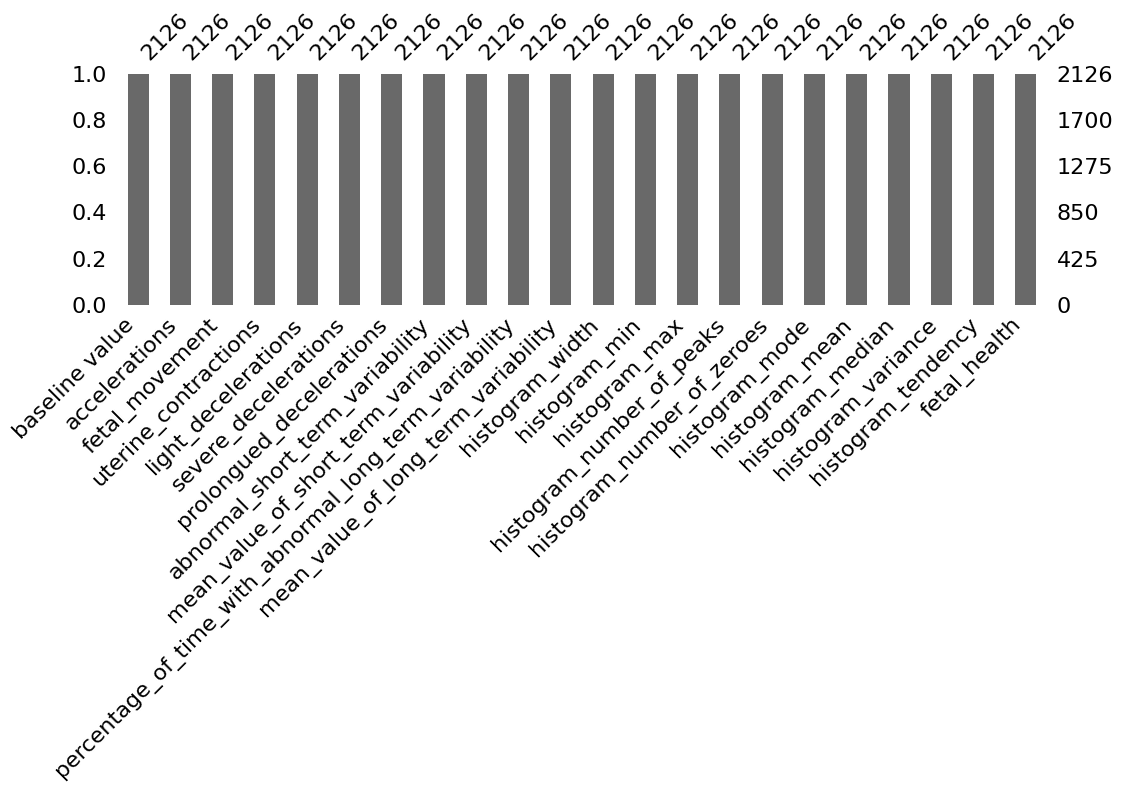

In [ ]:
msno.bar(dataset, figsize = (12,3))

In [ ]:
dataset.duplicated().sum()
print(dataset.shape)
dataset.drop_duplicates(keep="first", inplace=True)
print(dataset.shape)

(2126, 22)
(2113, 22)


In [ ]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [ ]:
StdScl = StandardScaler()
scaledX = StdScl.fit_transform(X)
scaledX = pd.DataFrame(scaledX, columns=list(X.columns))

# Exploratory Data Analysis


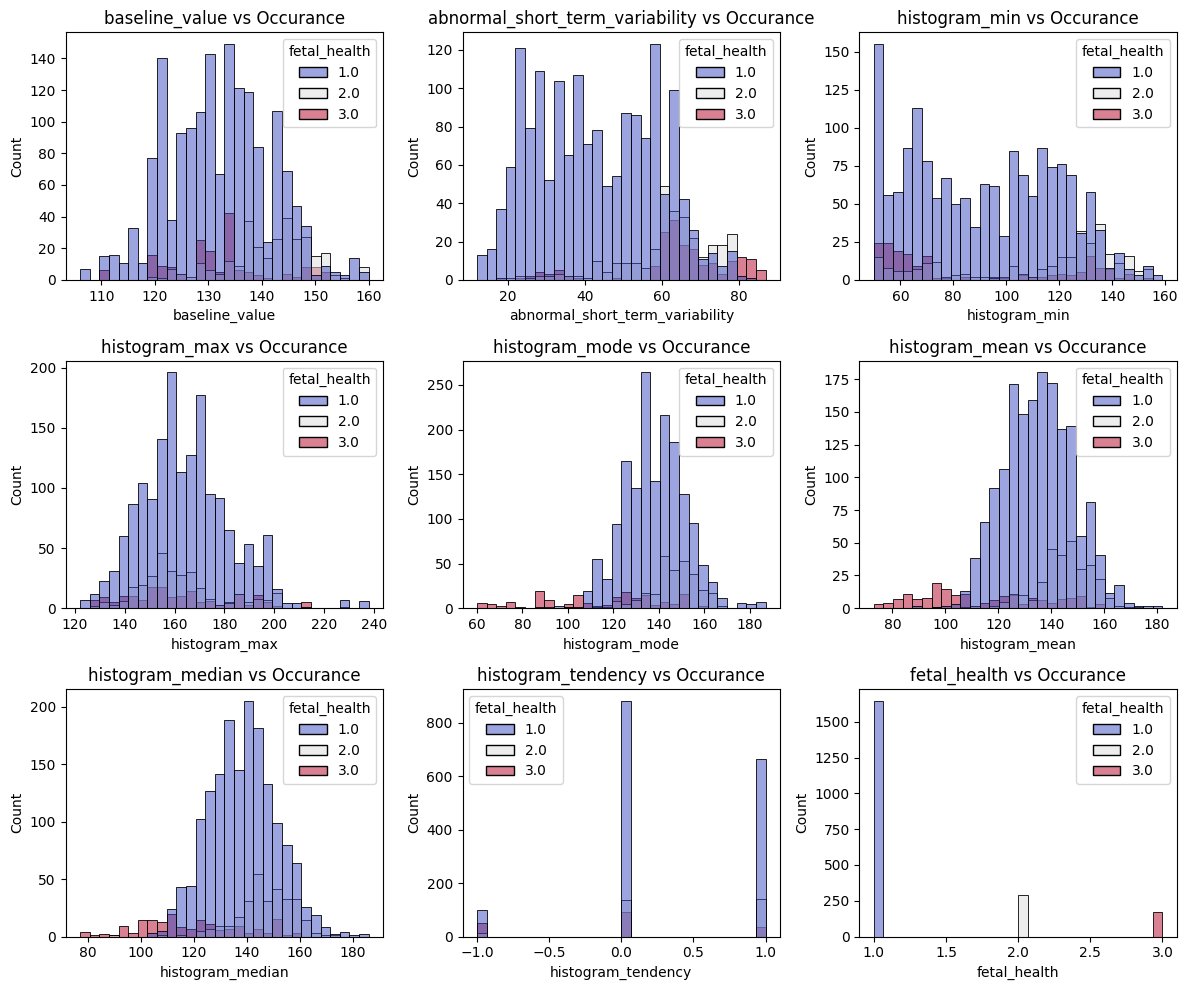

In [ ]:
# Filtering columns
col = ['baseline_value', 'abnormal_short_term_variability', 'histogram_min', 'histogram_max', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_tendency', 'fetal_health']

rows = 3
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

for i in range(len(col)):
    sns.histplot(data=dataset, x=col[i], bins=30, hue='fetal_health', ax=axes[i], palette= 'coolwarm')
    axes[i].set_title(f'{col[i]} vs Occurance')
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

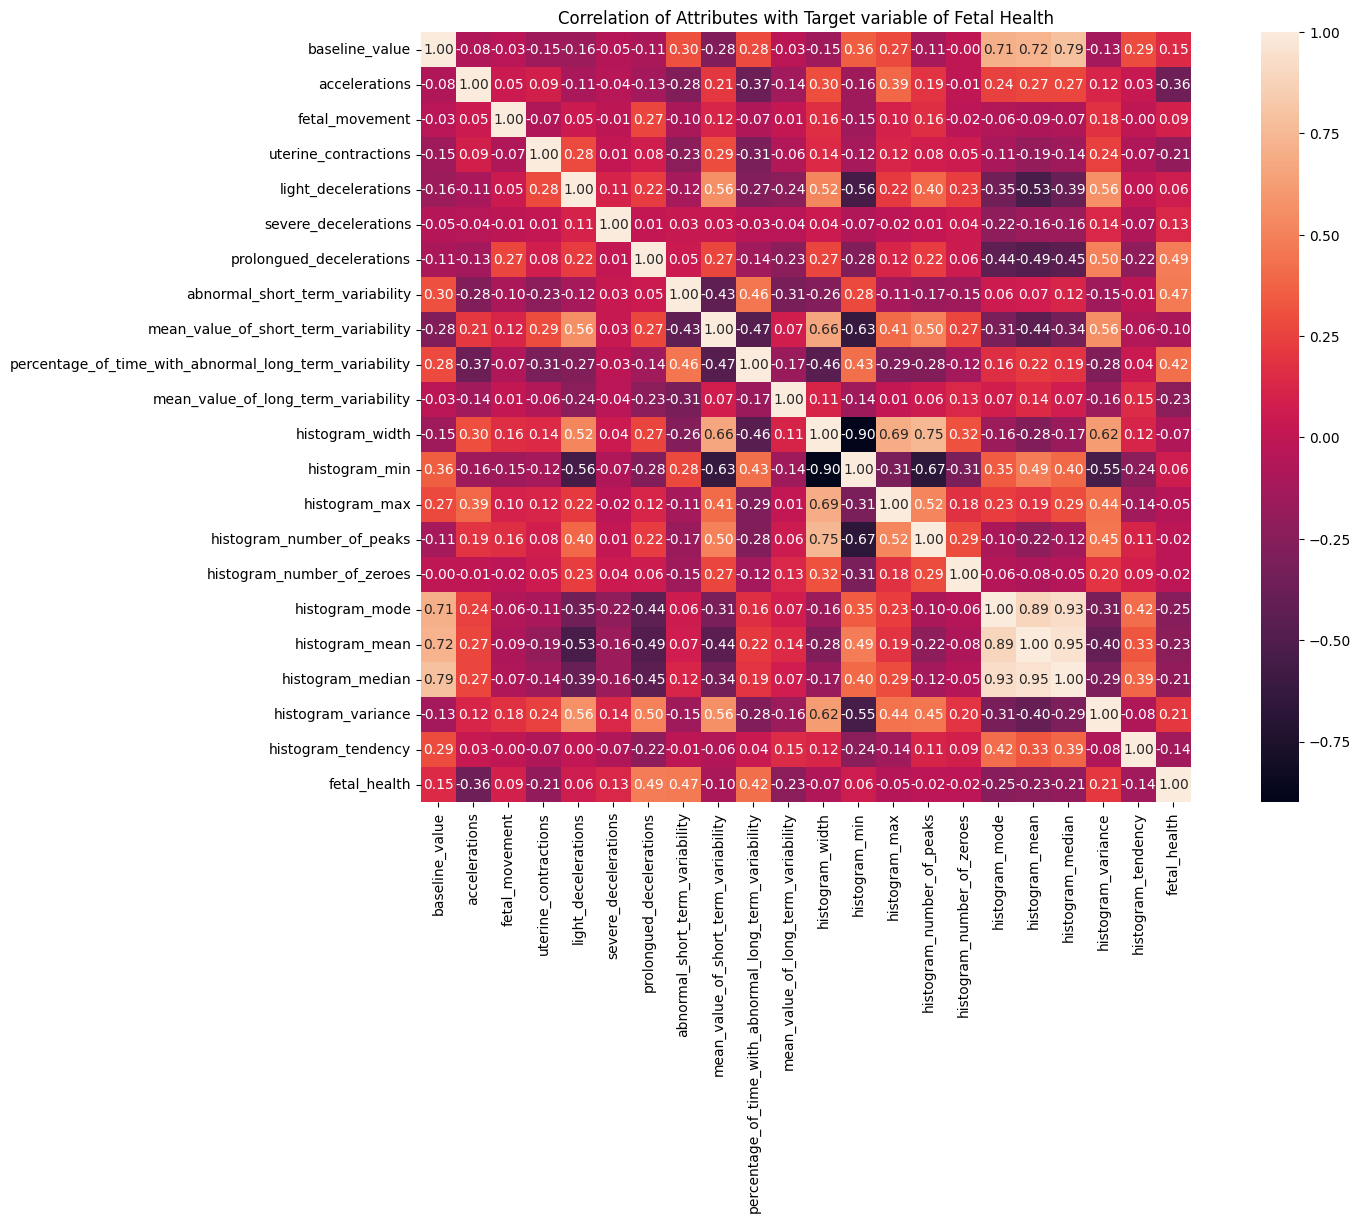

In [ ]:
#correlation matrix
correlation = dataset.corr()
correlation['fetal_health'].sort_values(ascending=False)

plt.figure(figsize=(18,10))
plt.title('Correlation of Attributes with Target variable of Fetal Health')
f = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_yticklabels(f.get_yticklabels())
plt.show()

<ipython-input-12-d85dcf5ed6ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fh_status = sns.countplot(x='fetal_health', data=dataset, palette='coolwarm')


Text(0, 0.5, 'Count')

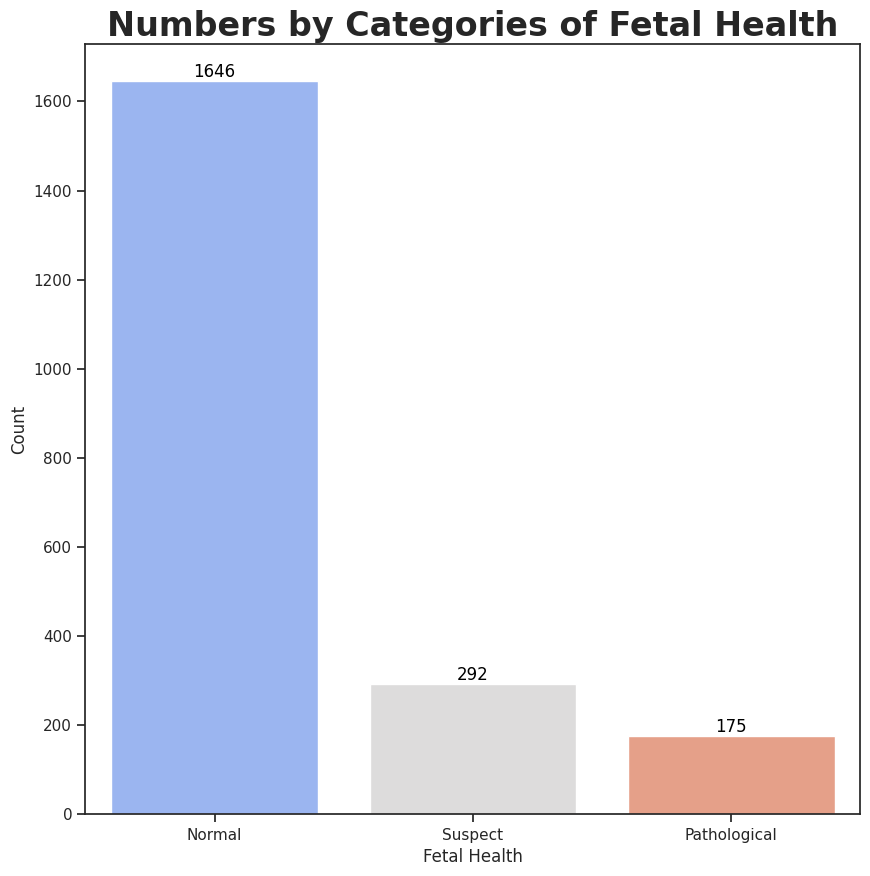

In [ ]:
#Distribution of the target variable
sns.set(style='ticks')
plt.figure(figsize=(10, 10))
fh_status = sns.countplot(x='fetal_health', data=dataset, palette='coolwarm')

for number, count in enumerate(dataset['fetal_health'].value_counts()):
    fh_status.text(number, count, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Numbers by Categories of Fetal Health',
          fontsize=24,
          fontweight='bold')

plt.xticks([0, 1, 2], ['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 21), (423, 21), (1690,), (423,))

# Model #1: Logistic Regression

Model by Ege

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lr = LogisticRegression(random_state=1)
# Train the Logistic Regression classifier

lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
acccuracy_e = accuracy_score(y_test,y_pred)
print("LogRes:", accuracy)

LogRes: 0.9148936170212766


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

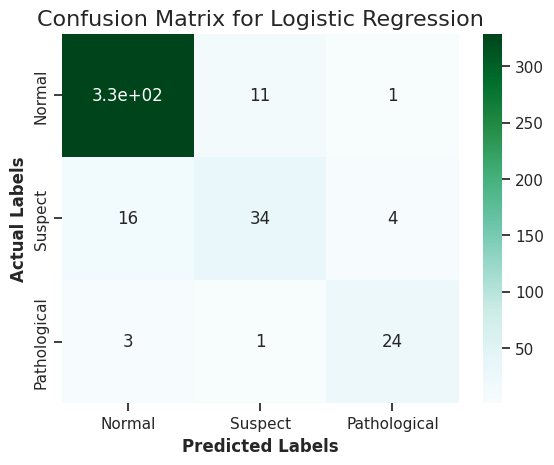

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap='BuGn')

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('Actual Labels', fontweight='bold')
ax.set_title('Confusion Matrix for Logistic Regression', fontsize=16,)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

In [ ]:
set_grid = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty":["none","l2"],
            "intercept_scaling": [1, 2, 3, 4]}

In [ ]:
lr_grid = GridSearchCV(estimator=lr, param_grid=set_grid, cv=10, verbose=1,n_jobs=2, scoring="accuracy", return_train_score=True)

In [ ]:
lr_grid.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'penalty': ['none', 'l2'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
best_estimator_LR = lr_grid.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

best_params_LR = lr_grid.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

print(f"Best score for LR model: {round(lr_grid.best_score_, 3)}")

Best estimator for LR model:
LogisticRegression(C=0.1, random_state=1)
Best parameter values for LR model:
{'C': 0.1, 'intercept_scaling': 1, 'penalty': 'l2', 'tol': 0.0001}
Best score for LR model: 0.889


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts()

fetal_health
1.0    1305
3.0    1305
2.0    1305
Name: count, dtype: int64

In [ ]:
lr_grid.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'penalty': ['none', 'l2'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
LR_model = LogisticRegression(**lr_grid.best_params_,random_state=1)
LR_model.fit(X_train, y_train)

predictions = LR_model.predict(X_test)
acccuracy_i= accuracy_score(y_test,predictions)
acccuracy_i

0.9148936170212766

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

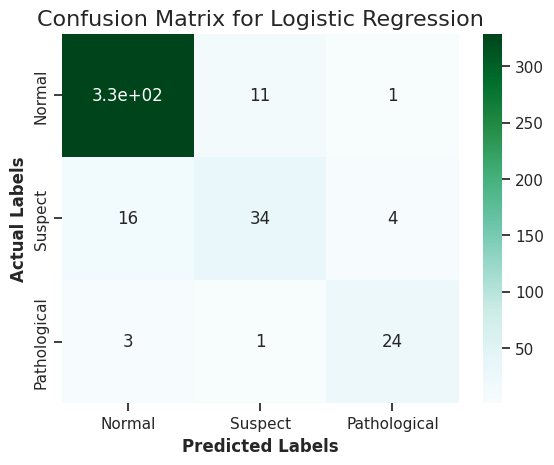

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax, cmap='BuGn')

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('Actual Labels', fontweight='bold')
ax.set_title('Confusion Matrix for Logistic Regression', fontsize=16,)
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<Axes: title={'center': 'Feature Importances for LogReg'}, ylabel='Feature'>

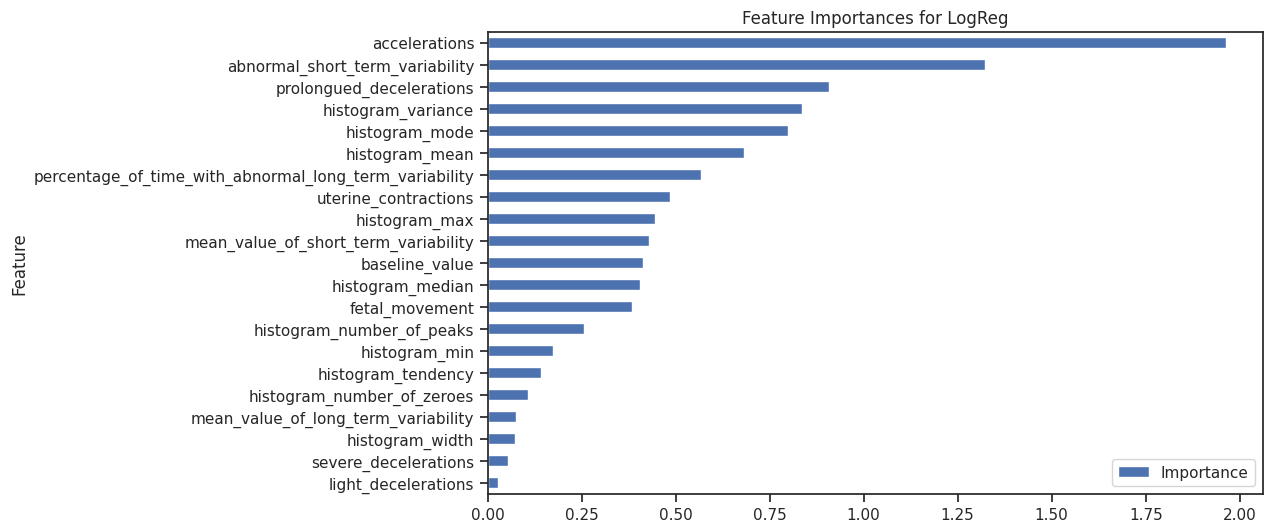

In [ ]:
coefficients = lr.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), title='Feature Importances for LogReg')

In [ ]:
to_drop = ['light_decelerations' ,
           'severe_decelerations',
           'histogram_width',
           'mean_value_of_long_term_variability',
           'histogram_number_of_zeroes'
           ]

X_train_dropped = X_train.drop(to_drop, axis=1)
X_test_dropped = X_test.drop(to_drop, axis=1)


lr_dropped = LogisticRegression(random_state=1)
lr_dropped.fit(X_train_dropped, y_train)

y_pred_dropped = lr_dropped.predict(X_test_dropped)
acccuracy_lr_dropped = accuracy_score(y_test,y_pred_dropped)
print("Dropped LogReg Accuracy:",acccuracy_lr_dropped)
print(classification_report(y_test, y_pred_dropped ))

Dropped LogReg Accuracy: 0.9196217494089834
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       341
         2.0       0.75      0.67      0.71        54
         3.0       0.89      0.89      0.89        28

    accuracy                           0.92       423
   macro avg       0.86      0.84      0.85       423
weighted avg       0.92      0.92      0.92       423



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

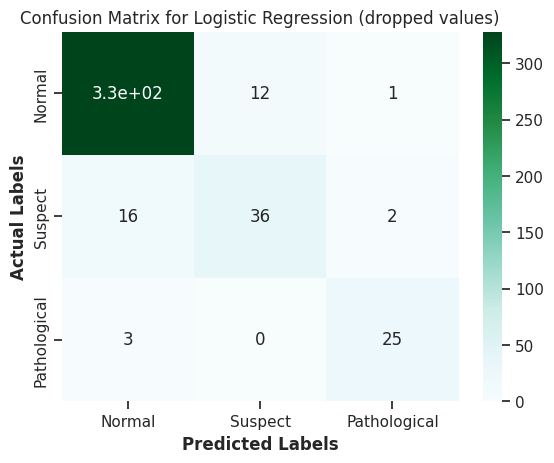

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_dropped), annot=True, ax=ax, cmap='BuGn')

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('Actual Labels', fontweight='bold')
ax.set_title('Confusion Matrix for Logistic Regression (dropped values)')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

<Axes: title={'center': 'Feature Importances for LogReg After Dropping Values'}, ylabel='Feature'>

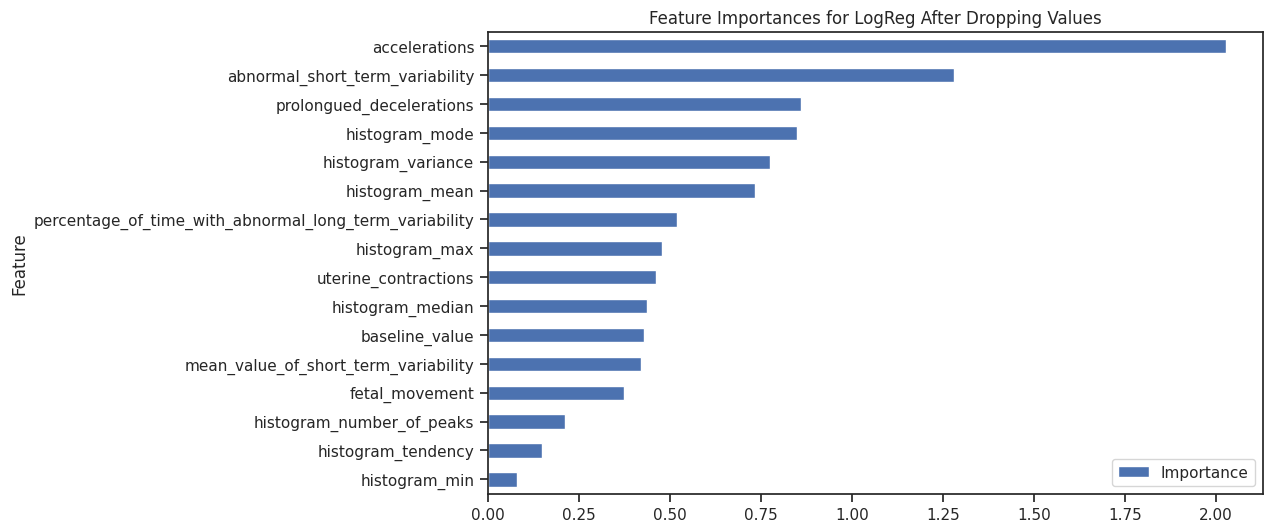

In [ ]:
coefficients = lr_dropped.coef_[0]
feature_importance = pd.DataFrame({'Feature': X_train_dropped.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), title='Feature Importances for LogReg After Dropping Values')

In [ ]:
to_drop_more = ['light_decelerations' ,
                'severe_decelerations',
                'histogram_width',
                #'histogram_median',
                'histogram_mean', # not low importance (?)
                'histogram_mode', # not low importance (?)
                'histogram_min', # not low importance (?)
                #'histogram_max',
                #'histogram_number_of_peaks',
                #'fetal_movement',
                'mean_value_of_long_term_variability',
                'histogram_number_of_zeroes'
                ]

X_train_dropped_more = X_train.drop(to_drop_more, axis=1)
X_test_dropped_more = X_test.drop(to_drop_more, axis=1)


lr_dropped_more = LogisticRegression(random_state=1)
lr_dropped_more.fit(X_train_dropped_more, y_train)

y_pred_dropped_more = lr_dropped_more.predict(X_test_dropped_more)
acccuracy_lr_dropped_more = accuracy_score(y_test,y_pred_dropped_more)
print("Dropped (More) LogReg Accuracy:",acccuracy_lr_dropped_more)
print(classification_report(y_test, y_pred_dropped_more ))

Dropped (More) LogReg Accuracy: 0.933806146572104
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       341
         2.0       0.79      0.70      0.75        54
         3.0       0.93      0.96      0.95        28

    accuracy                           0.93       423
   macro avg       0.89      0.88      0.88       423
weighted avg       0.93      0.93      0.93       423



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspect'), Text(0, 2.5, 'Pathological')]

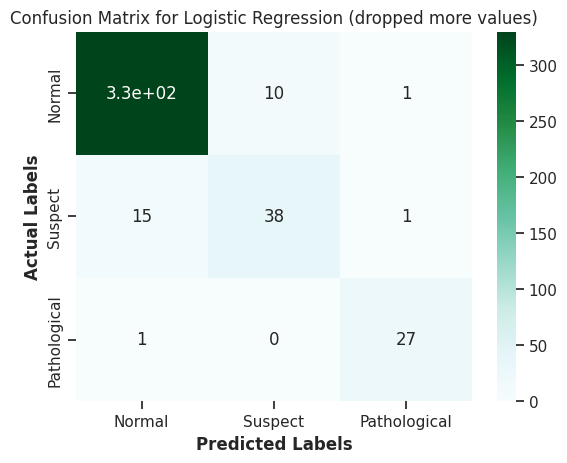

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_dropped_more), annot=True, ax=ax, cmap='BuGn')

ax.set_xlabel('Predicted Labels', fontweight='bold')
ax.set_ylabel('Actual Labels', fontweight='bold')
ax.set_title('Confusion Matrix for Logistic Regression (dropped more values)')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
ax.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

# Model #2: K-Nearest Neighbors


Model by Emiliana

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)


# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric= 'euclidean')  # You can adjust the number of neighbors (k) as needed

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9054373522458629


In [ ]:
# grid search for best parameters

param_knn = {
    'n_neighbors': list(range(1, 31)),
    'p': (1, 2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'manhattan', 'euclidean')}

grid_search_knn = GridSearchCV(knn, param_knn, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
grid_search_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [ ]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9219858156028369

[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

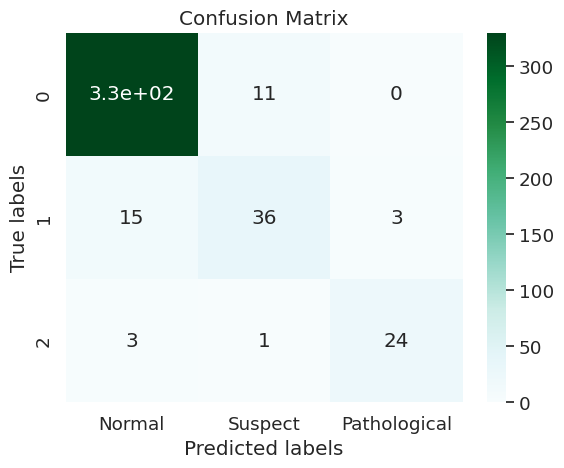

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       341
         2.0       0.75      0.67      0.71        54
         3.0       0.89      0.86      0.87        28

    accuracy                           0.92       423
   macro avg       0.86      0.83      0.85       423
weighted avg       0.92      0.92      0.92       423



Method #1 SelectKBest for Feature Selection on First Model

In [ ]:
#implementing Selectkbest
bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(scaledX, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                                              Feature       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline_value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440
10                mean_value_of_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11        

In [ ]:
# deciding to keep only  features with the strongest correlation >100, then > 200, then by brute force

dataset_improve = dataset.drop(columns = ['uterine_contractions', 'histogram_min', 'mean_value_of_long_term_variability', 'light_decelerations', 'histogram_width','severe_decelerations','histogram_number_of_peaks','fetal_movement', 'histogram_max', 'histogram_number_of_zeroes'], axis=1) #best 10 -- is the best
#dataset_improve = dataset.drop(columns = ['accelerations', 'histogram_variance', 'baseline value','mean_value_of_short_term_variability','uterine_contractions', 'histogram_min', 'mean_value_of_long_term_variability', 'light_decelerations', 'histogram_width','severe_decelerations','histogram_number_of_peaks','fetal_movement', 'histogram_max', 'histogram_number_of_zeroes'], axis=1) #best 6

X_improve = dataset_improve.iloc[:,0:-1]
y_improve = dataset_improve.iloc[:,-1]

#scaling
StdScl2 = StandardScaler()
scaledX_i = StdScl2.fit_transform(X_improve)
scaledX_i = pd.DataFrame(scaledX_i, columns=list(X_improve.columns))

In [ ]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_improve, y_improve, test_size=0.2, random_state=42)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')

# Train the classifier on the training data
knn.fit(X_train_i, y_train_i)

# Predict the labels for the testing set
y_pred2 = knn.predict(X_test_i)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_i, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9432624113475178


In [ ]:
print("Classification Report")
print(classification_report(y_test_i, y_pred2))

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       341
         2.0       0.83      0.72      0.77        54
         3.0       0.97      1.00      0.98        28

    accuracy                           0.94       423
   macro avg       0.92      0.90      0.91       423
weighted avg       0.94      0.94      0.94       423



Method #2: Permutation Importance for Feature Selection on First Model

In [ ]:
#resetting
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importances
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores
feature_importance = perm_importance.importances_mean

# Get feature names
feature_names = X.columns

# Sort feature importance scores and feature names together
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Print feature rankings
print("Feature Rankings:")
for i, (feature, importance) in enumerate(zip(sorted_feature_names, sorted_feature_importance), 1):
    print(f"{i}. {feature}: {importance}")

Feature Rankings:
1. percentage_of_time_with_abnormal_long_term_variability: 0.01970055161544526
2. abnormal_short_term_variability: 0.01899133175728923
3. uterine_contractions: 0.00906225374310482
4. accelerations: 0.008747044917257696
5. histogram_mode: 0.007328605200945637
6. prolongued_decelerations: 0.004728132387706863
7. histogram_variance: 0.0044917257683215195
8. baseline_value: 0.004097714736012614
9. histogram_max: 0.0022852639873916503
10. light_decelerations: 0.0014184397163120588
11. histogram_median: 0.0011032308904649346
12. fetal_movement: 0.0009456264775413725
13. severe_decelerations: 0.0
14. mean_value_of_short_term_variability: -0.00023640661938534313
15. histogram_mean: -0.0009456264775413725
16. mean_value_of_long_term_variability: -0.0011032308904649346
17. histogram_number_of_peaks: -0.0026004728132387744
18. histogram_min: -0.003546099290780147
19. histogram_width: -0.0044917257683215195
20. histogram_number_of_zeroes: -0.004728132387706863
21. histogram_tende

In [ ]:
# deciding by brute force
dataset_improve = dataset.drop(columns = ['baseline_value','histogram_max','light_decelerations', 'histogram_median', 'fetal_movement','severe_decelerations', 'mean_value_of_short_term_variability', 'histogram_mean', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks','histogram_min','histogram_width','histogram_number_of_zeroes','histogram_tendency'], axis=1) #best 7
#dataset_improve = dataset.drop(columns = ['histogram_mean', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks','histogram_min','histogram_width','histogram_number_of_zeroes','histogram_tendency'], axis=1) #best 14 did second best
#dataset_improve = dataset.drop(columns = ['histogram_number_of_peaks','histogram_min','histogram_width','histogram_number_of_zeroes','histogram_tendency'], axis=1) #best 16 did second best
X_improve = dataset_improve.iloc[:,0:-1]
y_improve = dataset_improve.iloc[:,-1]

#scaling
StdScl2 = StandardScaler()
scaledX_i = StdScl2.fit_transform(X_improve)
scaledX_i = pd.DataFrame(scaledX_i, columns=list(X_improve.columns))

In [ ]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(scaledX_i, y_improve, test_size=0.2, random_state=42)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')

# Train the classifier on the training data
knn.fit(X_train_i, y_train_i)

# Predict the labels for the testing set
y_pred3 = knn.predict(X_test_i)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_i, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.9479905437352246


In [ ]:
print("Classification Report")
print(classification_report(y_test_i, y_pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       341
         2.0       0.75      0.67      0.71        54
         3.0       0.89      0.86      0.87        28

    accuracy                           0.92       423
   macro avg       0.86      0.83      0.85       423
weighted avg       0.92      0.92      0.92       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

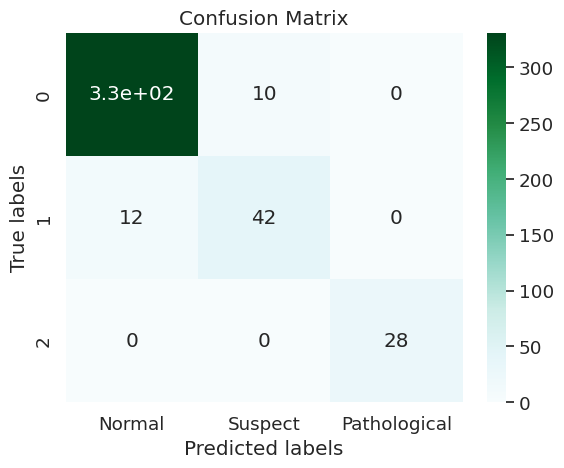

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test_i, y_pred3), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

Method #3: SMOTE on Training Data

In [ ]:
#resetting
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

In [ ]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res2, y_train_res2 = smote.fit_resample(X_train, y_train)
y_train_res2.value_counts()

fetal_health
1.0    1305
3.0    1305
2.0    1305
Name: count, dtype: int64

In [ ]:
# Create and train the classifier
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')
knn.fit(X_train_res2, y_train_res2)

# Predict the labels for the testing set
y_pred3 = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_i, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.9219858156028369


In [ ]:
print("Classification Report")
print(classification_report(y_test_i, y_pred3))

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       341
         2.0       0.70      0.78      0.74        54
         3.0       0.81      0.93      0.87        28

    accuracy                           0.92       423
   macro avg       0.83      0.88      0.85       423
weighted avg       0.93      0.92      0.92       423



Combining Feature Best Selection and SMOTE

In [ ]:
dataset_improve = dataset.drop(columns = ['baseline_value','histogram_max','light_decelerations', 'histogram_median', 'fetal_movement','severe_decelerations', 'mean_value_of_short_term_variability', 'histogram_mean', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks','histogram_min','histogram_width','histogram_number_of_zeroes','histogram_tendency'], axis=1) #best 7 for permutation
#dataset_improve = dataset.drop(columns = ['uterine_contractions', 'histogram_min', 'mean_value_of_long_term_variability', 'light_decelerations', 'histogram_width','severe_decelerations','histogram_number_of_peaks','fetal_movement', 'histogram_max', 'histogram_number_of_zeroes'], axis=1) #besst for selectkbest

X_improve = dataset_improve.iloc[:,0:-1]
y_improve = dataset_improve.iloc[:,-1]

#scaling
StdScl2 = StandardScaler()
scaledX_i = StdScl2.fit_transform(X_improve)
scaledX_i = pd.DataFrame(scaledX_i, columns=list(X_improve.columns))

In [ ]:
# Split the data into train and test sets
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(scaledX_i, y_improve, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_i, y_train_i)

# Check the class distribution after resampling
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution after SMOTE: fetal_health
1.0    1305
3.0    1305
2.0    1305
Name: count, dtype: int64


In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=1, weights='distance')

# Train the classifier on the resampled training data
knn.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the testing set
y_pred4 = knn.predict(X_test_i)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_i, y_pred4)
print("Accuracy:", accuracy)


Accuracy: 0.933806146572104


In [ ]:
print("Classification Report")
print(classification_report(y_test_i, y_pred4))

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.93      0.96       341
         2.0       0.70      0.93      0.80        54
         3.0       0.90      1.00      0.95        28

    accuracy                           0.93       423
   macro avg       0.86      0.95      0.90       423
weighted avg       0.95      0.93      0.94       423



# Model #3: Random Forest

Model by Gizem

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.966903073286052
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.92      0.81      0.86        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.93      0.95       423
weighted avg       0.97      0.97      0.97       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

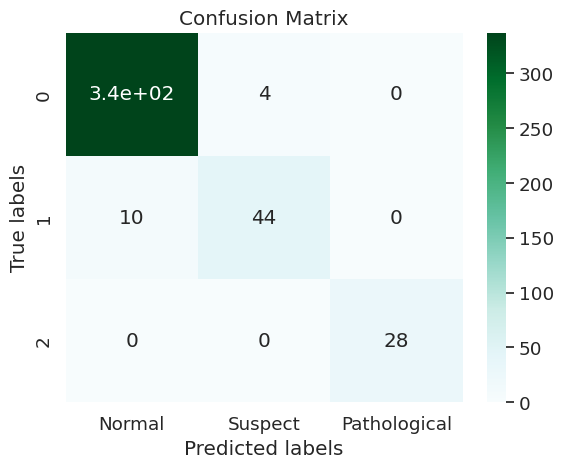

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
rf_random_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
                  'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'bootstrap': [True, False]}
rf_random_grid

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_random_grid,
                               cv = 10, random_state=42, n_jobs = -1)

rrf = rf_random.fit(X_train,y_train)

In [ ]:
rrf.best_params_

{'n_estimators': 450,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
RandomGrid_rf = RandomForestClassifier(**rrf.best_params_,random_state=42)

RandomGrid_rf.fit(X_train, y_train)

y_pred_randomgrid_rf = RandomGrid_rf.predict(X_test)
acccuracy_RandomGrid_rf = accuracy_score(y_test,y_pred_randomgrid_rf)
print("Random Forest Accuracy:",acccuracy_RandomGrid_rf)
print(classification_report(y_test, y_pred_randomgrid_rf ))

Random Forest Accuracy: 0.9692671394799054
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.92      0.83      0.87        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.94      0.95       423
weighted avg       0.97      0.97      0.97       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

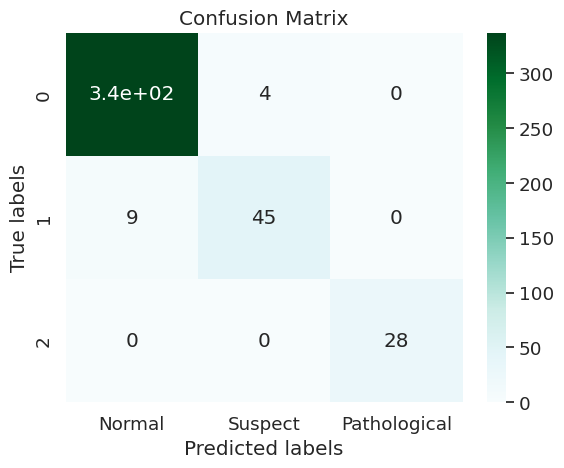

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_randomgrid_rf), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

abnormal_short_term_variability                           0.129079
mean_value_of_short_term_variability                      0.122544
percentage_of_time_with_abnormal_long_term_variability    0.109790
histogram_mean                                            0.087236
histogram_mode                                            0.061246
prolongued_decelerations                                  0.051622
histogram_median                                          0.050504
accelerations                                             0.049985
mean_value_of_long_term_variability                       0.047765
uterine_contractions                                      0.043408
baseline_value                                            0.041547
histogram_min                                             0.040185
histogram_max                                             0.035297
histogram_width                                           0.034964
histogram_variance                                        0.03

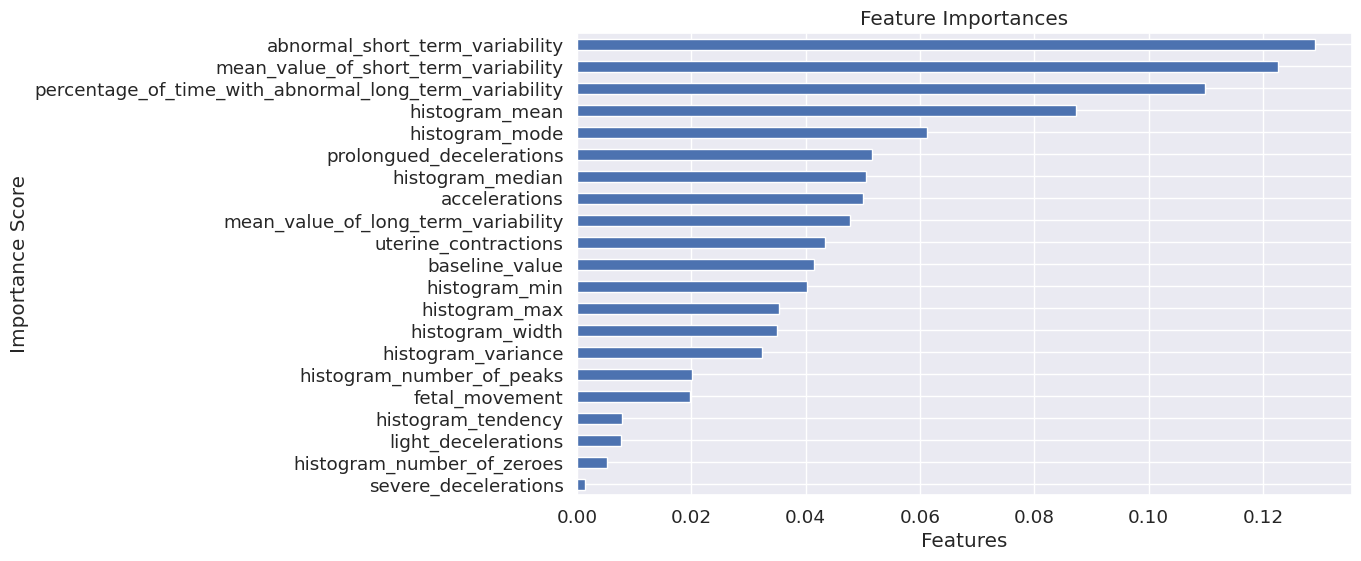

In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)
feature_scores = feature_scores[::-1]
plt.figure(figsize=(10, 6))
feature_scores.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
features_to_drop = ['light_decelerations' ,
                    'histogram_number_of_zeroes',
                    'severe_decelerations']
X_train_new = X_train.drop(features_to_drop, axis=1)

X_test_new = X_test.drop(features_to_drop, axis=1)

In [ ]:
rf_new = RandomForestClassifier(random_state=42)

rf_new.fit(X_train_new, y_train)

y_pred_new = rf_new.predict(X_test_new)
acccuracy_rf_new = accuracy_score(y_test,y_pred_new)
print("Random Forest Accuracy:",acccuracy_rf_new)
print(classification_report(y_test, y_pred_new ))

Random Forest Accuracy: 0.9692671394799054
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.92      0.83      0.87        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.94      0.95       423
weighted avg       0.97      0.97      0.97       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

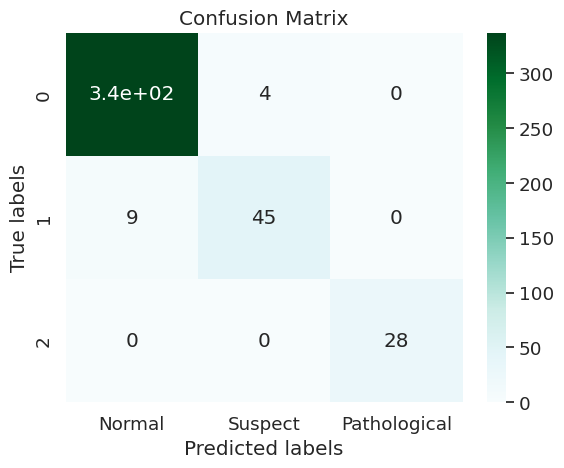

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
rf_RandomGrid_new = rf_random.fit(X_train_new,y_train)

In [ ]:
rf_RandomGrid_new.best_params_

{'n_estimators': 450,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
Random_rf_new = RandomForestClassifier(**rf_RandomGrid_new.best_params_,random_state=42)
Random_rf_new.fit(X_train_new, y_train)

y_pred_new_random =Random_rf_new.predict(X_test_new)
acccuracy_new_random = accuracy_score(y_test,y_pred_new_random)
print("Random Forest Accuracy:",acccuracy_new_random )
print(classification_report(y_test,y_pred_new_random))

Random Forest Accuracy: 0.9716312056737588
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       341
         2.0       0.92      0.85      0.88        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.97      0.95      0.96       423
weighted avg       0.97      0.97      0.97       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

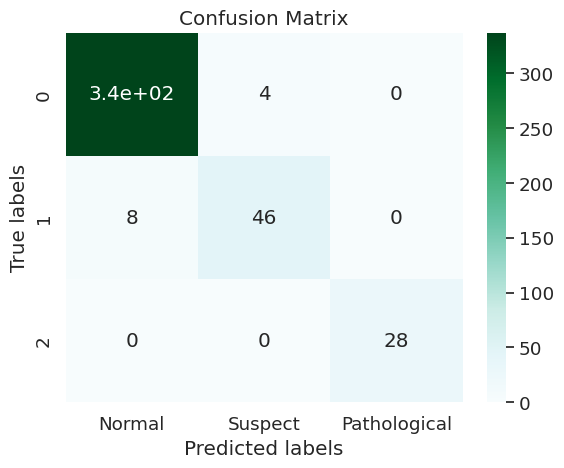

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_new_random), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_new, y_train)
y_train_res.value_counts()

fetal_health
1.0    1305
3.0    1305
2.0    1305
Name: count, dtype: int64

In [ ]:
rf.fit(X_train_res,y_train_res)

y_pred_res = rf.predict(X_test_new)
res_acccuracy =accuracy_score(y_test,y_pred_res)
print("Random Forest Accuracy:",res_acccuracy )
print(classification_report(y_test,y_pred_res))

Random Forest Accuracy: 0.9598108747044918
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       341
         2.0       0.85      0.83      0.84        54
         3.0       0.97      1.00      0.98        28

    accuracy                           0.96       423
   macro avg       0.93      0.94      0.93       423
weighted avg       0.96      0.96      0.96       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

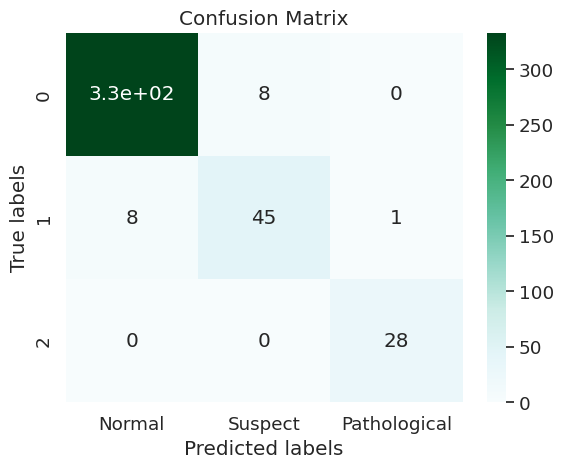

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_res), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
rf_RandomGrid_new = rf_random.fit(X_train_res,y_train_res)

In [ ]:
rf_RandomGrid_new.best_params_

{'n_estimators': 450,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'bootstrap': False}

In [ ]:
Random_rf_res = RandomForestClassifier(**rf_RandomGrid_new.best_params_,random_state=42)
Random_rf_res.fit(X_train_res, y_train_res)

y_pred_res_random =Random_rf_res.predict(X_test_new)
acccuracy_res_random = accuracy_score(y_test,y_pred_res_random)
print("Random Forest Accuracy:",acccuracy_res_random )
print(classification_report(y_test,y_pred_res_random))

Random Forest Accuracy: 0.9621749408983451
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       341
         2.0       0.87      0.83      0.85        54
         3.0       0.93      1.00      0.97        28

    accuracy                           0.96       423
   macro avg       0.93      0.94      0.93       423
weighted avg       0.96      0.96      0.96       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

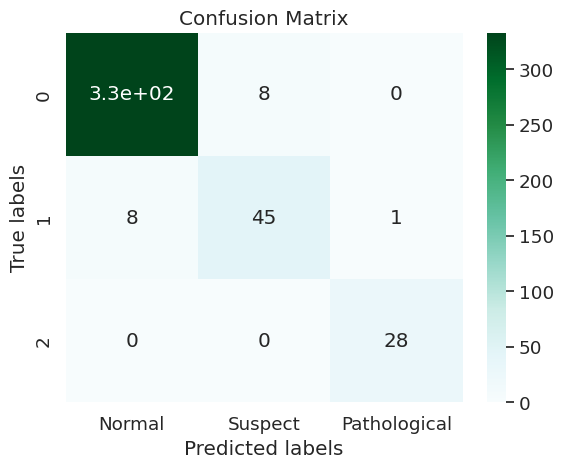

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_res), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
features_to_drop2 = ['fetal_movement' ,
                    'histogram_number_of_peaks',
                    'histogram_max' ]
X_train_n = X_train_new.drop(features_to_drop2, axis=1)

X_test_n = X_test_new.drop(features_to_drop2, axis=1)

In [ ]:
X_train_n.shape

(1690, 15)

In [ ]:
X_test_n.shape

(423, 15)

In [ ]:
rf.fit(X_train_n,y_train)

y_pred_n = rf.predict(X_test_n)
n_acccuracy =accuracy_score(y_test,y_pred_n)
print("Random Forest Accuracy:",n_acccuracy )
print(classification_report(y_test,y_pred_n))

Random Forest Accuracy: 0.966903073286052
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.92      0.81      0.86        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.93      0.95       423
weighted avg       0.97      0.97      0.97       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

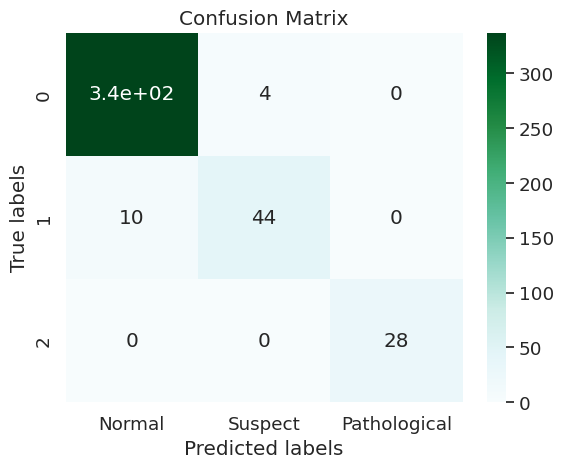

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_n), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

In [ ]:
rf_RandomGrid_n = rf_random.fit(X_train_n,y_train)

In [ ]:
rf_RandomGrid_n.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'bootstrap': False}

In [ ]:
Random_rf_n = RandomForestClassifier(**rf_RandomGrid_n.best_params_,random_state=42)
Random_rf_n.fit(X_train_n, y_train)

y_pred_random_dropp =Random_rf_n.predict(X_test_n)
acccuracy_random_dropp = accuracy_score(y_test,y_pred_random_dropp)
print("Random Forest Accuracy:",acccuracy_random_dropp )
print(classification_report(y_test,y_pred_random_dropp))

Random Forest Accuracy: 0.9739952718676123
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       341
         2.0       0.94      0.85      0.89        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.97      0.95      0.96       423
weighted avg       0.97      0.97      0.97       423



[Text(0.5, 0, 'Normal'), Text(1.5, 0, 'Suspect'), Text(2.5, 0, 'Pathological')]

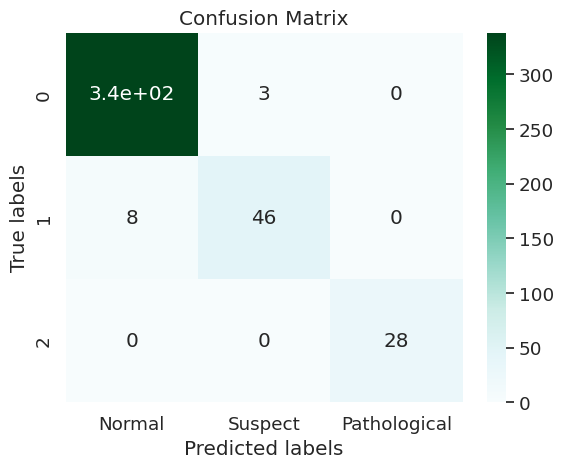

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_random_dropp), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

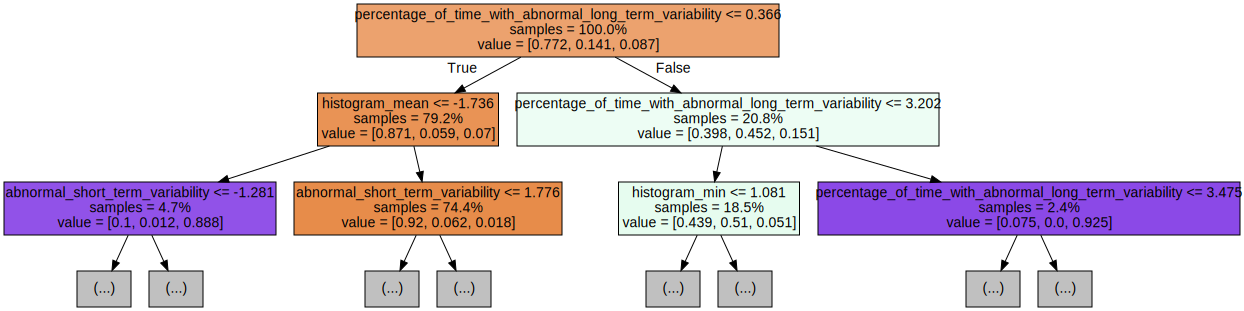

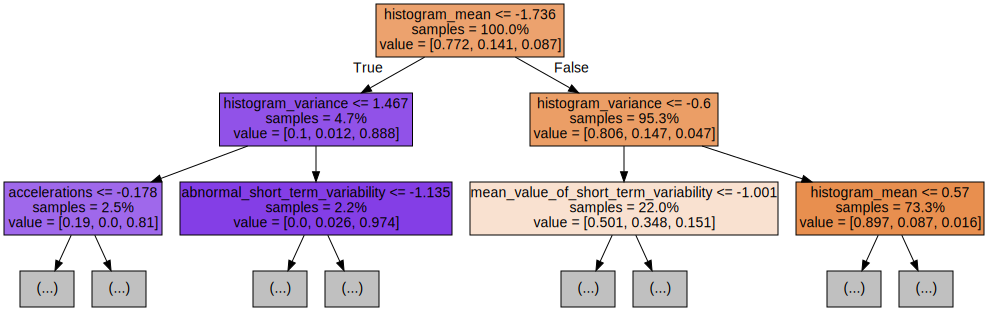

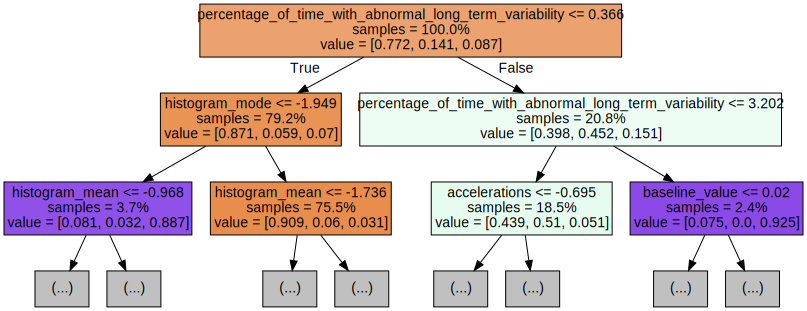

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

for i in range(3):
    tree = Random_rf_n.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_n.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Model #4: Support Vector Machine

Model by Sreya

**Feauture Selection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Initialize linear SVM classifier
svm_linear = SVC(kernel='linear', random_state=150)

# Initialize SelectFromModel with linear SVM
selector = SelectFromModel(estimator=svm_linear)

# Fit SelectFromModel to the training data
selector = selector.fit(X_train, y_train)

# Get the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Initialize SVM classifier with rbf kernel
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train SVM classifier on selected features
svm_classifier.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with SVM and feature selection:", accuracy)


Accuracy with SVM and feature selection: 0.9385342789598109


Training SVM Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
dataset = pd.read_csv("fetal_health.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       341
         2.0       0.84      0.67      0.74        54
         3.0       1.00      0.89      0.94        28

    accuracy                           0.94       423
   macro avg       0.93      0.85      0.88       423
weighted avg       0.93      0.94      0.93       423



**Random Search as a Hyperparameter**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=21. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.90      0.80      0.84        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.95      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423



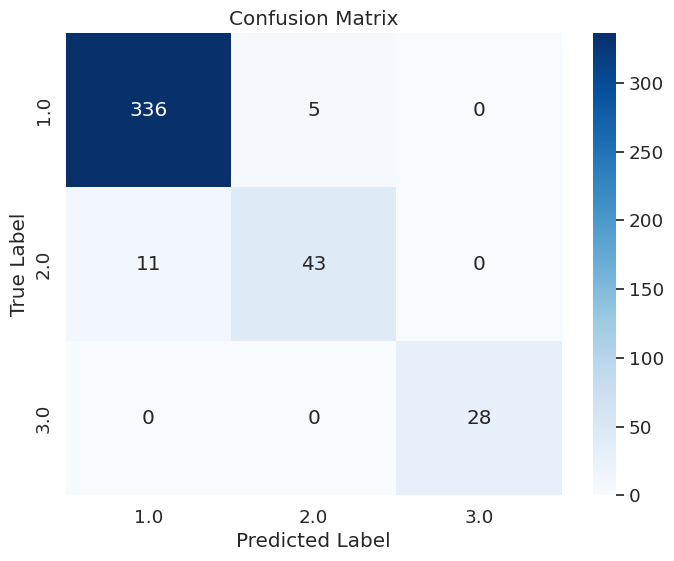

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter distributions for Randomized Search
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=150)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_distributions,
                                   n_iter=21, cv=3, scoring='accuracy', random_state=150, n_jobs=-1)

# Fit Randomized Search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model on the testing set
best_svm_classifier = random_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_svm_classifier.classes_,
            yticklabels=best_svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**SMOTE Analysis**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 50)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
y_train_res.value_counts()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.90      0.80      0.84        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.95      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423



**Support Vector PCA**

Best hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.90      0.80      0.84        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.95      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


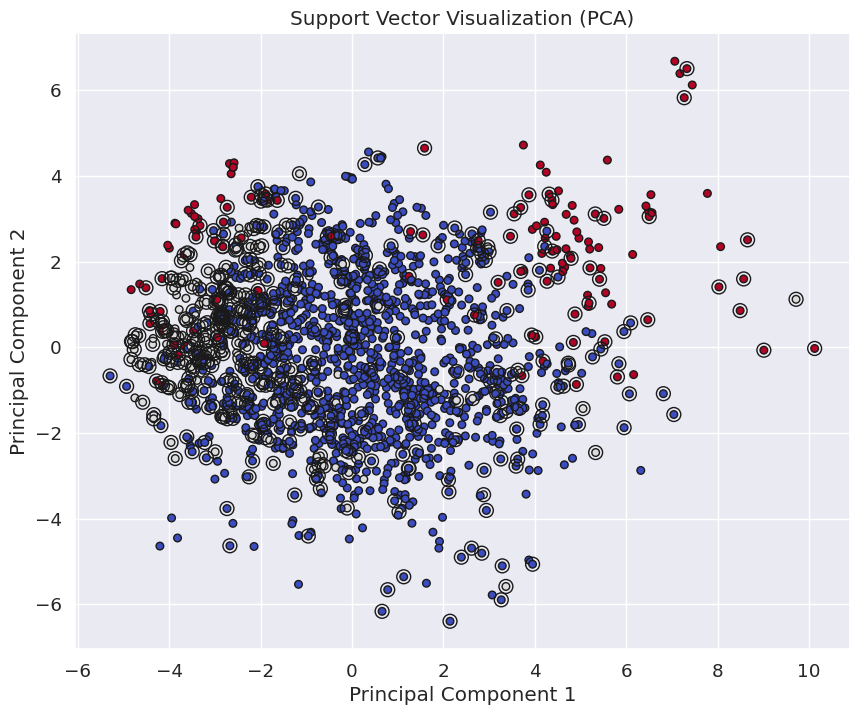

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define parameter distributions for Randomized Search
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_distributions,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit Randomized Search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model on the testing set
best_svm_classifier = random_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot decision function (support vectors) in the reduced space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', s=30, edgecolors='k')
plt.scatter(pca.transform(best_svm_classifier.support_vectors_)[:, 0],
            pca.transform(best_svm_classifier.support_vectors_)[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Support Vector Visualization (PCA)')
plt.show()
